# Figure 5: correspondence of C-SALE maps with Cerebellar parcellations
## Comparisions were made to the Multi-Domain Task Battery [King et al. 2019] and the mid-granularity symmetrical hierarchical atlas of [Nettekoven et al. 2024] for the main figure.
### We also compared out maps to cerebellar gradients [Guell et al. 2018], resting-state networks [Buckner et al. 2011], a cortical-subcortical network parcellation (Ji et al. (2019), and a winner-takes all meta-analatic atlas [Van Overwalle et al. 2023].

#### We also considered structural parcellations, specifically cerebellar lobules. We co pared maps both against a deterministic and probabilistic segmentation.
##### Source: https://github.com/DiedrichsenLab/cerebellar_atlases/tree/master/Diedrichsen_2009

#### Author: Neville Magielse
#### Date: 07.08.2024



In [1]:
import os
import sys

# User-specified base working directory
BASE_DIR = '/data/project/cerebellum_ale/'  # Change this to your project folder. Make sure they have input and output folders.

# Defines input and output paths.
INPUT_DIR = os.path.join(BASE_DIR, 'input')
OUTPUT_DIR = os.path.join(BASE_DIR, 'output')

sys.path.append(os.path.join(BASE_DIR, 'scripts'))

In [2]:
# Imports
import os
import sys

import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm

import seaborn as sns

from sklearn.cluster import AgglomerativeClustering
import scipy
from scipy.cluster.hierarchy import dendrogram

import statsmodels.stats.multitest

import SUITPy
import nibabel
import nilearn
import nilearn.plotting

from tqdm import tqdm
import re

# Decide on a font style
plt.rcParams.update({'font.size': 16, "font.family": "Asana Math", "figure.dpi": 192})

# Create a manual label for the LittleBrain Gradients figure.

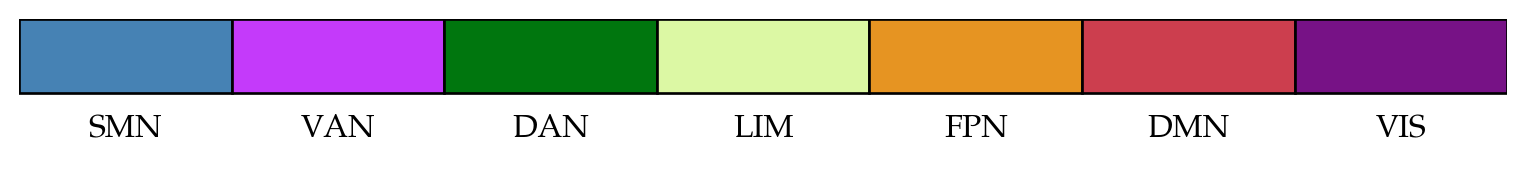

In [3]:
# Define Network Labels for the Buckner et al. 2011 Networks (based on Guell et al. 2018 - Figure 1B).

# Use abbreviated network names for the labels
networks = [
    ("SMN", "#4682b4"),  # Blue - Somatomotor Network
    ("VAN", "#c43afa"),  # Bright Purple - Ventral Attention Network
    ("DAN", "#00760e"),  # Green - Dorsal Attention Network
    ("LIM", "#dcf8a4"),  # Light Yellow - Limbic Network
    ("FPN", "#e69422"),  # Orange - Frontoparietal Network
    ("DMN", "#cc3e4e"),  # Red - Default-Mode Network
    ("VIS", "#771286")   # Darker Purple (Magenta) - Visual Network
]

# Create a new figure. Control the proportions of the legend.
fig, ax = plt.subplots(figsize=(10, 1))

# Hide axes
ax.axis('off')

# Create legend
for i, (label, color) in enumerate(networks):
    rect = mpatches.Rectangle((i, 0), 1, 1, facecolor=color, edgecolor="black")
    ax.add_patch(rect)
    ax.text(i + 0.5, -0.5, label, ha="center", va="center", fontsize=12)

# Set limits
ax.set_xlim(0, len(networks))
ax.set_ylim(-1, 1)

# Decide if you want to save the figure
fig.savefig(os.path.join(BASE_DIR, 'Figures/Publication/Figure5/Supplementary/CerebellarGradients_Buckner-legend.png'), bbox_inches='tight')

plt.show()

# First, we compare continuous maps

# Run variogram-based correlation between an example Z map and the MDTB maps

In [19]:
all_files = glob.glob(os.path.join(INPUT_DIR, 'cerebellar_atlases/King_2019/con-MDTB*.nii'))
all_files

['/data/project/cerebellum_ale/input/cerebellar_atlases/King_2019/con-MDTB01LeftHandMovement_space-SUIT.nii',
 '/data/project/cerebellum_ale/input/cerebellar_atlases/King_2019/con-MDTB12DigitJudgement_space-SUIT.nii',
 '/data/project/cerebellum_ale/input/cerebellar_atlases/King_2019/con-MDTB19FingerSequence_space-MNI2mm.nii',
 '/data/project/cerebellum_ale/input/cerebellar_atlases/King_2019/con-MDTB33CPRO_space-SUIT.nii',
 '/data/project/cerebellum_ale/input/cerebellar_atlases/King_2019/con-MDTB21Verbal2Back+_space-SUIT.nii',
 '/data/project/cerebellum_ale/input/cerebellar_atlases/King_2019/con-MDTB24SpatialImagery_space-SUIT.nii',
 '/data/project/cerebellum_ale/input/cerebellar_atlases/King_2019/con-MDTB09UnpleasantScenes_space-SUIT.nii',
 '/data/project/cerebellum_ale/input/cerebellar_atlases/King_2019/con-MDTB49ResponseAlternativesMedium_space-SUIT.nii',
 '/data/project/cerebellum_ale/input/cerebellar_atlases/King_2019/con-MDTB14SadFaces_space-MNI2mm.nii',
 '/data/project/cerebellum

In [20]:
task_names = list(map(lambda s: s.split('/')[-1].split('_space-SUIT')[0][10:], all_files))
sorted(task_names)

['ActionObservation',
 'ActionObservation_space-MNI2mm.nii',
 'AnimatedMovie',
 'AnimatedMovie_space-MNI2mm.nii',
 'BiologicalMotion',
 'BiologicalMotion_space-MNI2mm.nii',
 'CPRO',
 'DigitJudgement',
 'FingerSequence',
 'FingerSequence_space-MNI2mm.nii',
 'FingerSimple',
 'FingerSimple_space-MNI2mm.nii',
 'Go',
 'HappyFaces',
 'IntervalTiming',
 'LandscapeMovie',
 'LandscapeMovie_space-MNI2mm.nii',
 'LeftHandMovement',
 'Math',
 'Math_space-MNI2mm.nii',
 'MentalRotationEasy',
 'MentalRotationHard',
 'MentalRotationMedium',
 'MentalRotationMedium_space-MNI2mm.nii',
 'MotorImagery',
 'NatureMovie',
 'NoGo',
 'Object2Back+',
 'Object2Back+_space-MNI2mm.nii',
 'Object2Back-',
 'ObjectViewing',
 'PleasantScenes',
 'PredictionScrambles',
 'PredictionTrue',
 'PredictionViolated',
 'ResponseAlternativesEasy',
 'ResponseAlternativesHard',
 'ResponseAlternativesMedium',
 'Rest',
 'Rest_space-MNI2mm.nii',
 'RightHandMovement',
 'Saccades',
 'SadFaces',
 'SadFaces_space-MNI2mm.nii',
 'ScrambledMo

In [21]:
# select tasks based on Fig. 1 of the Nature Neuroscience paper @ doi.org/10.1038/s41593-019-0436-x.
sel_tasks = ['VerbGeneration', 'ActionObservation', 'TheoryOfMind', 'VisualSearchMedium', 
             'Object2Back+', 'SadFaces', 'FingerSequence', 'Rest',
             'AnimatedMovie', 'LandscapeMovie', 'FingerSimple', 'SpatialImagery',
             'BiologicalMotion', 'MentalRotationMedium', 'SpatialMapMedium', 'Math']
sel_tasks_print_names = ['Verb Generation', 'Action Observation', 'Theory of Mind', 'Visual Search',
                         'Object 2-back', 'Sad Faces', 'Finger Sequence', 'Rest',
                         'Animated Movie', 'Landscape Movie', 'Finger Simple', 'Spatial Imagery',
                         'Biological Motion', 'Mental Rotation', 'Spatial Map', 'Math']
sel_maps = {}
sel_maps_mni = {}
for task in sel_tasks:
    for map_path in all_files:
        if task in map_path:
            break
    sel_maps[task] = map_path
    break

# Resample the parcellation

In [22]:
deformation = os.path.join(INPUT_DIR, 'def_suit2mni.nii')
map_mni = SUITPy.reslice.reslice_image(map_path, deformation)
map_path

/data/project/cerebellum_ale/venv/lib/python3.11/site-packages/nitools/volume.py:187: RuntimeWarning: invalid value encountered in cast
  ir = np.floor(im).astype('int')
/data/project/cerebellum_ale/venv/lib/python3.11/site-packages/nitools/volume.py:188: RuntimeWarning: invalid value encountered in cast
  jr = np.floor(jm).astype('int')
/data/project/cerebellum_ale/venv/lib/python3.11/site-packages/nitools/volume.py:189: RuntimeWarning: invalid value encountered in cast
  kr = np.floor(km).astype('int')


'/data/project/cerebellum_ale/input/cerebellar_atlases/King_2019/con-MDTB27VerbGeneration_space-MNI2mm.nii'

/data/project/cerebellum_ale/venv/lib/python3.11/site-packages/nilearn/_utils/niimg.py:62: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  warn(


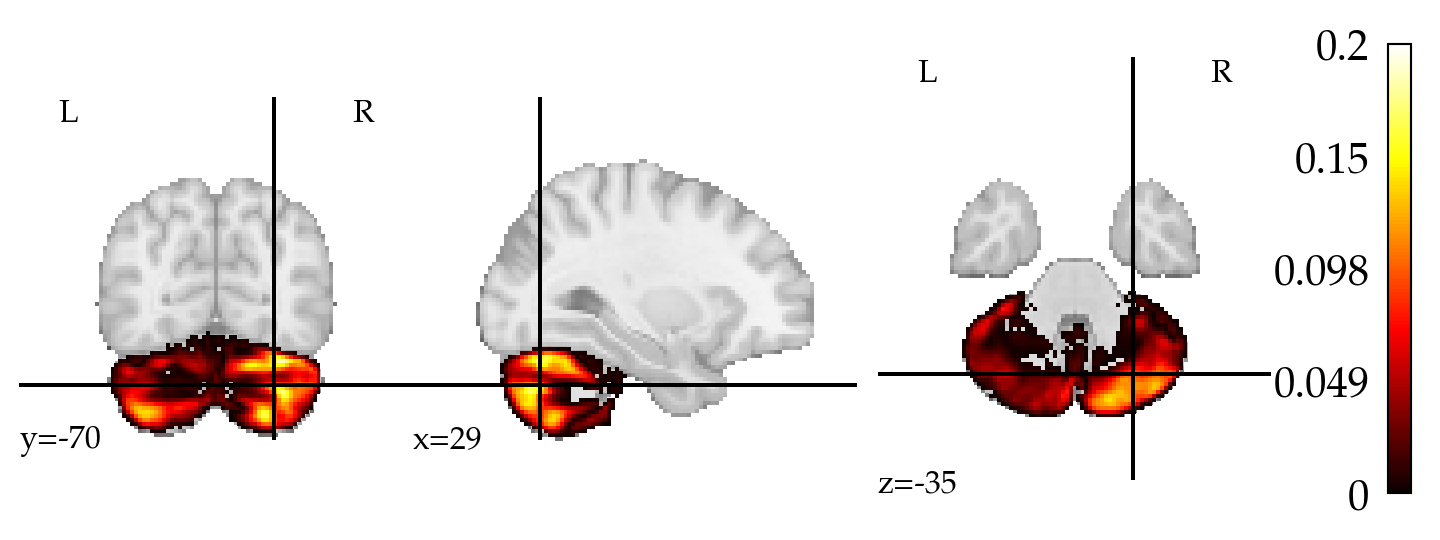

In [23]:
nilearn.plotting.plot_stat_map(nilearn.image.math_img('np.abs(a)', a=map_path), threshold=0.001)

In [24]:
proper_mask_2mm = nibabel.load(os.path.join(INPUT_DIR, 'maps/D2009_MNI_2mm.nii.gz'))
map_mni_2mm = nilearn.image.resample_to_img(map_mni, proper_mask_2mm)

/data/project/cerebellum_ale/venv/lib/python3.11/site-packages/nilearn/image/resampling.py:673: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  _resample_one_img(


In [25]:
# select tasks based on Fig. 1 of the Nature Neuroscience paper.
sel_tasks = ['VerbGeneration', 'ActionObservation', 'TheoryOfMind', 'VisualSearchMedium', 
             'Object2Back+', 'SadFaces', 'FingerSequence', 'Rest',
             'AnimatedMovie', 'LandscapeMovie', 'FingerSimple', 'SpatialImagery',
             'BiologicalMotion', 'MentalRotationMedium', 'SpatialMapMedium', 'Math']
sel_tasks_print_names = ['Verb Generation', 'Action Observation', 'Theory of Mind', 'Visual Search',
                         'Object 2-back', 'Sad Faces', 'Finger Sequence', 'Rest',
                         'Animated Movie', 'Landscape Movie', 'Finger Simple', 'Spatial Imagery',
                         'Biological Motion', 'Mental Rotation', 'Spatial Map', 'Math']
deformation = os.path.join(INPUT_DIR, 'def_suit2mni.nii')
proper_mask_2mm = nibabel.load(os.path.join(INPUT_DIR, 'maps/D2009_MNI_2mm.nii.gz'))

sel_maps = {}
sel_maps_mni = {}
for task in sel_tasks:
    print(task)
    for map_path in all_files:
        if task in map_path:
            break
    sel_maps[task] = map_path
    map_mni = SUITPy.reslice.reslice_image(map_path, deformation)
    map_mni_2mm = nilearn.image.resample_to_img(map_mni, proper_mask_2mm)
    sel_maps_mni[task] = map_mni_2mm
    # map_mni_2mm.to_filename(map_path.replace('space-SUIT', 'space-MNI2mm')) # Let's not overwrite the existing files

VerbGeneration


/data/project/cerebellum_ale/venv/lib/python3.11/site-packages/nitools/volume.py:187: RuntimeWarning: invalid value encountered in cast
  ir = np.floor(im).astype('int')
/data/project/cerebellum_ale/venv/lib/python3.11/site-packages/nitools/volume.py:188: RuntimeWarning: invalid value encountered in cast
  jr = np.floor(jm).astype('int')
/data/project/cerebellum_ale/venv/lib/python3.11/site-packages/nitools/volume.py:189: RuntimeWarning: invalid value encountered in cast
  kr = np.floor(km).astype('int')
/data/project/cerebellum_ale/venv/lib/python3.11/site-packages/nilearn/image/resampling.py:673: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  _resample_one_img(


ActionObservation


/data/project/cerebellum_ale/venv/lib/python3.11/site-packages/nitools/volume.py:187: RuntimeWarning: invalid value encountered in cast
  ir = np.floor(im).astype('int')
/data/project/cerebellum_ale/venv/lib/python3.11/site-packages/nitools/volume.py:188: RuntimeWarning: invalid value encountered in cast
  jr = np.floor(jm).astype('int')
/data/project/cerebellum_ale/venv/lib/python3.11/site-packages/nitools/volume.py:189: RuntimeWarning: invalid value encountered in cast
  kr = np.floor(km).astype('int')
/data/project/cerebellum_ale/venv/lib/python3.11/site-packages/nilearn/image/resampling.py:673: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  _resample_one_img(


TheoryOfMind


/data/project/cerebellum_ale/venv/lib/python3.11/site-packages/nitools/volume.py:187: RuntimeWarning: invalid value encountered in cast
  ir = np.floor(im).astype('int')
/data/project/cerebellum_ale/venv/lib/python3.11/site-packages/nitools/volume.py:188: RuntimeWarning: invalid value encountered in cast
  jr = np.floor(jm).astype('int')
/data/project/cerebellum_ale/venv/lib/python3.11/site-packages/nitools/volume.py:189: RuntimeWarning: invalid value encountered in cast
  kr = np.floor(km).astype('int')
/data/project/cerebellum_ale/venv/lib/python3.11/site-packages/nilearn/image/resampling.py:673: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  _resample_one_img(


VisualSearchMedium


/data/project/cerebellum_ale/venv/lib/python3.11/site-packages/nitools/volume.py:187: RuntimeWarning: invalid value encountered in cast
  ir = np.floor(im).astype('int')
/data/project/cerebellum_ale/venv/lib/python3.11/site-packages/nitools/volume.py:188: RuntimeWarning: invalid value encountered in cast
  jr = np.floor(jm).astype('int')
/data/project/cerebellum_ale/venv/lib/python3.11/site-packages/nitools/volume.py:189: RuntimeWarning: invalid value encountered in cast
  kr = np.floor(km).astype('int')
/data/project/cerebellum_ale/venv/lib/python3.11/site-packages/nilearn/image/resampling.py:673: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  _resample_one_img(


Object2Back+


/data/project/cerebellum_ale/venv/lib/python3.11/site-packages/nitools/volume.py:187: RuntimeWarning: invalid value encountered in cast
  ir = np.floor(im).astype('int')
/data/project/cerebellum_ale/venv/lib/python3.11/site-packages/nitools/volume.py:188: RuntimeWarning: invalid value encountered in cast
  jr = np.floor(jm).astype('int')
/data/project/cerebellum_ale/venv/lib/python3.11/site-packages/nitools/volume.py:189: RuntimeWarning: invalid value encountered in cast
  kr = np.floor(km).astype('int')
/data/project/cerebellum_ale/venv/lib/python3.11/site-packages/nilearn/image/resampling.py:673: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  _resample_one_img(


SadFaces


/data/project/cerebellum_ale/venv/lib/python3.11/site-packages/nitools/volume.py:187: RuntimeWarning: invalid value encountered in cast
  ir = np.floor(im).astype('int')
/data/project/cerebellum_ale/venv/lib/python3.11/site-packages/nitools/volume.py:188: RuntimeWarning: invalid value encountered in cast
  jr = np.floor(jm).astype('int')
/data/project/cerebellum_ale/venv/lib/python3.11/site-packages/nitools/volume.py:189: RuntimeWarning: invalid value encountered in cast
  kr = np.floor(km).astype('int')
/data/project/cerebellum_ale/venv/lib/python3.11/site-packages/nilearn/image/resampling.py:673: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  _resample_one_img(


FingerSequence


/data/project/cerebellum_ale/venv/lib/python3.11/site-packages/nitools/volume.py:187: RuntimeWarning: invalid value encountered in cast
  ir = np.floor(im).astype('int')
/data/project/cerebellum_ale/venv/lib/python3.11/site-packages/nitools/volume.py:188: RuntimeWarning: invalid value encountered in cast
  jr = np.floor(jm).astype('int')
/data/project/cerebellum_ale/venv/lib/python3.11/site-packages/nitools/volume.py:189: RuntimeWarning: invalid value encountered in cast
  kr = np.floor(km).astype('int')
/data/project/cerebellum_ale/venv/lib/python3.11/site-packages/nilearn/image/resampling.py:673: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  _resample_one_img(


Rest


/data/project/cerebellum_ale/venv/lib/python3.11/site-packages/nitools/volume.py:187: RuntimeWarning: invalid value encountered in cast
  ir = np.floor(im).astype('int')
/data/project/cerebellum_ale/venv/lib/python3.11/site-packages/nitools/volume.py:188: RuntimeWarning: invalid value encountered in cast
  jr = np.floor(jm).astype('int')
/data/project/cerebellum_ale/venv/lib/python3.11/site-packages/nitools/volume.py:189: RuntimeWarning: invalid value encountered in cast
  kr = np.floor(km).astype('int')
/data/project/cerebellum_ale/venv/lib/python3.11/site-packages/nilearn/image/resampling.py:673: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  _resample_one_img(


AnimatedMovie


/data/project/cerebellum_ale/venv/lib/python3.11/site-packages/nitools/volume.py:187: RuntimeWarning: invalid value encountered in cast
  ir = np.floor(im).astype('int')
/data/project/cerebellum_ale/venv/lib/python3.11/site-packages/nitools/volume.py:188: RuntimeWarning: invalid value encountered in cast
  jr = np.floor(jm).astype('int')
/data/project/cerebellum_ale/venv/lib/python3.11/site-packages/nitools/volume.py:189: RuntimeWarning: invalid value encountered in cast
  kr = np.floor(km).astype('int')
/data/project/cerebellum_ale/venv/lib/python3.11/site-packages/nilearn/image/resampling.py:673: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  _resample_one_img(


LandscapeMovie


/data/project/cerebellum_ale/venv/lib/python3.11/site-packages/nitools/volume.py:187: RuntimeWarning: invalid value encountered in cast
  ir = np.floor(im).astype('int')
/data/project/cerebellum_ale/venv/lib/python3.11/site-packages/nitools/volume.py:188: RuntimeWarning: invalid value encountered in cast
  jr = np.floor(jm).astype('int')
/data/project/cerebellum_ale/venv/lib/python3.11/site-packages/nitools/volume.py:189: RuntimeWarning: invalid value encountered in cast
  kr = np.floor(km).astype('int')
/data/project/cerebellum_ale/venv/lib/python3.11/site-packages/nilearn/image/resampling.py:673: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  _resample_one_img(


FingerSimple


/data/project/cerebellum_ale/venv/lib/python3.11/site-packages/nitools/volume.py:187: RuntimeWarning: invalid value encountered in cast
  ir = np.floor(im).astype('int')
/data/project/cerebellum_ale/venv/lib/python3.11/site-packages/nitools/volume.py:188: RuntimeWarning: invalid value encountered in cast
  jr = np.floor(jm).astype('int')
/data/project/cerebellum_ale/venv/lib/python3.11/site-packages/nitools/volume.py:189: RuntimeWarning: invalid value encountered in cast
  kr = np.floor(km).astype('int')
/data/project/cerebellum_ale/venv/lib/python3.11/site-packages/nilearn/image/resampling.py:673: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  _resample_one_img(


SpatialImagery


/data/project/cerebellum_ale/venv/lib/python3.11/site-packages/nitools/volume.py:187: RuntimeWarning: invalid value encountered in cast
  ir = np.floor(im).astype('int')
/data/project/cerebellum_ale/venv/lib/python3.11/site-packages/nitools/volume.py:188: RuntimeWarning: invalid value encountered in cast
  jr = np.floor(jm).astype('int')
/data/project/cerebellum_ale/venv/lib/python3.11/site-packages/nitools/volume.py:189: RuntimeWarning: invalid value encountered in cast
  kr = np.floor(km).astype('int')
/data/project/cerebellum_ale/venv/lib/python3.11/site-packages/nilearn/image/resampling.py:673: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  _resample_one_img(


BiologicalMotion


/data/project/cerebellum_ale/venv/lib/python3.11/site-packages/nitools/volume.py:187: RuntimeWarning: invalid value encountered in cast
  ir = np.floor(im).astype('int')
/data/project/cerebellum_ale/venv/lib/python3.11/site-packages/nitools/volume.py:188: RuntimeWarning: invalid value encountered in cast
  jr = np.floor(jm).astype('int')
/data/project/cerebellum_ale/venv/lib/python3.11/site-packages/nitools/volume.py:189: RuntimeWarning: invalid value encountered in cast
  kr = np.floor(km).astype('int')
/data/project/cerebellum_ale/venv/lib/python3.11/site-packages/nilearn/image/resampling.py:673: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  _resample_one_img(


MentalRotationMedium


/data/project/cerebellum_ale/venv/lib/python3.11/site-packages/nitools/volume.py:187: RuntimeWarning: invalid value encountered in cast
  ir = np.floor(im).astype('int')
/data/project/cerebellum_ale/venv/lib/python3.11/site-packages/nitools/volume.py:188: RuntimeWarning: invalid value encountered in cast
  jr = np.floor(jm).astype('int')
/data/project/cerebellum_ale/venv/lib/python3.11/site-packages/nitools/volume.py:189: RuntimeWarning: invalid value encountered in cast
  kr = np.floor(km).astype('int')
/data/project/cerebellum_ale/venv/lib/python3.11/site-packages/nilearn/image/resampling.py:673: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  _resample_one_img(


SpatialMapMedium


/data/project/cerebellum_ale/venv/lib/python3.11/site-packages/nitools/volume.py:187: RuntimeWarning: invalid value encountered in cast
  ir = np.floor(im).astype('int')
/data/project/cerebellum_ale/venv/lib/python3.11/site-packages/nitools/volume.py:188: RuntimeWarning: invalid value encountered in cast
  jr = np.floor(jm).astype('int')
/data/project/cerebellum_ale/venv/lib/python3.11/site-packages/nitools/volume.py:189: RuntimeWarning: invalid value encountered in cast
  kr = np.floor(km).astype('int')
/data/project/cerebellum_ale/venv/lib/python3.11/site-packages/nilearn/image/resampling.py:673: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  _resample_one_img(


Math


/data/project/cerebellum_ale/venv/lib/python3.11/site-packages/nitools/volume.py:187: RuntimeWarning: invalid value encountered in cast
  ir = np.floor(im).astype('int')
/data/project/cerebellum_ale/venv/lib/python3.11/site-packages/nitools/volume.py:188: RuntimeWarning: invalid value encountered in cast
  jr = np.floor(jm).astype('int')
/data/project/cerebellum_ale/venv/lib/python3.11/site-packages/nitools/volume.py:189: RuntimeWarning: invalid value encountered in cast
  kr = np.floor(km).astype('int')
/data/project/cerebellum_ale/venv/lib/python3.11/site-packages/nilearn/image/resampling.py:673: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  _resample_one_img(


# Run variogram-based correlation between an example Z map and the MDTB maps

In [27]:
bd = 'Action'
subbd = 'Action'

mask_data = proper_mask_2mm.get_fdata().astype('bool')

z_2mm = os.path.join(OUTPUT_DIR, f'SALE/{bd}/{subbd}/uncorr_z_2mm.nii.gz')
z_2mm_masked = nibabel.load(z_2mm).get_fdata()[mask_data]
surrogates_path = os.path.join(OUTPUT_DIR, f'SALE/{bd}/{subbd}/uncorr_z_2mm_mask-D2009_MNI_surrogates-variogram_n-1000.npy')
surrogates = np.load(surrogates_path)

r = pd.DataFrame(index=sel_tasks, dtype=float)
p = pd.DataFrame(index=sel_tasks, dtype=float)

for task in sel_tasks:
    col = f'{bd}.{subbd}'
    target_masked = sel_maps_mni[task].get_fdata()[mask_data]
    r.loc[task, col] = scipy.stats.pearsonr(z_2mm_masked, target_masked).statistic
    null_dist = []
    for i in range(1000):
        null_dist.append(
            scipy.stats.pearsonr(surrogates[i, :], target_masked).statistic
        )
    p.loc[task, col] = (np.abs(null_dist) >= np.abs(r.loc[task, col])).mean()

In [28]:
r

Action.Action
VerbGeneration             0.021714
ActionObservation          0.127240
TheoryOfMind              -0.166748
VisualSearchMedium        -0.206105
Object2Back+              -0.067195
SadFaces                  -0.093342
FingerSequence             0.468160
Rest                      -0.098188
AnimatedMovie             -0.237728
LandscapeMovie            -0.246226
FingerSimple               0.007492
SpatialImagery            -0.089228
BiologicalMotion          -0.180786
MentalRotationMedium       0.052767
SpatialMapMedium           0.201418
Math                      -0.043706

In [29]:
p

Action.Action
VerbGeneration                0.837
ActionObservation             0.124
TheoryOfMind                  0.123
VisualSearchMedium            0.011
Object2Back+                  0.421
SadFaces                      0.253
FingerSequence                0.000
Rest                          0.229
AnimatedMovie                 0.014
LandscapeMovie                0.007
FingerSimple                  0.929
SpatialImagery                0.300
BiologicalMotion              0.062
MentalRotationMedium          0.485
SpatialMapMedium              0.026
Math                          0.621

In [31]:
mask_data = proper_mask_2mm.get_fdata().astype('bool')

# Initialize DataFrames
r = pd.DataFrame(index=sel_tasks, dtype=float)
p = pd.DataFrame(index=sel_tasks, dtype=float)

surrogates_paths = sorted(glob.glob(os.path.join(OUTPUT_DIR,
    'SALE/*/*/uncorr_z_2mm_mask-D2009_MNI_surrogates-variogram_n-1000.npy')
))

for surrogates_path in tqdm(surrogates_paths):
    try:
        # Extract subbd using regex for better reliability
        subbd_match = re.search(r'SALE/(.*?)/(.*?)/', surrogates_path)
        if subbd_match:
            subbd = subbd_match.group(2)
        else:
            print(f"Failed to parse subbd from path: {surrogates_path}")
            continue

        # Load z map and mask it
        z_2mm = os.path.join(os.path.dirname(surrogates_path), 'uncorr_z_2mm.nii.gz')
        z_2mm_masked = nibabel.load(z_2mm).get_fdata()[mask_data]

        # Load surrogates
        surrogates = np.load(surrogates_path)
        
        # Calculate r and p between each task and current z
        for task in tqdm(sel_tasks):
            target_masked = sel_maps_mni[task].get_fdata()[mask_data]
            r.loc[task, subbd] = scipy.stats.pearsonr(z_2mm_masked, target_masked).statistic
            
            null_dist = [scipy.stats.pearsonr(surrogates[i, :], target_masked).statistic for i in range(1000)]
            p.loc[task, subbd] = (np.abs(null_dist) >= np.abs(r.loc[task, subbd])).mean()
    except Exception as e:
        print(f"Error processing {surrogates_path}: {e}")

# Display the resulting DataFrames
print(r)
print(p)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [11:59<00:00, 17.99s/it]

                      Action.Execution.Speech  Action.Execution  \
VerbGeneration                       0.005312          0.026220   
ActionObservation                    0.103172          0.065123   
TheoryOfMind                        -0.054971         -0.136682   
VisualSearchMedium                   0.048246         -0.168844   
Object2Back+                         0.027264         -0.054297   
SadFaces                            -0.128990         -0.055301   
FingerSequence                       0.229003          0.451441   
Rest                                -0.163117         -0.104646   
AnimatedMovie                       -0.098850         -0.231292   
LandscapeMovie                      -0.249826         -0.256768   
FingerSimple                        -0.138805         -0.025335   
SpatialImagery                      -0.213687         -0.124597   
BiologicalMotion                    -0.210797         -0.209893   
MentalRotationMedium                 0.051556          0.04423

In [32]:
# Save correlations and p-values to csv
r.to_csv(os.path.join(BASE_DIR, 'Figures/Publication/Figure5/Supplementary/z_mdtb_posneg_r.csv'))
p.to_csv(os.path.join(BASE_DIR, 'Figures/Publication/Figure5/Supplementary/z_mdtb_posneg_p.csv'))

# Plot and hierarchically cluster

In [33]:
subdomain_labels = pd.Series({
    'Action': 'Action',
    'Cognition': 'Cognition',
    'Perception': 'Perception',
    'Emotion': 'Emotion',
    'Interoception': 'Interoception',
    'Action.MotorLearning': 'Motor Learning',
    'Action.Observation': 'Observation',
    'Action.Execution.Speech': 'Speech Execution',
    'Action.Inhibition': 'Inhibition',
    'Action.Execution': 'Execution',
    'Action.Preparation': 'Preparation',
    'Action.Imagination': 'Imagination',
    'Cognition.Spatial': 'Spatial',
    'Cognition.SocialCognition': 'Social Cognition',
    'Cognition.Attention': 'Attention',
    'Cognition.Language.Syntax': 'Syntax',
    'Cognition.Memory': 'Memory',
    'Cognition.Memory.Explicit': 'Explicit Memory',
    'Cognition.Language': 'Language',
    'Cognition.Language.Semantics': 'Semantics',
    'Cognition.Memory.Working': 'Working Memory',
    'Cognition.Language.Phonology': 'Phonology',
    'Cognition.Reasoning': 'Reasoning',
    'Cognition.Temporal': 'Temporal',
    'Cognition.Language.Speech': 'Speech',
    'Cognition.Language.Orthography': 'Orthography',
    'Cognition.Music': 'Music',
    'Emotion.Positive.RewardGain': 'Reward/ Gain',
    'Emotion.Negative.Disgust': 'Disgust',
    'Emotion.Positive': 'Positive Emotion',
    'Emotion.Negative.Fear': 'Fear',
    'Emotion.Positive.Happiness': 'Happiness',
    'Emotion.Negative.Sadness': 'Sadness',
    'Emotion.Negative': 'Negative Emotion',
    'Emotion.Valence': 'Valence',
    'Emotion.Negative.Anger': 'Anger',
    'Emotion.Negative.Anxiety': 'Anxiety',
    'Perception.Vision': 'Vision',
    'Perception.Olfaction': 'Olfaction',
    'Perception.Vision.Motion': 'Vision - Motion',
    'Perception.Gustation': 'Gustation',
    'Perception.Somesthesis.Pain': 'Pain',
    'Perception.Audition': 'Audition',
    'Perception.Somesthesis': 'Somesthesis',
    'Perception.Vision.Color': 'Vision - Color',
    'Perception.Vision.Shape': 'Vision - Shape',
    'Interoception.Sexuality': 'Sexuality',
    'Interoception.RespirationRegulation': 'Respiration Regulation',
    'Interoception.Hunger': 'Hunger'
})

In [34]:
# Function to create a linkage matrix from a model of the correlations
def create_linkage_matrix(model):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)

    for i, (left_child, right_child) in enumerate(model.children_):
        count_left = 1 if left_child < n_samples else counts[left_child - n_samples]
        count_right = 1 if right_child < n_samples else counts[right_child - n_samples]
        counts[i] = count_left + count_right

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    return linkage_matrix

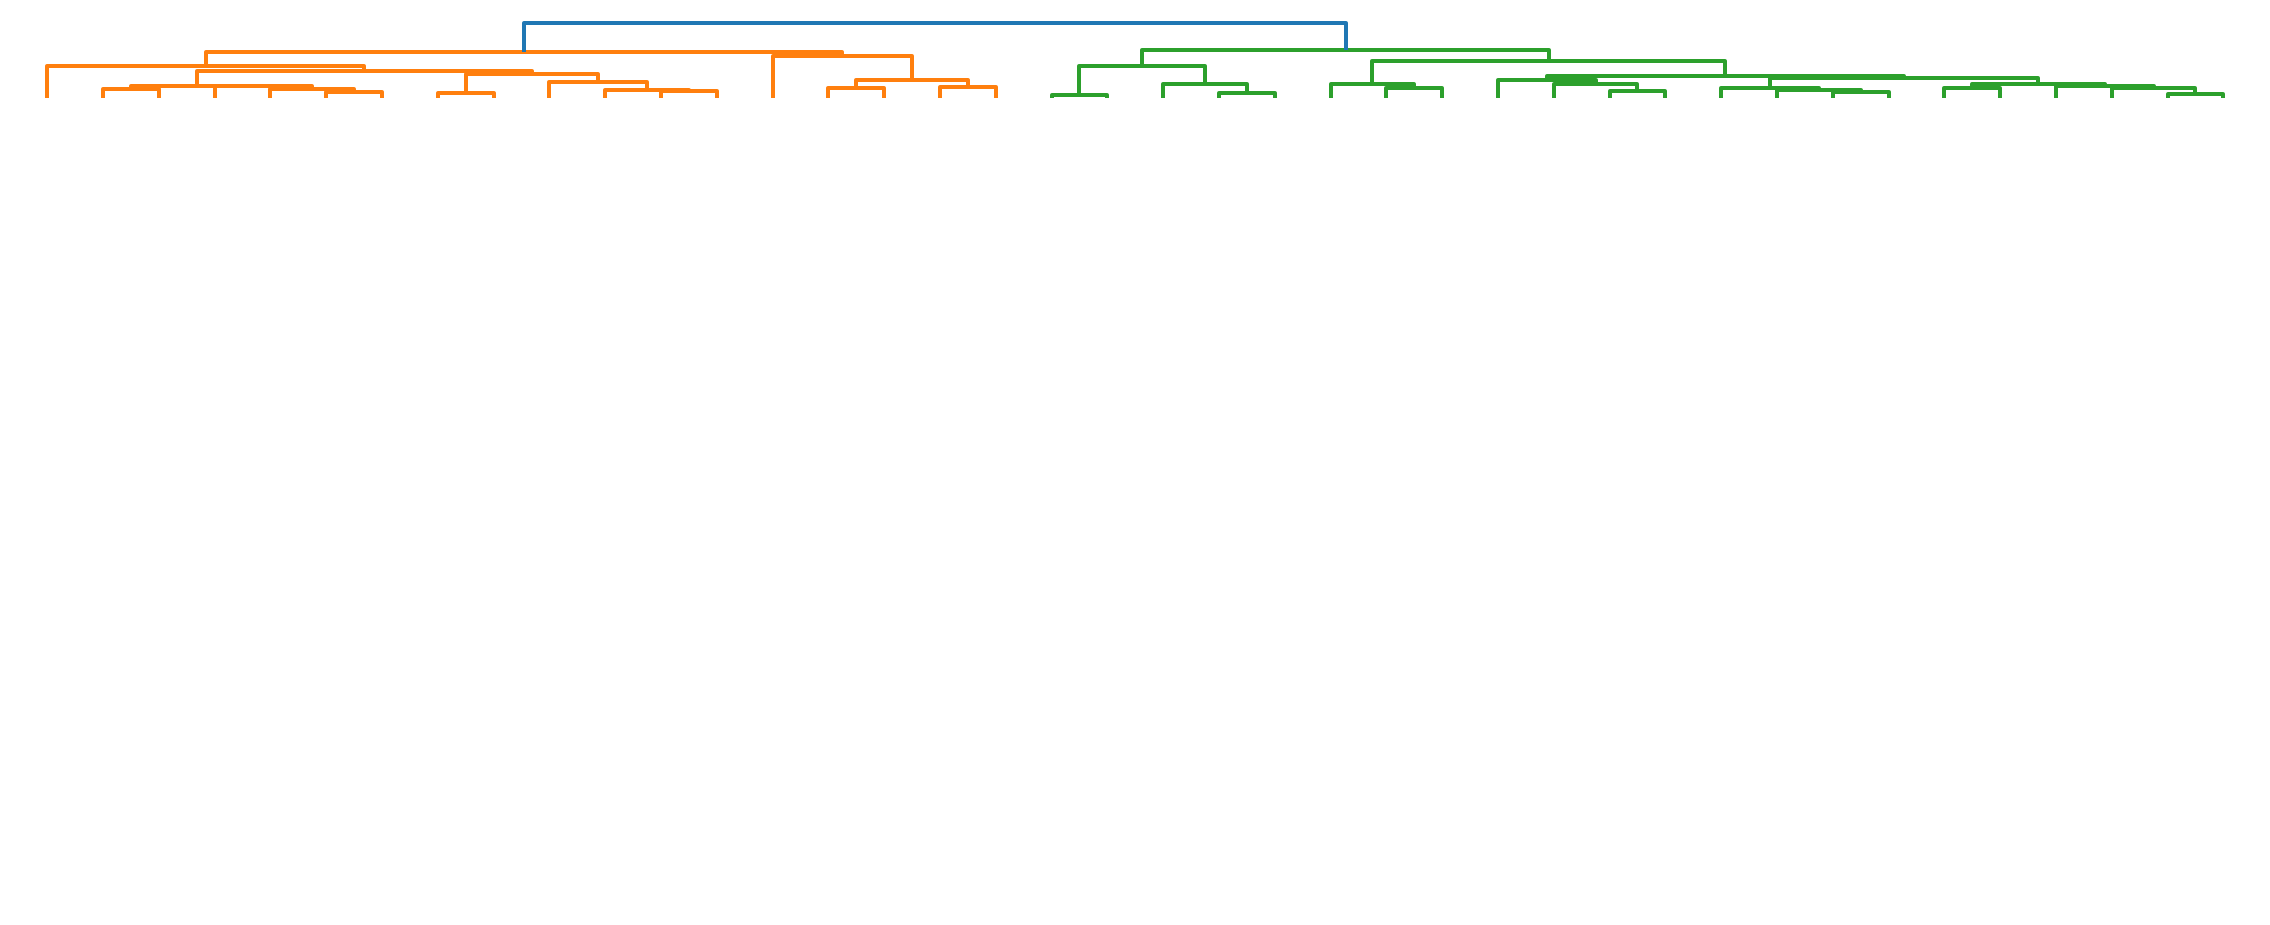

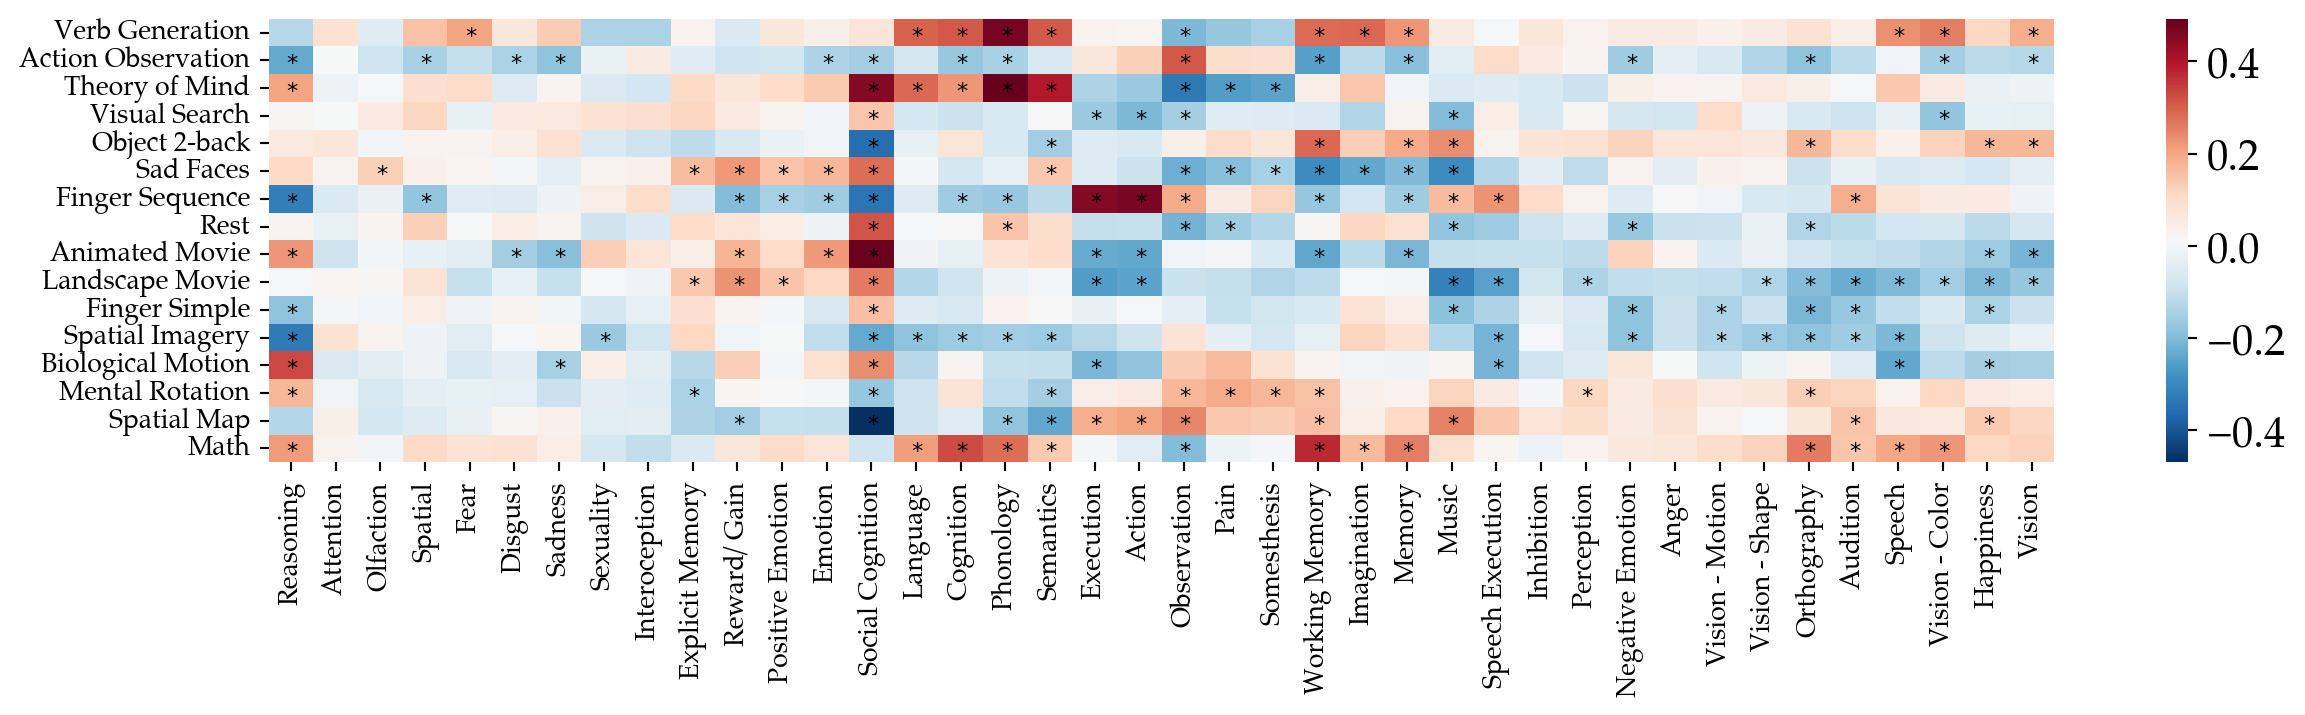

In [35]:
# Hierarchical clustering
model = AgglomerativeClustering(n_clusters=None, distance_threshold=0)
model.fit(r.T)

# Linkage matrix
linkage_matrix = create_linkage_matrix(model)

# Plot the dendrogram and extract the leaf order
fig, ax = plt.subplots(figsize=(15, 6))
dendro = dendrogram(linkage_matrix, show_contracted=True, ax=ax, no_labels=True)
# ax.set_title("Hierarchical Clustering Dendrogram")
# ax.set_ylabel("Distance")
ax.set_ylim([-25, ax.get_ylim()[1]])
ax.axis('off')

fig.savefig(os.path.join(BASE_DIR, 'Figures/Publication/Figure5/5a_mdtb_posneg_correlations_variogram_fdr-dendogram.png'), bbox_inches='tight')

# extract the ordering
leaf_order = dendro['leaves']

# reorder the original data
r_reordered = r.iloc[:, leaf_order]

# plot the reordered data
fig, ax = plt.subplots(figsize=(15, 3))
sns.heatmap(r_reordered, cmap='RdBu_r',linecolor='.8', ax=ax)
ax.set_xticks(np.arange(r.shape[1])+0.5)
ax.set_xticklabels(subdomain_labels.loc[r_reordered.columns].values, rotation=90, horizontalalignment='center', fontsize=10)
ax.set_yticks(np.arange(r.shape[0])+0.5)
ax.set_yticklabels(sel_tasks_print_names, rotation=0, fontsize=10)
ax.set_ylabel('')

# add the * layer
sig = p < 0.05
sig = sig.iloc[:, leaf_order]
for x, col in enumerate(r_reordered.columns):
    for y, row in enumerate(r_reordered.index):
        if sig.loc[row, col]:
            text = r'$^*$'
            ax.text(x+0.5, y+1.0,
                    text, 
                    fontsize=12,
                    color='black',
                    horizontalalignment='center', 
                    verticalalignment='center')

# Report significance only when surviving multiple-comparison correction (FDR)

In [36]:
import statsmodels.stats.multitest
# FDR correction
sig_fdr, _ = statsmodels.stats.multitest.fdrcorrection(p.values.flatten())
# reshape 
sig_fdr = pd.DataFrame(sig_fdr.reshape(p.shape), index=p.index, columns=p.columns)
# reorder
sig_fdr = sig_fdr.iloc[:, leaf_order]

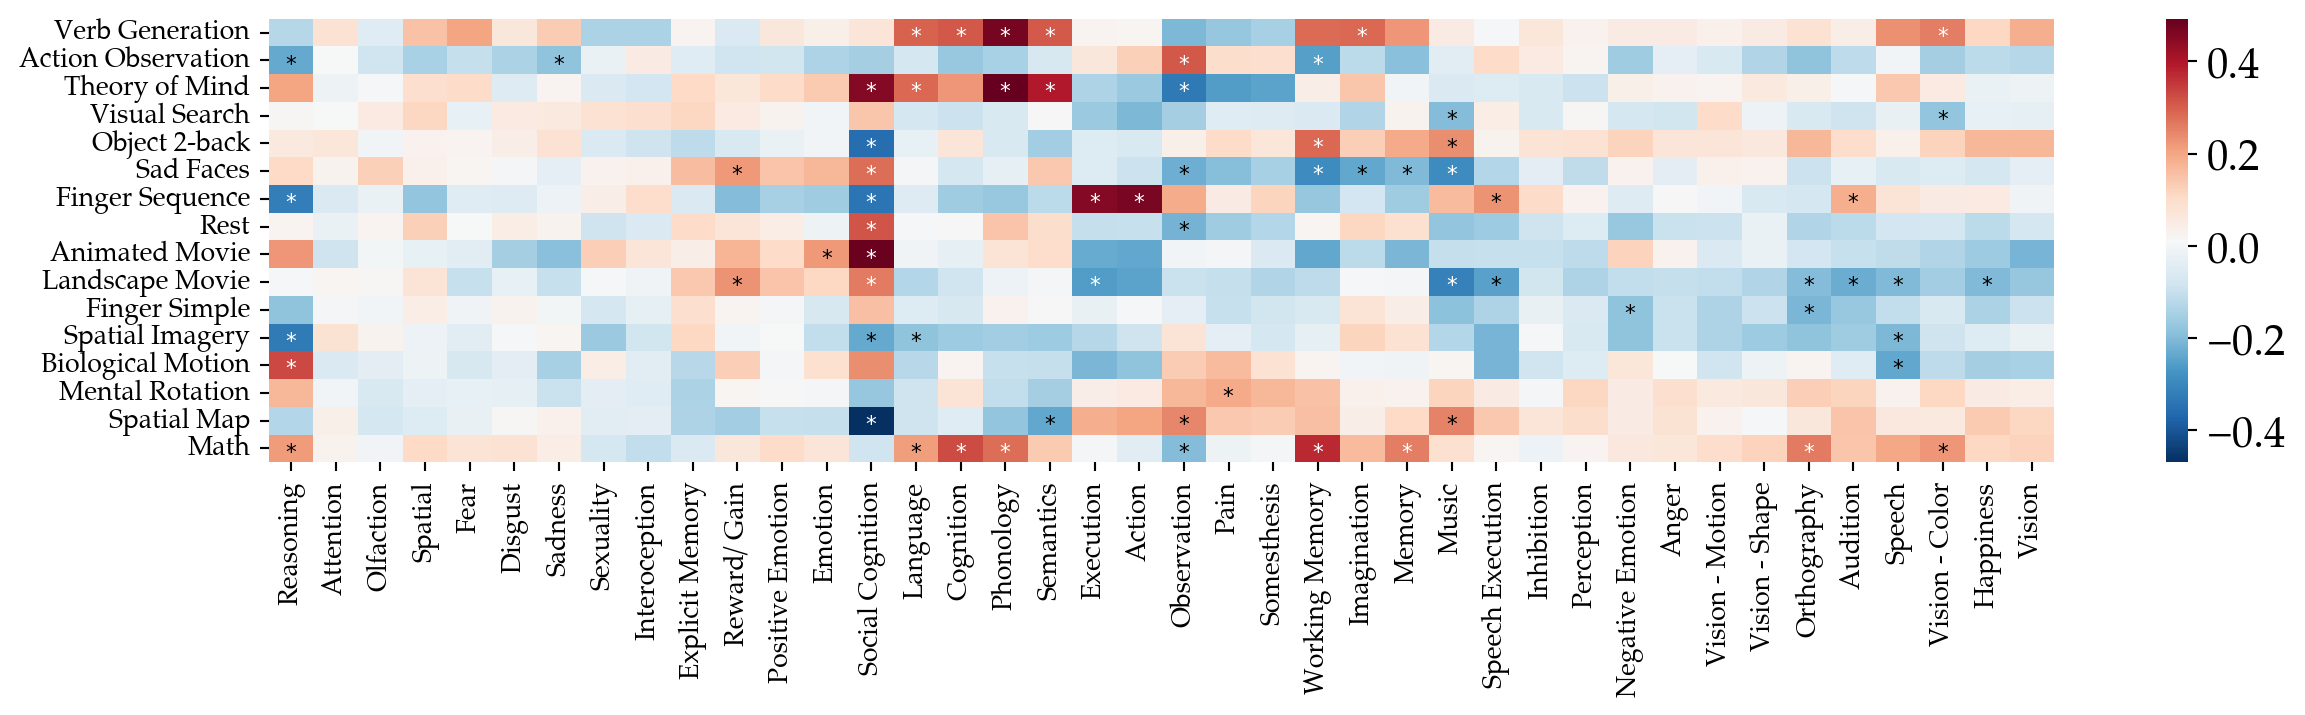

In [37]:
# plot the reordered data
fig, ax = plt.subplots(figsize=(15, 3))
sns.heatmap(r_reordered, cmap='RdBu_r',linecolor='.8', ax=ax)
ax.set_xticks(np.arange(r.shape[1])+0.5)
ax.set_xticklabels(subdomain_labels.loc[r_reordered.columns].values, rotation=90, horizontalalignment='center', fontsize=10)
ax.set_yticks(np.arange(r.shape[0])+0.5)
ax.set_yticklabels(sel_tasks_print_names, rotation=0, fontsize=10)
ax.set_ylabel('')

# add the * layer
for x, col in enumerate(r_reordered.columns):
    for y, row in enumerate(r_reordered.index):
        if sig_fdr.loc[row, col]: # Use the FDR-corrected p-values.
            text = r'$*$'
            # Conditional color based on the value of r
            text_color = 'white' if r_reordered.loc[row, col] > 0.25 or r_reordered.loc[row, col] < -0.25  else 'black'
            ax.text(x+0.5, y+0.6,
                    text, 
                    fontsize=8,
                    color=text_color,
                    horizontalalignment='center', 
                    verticalalignment='center')


In [38]:
# Decide if you want to save the figure
fig.savefig(os.path.join(BASE_DIR, 'Figures/Publication/Figure5/5a_mdtb_posneg_correlations_variogram_fdr.png'), bbox_inches='tight')

# We will also try to compare out maps against the probabilistic lobular segmentation of Diedrichsen et al. (2009).

In [3]:
# Load data
D2009p = nibabel.load(os.path.join(INPUT_DIR, 'cerebellar_atlases/Diedrichsen_2009/atl-Anatom_space-MNI_probseg.nii'))

# Resample the parcellation

In [4]:
D2009p_data = D2009p.get_fdata()
print(D2009p_data.shape)  # Should print something like (x, y, z, n)

(153, 103, 84, 34)


In [5]:
# View the first statmap (e.g., the probabilistic map for the first region)
first_statmap = D2009p_data[:, :, :, 15]

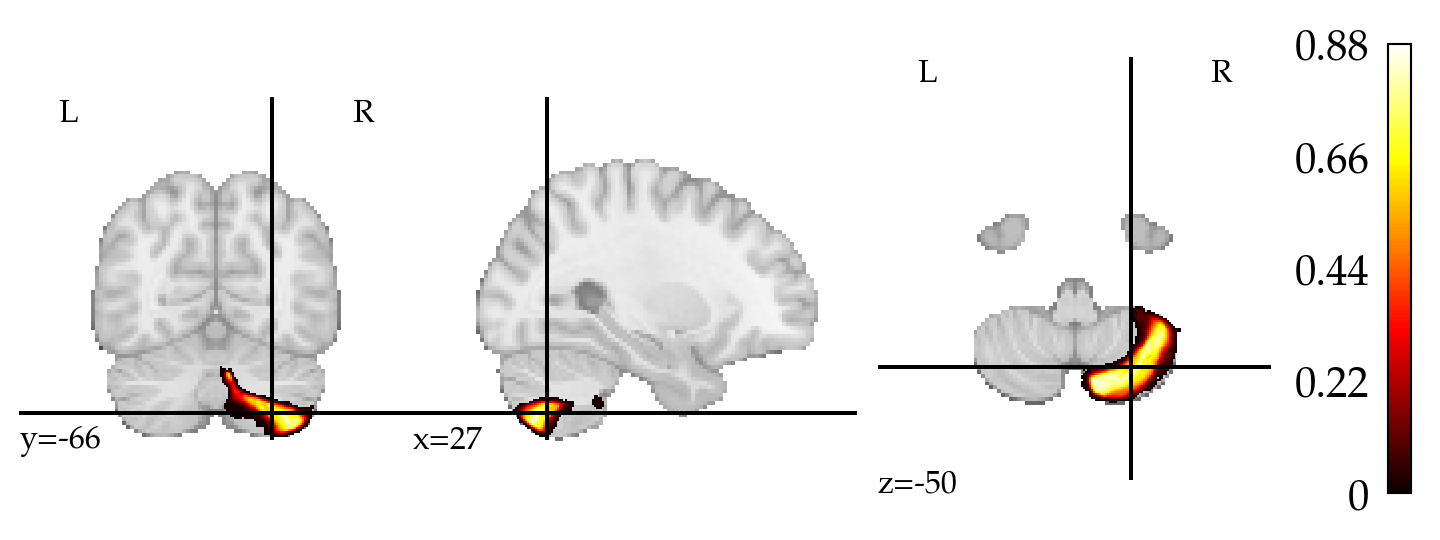

In [6]:
nilearn.plotting.plot_stat_map(nibabel.Nifti1Image(first_statmap, D2009p.affine))
plt.show() # This should show the proabilistic segmentation for a selected lobule. The nice thing is that this allows

In [7]:
# Check affine matrices to see if resampling is necessary
print("Affine of 4D Probabilistic Segmentation Map (D2009p):")
print(D2009p.affine)

proper_mask_2mm = nibabel.load(os.path.join(INPUT_DIR, 'maps/D2009_MNI_2mm.nii.gz'))
print("\nAffine of Target Mask (proper_mask_2mm):")
print(proper_mask_2mm.affine)

# They are slightly different.

Affine of 4D Probabilistic Segmentation Map (D2009p):
[[  -1.    0.    0.   76.]
 [   0.    1.    0. -108.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]

Affine of Target Mask (proper_mask_2mm):
[[   2.    0.    0.  -76.]
 [   0.    2.    0. -108.]
 [   0.    0.    2.  -72.]
 [   0.    0.    0.    1.]]


In [9]:
# Resample each of the 3D maps, just to be sure.
from nilearn.image import resample_to_img

# Loop through each 3D map in the 4D image
resampled_maps = []
for i in range(D2009p.shape[-1]):
    # Extract the i-th 3D map
    statmap = nibabel.Nifti1Image(D2009p.dataobj[..., i], D2009p.affine)

    # Resample to the target mask for each map individually
    resampled_statmap = resample_to_img(statmap, proper_mask_2mm, interpolation='nearest')

    resampled_maps.append(resampled_statmap)


In [10]:
# Save each resampled map
for idx, img in enumerate(resampled_maps):
    nibabel.save(img, os.path.join(INPUT_DIR, f'maps/Diedrichsen2009_resampled_mni2mm/resampled_map_{idx}.nii.gz'))

# Combine them into a single 4D image and save
combined_4d_map = nibabel.concat_images(resampled_maps)
nibabel.save(combined_4d_map, os.path.join(INPUT_DIR, 'maps/Diedrichsen2009_resampled_mni2mm/D2009_resampled_mni-2mm.nii.gz'))


In [20]:
# We can also load the combined 4D file here.
combined_4d_map = nibabel.load(os.path.join(INPUT_DIR, 'maps/Diedrichsen2009_resampled_mni2mm/D2009_resampled_mni-2mm.nii.gz'))

In [11]:
## Check if we can access the new 4D map.
### If you have a good eye, you can see the proabilistic segmentation also moved a bit.

(77, 52, 43, 34)


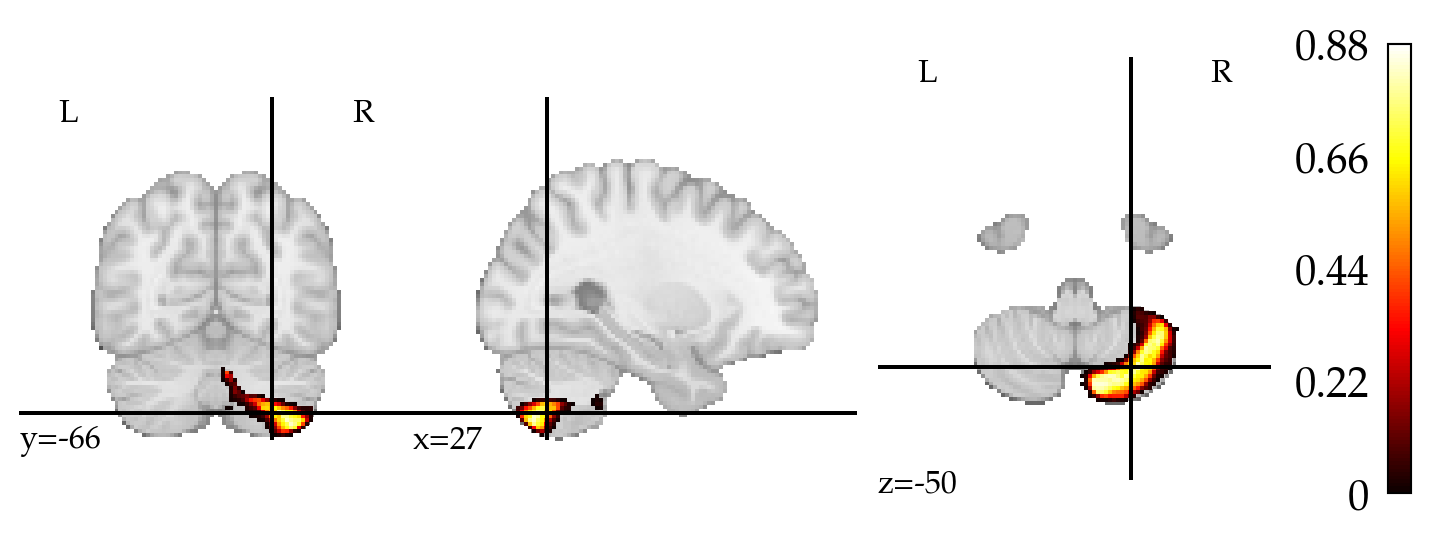

In [13]:
# View the first statmap (e.g., the probabilistic map for the first region)
D2009p_new_data = combined_4d_map.get_fdata()
print(D2009p_new_data.shape)  # Should print something like (x, y, z, n)

fifteenth_statmap = D2009p_new_data[:, :, :, 15]
nilearn.plotting.plot_stat_map(nibabel.Nifti1Image(fifteenth_statmap, combined_4d_map.affine))
plt.show() # This should show the probabilistic segmentation for a selected lobule. The nice thing is that this allows

# Run variogram-based correlation between an example Z map and the probabilistic lobular maps

In [17]:
jd_labels_prob = pd.Series({
    '0': 'Left I-IV',
    '1': 'Right I-IV',
    '2': 'Left V',
    '3': 'Right V',
    '4': 'Left VI',
    '5': 'Vermis VI',
    '6': 'Right VI',
    '7': 'Left Crus I',
    '8': 'Vermis Crus I',
    '9': 'Right Crus I',
    '10': 'Left Crus II',
    '11': 'Vermis Crus II',
    '12': 'Right Crus II',
    '13': 'Left VIIb',
    '14': 'Vermis VIIb',
    '15': 'Right VIIb',
    '16': 'Left VIIIa',
    '17': 'Vermis VIIIa',
    '18': 'Right VIIIa',
    '19': 'Left VIIIb',
    '20': 'Vermis VIIIb',
    '21': 'Right VIIIb',
    '22': 'Left IX',
    '23': 'Vermis IX',
    '24': 'Right IX',
    '25': 'Left X',
    '26': 'Vermis X',
    '27': 'Right X',
    '28': 'Left Dentate',
    '29': 'Right Dentate',
    '30': 'Left Interposed',
    '31': 'Right Interposed',
    '32': 'Left Fastigial',
    '33': 'Right Fastigial'
})


In [18]:
# Use the labels of choice (here lobule labels, appears that the fastigial nuclei are included here as well).
lobule_labels = jd_labels_prob

In [21]:
# Check the shape of the 4D map
print("Shape of the 4D map:", combined_4d_map.shape)

# Number of volumes in the 4D map (i.e., size of the fourth dimension)
num_volumes = combined_4d_map.shape[-1]
print("Number of volumes (maps) in the 4D map:", num_volumes)

# Verify that your labels align with the available indices
max_label_index = max(int(label) for label in lobule_labels.keys())
print("Max label index:", max_label_index)

if max_label_index >= num_volumes:
    print("Warning: Some labels exceed the number of available volumes in the 4D map.")


Shape of the 4D map: (77, 52, 43, 34)
Number of volumes (maps) in the 4D map: 34
Max label index: 33


In [17]:
# Example domain. BDs are organized with an identical subdomain name.
bd = 'Action'
subbd = 'Action'

mask_data = proper_mask_2mm.get_fdata().astype('bool')

# Initialize DataFrames for storing results
r = pd.DataFrame(index=lobule_labels.values, dtype=float)
p = pd.DataFrame(index=lobule_labels.values, dtype=float)

# Load your "Action" map and mask it
z_2mm = os.path.join(OUTPUT_DIR, f'SALE/{bd}/{subbd}/uncorr_z_2mm.nii.gz')
z_2mm_masked = nibabel.load(z_2mm).get_fdata()[mask_data]

# Load surrogate data
surrogates_path = os.path.join(OUTPUT_DIR, f'SALE/{bd}/{subbd}/uncorr_z_2mm_mask-D2009_MNI_surrogates-variogram_n-1000.npy')
surrogates = np.load(surrogates_path)

# Compare the "Action" map against each map in the combined 4D map
for label, lobule_name in lobule_labels.items():
    # Convert the label to an integer to access the correct 3D map from the 4D map
    label_idx = int(label)

    # Extract the i-th 3D map from the 4D map
    statmap = combined_4d_map.slicer[..., label_idx]
    statmap_masked = statmap.get_fdata()[mask_data]

    # Calculate Pearson correlation
    r.loc[lobule_name, 'Action'] = scipy.stats.pearsonr(z_2mm_masked, statmap_masked).statistic

    # Generate null distribution and calculate p-value
    null_dist = [scipy.stats.pearsonr(surrogates[j, :], statmap_masked).statistic for j in range(1000)]
    p.loc[lobule_name, 'Action'] = (np.abs(null_dist) >= np.abs(r.loc[lobule_name, 'Action'])).mean()

In [18]:
r

Action
Left I-IV        -0.068351
Right I-IV       -0.011406
Left V            0.114232
Right V           0.362585
Left VI           0.227786
Vermis VI         0.070962
Right VI          0.247039
Left Crus I      -0.170145
Vermis Crus I    -0.023657
Right Crus I     -0.176929
Left Crus II     -0.154068
Vermis Crus II   -0.034835
Right Crus II    -0.138790
Left VIIb        -0.001121
Vermis VIIb      -0.031545
Right VIIb        0.037435
Left VIIIa        0.077847
Vermis VIIIa     -0.054716
Right VIIIa       0.203057
Left VIIIb       -0.067809
Vermis VIIIb     -0.042802
Right VIIIb       0.096353
Left IX          -0.087271
Vermis IX        -0.043690
Right IX         -0.053777
Left X           -0.035814
Vermis X         -0.028327
Right X          -0.036246
Left Dentate     -0.008634
Right Dentate    -0.000503
Left Interposed  -0.014754
Right Interposed  0.002489
Left Fastigial   -0.009473
Right Fastigial  -0.008650

In [19]:
p # Seems that we find Action roughly where we expect it!

Action
Left I-IV          0.459
Right I-IV         0.926
Left V             0.121
Right V            0.002
Left VI            0.034
Vermis VI          0.162
Right VI           0.028
Left Crus I        0.093
Vermis Crus I      0.211
Right Crus I       0.081
Left Crus II       0.091
Vermis Crus II     0.222
Right Crus II      0.122
Left VIIb          0.986
Vermis VIIb        0.193
Right VIIb         0.718
Left VIIIa         0.437
Vermis VIIIa       0.183
Right VIIIa        0.042
Left VIIIb         0.524
Vermis VIIIb       0.256
Right VIIIb        0.230
Left IX            0.218
Vermis IX          0.208
Right IX           0.603
Left X             0.206
Vermis X           0.225
Right X            0.274
Left Dentate       0.924
Right Dentate      0.993
Left Interposed    0.741
Right Interposed   0.959
Left Fastigial     0.230
Right Fastigial    0.524

In [20]:
# Initialize DataFrames for storing results
r = pd.DataFrame(index=lobule_labels.values, dtype=float)
p = pd.DataFrame(index=lobule_labels.values, dtype=float)

# Define the mask for the brain area of interest
mask_data = proper_mask_2mm.get_fdata().astype('bool')

# Get all surrogates paths
surrogates_paths = sorted(glob.glob(os.path.join(OUTPUT_DIR, 
    'SALE/*/*/uncorr_z_2mm_mask-D2009_MNI_surrogates-variogram_n-1000.npy')
))

# Iterate through each surrogate file to perform the correlation
for surrogates_path in tqdm(surrogates_paths, desc="Processing Surrogate Paths"):
    try:
        # Extract the domain and subdomain from the file path using regex
        subbd_match = re.search(r'SALE/(.*?)/(.*?)/', surrogates_path)
        if subbd_match:
            bd = subbd_match.group(1)
            subbd = subbd_match.group(2)
        else:
            print(f"Failed to parse bd/subbd from path: {surrogates_path}")
            continue

        # Load z map and apply the mask
        z_2mm = os.path.join(os.path.dirname(surrogates_path), 'uncorr_z_2mm.nii.gz')
        z_2mm_masked = nibabel.load(z_2mm).get_fdata()[mask_data]

        # Load surrogate maps
        surrogates = np.load(surrogates_path)

        # Compare against each lobule in the 4D combined map
        for label, lobule_name in lobule_labels.items():
            # Convert the label to an integer index for accessing the 3D map
            label_idx = int(label) - 1  # Adjust index to match 0-based indexing

            # Extract the corresponding 3D map from the combined 4D map
            statmap = combined_4d_map.slicer[..., label_idx]
            statmap_masked = statmap.get_fdata()[mask_data]

            # Calculate Pearson correlation
            r.loc[lobule_name, f'{bd}/{subbd}'] = scipy.stats.pearsonr(z_2mm_masked, statmap_masked).statistic

            # Generate null distribution and calculate p-value
            null_dist = [scipy.stats.pearsonr(surrogates[i, :], statmap_masked).statistic for i in range(1000)]
            p.loc[lobule_name, f'{bd}/{subbd}'] = (np.abs(null_dist) >= np.abs(r.loc[lobule_name, f'{bd}/{subbd}'])).mean()

    except Exception as e:
        print(f"Error processing {surrogates_path}: {e}")

# Display the resulting DataFrames
# print("Correlation results:")
# print(r)
# print("\nP-values:")
# print(p)

Processing Surrogate Paths: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [20:21<00:00, 30.53s/it]


In [22]:
# Save correlations and p-values to csv
r.to_csv(os.path.join(BASE_DIR, 'Figures/Publication/Figure5/Supplementary/z_d2009-probseg_r.csv'))
p.to_csv(os.path.join(BASE_DIR, 'Figures/Publication/Figure5/Supplementary/z_d2009-probseg_p.csv'))

In [11]:
# Load correlations and p-values from csv
r = pd.read_csv(os.path.join(BASE_DIR, 'Figures/Publication/Figure5/Supplementary/z_d2009-probseg_r.csv'), index_col=0)
p = pd.read_csv(os.path.join(BASE_DIR, 'Figures/Publication/Figure5/Supplementary/z_d2009-probseg_p.csv'), index_col=0)

In [12]:
r

Action/Action.Execution.Speech  Action/Action.Execution  \
Left I-IV                              -0.006710                -0.008537   
Right I-IV                             -0.053223                -0.055988   
Left V                                 -0.068947                 0.006551   
Right V                                 0.150706                 0.165979   
Left VI                                -0.028702                 0.372928   
Vermis VI                               0.550535                 0.265866   
Right VI                                0.114291                 0.139558   
Left Crus I                             0.285911                 0.263213   
Vermis Crus I                          -0.087411                -0.167687   
Right Crus I                           -0.012508                -0.023599   
Left Crus II                           -0.100708                -0.176805   
Vermis Crus II                         -0.121310                -0.156437   
Right Crus II                          -0.026974                -0.034683   
Left VIIb                              -0.120128                -0.150799   
Vermis VIIb                            -0.069762                -0.049589   
Right VIIb                             -0.024470                -0.030905   
Left VIIIa                             -0.087968                -0.005657   
Vermis VIIIa                           -0.031153                -0.012319   
Right VIIIa                            -0.042512                -0.053574   
Left VIIIb                              0.024340                 0.189688   
Vermis VIIIb                           -0.062600                -0.084203   
Right VIIIb                            -0.033434                -0.042330   
Left IX                                -0.036147                 0.065863   
Vermis IX                              -0.069796                -0.088119   
Right IX                               -0.033897                -0.043663   
Left X                                 -0.069741                -0.067266   
Vermis X                               -0.027779                -0.035804   
Right X                                -0.021972                -0.028319   
Left Dentate                           -0.028178                -0.036307   
Right Dentate                          -0.000830                 0.015000   
Left Interposed                        -0.037373                 0.030492   
Right Interposed                       -0.011623                -0.010013   
Left Fastigial                         -0.016077                 0.020559   
Right Fastigial                        -0.007348                -0.009471   

                  Action/Action.Imagination  Action/Action.Inhibition  \
Left I-IV                         -0.007906                 -0.008723   
Right I-IV                        -0.072958                 -0.013203   
Left V                            -0.081043                  0.113871   
Right V                           -0.034930                 -0.076120   
Left VI                           -0.095240                  0.111815   
Vermis VI                         -0.018250                 -0.005357   
Right VI                          -0.059766                 -0.056931   
Left Crus I                       -0.128463                  0.051418   
Vermis Crus I                      0.053703                 -0.093044   
Right Crus I                      -0.021621                 -0.023894   
Left Crus II                       0.025046                 -0.021454   
Vermis Crus II                    -0.081962                 -0.132152   
Right Crus II                     -0.031844                 -0.035062   
Left VIIb                          0.409668                  0.153734   
Vermis VIIb                       -0.115027                 -0.031892   
Right VIIb                        -0.028840                 -0.031846   
Left VIIIa                         0.396223                  0.083005   
Vermis V

In [13]:
subdomain_labels = pd.Series({
    'Action': 'Action',
    'Cognition': 'Cognition',
    'Perception': 'Perception',
    'Emotion': 'Emotion',
    'Interoception': 'Interoception',
    'Action.MotorLearning': 'Motor Learning',
    'Action.Observation': 'Observation',
    'Action.Execution.Speech': 'Speech Execution',
    'Action.Inhibition': 'Inhibition',
    'Action.Execution': 'Execution',
    'Action.Preparation': 'Preparation',
    'Action.Imagination': 'Imagination',
    'Cognition.Spatial': 'Spatial',
    'Cognition.SocialCognition': 'Social Cognition',
    'Cognition.Attention': 'Attention',
    'Cognition.Language.Syntax': 'Syntax',
    'Cognition.Memory': 'Memory',
    'Cognition.Memory.Explicit': 'Explicit Memory',
    'Cognition.Language': 'Language',
    'Cognition.Language.Semantics': 'Semantics',
    'Cognition.Memory.Working': 'Working Memory',
    'Cognition.Language.Phonology': 'Phonology',
    'Cognition.Reasoning': 'Reasoning',
    'Cognition.Temporal': 'Temporal',
    'Cognition.Language.Speech': 'Speech',
    'Cognition.Language.Orthography': 'Orthography',
    'Cognition.Music': 'Music',
    'Emotion.Positive.RewardGain': 'Reward/ Gain',
    'Emotion.Negative.Disgust': 'Disgust',
    'Emotion.Positive': 'Positive Emotion',
    'Emotion.Negative.Fear': 'Fear',
    'Emotion.Positive.Happiness': 'Happiness',
    'Emotion.Negative.Sadness': 'Sadness',
    'Emotion.Negative': 'Negative Emotion',
    'Emotion.Valence': 'Valence',
    'Emotion.Negative.Anger': 'Anger',
    'Emotion.Negative.Anxiety': 'Anxiety',
    'Perception.Vision': 'Vision',
    'Perception.Olfaction': 'Olfaction',
    'Perception.Vision.Motion': 'Vision - Motion',
    'Perception.Gustation': 'Gustation',
    'Perception.Somesthesis.Pain': 'Pain',
    'Perception.Audition': 'Audition',
    'Perception.Somesthesis': 'Somesthesis',
    'Perception.Vision.Color': 'Vision - Color',
    'Perception.Vision.Shape': 'Vision - Shape',
    'Interoception.Sexuality': 'Sexuality',
    'Interoception.RespirationRegulation': 'Respiration Regulation',
    'Interoception.Hunger': 'Hunger'
})

In [14]:
# Function to extract and map column names
def map_column_names(col_name):
    # Extract the part after the last '/' character
    subdomain = col_name.split('/')[-1]
    # Map using subdomain_labels
    return subdomain_labels.get(subdomain, subdomain)

# Update column names for r and p DataFrames
r.columns = r.columns.map(map_column_names)
p.columns = p.columns.map(map_column_names)

# Optionally display the updated column names to verify
print(r.columns)
print(p.columns)

Index(['Speech Execution', 'Execution', 'Imagination', 'Inhibition',
       'Observation', 'Action', 'Attention', 'Orthography', 'Phonology',
       'Semantics', 'Speech', 'Language', 'Explicit Memory', 'Working Memory',
       'Memory', 'Music', 'Reasoning', 'Social Cognition', 'Spatial',
       'Cognition', 'Anger', 'Disgust', 'Fear', 'Sadness', 'Negative Emotion',
       'Happiness', 'Reward/ Gain', 'Positive Emotion', 'Emotion', 'Sexuality',
       'Interoception', 'Audition', 'Olfaction', 'Pain', 'Somesthesis',
       'Vision - Color', 'Vision - Motion', 'Vision - Shape', 'Vision',
       'Perception'],
      dtype='object')
Index(['Speech Execution', 'Execution', 'Imagination', 'Inhibition',
       'Observation', 'Action', 'Attention', 'Orthography', 'Phonology',
       'Semantics', 'Speech', 'Language', 'Explicit Memory', 'Working Memory',
       'Memory', 'Music', 'Reasoning', 'Social Cognition', 'Spatial',
       'Cognition', 'Anger', 'Disgust', 'Fear', 'Sadness', 'Negative Em

# Plot and hierarchically cluster

In [15]:
# Function to create a linkage matrix from a model of the correlations
def create_linkage_matrix(model):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)

    for i, (left_child, right_child) in enumerate(model.children_):
        count_left = 1 if left_child < n_samples else counts[left_child - n_samples]
        count_right = 1 if right_child < n_samples else counts[right_child - n_samples]
        counts[i] = count_left + count_right

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    return linkage_matrix

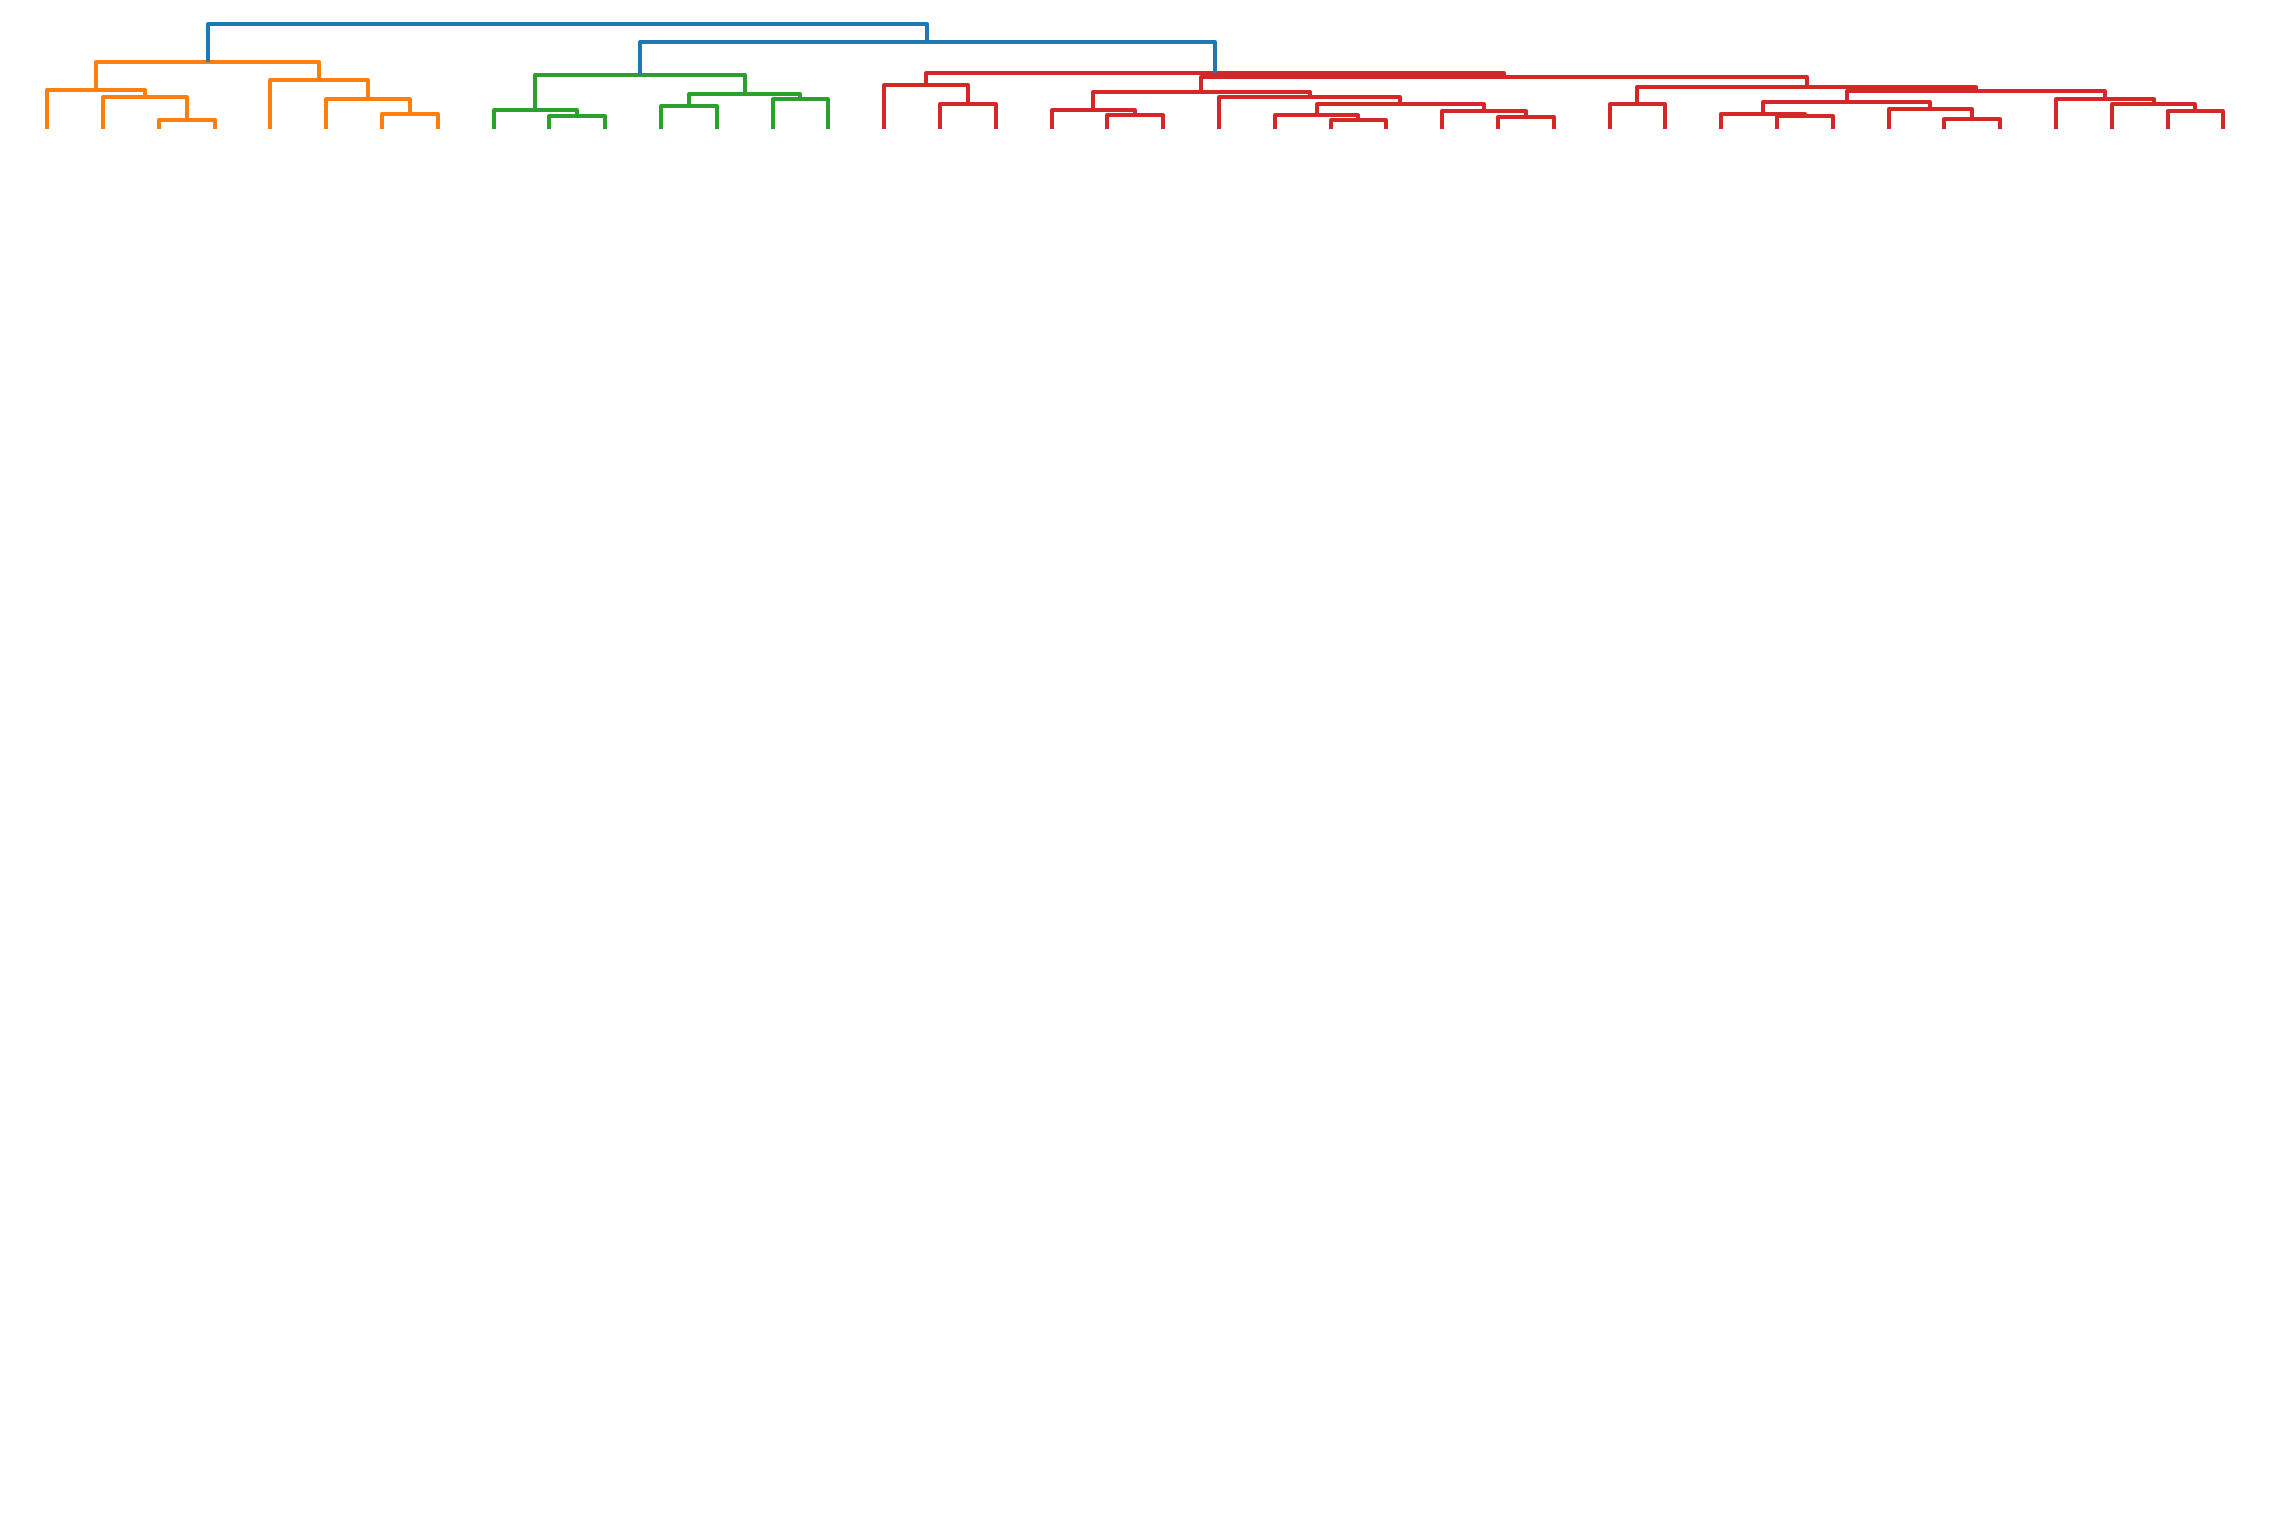

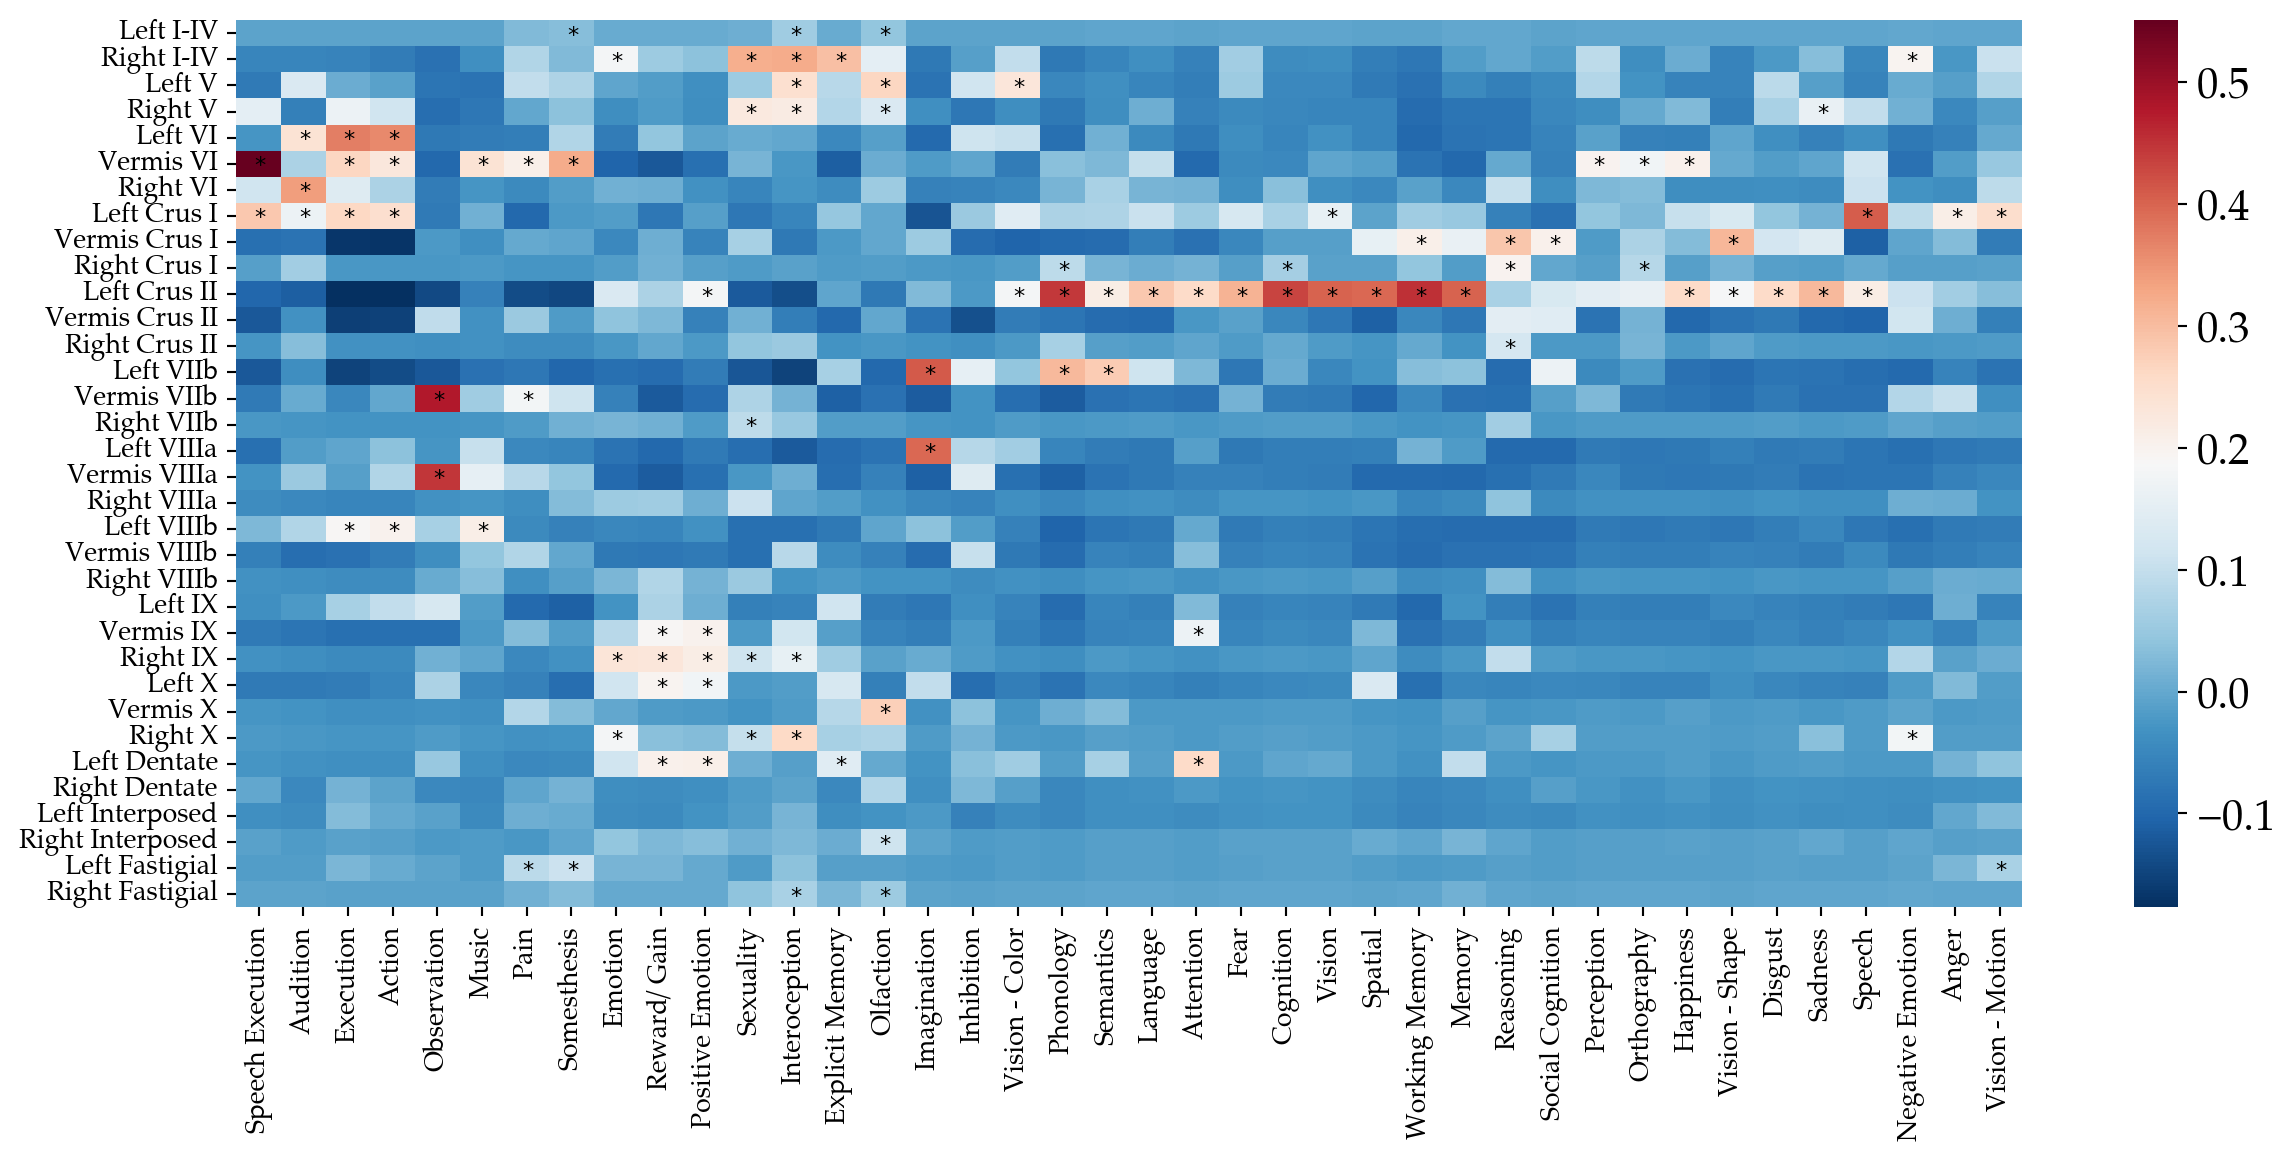

In [23]:
# Code from chatgpt

# Hierarchical clustering
model = AgglomerativeClustering(n_clusters=None, distance_threshold=0)
model.fit(r.T)

# Linkage matrix
linkage_matrix = create_linkage_matrix(model)

# Plot the dendrogram and extract the leaf order
fig, ax = plt.subplots(figsize=(15, 10))
dendro = dendrogram(linkage_matrix, show_contracted=True, ax=ax, no_labels=True)
# ax.set_title("Hierarchical Clustering Dendrogram")
# ax.set_ylabel("Distance")
ax.set_ylim([-25, ax.get_ylim()[1]])
ax.axis('off')

# Decide if you want to save the figure
fig.savefig(os.path.join(BASE_DIR, 'Figures/Publication/Figure5/Supplementary/D2009correlations_variogram_fdr-dendogram.png'), bbox_inches='tight')

# extract the ordering
leaf_order = dendro['leaves']

# reorder the original data
r_reordered = r.iloc[:, leaf_order]

# plot the reordered data
fig, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(r_reordered, cmap='RdBu_r',linecolor='.8', ax=ax)
ax.set_xticks(np.arange(r.shape[1])+0.5)
ax.set_xticklabels(r_reordered.columns, rotation=90, horizontalalignment='center', fontsize=10)
ax.set_yticks(np.arange(r.shape[0])+0.5)
ax.set_yticklabels(jd_labels_prob, rotation=0, fontsize=10)
ax.set_ylabel('')

# add the * layer
sig = p < 0.05
sig = sig.iloc[:, leaf_order]
for x, col in enumerate(r_reordered.columns):
    for y, row in enumerate(r_reordered.index):
        if sig.loc[row, col]:
            text = r'$^*$'
            ax.text(x+0.5, y+1.0,
                    text, 
                    fontsize=12,
                    color='black',
                    horizontalalignment='center', 
                    verticalalignment='center')

# Report significance only when surviving multiple-comparison correction (FDR)

In [24]:
import statsmodels.stats.multitest
# FDR correction
sig_fdr, _ = statsmodels.stats.multitest.fdrcorrection(p.values.flatten())
# reshape 
sig_fdr = pd.DataFrame(sig_fdr.reshape(p.shape), index=p.index, columns=p.columns)
# reorder
sig_fdr = sig_fdr.iloc[:, leaf_order]

In [25]:
print(sig_fdr)

                  Speech Execution  Audition  Execution  Action  Observation  \
Left I-IV                    False     False      False   False        False   
Right I-IV                   False     False      False   False        False   
Left V                       False     False      False   False        False   
Right V                      False     False      False   False        False   
Left VI                      False     False       True   False        False   
Vermis VI                     True     False      False   False        False   
Right VI                     False     False      False   False        False   
Left Crus I                  False     False      False   False        False   
Vermis Crus I                False     False      False   False        False   
Right Crus I                 False     False      False   False        False   
Left Crus II                 False     False      False   False        False   
Vermis Crus II               False     F

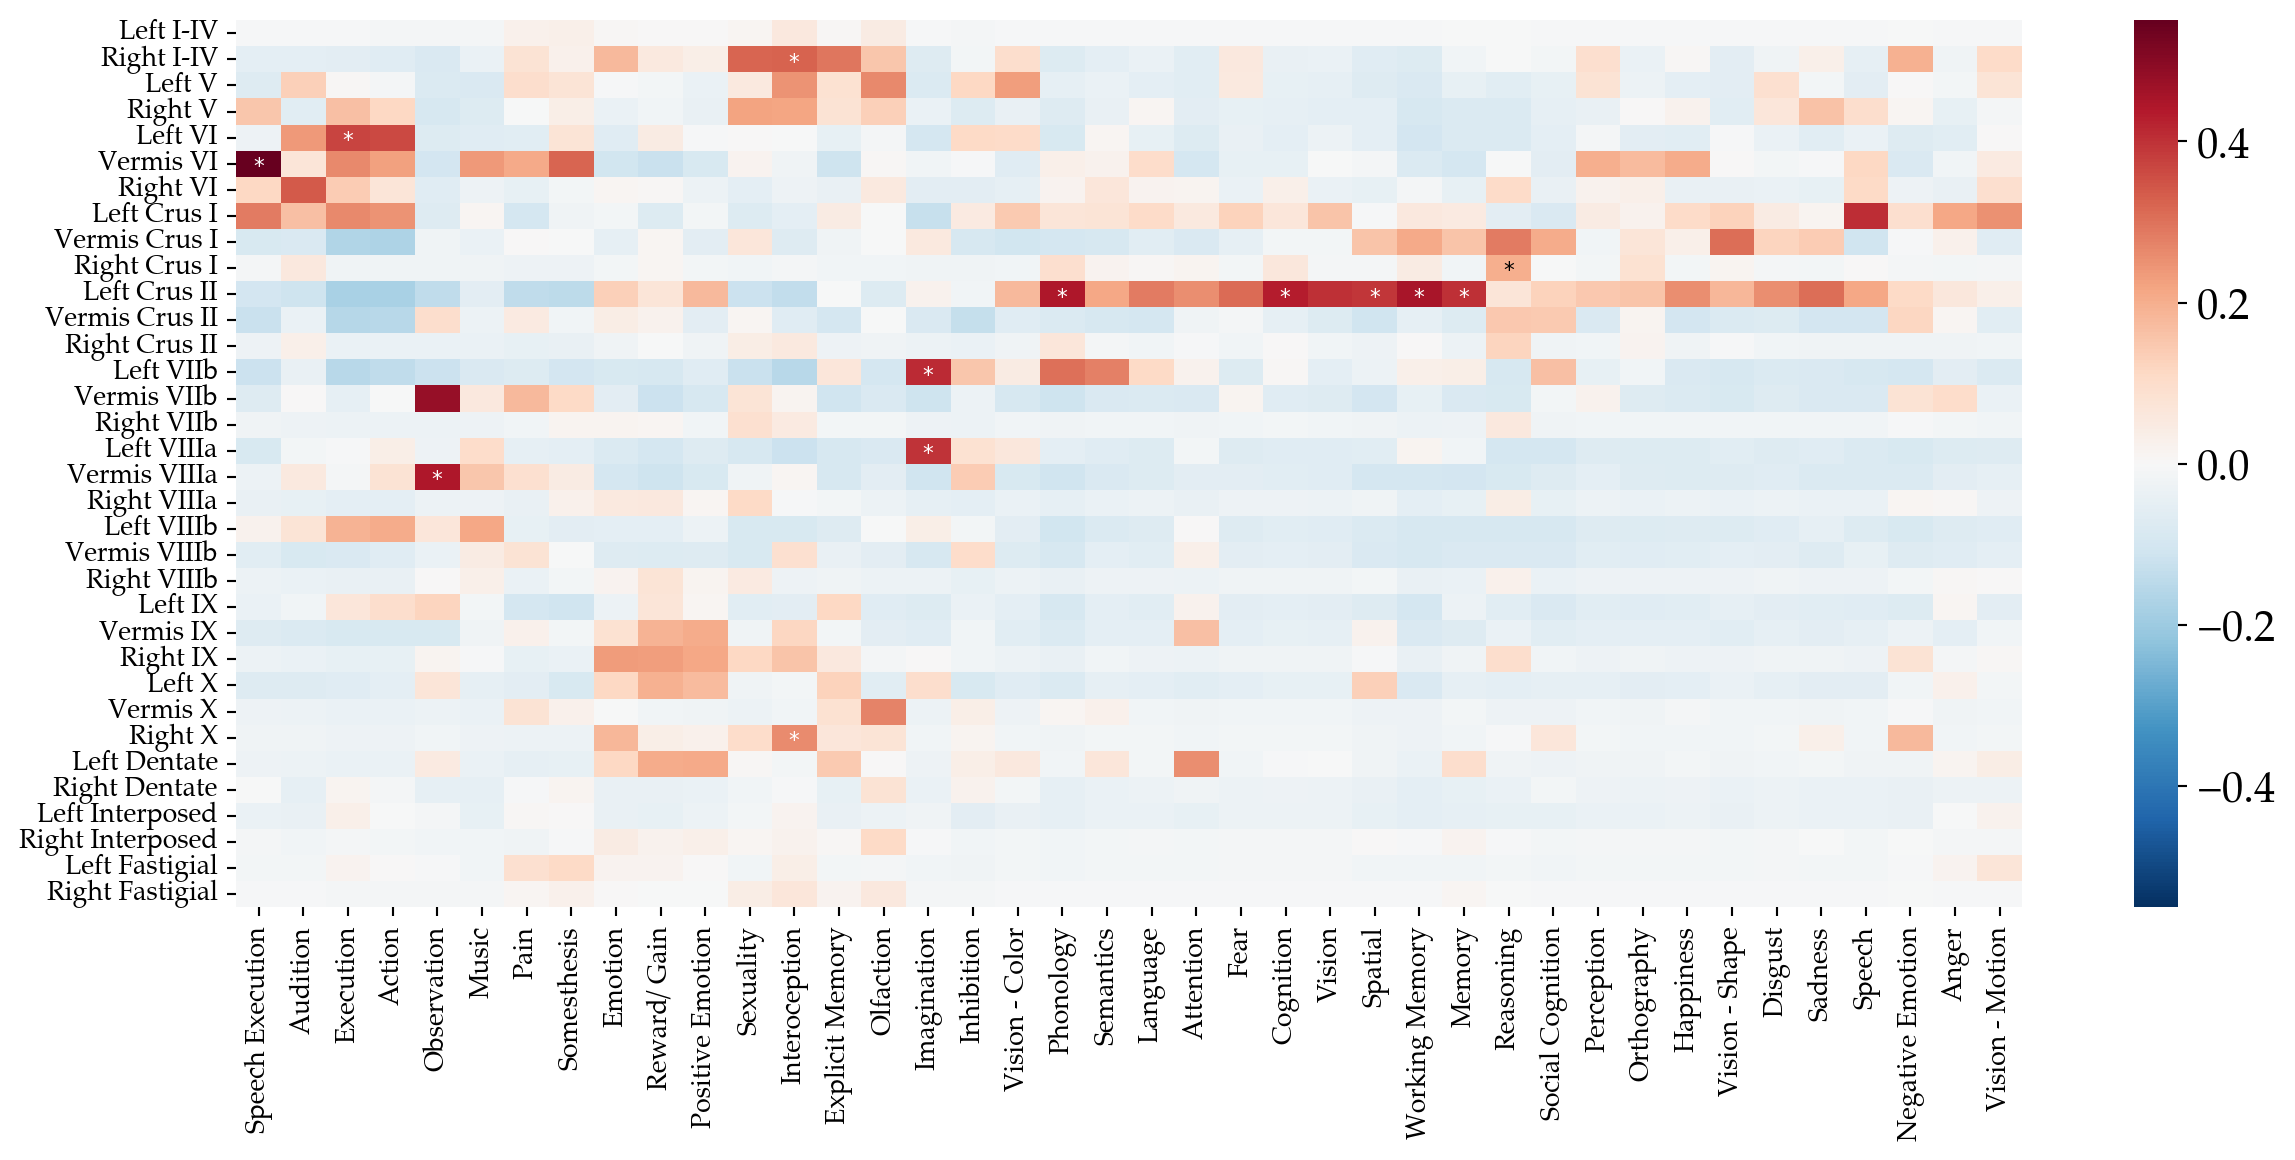

In [26]:
# plot the reordered data
vmax = np.abs(r_reordered).max().max()  # This ensures the color bar covers the entire range of the data

fig, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(r_reordered, cmap='RdBu_r',linecolor='.8', ax=ax, vmin=-vmax, vmax=vmax)
ax.set_xticks(np.arange(r.shape[1])+0.5)
ax.set_xticklabels(r_reordered.columns, rotation=90, horizontalalignment='center', fontsize=10)
ax.set_yticks(np.arange(r.shape[0])+0.5)
ax.set_yticklabels(jd_labels_prob, rotation=0, fontsize=10)
ax.set_ylabel('')

# add the * layer
for x, col in enumerate(r_reordered.columns):
    for y, row in enumerate(r_reordered.index):
        if sig_fdr.loc[row, col]: # Use the FDR-corrected p-values.
            text = r'$*$'
            # Conditional color based on the value of r
            text_color = 'white' if r_reordered.loc[row, col] > 0.25 or r_reordered.loc[row, col] < -0.25  else 'black'
            ax.text(x+0.5, y+0.6,
                    text, 
                    fontsize=8,
                    color=text_color,
                    horizontalalignment='center', 
                    verticalalignment='center')


In [27]:
# Decide if you want to save the figure
fig.savefig(os.path.join(BASE_DIR, 'Figures/Publication/Figure5/Supplementary/D2009correlations_variogram_fdr.png'), bbox_inches='tight')

# Now on to the binary parcellations, starting with the Nettekoven Atlas
## We use the 32-parcel symmetrical atlas, merging the left and right parcels to ultimately create 16 parcels.

In [3]:
nettekoven_labels = pd.Series({
    '0': 'null',
    'M1L': 'Eye - left',
    'M2L': 'Mouth - left',
    'M3L': 'Hand & Upper - left',
    'M4L': 'Foot & Lower - left',
    'A1L': 'Spatial simulation - left',
    'A2L': 'Action observation - left',
    'A3L': 'Motor imagery - left',
    'D1L': 'Spatial WM - left',
    'D2L': 'Retrieval - left',
    'D3L': 'Verbal WM - left',
    'D4L': 'Spatial/ N-back - left',
    'S1L': 'Linguistic - left',
    'S2L': 'Social - left',
    'S3L': 'Rest - left',
    'S4L': 'Self-projection - left',
    'S5L': 'Scene construction - left',
    'M1R': 'Eye - right',
    'M2R': 'Mouth - right',
    'M3R': 'Hand & Upper - right',
    'M4R': 'Foot & Lower - right',
    'A1R': 'Spatial simulation - right',
    'A2R': 'Action observation - right',
    'A3R': 'Motor imagery - right',
    'D1R': 'Spatial WM - right',
    'D2R': 'Retrieval - right',
    'D3R': 'Verbal WM - right',
    'D4R': 'Spatial/ N-back - right',
    'S1R': 'Linguistic - right',
    'S2R': 'Social - right',
    'S3R': 'Rest - right',
    'S4R': 'Self-projection - right',
    'S5R': 'Scene construction - right' 
})
# We spoke to the authors and using the M1 - to - S5 naming is more appropriate. We report the labels here only for convenience.
nettekoven_labels = nettekoven_labels.index

In [4]:
nettekoven_labels_merged = nettekoven_labels[:17].str.replace('L', '')

In [46]:
subdomain_labels = pd.Series({
    'Action': 'Action',
    'Cognition': 'Cognition',
    'Perception': 'Perception',
    'Emotion': 'Emotion',
    'Interoception': 'Interoception',
    'Action.MotorLearning': 'Motor Learning',
    'Action.Observation': 'Observation',
    'Action.Execution.Speech': 'Speech Execution',
    'Action.Inhibition': 'Inhibition',
    'Action.Execution': 'Execution',
    'Action.Preparation': 'Preparation',
    'Action.Imagination': 'Imagination',
    'Cognition.Spatial': 'Spatial',
    'Cognition.SocialCognition': 'Social Cognition',
    'Cognition.Attention': 'Attention',
    'Cognition.Language.Syntax': 'Syntax',
    'Cognition.Memory': 'Memory',
    'Cognition.Memory.Explicit': 'Explicit Memory',
    'Cognition.Language': 'Language',
    'Cognition.Language.Semantics': 'Semantics',
    'Cognition.Memory.Working': 'Working Memory',
    'Cognition.Language.Phonology': 'Phonology',
    'Cognition.Reasoning': 'Reasoning',
    'Cognition.Temporal': 'Temporal',
    'Cognition.Language.Speech': 'Speech',
    'Cognition.Language.Orthography': 'Orthography',
    'Cognition.Music': 'Music',
    'Emotion.Positive.RewardGain': 'Reward/ Gain',
    'Emotion.Negative.Disgust': 'Disgust',
    'Emotion.Positive': 'Positive Emotion',
    'Emotion.Negative.Fear': 'Fear',
    'Emotion.Positive.Happiness': 'Happiness',
    'Emotion.Negative.Sadness': 'Sadness',
    'Emotion.Negative': 'Negative Emotion',
    'Emotion.Valence': 'Valence',
    'Emotion.Negative.Anger': 'Anger',
    'Emotion.Negative.Anxiety': 'Anxiety',
    'Perception.Vision': 'Vision',
    'Perception.Olfaction': 'Olfaction',
    'Perception.Vision.Motion': 'Vision - Motion',
    'Perception.Gustation': 'Gustation',
    'Perception.Somesthesis.Pain': 'Pain',
    'Perception.Audition': 'Audition',
    'Perception.Somesthesis': 'Somesthesis',
    'Perception.Vision.Color': 'Vision - Color',
    'Perception.Vision.Shape': 'Vision - Shape',
    'Interoception.Sexuality': 'Sexuality',
    'Interoception.RespirationRegulation': 'Respiration Regulation',
    'Interoception.Hunger': 'Hunger'
})

# Load Nettekoven maps and resample them to Diedrichsen et al. 2009 2mm space

In [6]:
# Load data
nett = nibabel.load(os.path.join(INPUT_DIR, 'cerebellar_atlases/Nettekoven_2023/atl-NettekovenSym32_space-MNI152NLin6AsymC_dseg.nii'))

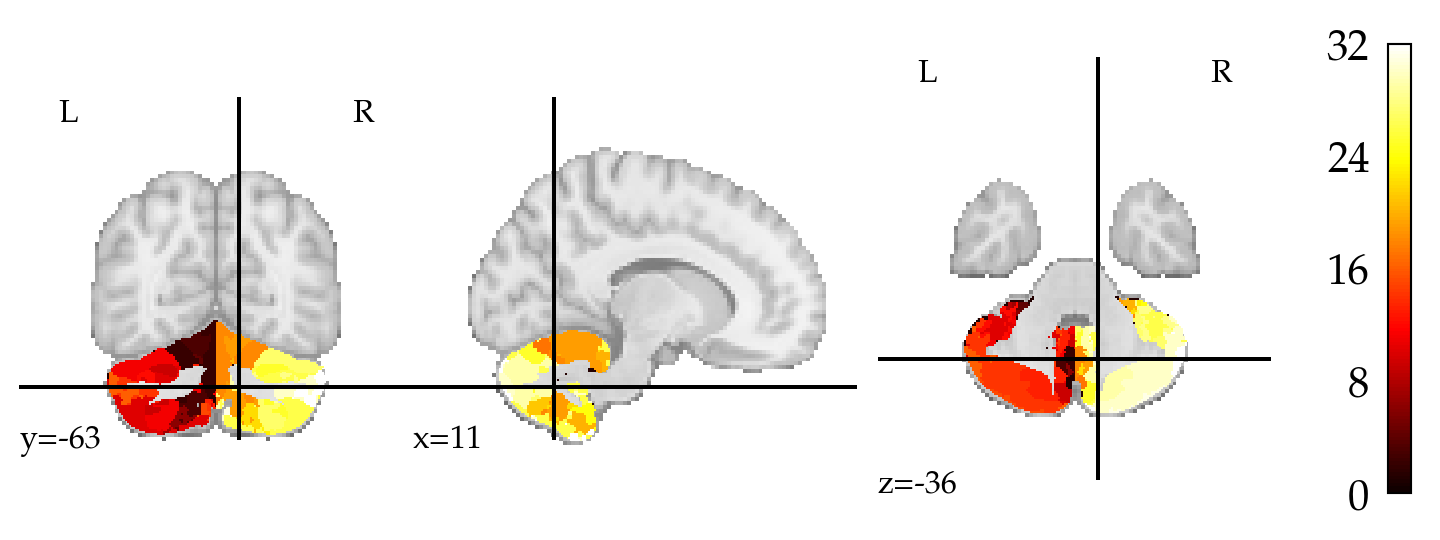

In [7]:
nilearn.plotting.plot_stat_map(nett, threshold=0)

In [8]:
# Resample
proper_mask_2mm = nibabel.load(os.path.join(INPUT_DIR, 'maps/D2009_MNI_2mm.nii.gz'))
nett_mni_2mm = nilearn.image.resample_to_img(nett, proper_mask_2mm)

## Create a symmetric version in which L and R belong to the same parcel:

In [9]:
nett_mni_2mm_data = nett_mni_2mm.get_fdata()
nett_mni_2mm_data[nett_mni_2mm_data>16] -= 16 # Make sure not to add the background.
nett_mni_2mm_sym = nilearn.image.new_img_like(nett_mni_2mm, nett_mni_2mm_data)

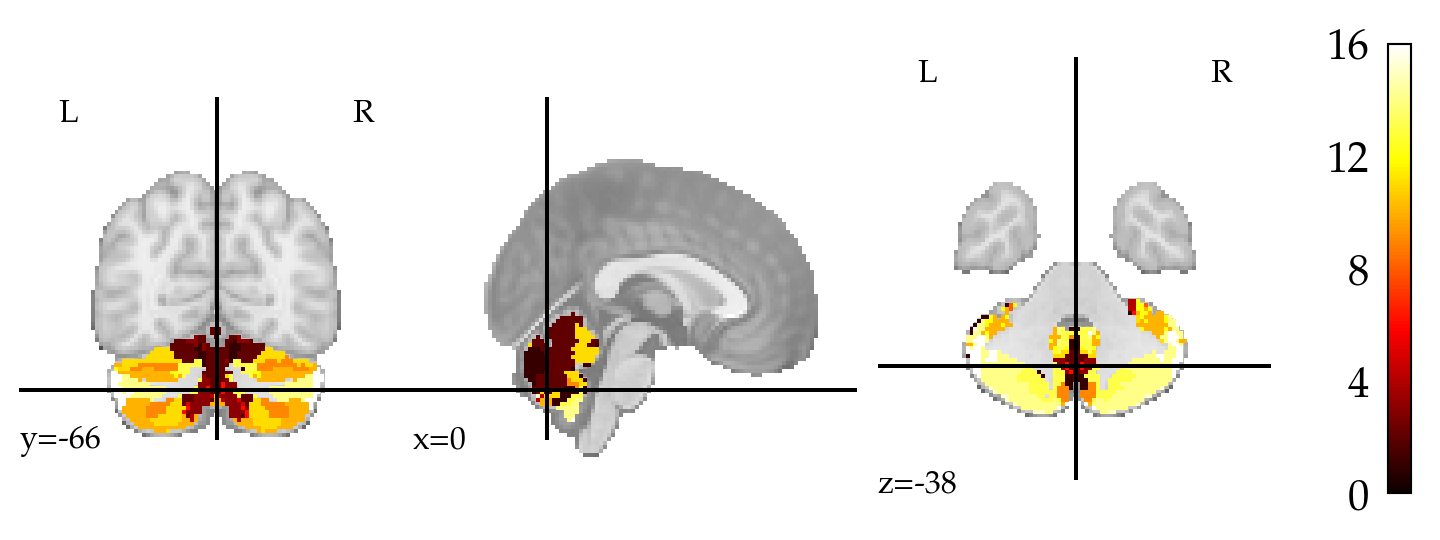

In [10]:
nilearn.plotting.plot_stat_map(nett_mni_2mm_sym)

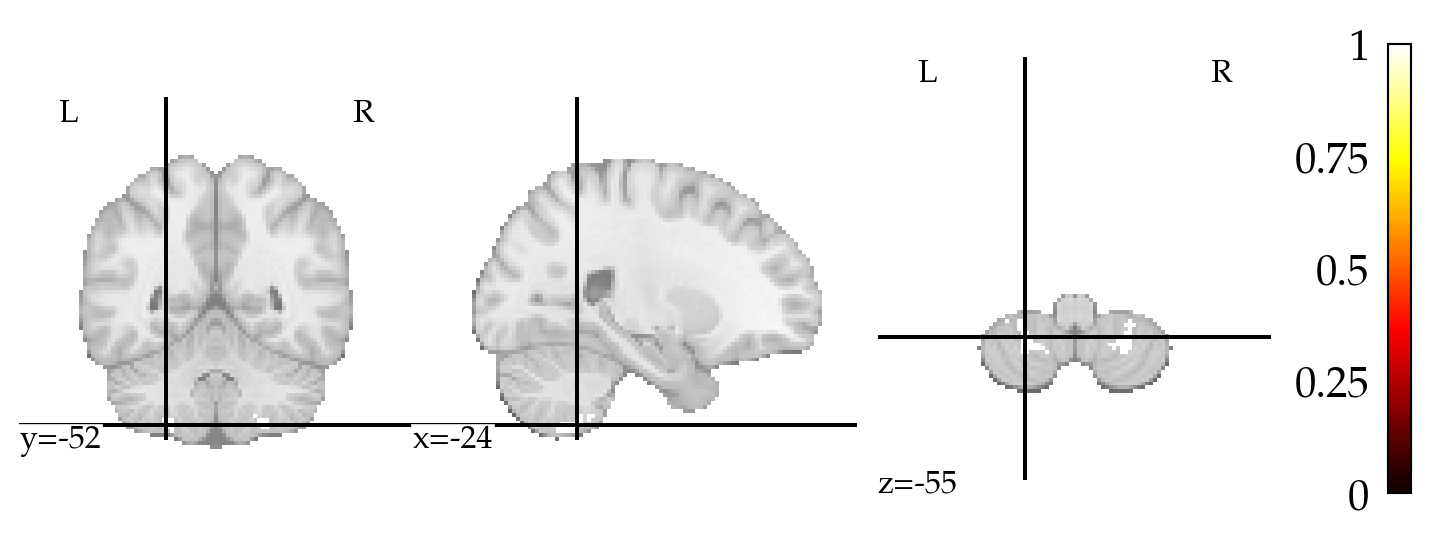

In [11]:
# Plot a single, example, parcel and check if it is symmetric.
nilearn.plotting.plot_stat_map(nilearn.image.math_img('a == 7', a=nett_mni_2mm_sym))

# Run variogram-based mean test
## Using the merged atlas (so comparing C-SALE maps against 16 parcels)

In [12]:
mask_data = proper_mask_2mm.get_fdata().astype('bool')
nett_mni_2mm_sym_masked = nett_mni_2mm_sym.get_fdata()[mask_data]

obs_mean = pd.DataFrame(index=range(17))
p = pd.DataFrame(index=range(17))

surrogates_paths = sorted(glob.glob(os.path.join(OUTPUT_DIR,
    'SALE/*/*/uncorr_z_2mm_mask-D2009_MNI_surrogates-variogram_n-1000.npy')
))

for surrogates_path in tqdm(surrogates_paths):
    try:
        # Extract subbd using regex for better reliability
        subbd_match = re.search(r'SALE/(.*?)/(.*?)/', surrogates_path)
        if subbd_match:
            subbd = subbd_match.group(2)
        else:
            print(f"Failed to parse subbd from path: {surrogates_path}")
            continue

        # load z map and mask it
        z_2mm = os.path.join(os.path.dirname(surrogates_path), 'uncorr_z_2mm.nii.gz')
        z_2mm_masked = nibabel.load(z_2mm).get_fdata()[mask_data]
        # load surrogates
        surrogates = np.load(surrogates_path)

        obs_mean.loc[:, subbd] = pd.DataFrame(
            {'nett': nett_mni_2mm_sym_masked,
            'z': z_2mm_masked}
        ).groupby('nett').mean().values.flatten()
        
        null_mean = (
            pd.DataFrame(surrogates.T, index=nett_mni_2mm_sym_masked)
            .reset_index(drop=False)
            .groupby('index')
            .mean().values
        )
        
        p.loc[:, subbd] = (np.abs(null_mean) >= np.abs(obs_mean.loc[:, subbd].values[:, None])).mean(axis=1)
    except Exception as e:
        print(f"Error processing {surrogates_path}: {e}")  

# Display the resulting DataFrames
print(obs_mean)
print(p)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:06<00:00,  5.95it/s]

    Action.Execution.Speech  Action.Execution  Action.Imagination  \
0                  0.156061          0.319731            0.151271   
1                  0.775836          0.876592            0.043266   
2                  0.917452          1.717290            0.027739   
3                  0.440161          1.548532            0.075177   
4                  0.027687          0.120065            0.036563   
5                  0.181921          0.915246            0.079077   
6                  0.060659          0.691589            0.046432   
7                  0.448077          0.641585            0.007232   
8                  0.006131          0.036964            0.304204   
9                  0.498127          0.372724            0.335134   
10                 0.110392          0.250731            0.562742   
11                 0.328776          0.549612            0.197661   
12                 0.144589          0.141174            0.435142   
13                 0.276299       

In [13]:
# load and label
# obs_mean = pd.read_csv(os.path.join(OUTPUT_DIR, 'parcellations_correspondence/z_nettekoven_dseg_LRmerge_mean.csv'), index_col=0)
# p = pd.read_csv(os.path.join(OUTPUT_DIR, 'parcellations_correspondence?z_nettekoven_dseg_LRmerge_p.csv'), index_col=0)
obs_mean.index = nettekoven_labels_merged
p.index = nettekoven_labels_merged
# drop null
obs_mean = obs_mean.drop(index='0')
p = p.drop(index='0')

In [14]:
obs_mean.to_csv(os.path.join(BASE_DIR, 'Figures/Publication/Figure5/Supplementary/z_nettekoven_dseg_LRmerge_mean.csv'))
p.to_csv(os.path.join(BASE_DIR, 'Figures/Publication/Figure5/Supplementary/z_nettekoven_dseg_LRmerge_p.csv'))

# Plot and hierarchically cluster (L-R merged)

In [15]:
import statsmodels.stats.multitest
# FDR correction
sig_fdr, _ = statsmodels.stats.multitest.fdrcorrection(p.values.flatten())
# reshape 
sig_fdr = pd.DataFrame(sig_fdr.reshape(p.shape), index=p.index, columns=p.columns)

In [16]:
print(sig_fdr)

    Action.Execution.Speech  Action.Execution  Action.Imagination  \
M1                    False             False               False   
M2                     True              True               False   
M3                    False              True               False   
M4                    False             False               False   
A1                    False             False               False   
A2                    False             False               False   
A3                    False             False               False   
D1                    False             False               False   
D2                    False             False               False   
D3                    False             False                True   
D4                    False             False               False   
S1                    False             False               False   
S2                    False             False               False   
S3                    False       

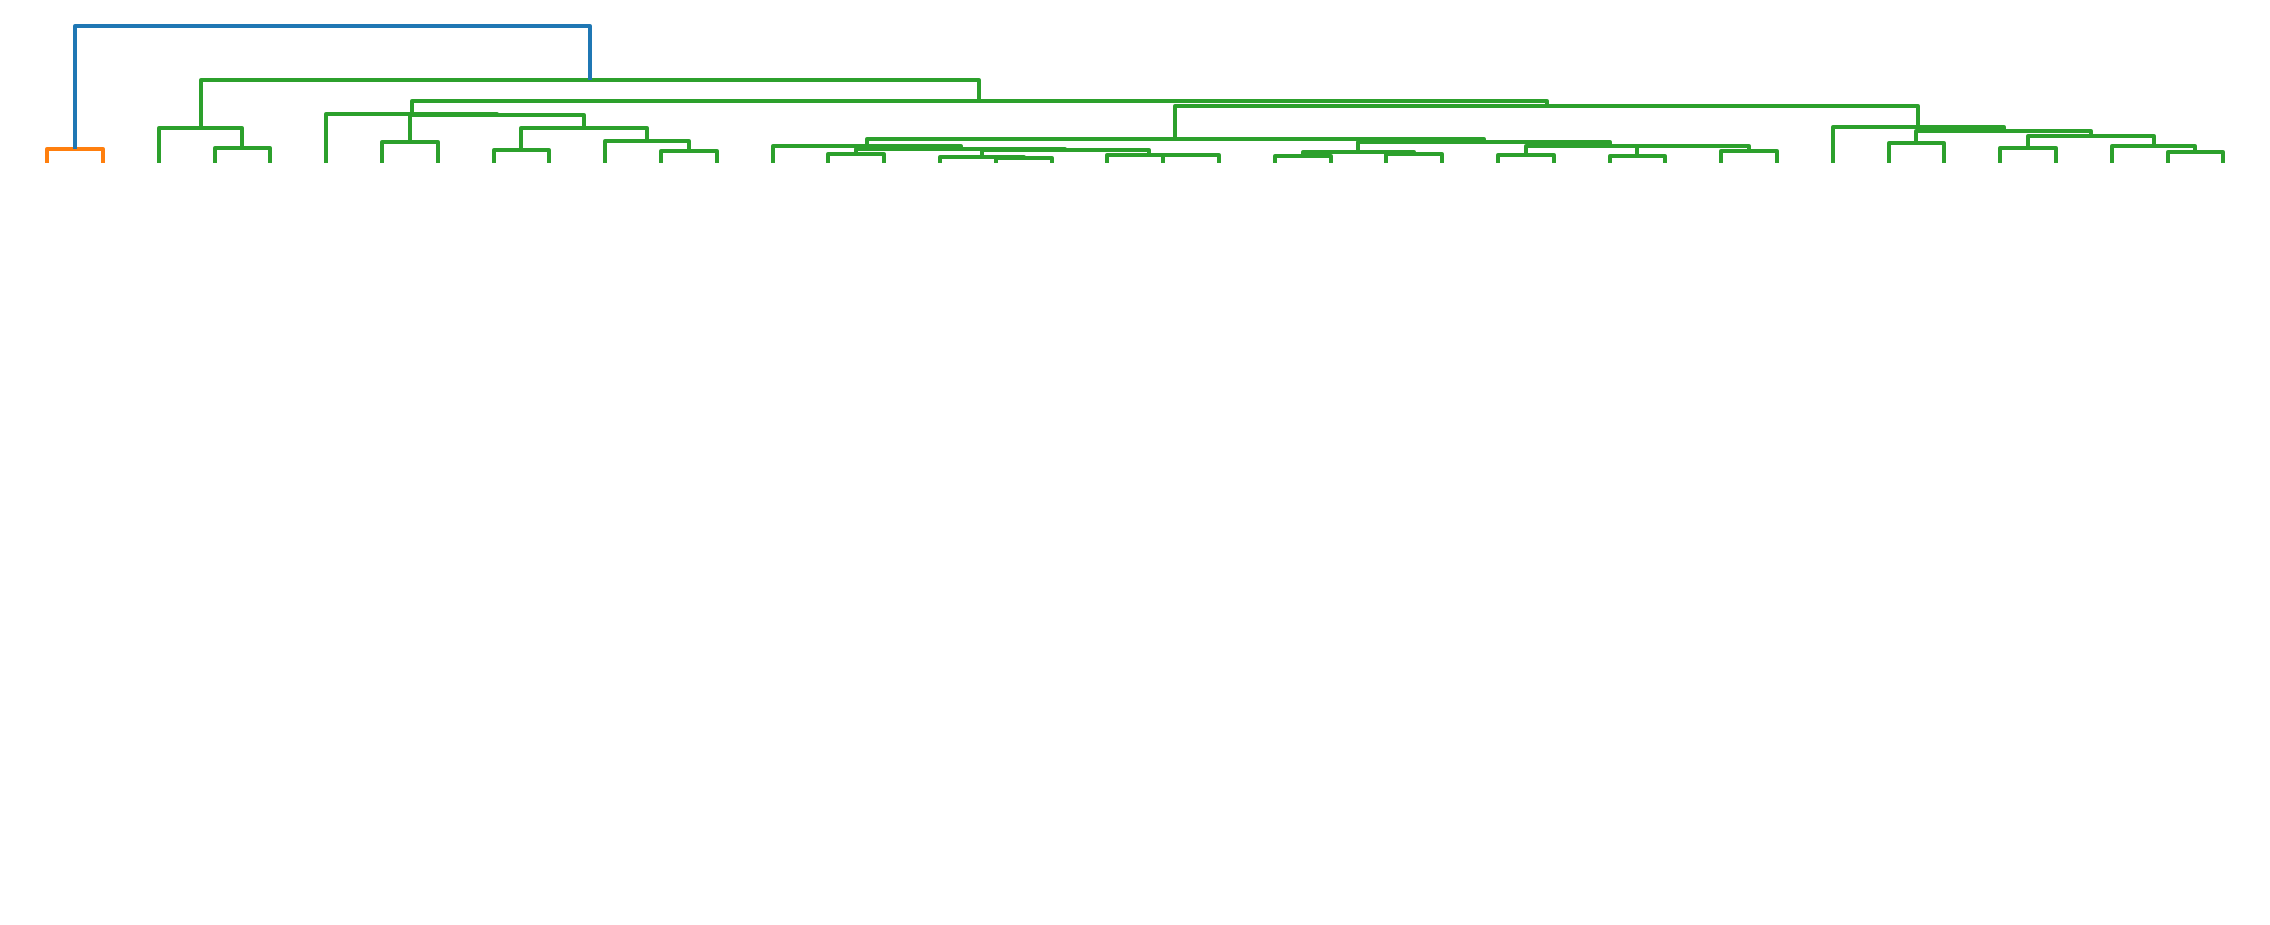

In [17]:
# hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

# hierarchical clustering
model = AgglomerativeClustering(n_clusters=None, distance_threshold=0)
model.fit(obs_mean.T)

def create_linkage_matrix(model):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)

    for i, (left_child, right_child) in enumerate(model.children_):
        count_left = 1 if left_child < n_samples else counts[left_child - n_samples]
        count_right = 1 if right_child < n_samples else counts[right_child - n_samples]
        counts[i] = count_left + count_right

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    return linkage_matrix

# linkage matrix
linkage_matrix = create_linkage_matrix(model)

# plot the dendrogram and extract the leaf order
fig, ax = plt.subplots(figsize=(15, 6))
dendro = dendrogram(linkage_matrix, show_contracted=True, ax=ax, no_labels=True)
ax.set_ylim([-25, ax.get_ylim()[1]])
ax.axis('off')

# extract the ordering
leaf_order = dendro['leaves']

# reorder the original data
mean_reordered = obs_mean.iloc[:, leaf_order]
p_reordered = p.iloc[:, leaf_order]
sig_fdr_reordered = sig_fdr.iloc[:, leaf_order]

In [109]:
# Decide if you want to save the figure
fig.savefig(os.path.join(BASE_DIR, 'Figures/Publication/Figure5/5d_nettekoven_dseg__LRmerge_overlap_variogram_fdr-dendogram.png'), bbox_inches='tight')

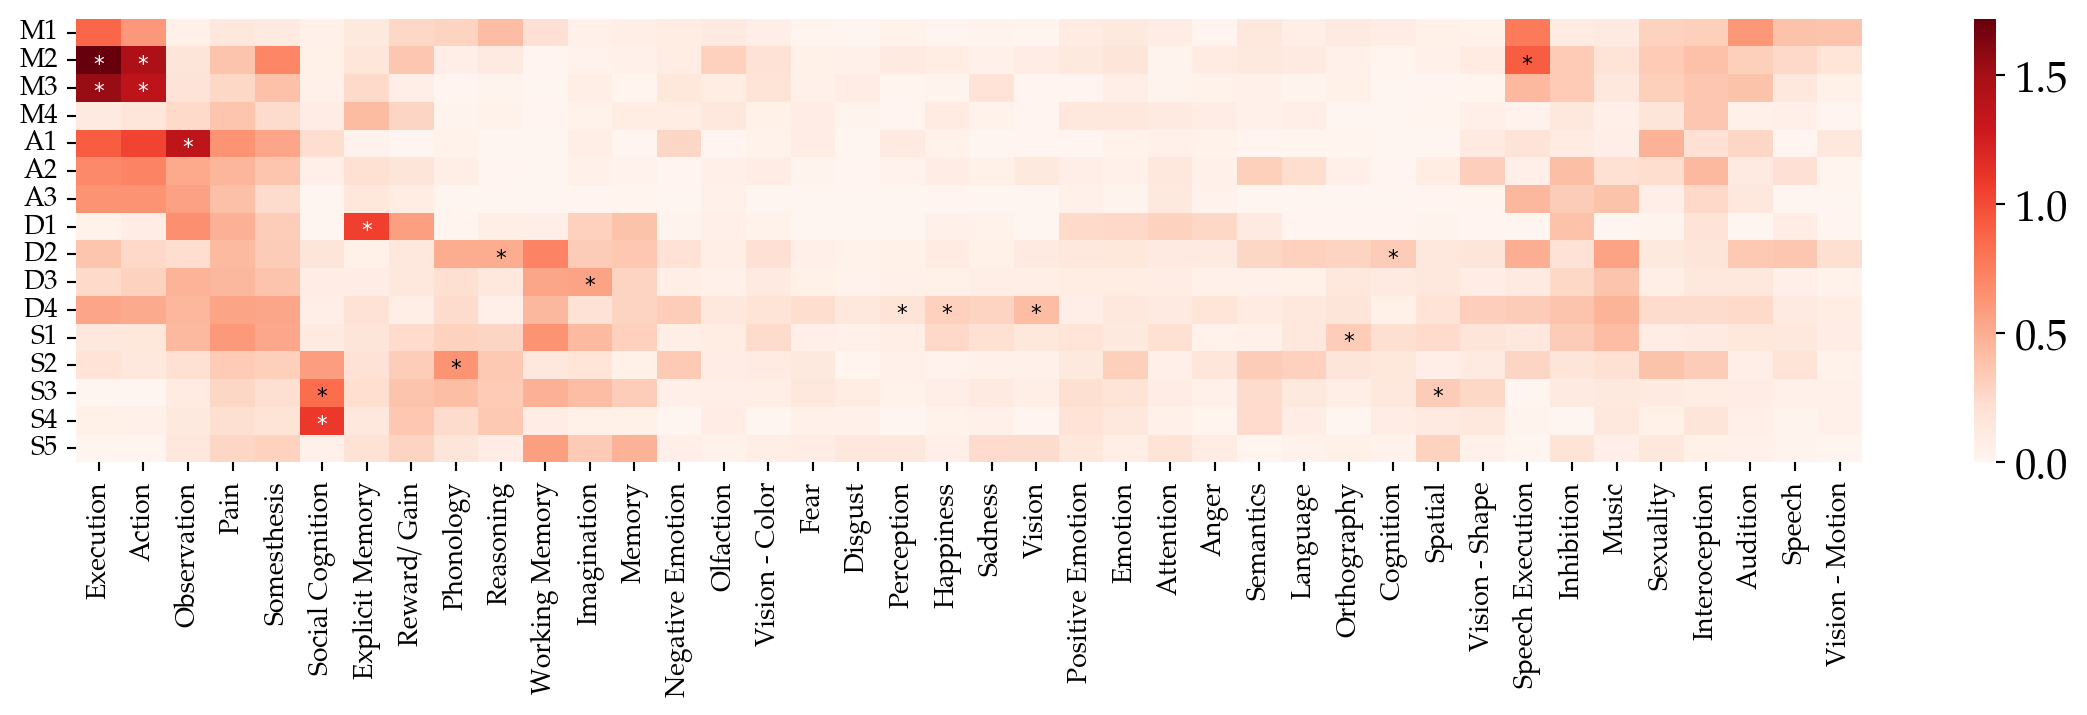

In [18]:
# plot the reordered data
fig, ax = plt.subplots(figsize=(15, 3))
sns.heatmap(mean_reordered, cmap='Reds',linecolor='.8', ax=ax)
ax.set_xticks(np.arange(p.shape[1])+0.5)
ax.set_xticklabels(subdomain_labels.loc[mean_reordered.columns].values, rotation=90, horizontalalignment='center', fontsize=10)
ax.set_yticks(np.arange(p.shape[0])+0.5)
ax.set_yticklabels(mean_reordered.index, rotation=0, fontsize=10)
ax.set_ylabel('')

# add the * layer
for x, col in enumerate(mean_reordered.columns):
    for y, row in enumerate(mean_reordered.index):
        if sig_fdr.loc[row, col]:
            text = r'$*$'
            # Conditional color based on the value of r
            text_color = 'white' if mean_reordered.loc[row, col] > 1.0  else 'black'
            ax.text(x+0.5, y+0.6,
                    text, 
                    fontsize=8,
                    color=text_color,
                    horizontalalignment='center', 
                    verticalalignment='center')

In [111]:
# Decide if you want to save the figure
fig.savefig(os.path.join(BASE_DIR, 'Figures/Publication/Figure5/5d_nettekoven_dseg__LRmerge_overlap_variogram_fdr.png'), bbox_inches='tight')

# Create a supplementary version with putative labels

In [19]:
nettekoven_labels = pd.Series({
    'M1L': 'Eye - left',
    'M2L': 'Mouth - left',
    'M3L': 'Hand & Upper - left',
    'M4L': 'Foot & Lower - left',
    'A1L': 'Spatial simulation - left',
    'A2L': 'Action observation - left',
    'A3L': 'Motor imagery - left',
    'D1L': 'Spatial WM - left',
    'D2L': 'Retrieval - left',
    'D3L': 'Verbal WM - left',
    'D4L': 'Spatial/ N-back - left',
    'S1L': 'Linguistic - left',
    'S2L': 'Social - left',
    'S3L': 'Rest - left',
    'S4L': 'Self-projection - left',
    'S5L': 'Scene construction - left',
    'M1R': 'Eye - right',
    'M2R': 'Mouth - right',
    'M3R': 'Hand & Upper - right',
    'M4R': 'Foot & Lower - right',
    'A1R': 'Spatial simulation - right',
    'A2R': 'Action observation - right',
    'A3R': 'Motor imagery - right',
    'D1R': 'Spatial WM - right',
    'D2R': 'Retrieval - right',
    'D3R': 'Verbal WM - right',
    'D4R': 'Spatial/ N-back - right',
    'S1R': 'Linguistic - right',
    'S2R': 'Social - right',
    'S3R': 'Rest - right',
    'S4R': 'Self-projection - right',
    'S5R': 'Scene construction - right' 
})

In [20]:
# Merge the labels
nettekoven_labels_merged = nettekoven_labels[:16].str.replace(' - left', '')
print(nettekoven_labels_merged)

M1L                   Eye
M2L                 Mouth
M3L          Hand & Upper
M4L          Foot & Lower
A1L    Spatial simulation
A2L    Action observation
A3L         Motor imagery
D1L            Spatial WM
D2L             Retrieval
D3L             Verbal WM
D4L       Spatial/ N-back
S1L            Linguistic
S2L                Social
S3L                  Rest
S4L       Self-projection
S5L    Scene construction
dtype: object


In [21]:
# Assign merged label names to the indices of the dataframes
obs_mean.index = nettekoven_labels_merged.values
p.index = nettekoven_labels_merged.values
sig_fdr.index = nettekoven_labels_merged

In [22]:
print(obs_mean)
print(sig_fdr)

                    Action.Execution.Speech  Action.Execution  \
Eye                                0.775836          0.876592   
Mouth                              0.917452          1.717290   
Hand & Upper                       0.440161          1.548532   
Foot & Lower                       0.027687          0.120065   
Spatial simulation                 0.181921          0.915246   
Action observation                 0.060659          0.691589   
Motor imagery                      0.448077          0.641585   
Spatial WM                         0.006131          0.036964   
Retrieval                          0.498127          0.372724   
Verbal WM                          0.110392          0.250731   
Spatial/ N-back                    0.328776          0.549612   
Linguistic                         0.144589          0.141174   
Social                             0.276299          0.192969   
Rest                               0.005222          0.001598   
Self-projection          

In [23]:
# Reorder y-axis labels according to the clustering
mean_reordered.index = obs_mean.index

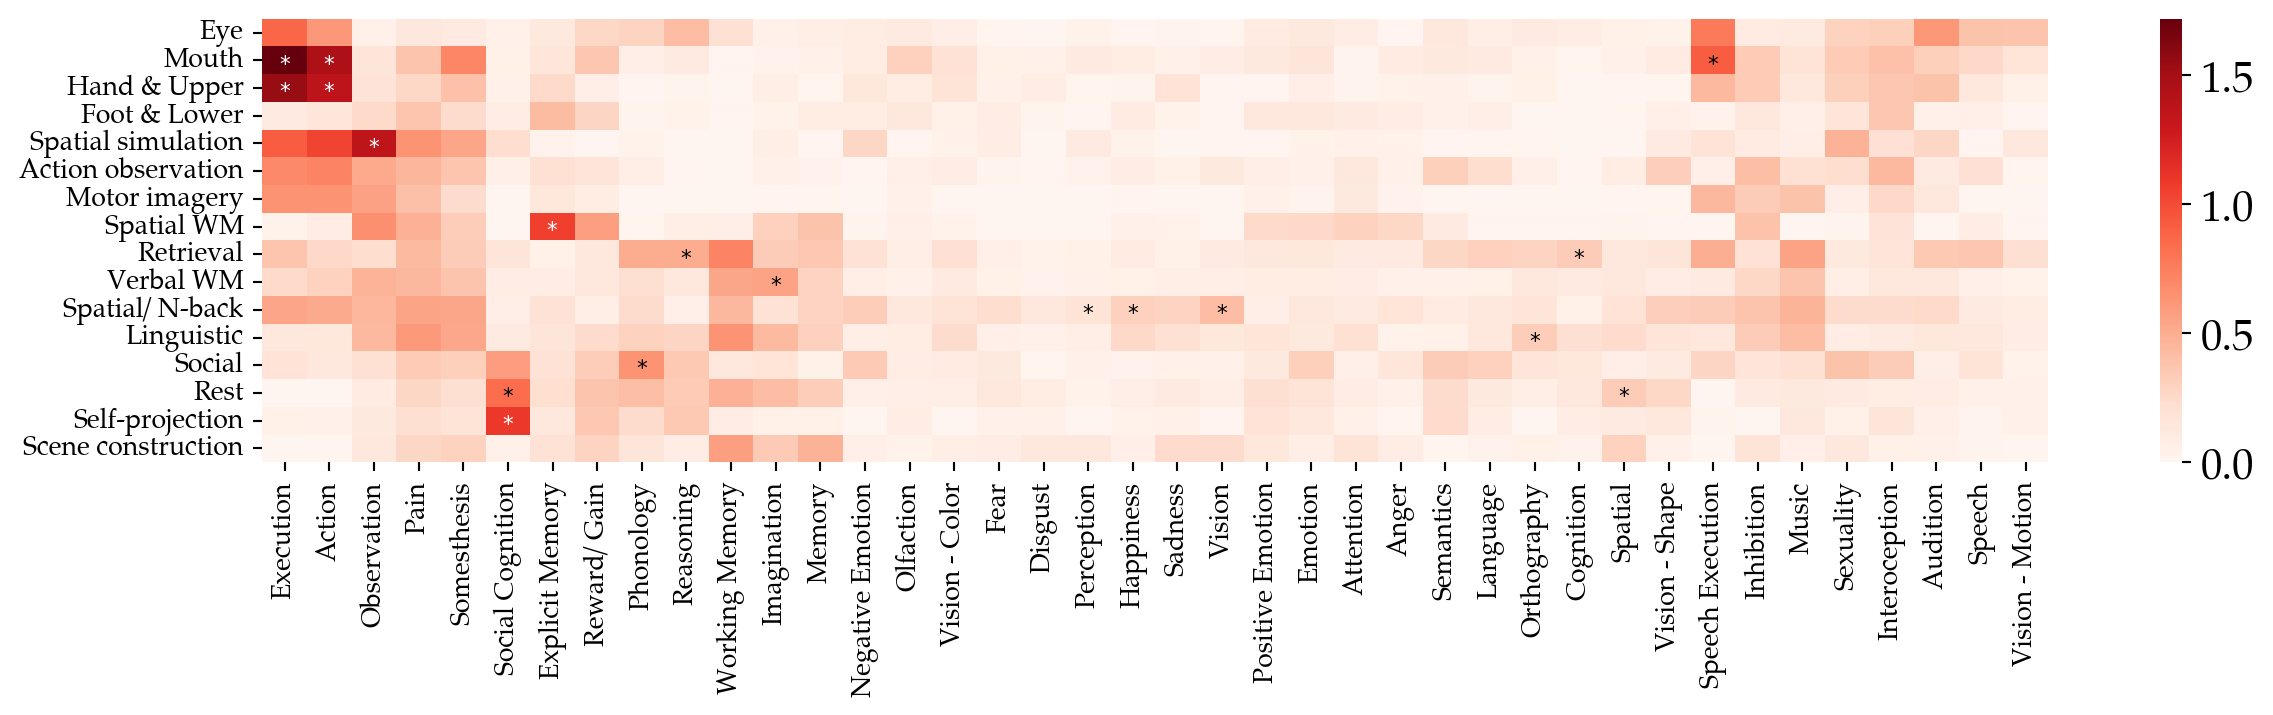

In [24]:
# Plot the reordered data
fig, ax = plt.subplots(figsize=(15, 3))
sns.heatmap(mean_reordered, cmap='Reds', linecolor='.8', ax=ax)
ax.set_xticks(np.arange(mean_reordered.shape[1])+0.5)
ax.set_xticklabels(subdomain_labels.loc[mean_reordered.columns].values, rotation=90, horizontalalignment='center', fontsize=10)
ax.set_yticks(np.arange(mean_reordered.shape[0])+0.5)
ax.set_yticklabels(mean_reordered.index, rotation=0, fontsize=10)  # Use ordered labels here
ax.set_ylabel('')

# Add the * layer
for x, col in enumerate(mean_reordered.columns):
    for y, row in enumerate(mean_reordered.index):
        if sig_fdr.loc[row, col]:
            text = r'$*$'
            # Conditional color based on the value of r
            text_color = 'white' if mean_reordered.loc[row, col] > 1.0  else 'black'
            ax.text(x+0.5, y+0.6,
                    text, 
                    fontsize=8,
                    color=text_color,
                    horizontalalignment='center', 
                    verticalalignment='center')

In [25]:
# Decide if you want to save the figure
fig.savefig(os.path.join(BASE_DIR, 'Figures/Publication/Figure5/Supplementary/nettekoven_dseg__LRmerge_overlap_variogram_fdr-labels.png'), bbox_inches='tight')

# Next, we move on to the Buckner 2011 atlas.

In [57]:
# Load data
buck = nibabel.load(os.path.join(INPUT_DIR, 'cerebellar_atlases/Buckner_2011/atl-Buckner7_space-MNI_dseg.nii'))

In [27]:
#Extract the data array
buck_data = buck.get_fdata()

# Get unique labels
unique_labels = np.unique(buck_data)

# Print the unique labels and their count
print(f"Unique labels in buck_data: {unique_labels}")
print(f"Number of unique labels: {len(unique_labels)}")

Unique labels in buck_data: [0. 1. 2. 3. 4. 5. 6. 7.]
Number of unique labels: 8


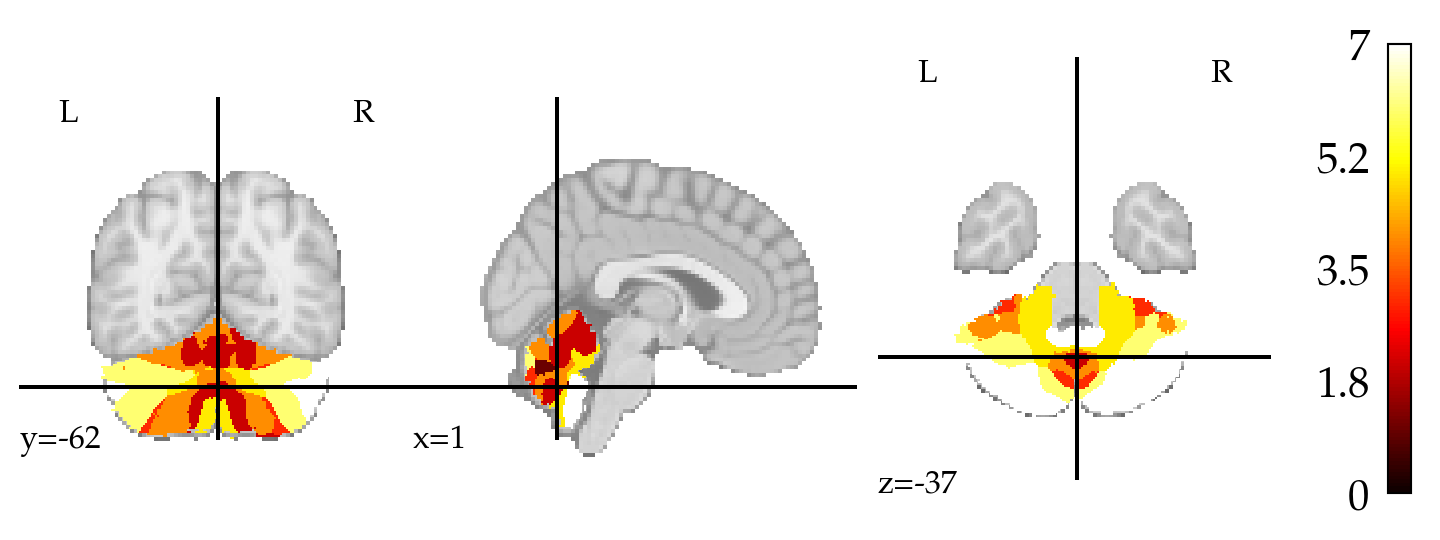

In [28]:
nilearn.plotting.plot_stat_map(buck, threshold=0)

In [29]:
# Check the data type of the loaded Buckner atlas
print(f"Data type of Buckner atlas before resampling: {buck.get_fdata().dtype}")

# Load the mask image
proper_mask_2mm = nibabel.load(os.path.join(INPUT_DIR, 'maps/D2009_MNI_2mm.nii.gz'))

# Resample the Buckner atlas to the mask
buck_mni_2mm = nilearn.image.resample_to_img(buck, proper_mask_2mm)

# Check the data type of the resampled Buckner atlas
print(f"Data type of Buckner atlas after resampling: {buck_mni_2mm.get_fdata().dtype}")


Data type of Buckner atlas before resampling: float64
Data type of Buckner atlas after resampling: float64


/data/project/cerebellum_ale/venv/lib/python3.11/site-packages/nilearn/image/resampling.py:597: UserWarning: Casting data from int8 to float32
  warnings.warn(f"Casting data from {data.dtype.name} to {aux}")


In [30]:
# Resample the Buckner atlas to the mask
buck_mni_2mm = nilearn.image.resample_to_img(buck, proper_mask_2mm)

# Convert the data back to integer if necessary! It is important to check that the labels are still the correct number.
buck_mni_2mm_data = buck_mni_2mm.get_fdata().astype(np.int32)
buck_mni_2mm = nibabel.Nifti1Image(buck_mni_2mm_data, buck_mni_2mm.affine, buck_mni_2mm.header)

/data/project/cerebellum_ale/venv/lib/python3.11/site-packages/nilearn/image/resampling.py:597: UserWarning: Casting data from int8 to float32
  warnings.warn(f"Casting data from {data.dtype.name} to {aux}")


In [31]:
# Check unique labels after resampling
unique_labels = np.unique(buck_mni_2mm.get_fdata())
print(f"Unique labels in resampled Buckner atlas: {unique_labels}")
print(f"Number of unique labels: {len(unique_labels)}")

Unique labels in resampled Buckner atlas: [0. 1. 2. 3. 4. 5. 6. 7.]
Number of unique labels: 8


## In this atlas, L and R already belong to the same parcel:

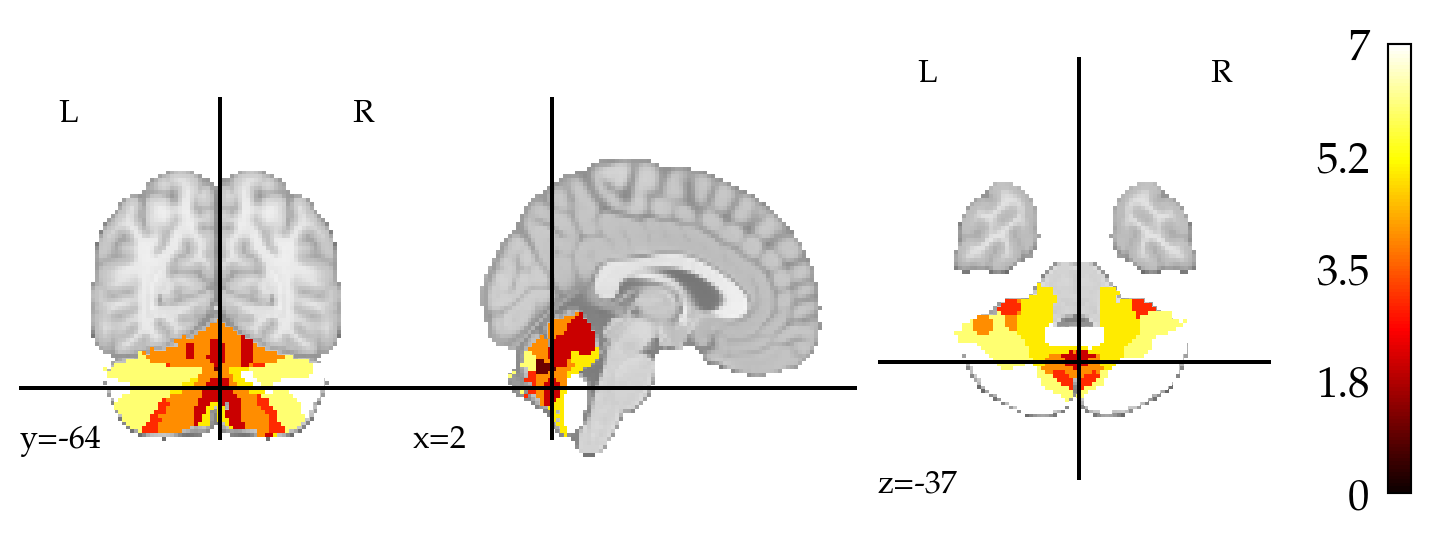

In [32]:
nilearn.plotting.plot_stat_map(buck_mni_2mm)

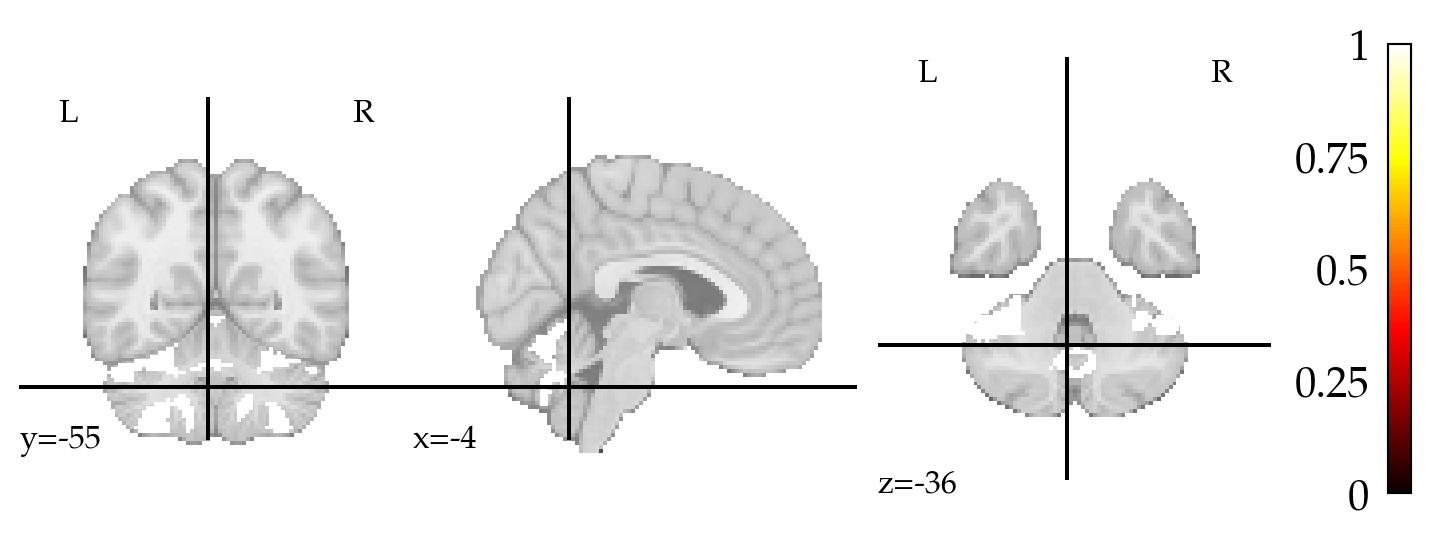

In [33]:
# Plot a single, example, parcel and check if it is symmetric.
nilearn.plotting.plot_stat_map(nilearn.image.math_img('a == 4', a=buck_mni_2mm))

# Run variogram-based mean test

In [34]:
mask_data = proper_mask_2mm.get_fdata().astype('bool')
buck_mni_2mm_masked = buck_mni_2mm.get_fdata()[mask_data]

# Get the unique labels in the masked data
unique_labels = np.unique(buck_mni_2mm_masked)

# Print the unique labels and their count
print(f"Unique labels in buck_mni_2mm_masked: {unique_labels}")
print(f"Number of unique labels: {len(unique_labels)}")

# Check if the number of unique labels is 8
if len(unique_labels) == 8:
    print("The data contains 8 unique labels as expected.")
else:
    print(f"Warning: The data contains {len(unique_labels)} unique labels instead of 8.")


Unique labels in buck_mni_2mm_masked: [0. 1. 2. 3. 4. 5. 6. 7.]
Number of unique labels: 8
The data contains 8 unique labels as expected.


In [43]:
mask_data = proper_mask_2mm.get_fdata().astype('bool')
buck_mni_2mm_masked = buck_mni_2mm.get_fdata()[mask_data]

obs_mean = pd.DataFrame(index=range(8))
p = pd.DataFrame(index=range(8))

surrogates_paths = sorted(glob.glob(os.path.join(OUTPUT_DIR,
    'SALE/*/*/uncorr_z_2mm_mask-D2009_MNI_surrogates-variogram_n-1000.npy')
))

for surrogates_path in tqdm(surrogates_paths):
    try:
        # Extract subbd using regex for better reliability
        subbd_match = re.search(r'SALE/(.*?)/(.*?)/', surrogates_path)
        if subbd_match:
            subbd = subbd_match.group(2)
        else:
            print(f"Failed to parse subbd from path: {surrogates_path}")
            continue

        # load z map and mask it
        z_2mm = os.path.join(os.path.dirname(surrogates_path), 'uncorr_z_2mm.nii.gz')
        z_2mm_masked = nibabel.load(z_2mm).get_fdata()[mask_data]
        # load surrogates
        surrogates = np.load(surrogates_path)

        obs_mean.loc[:, subbd] = pd.DataFrame(
            {'buck': buck_mni_2mm_masked,
            'z': z_2mm_masked}
        ).groupby('buck').mean().values.flatten()

        # This makes the calculations a ton faster!
        null_mean = (
            pd.DataFrame(surrogates.T, index=buck_mni_2mm_masked)
            .reset_index(drop=False)
            .groupby('index')
            .mean().values
        )
        
        p.loc[:, subbd] = (np.abs(null_mean) >= np.abs(obs_mean.loc[:, subbd].values[:, None])).mean(axis=1)
    except Exception as e:
        print(f"Error processing {surrogates_path}: {e}")  

# Display the resulting DataFrames
print(obs_mean)
print(p)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:06<00:00,  6.38it/s]

   Action.Execution.Speech  Action.Execution  Action.Imagination  \
0                 0.278280          0.282876        1.746719e-01   
1                 0.024873          0.357350       -3.515312e-23   
2                 0.358988          1.341200        4.023972e-02   
3                 0.141061          0.742587        3.051939e-01   
4                 0.601373          0.914873        5.127981e-02   
5                 0.013058          0.207657        4.677528e-02   
6                 0.228626          0.169696        4.129271e-01   
7                 0.034884          0.006273        4.023984e-01   

   Action.Inhibition  Action.Observation    Action  Cognition.Attention  \
0       1.380979e-01        2.158944e-01  0.265801         7.040935e-02   
1       3.933321e-19       -2.254328e-20  0.058594         2.975254e-21   
2       2.894708e-01        1.474851e-01  1.151315         1.614112e-02   
3       2.008916e-01        8.098395e-01  0.824920         7.048779e-02   
4       3.52

In [44]:
buckner_labels = pd.Series({ ## VERIFY THAT THESE ARE CORRECT ## 
    '0': 'Background',
    '1': 'Visual',
    '2': 'Somatomotor',
    '3': 'Dorsal Attention',
    '4': 'Ventral Attention',
    '5': 'Limbic',
    '6': 'Frontoparietal',
    '7': 'Default-Mode',
})
# buckner_labels = buckner_labels.index

In [45]:
# load and label
obs_mean.index = buckner_labels
p.index = buckner_labels
# drop null
obs_mean = obs_mean.drop(index='Background')
p = p.drop(index='Background')

In [46]:
obs_mean.to_csv(os.path.join(BASE_DIR, 'Figures/Publication/Figure5/Supplementary/z_buckner_dseg_LRmerge_mean.csv'))
p.to_csv(os.path.join(BASE_DIR, 'Figures/Publication/Figure5/Supplementary/z_buckner_dseg_LRmerge_p.csv'))

# Label and plot hierarchically

In [47]:
import statsmodels.stats.multitest
# FDR correction
sig_fdr, _ = statsmodels.stats.multitest.fdrcorrection(p.values.flatten())
# reshape 
sig_fdr = pd.DataFrame(sig_fdr.reshape(p.shape), index=p.index, columns=p.columns)

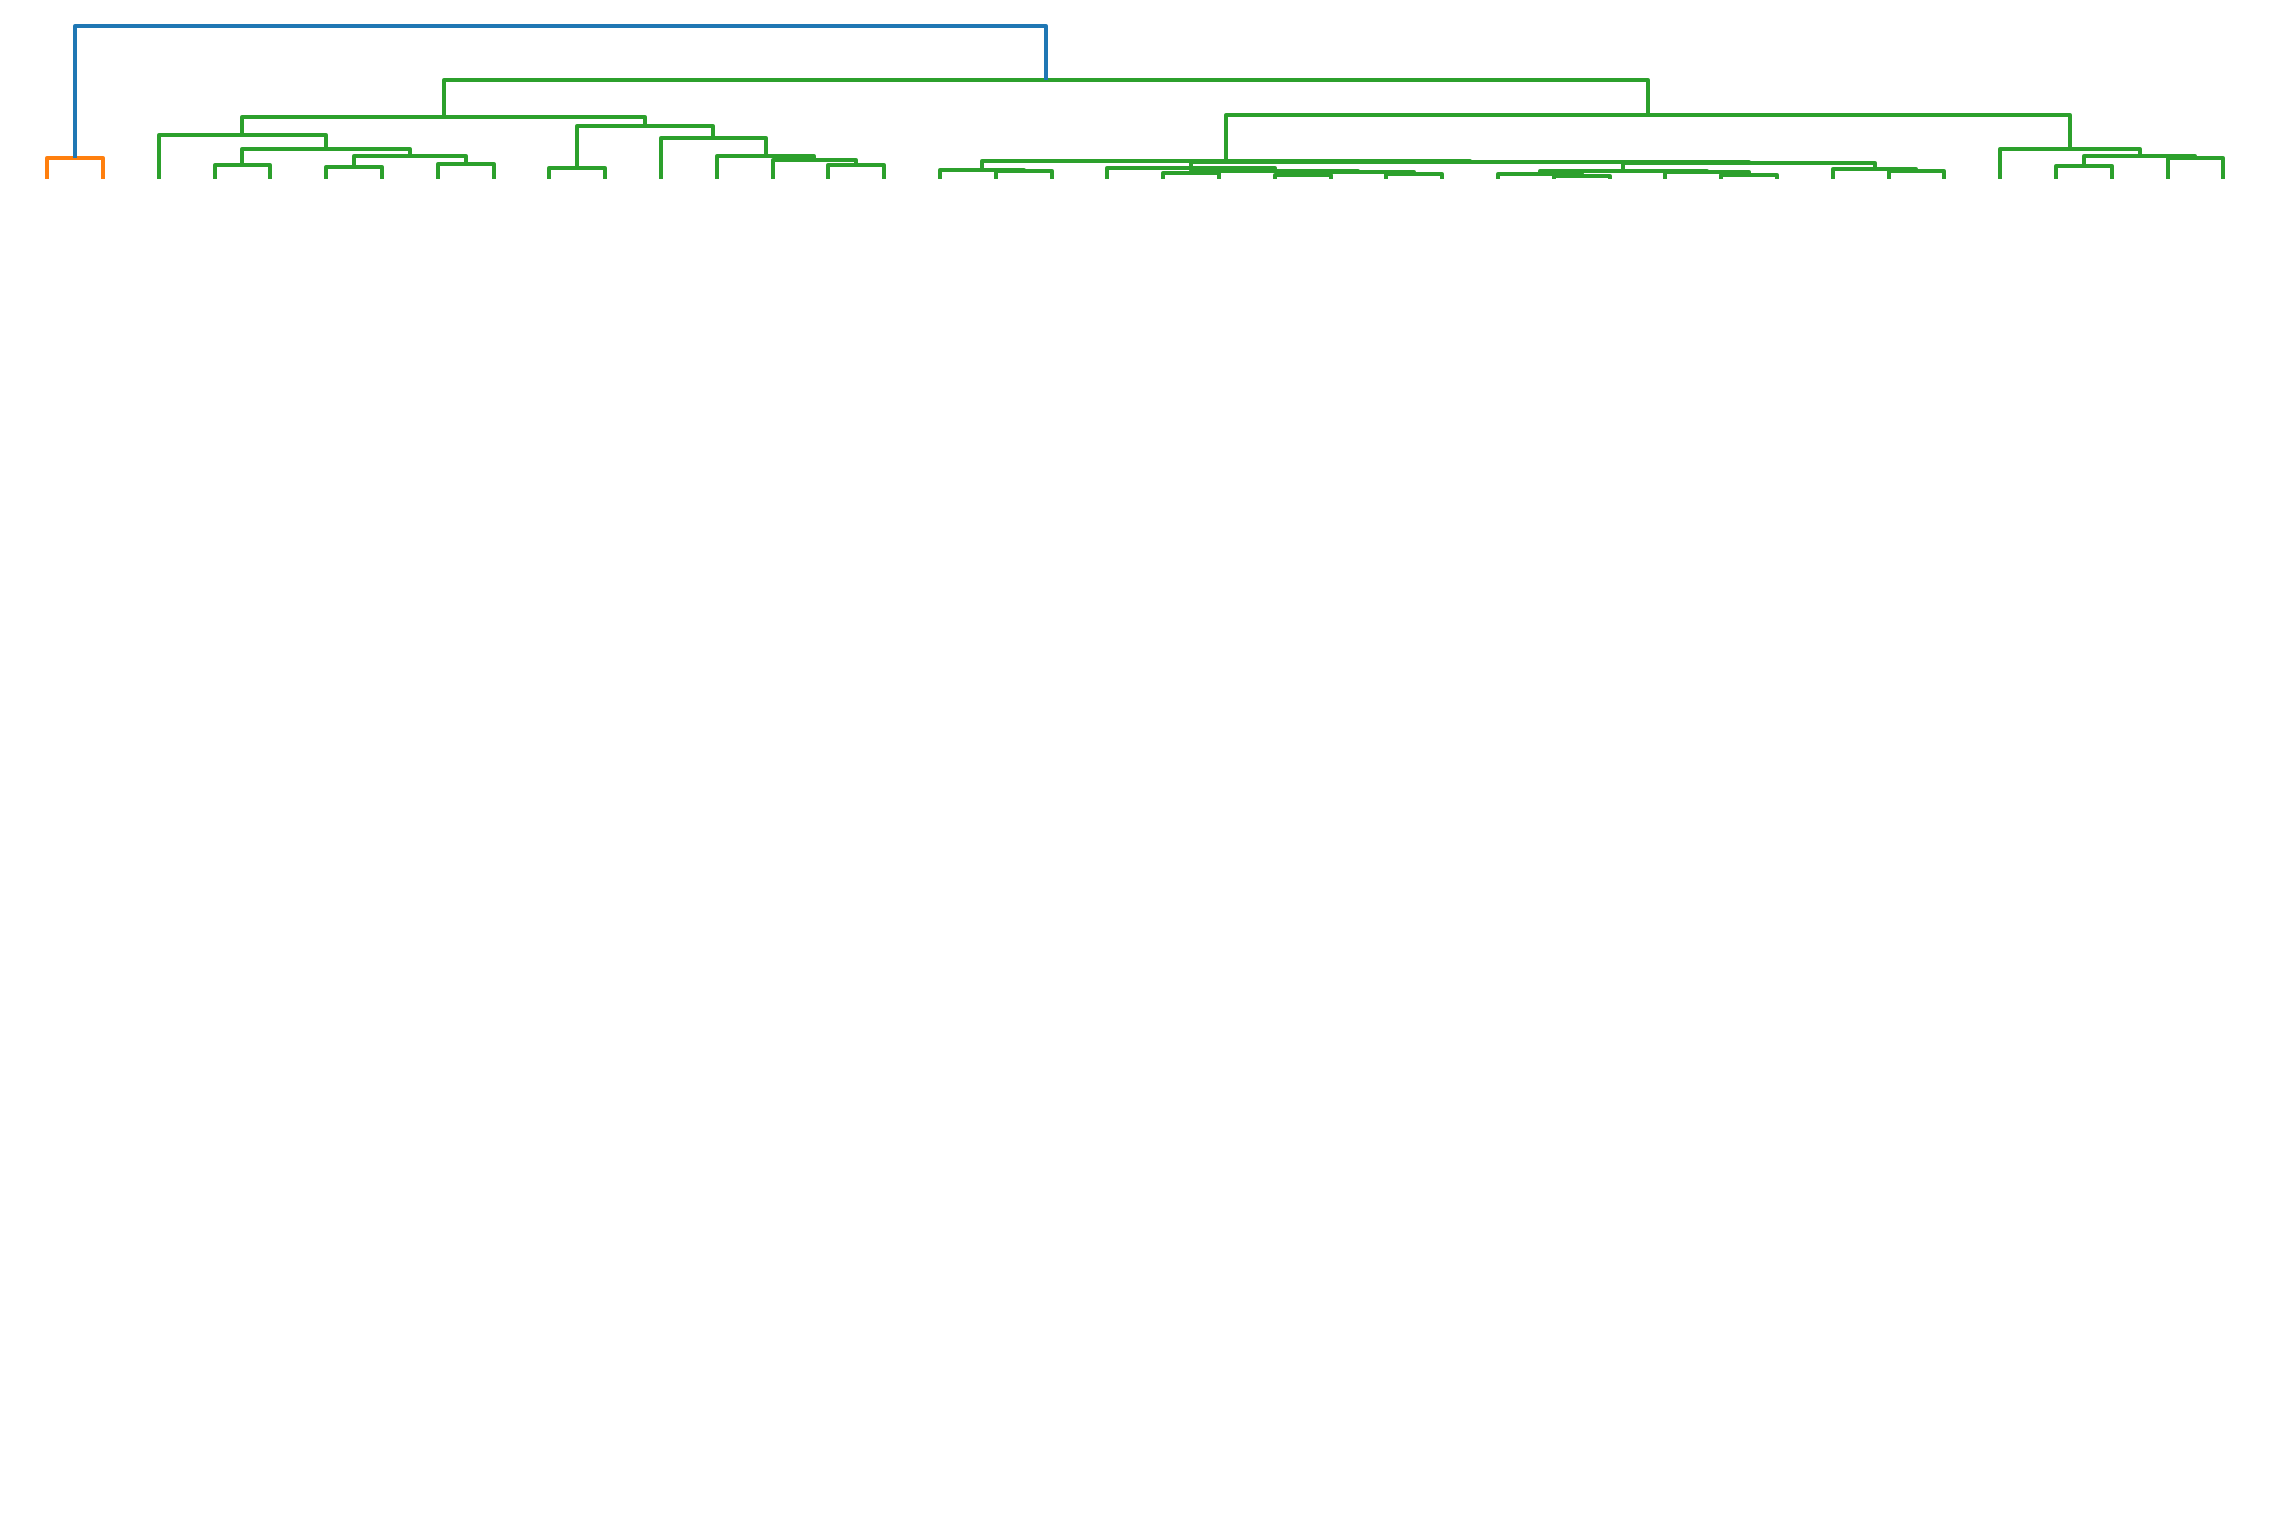

In [48]:
# hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

# hierarchical clustering
model = AgglomerativeClustering(n_clusters=None, distance_threshold=0)
model.fit(obs_mean.T)

def create_linkage_matrix(model):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)

    for i, (left_child, right_child) in enumerate(model.children_):
        count_left = 1 if left_child < n_samples else counts[left_child - n_samples]
        count_right = 1 if right_child < n_samples else counts[right_child - n_samples]
        counts[i] = count_left + count_right

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    return linkage_matrix

# linkage matrix
linkage_matrix = create_linkage_matrix(model)

# plot the dendrogram and extract the leaf order
fig, ax = plt.subplots(figsize=(15, 10))
dendro = dendrogram(linkage_matrix, show_contracted=True, ax=ax, no_labels=True)
ax.set_ylim([-25, ax.get_ylim()[1]])
ax.axis('off')

# extract the ordering
leaf_order = dendro['leaves']

# reorder the original data
mean_reordered = obs_mean.iloc[:, leaf_order]
p_reordered = p.iloc[:, leaf_order]
sig_fdr_reordered = sig_fdr.iloc[:, leaf_order]

In [49]:
# Decide if you want to save the figure
fig.savefig(os.path.join(BASE_DIR, 'Figures/Publication/Figure5/Supplementary/buckner_dseg__LRmerge_overlap_variogram_fdr-dendogram.png'), bbox_inches='tight')

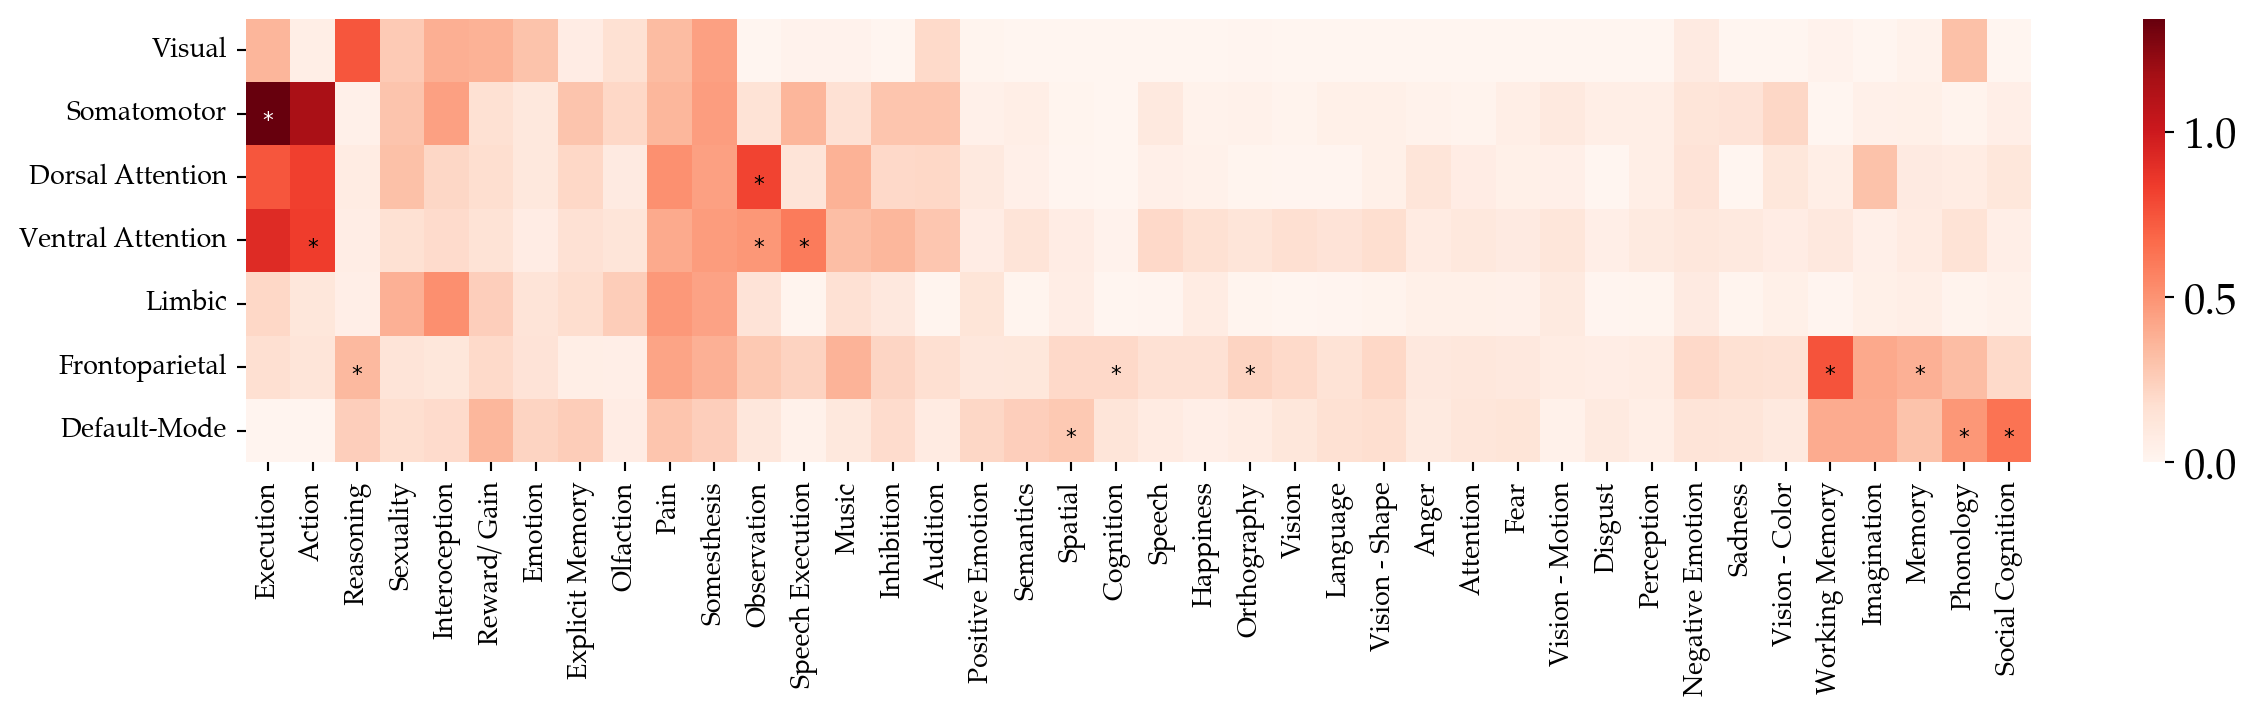

In [53]:
# plot the reordered data
fig, ax = plt.subplots(figsize=(15, 3))
sns.heatmap(mean_reordered, cmap='Reds',linecolor='.8', ax=ax)
ax.set_xticks(np.arange(p.shape[1])+0.5)
ax.set_xticklabels(subdomain_labels.loc[mean_reordered.columns].values, rotation=90, horizontalalignment='center', fontsize=10)
ax.set_yticks(np.arange(p.shape[0])+0.5)
ax.set_yticklabels(mean_reordered.index, rotation=0, fontsize=10)
ax.set_ylabel('')

# add the * layer
for x, col in enumerate(mean_reordered.columns):
    for y, row in enumerate(mean_reordered.index):
        if sig_fdr.loc[row, col]:
            text = r'$*$'
            # Conditional color based on the value of r
            text_color = 'white' if mean_reordered.loc[row, col] > 1.0  else 'black'
            ax.text(x+0.5, y+0.6,
                    text, 
                    fontsize=8,
                    color=text_color,
                    horizontalalignment='center', 
                    verticalalignment='center')

In [54]:
# Decide if you want to save the figure
fig.savefig(os.path.join(BASE_DIR, 'Figures/Publication/Figure5/Supplementary/buckner_dseg__LRmerge_overlap_variogram_fdr.png'), bbox_inches='tight')

# Next up is the Ji atlas.

In [18]:
# Load data
ji = nibabel.load(os.path.join(INPUT_DIR, 'cerebellar_atlases/Ji_2019/atl-Ji10_space-MNI_dseg.nii'))

In [19]:
#Extract the data array
ji_data = ji.get_fdata()

# Get unique labels
unique_labels = np.unique(ji_data)

# Print the unique labels and their count
print(f"Unique labels in jd_data: {unique_labels}")
print(f"Number of unique labels: {len(unique_labels)}")

Unique labels in jd_data: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
Number of unique labels: 11


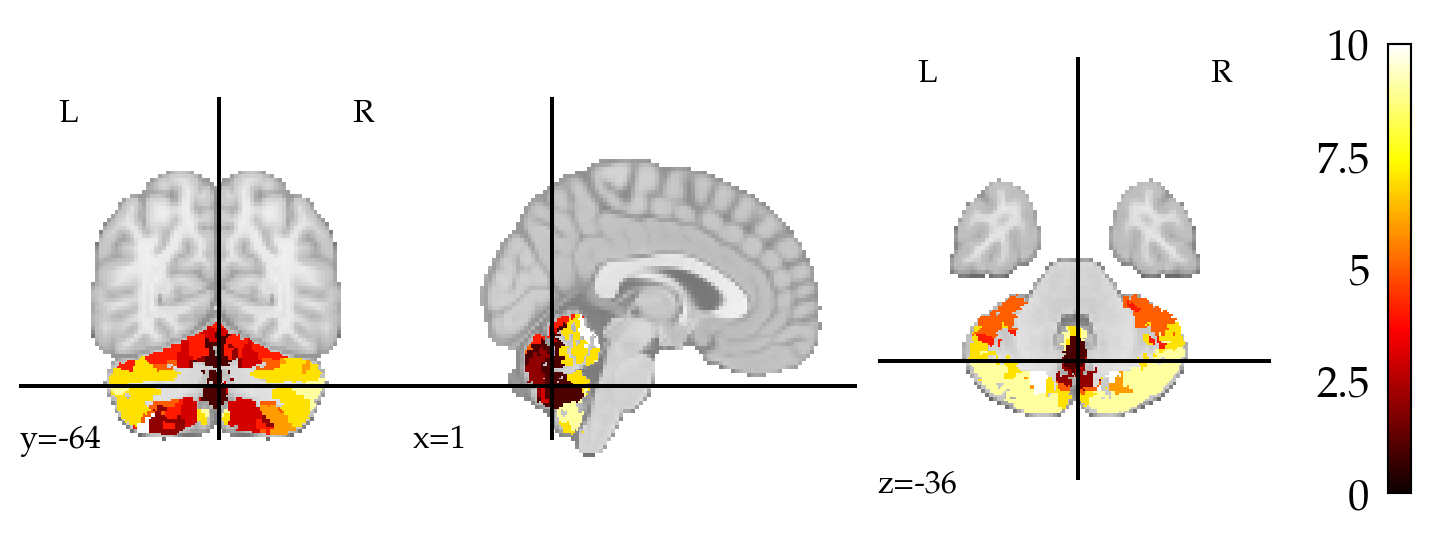

In [20]:
nilearn.plotting.plot_stat_map(ji, threshold=0)

In [21]:
# Check the data type of the loaded Ji atlas
print(f"Data type of Ji atlas before resampling: {ji.get_fdata().dtype}")

# Load the mask image
proper_mask_2mm = nibabel.load(os.path.join(INPUT_DIR, 'maps/D2009_MNI_2mm.nii.gz'))

# Resample the Ji atlas to the mask
ji_mni_2mm = nilearn.image.resample_to_img(ji, proper_mask_2mm)

# Check the data type of the resampled Ji atlas
print(f"Data type of Ji atlas after resampling: {ji_mni_2mm.get_fdata().dtype}")


Data type of Ji atlas before resampling: float64
Data type of Ji atlas after resampling: float64


/data/project/cerebellum_ale/venv/lib/python3.11/site-packages/nilearn/image/resampling.py:597: UserWarning: Casting data from int8 to float32
  warnings.warn(f"Casting data from {data.dtype.name} to {aux}")


In [22]:
# Convert the data back to integer if necessary! It is important to check that the labels are still the correct number.
ji_mni_2mm_data = ji_mni_2mm.get_fdata().astype(np.int32)
ji_mni_2mm = nibabel.Nifti1Image(ji_mni_2mm_data, ji_mni_2mm.affine, ji_mni_2mm.header)

In [23]:
# Check unique labels after resampling
unique_labels = np.unique(ji_mni_2mm.get_fdata())
print(f"Unique labels in resampled Ji atlas: {unique_labels}")
print(f"Number of unique labels: {len(unique_labels)}")

Unique labels in resampled Ji atlas: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
Number of unique labels: 11


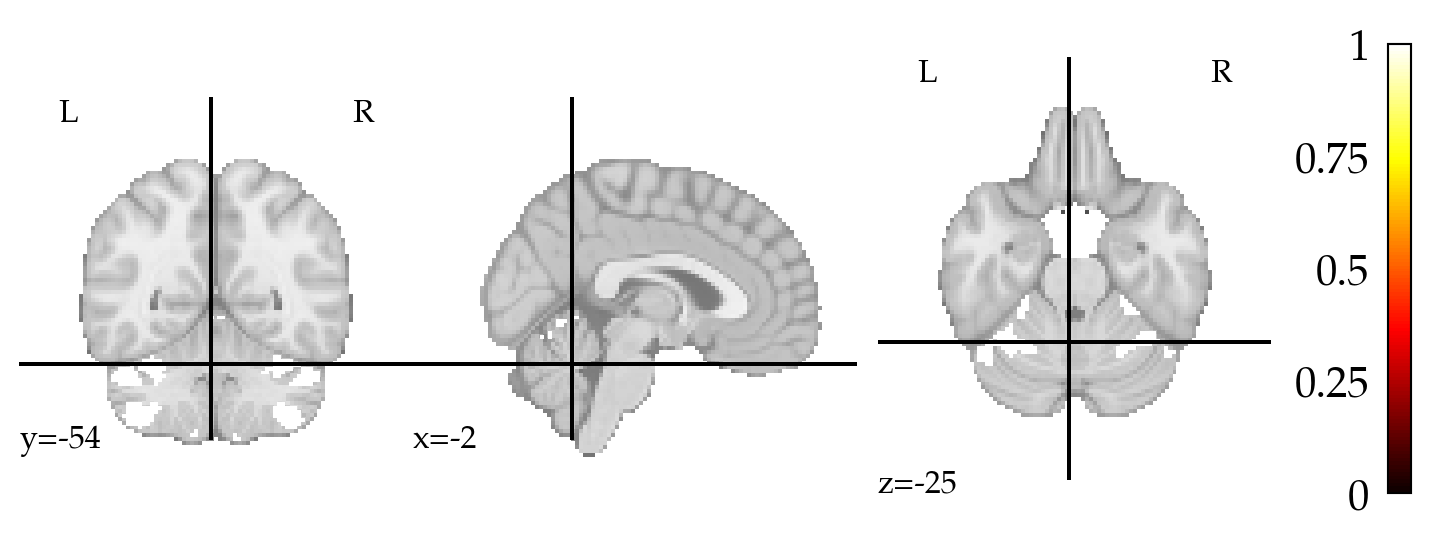

In [24]:
# Plot a single, example, parcel and check if it is symmetric.
nilearn.plotting.plot_stat_map(nilearn.image.math_img('a == 4', a=ji_mni_2mm))

In [25]:
mask_data = proper_mask_2mm.get_fdata().astype('bool')
ji_mni_2mm_masked = ji_mni_2mm.get_fdata()[mask_data]

# Get the unique labels in the masked data
unique_labels = np.unique(ji_mni_2mm_masked)

# Print the unique labels and their count
print(f"Unique labels in ji_mni_2mm_masked: {unique_labels}")
print(f"Number of unique labels: {len(unique_labels)}")

# Check if the number of unique labels is 11 (the number in the original map).
if len(unique_labels) == 11:
    print("The data contains 11 unique labels as expected.")
else:
    print(f"Warning: The data contains {len(unique_labels)} unique labels instead of 11.")

Unique labels in ji_mni_2mm_masked: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
Number of unique labels: 11
The data contains 11 unique labels as expected.


# Visualise with original colors to check what each region corresponds to.

In [26]:
# Load the TSV file
tsv_file = (os.path.join(INPUT_DIR, 'cerebellar_atlases/Ji_2019/atl-Ji10.tsv'))
lookup_table = pd.read_csv(tsv_file, sep='\t')
lookup_table

index      name    color
0      1   Region1  #8fe399
1      2   Region2  #0053b8
2      3   Region3  #3c0099
3      4   Region4  #009999
4      5   Region5  #4e9dff
5      6   Region6  #ffff00
6      7   Region7  #ffe3c3
7      8   Region8  #b05828
8      9   Region9  #db133c
9     10  Region10  #ff9c00

In [27]:
# Create a dictionary to map region index to color
index_to_color = {row['index']: row['color'] for _, row in lookup_table.iterrows()}

In [30]:
# Create a dictionary mapping region index to RGB color directly from INPUT_DIR/cerebellar_atlases/Ji_2019/atl-Ji10.lut
index_to_color = {
    1: (0.5647, 0.8902, 0.6000),  # Region1
    2: (0.0000, 0.3255, 0.7216),  # Region2
    3: (0.2392, 0.0000, 0.6000),  # Region3
    4: (0.0000, 0.6039, 0.6039),  # Region4
    5: (0.3098, 0.6157, 1.0000),  # Region5
    6: (1.0000, 1.0000, 0.0000),  # Region6
    7: (1.0000, 0.8941, 0.7686),  # Region7
    8: (0.6941, 0.3490, 0.1569),  # Region8
    9: (0.8627, 0.0784, 0.2353),  # Region9
    10: (1.0000, 0.6118, 0.0000)  # Region10
}

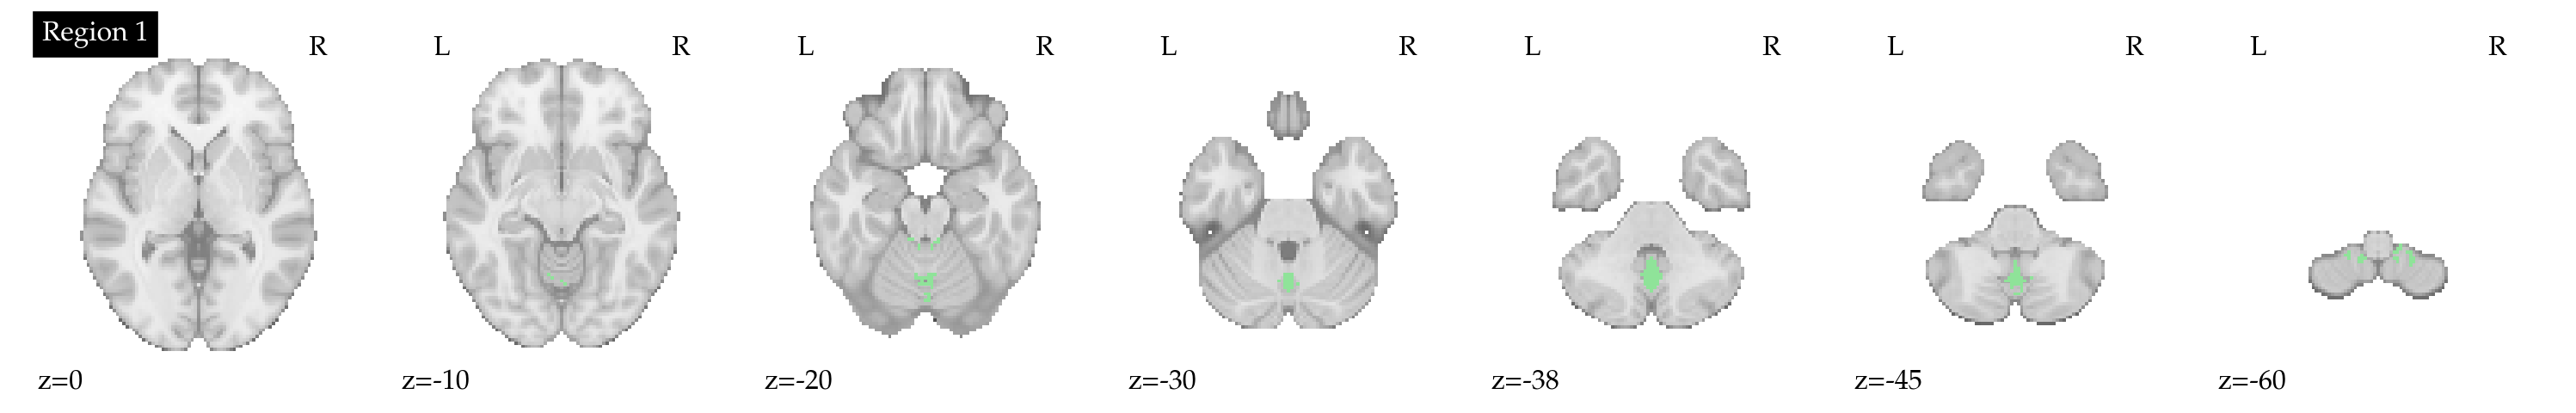

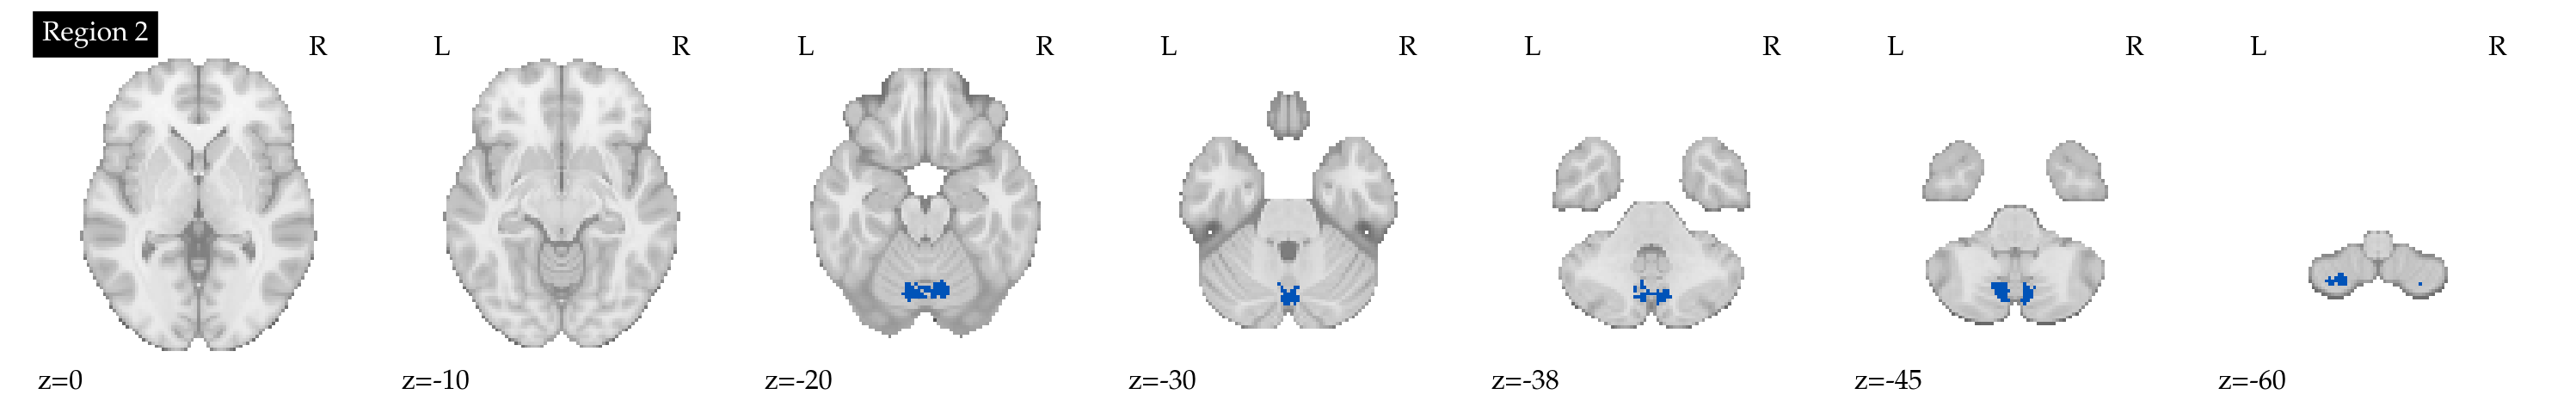

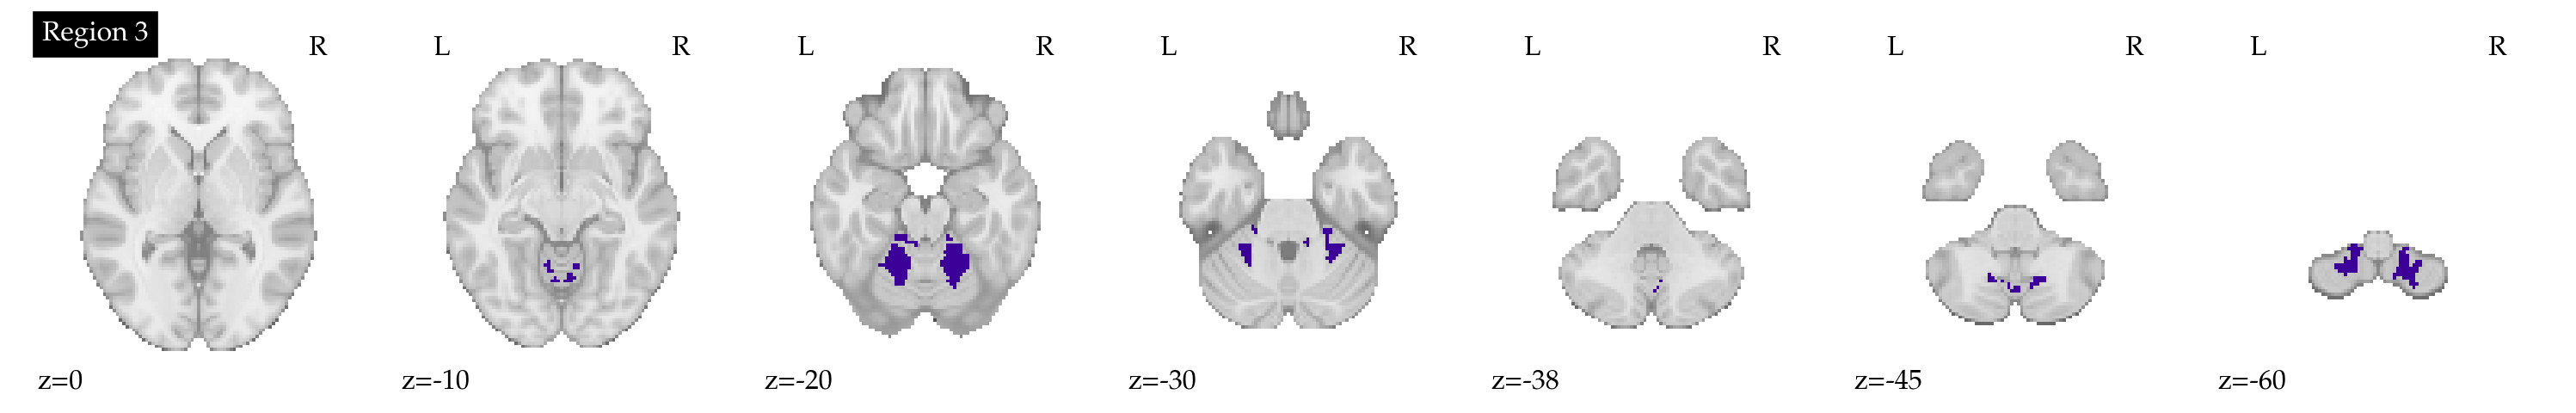

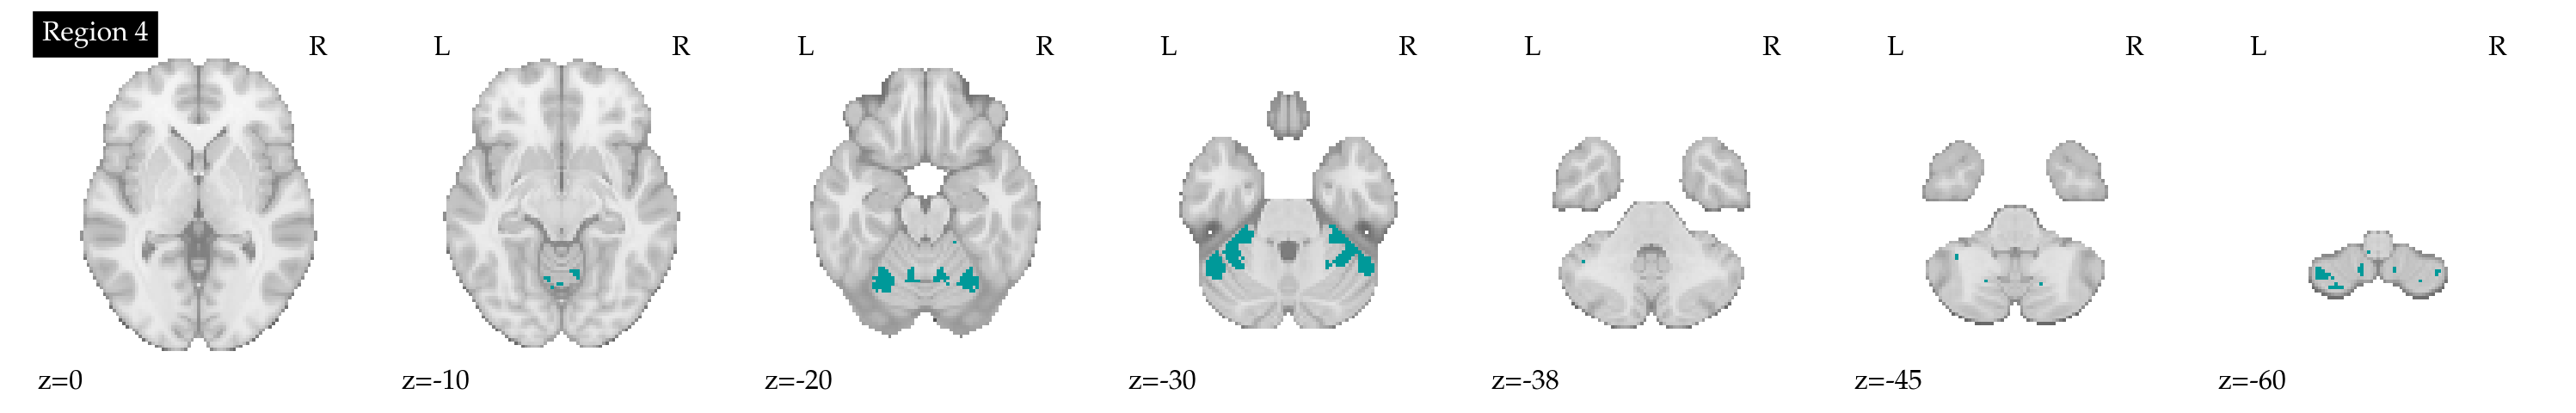

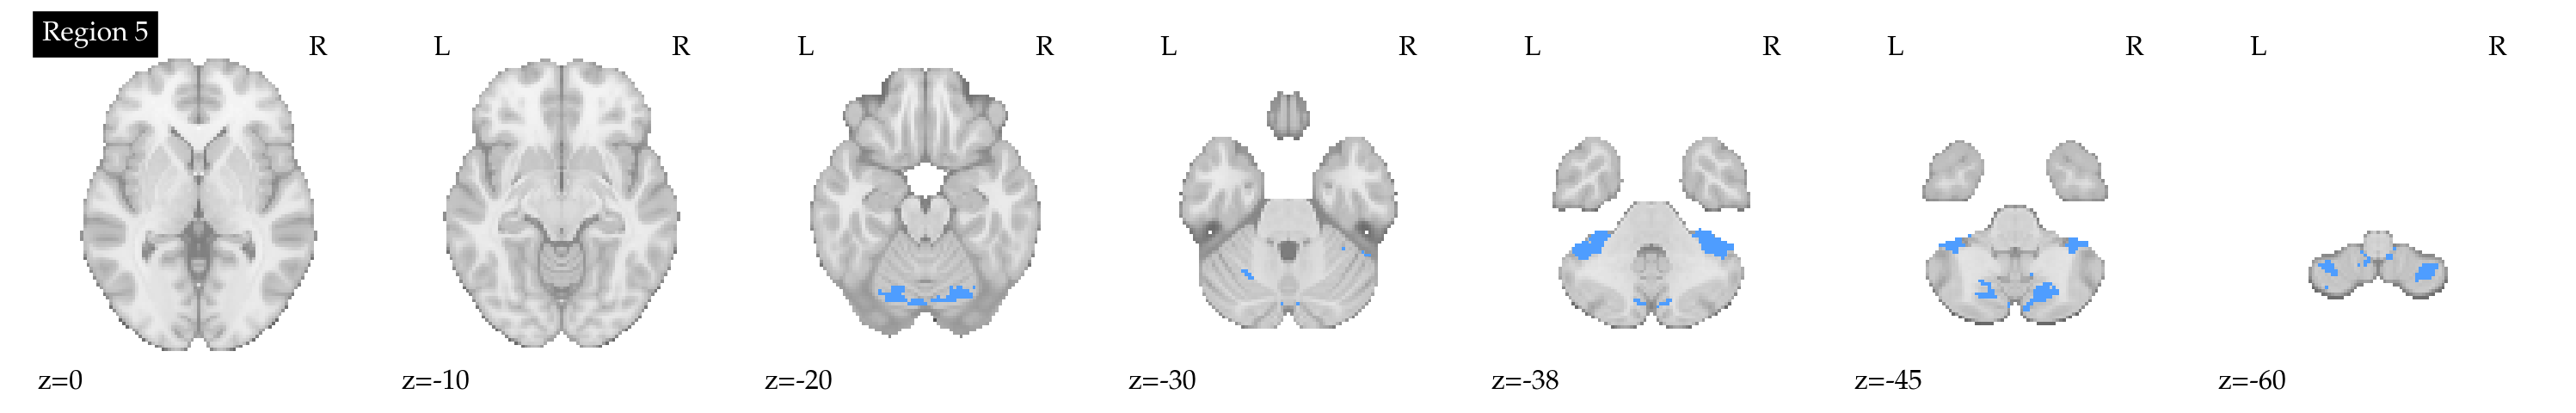

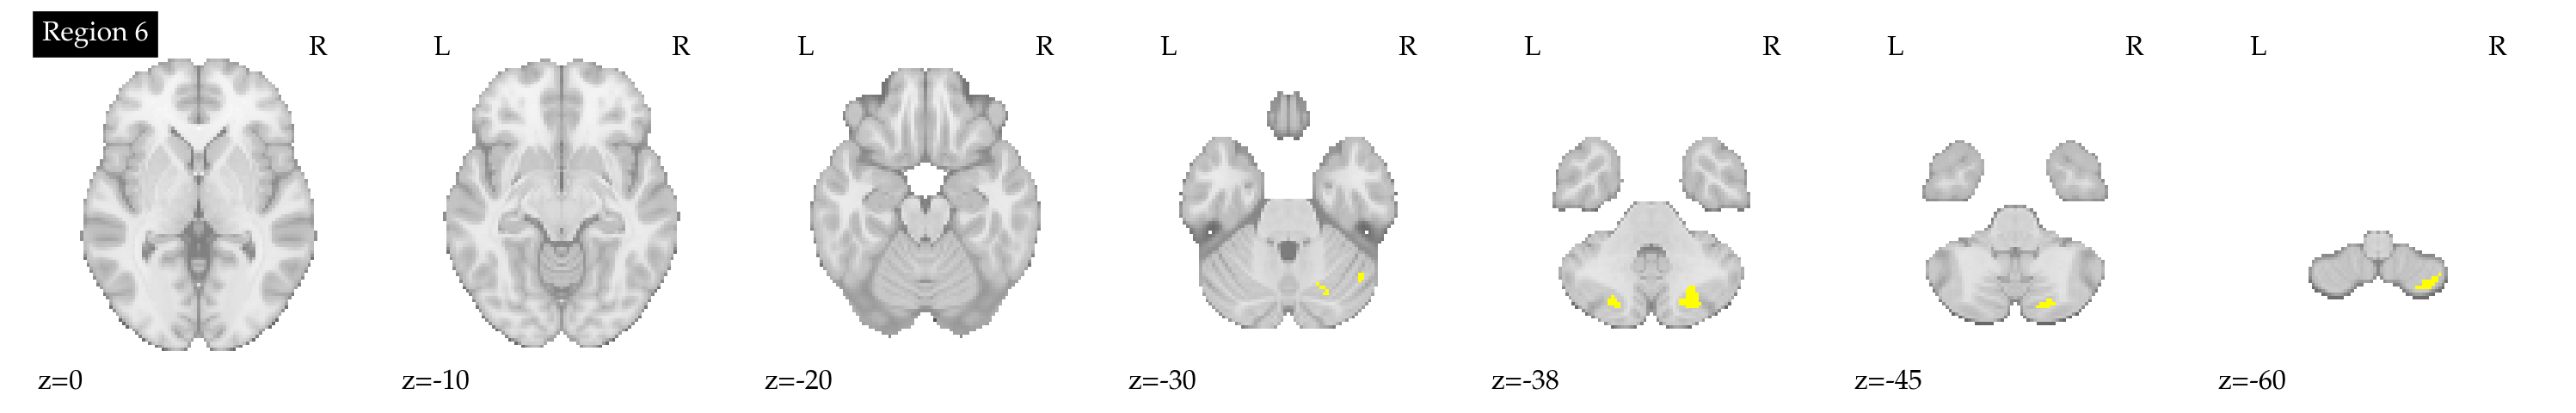

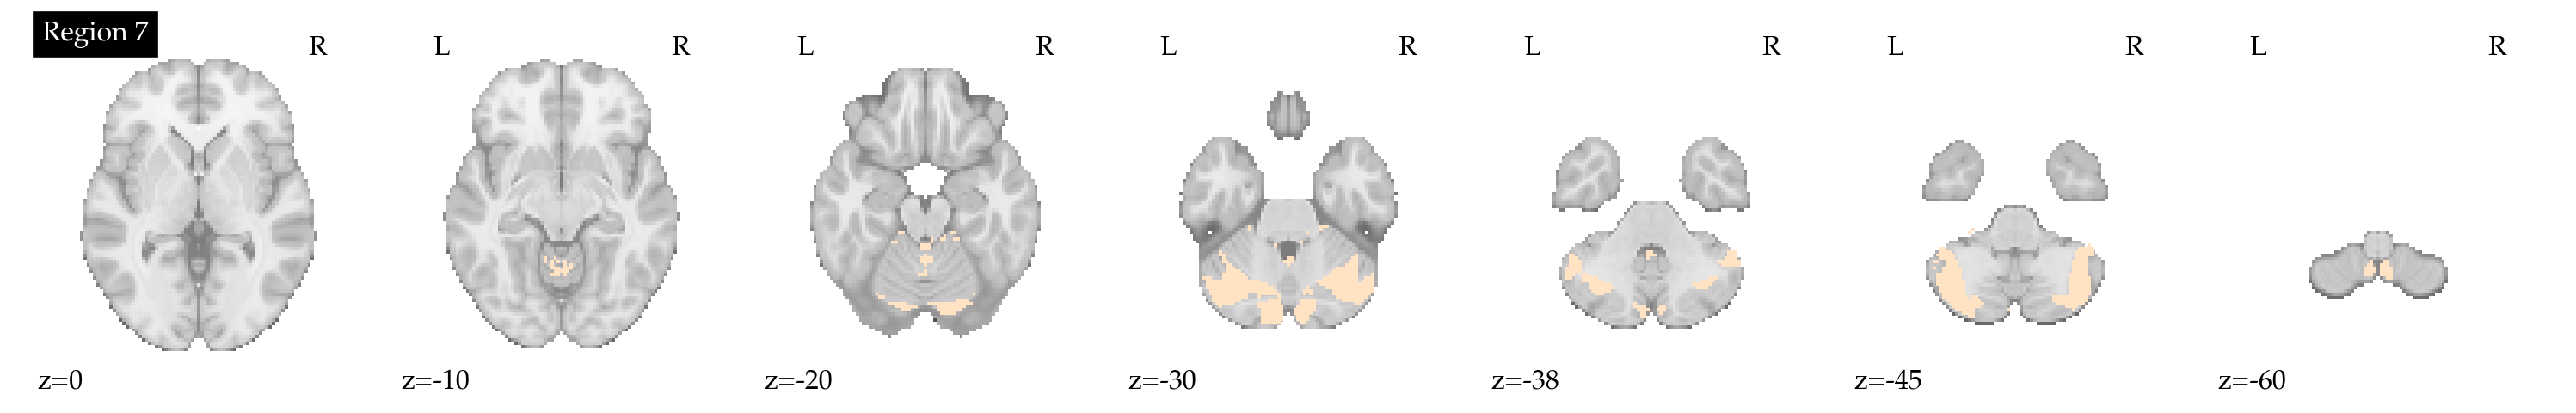

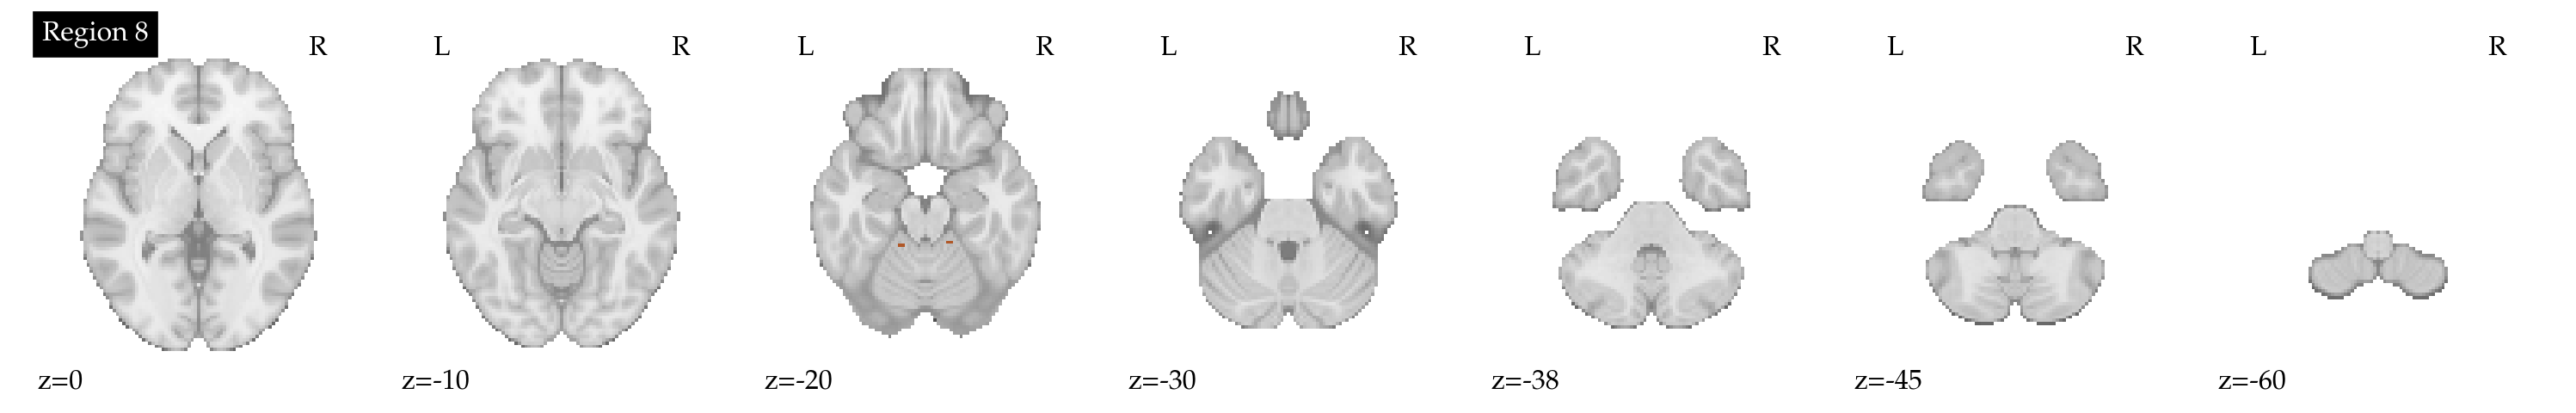

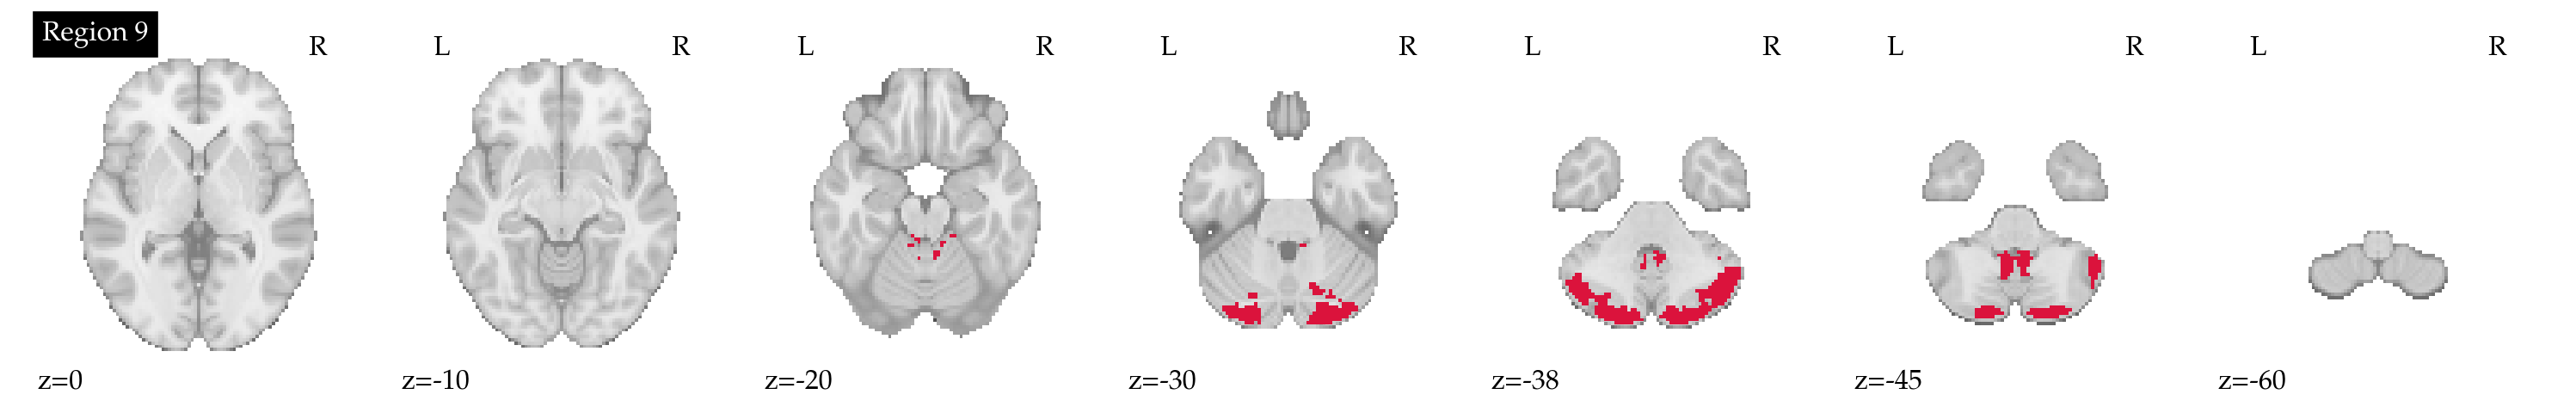

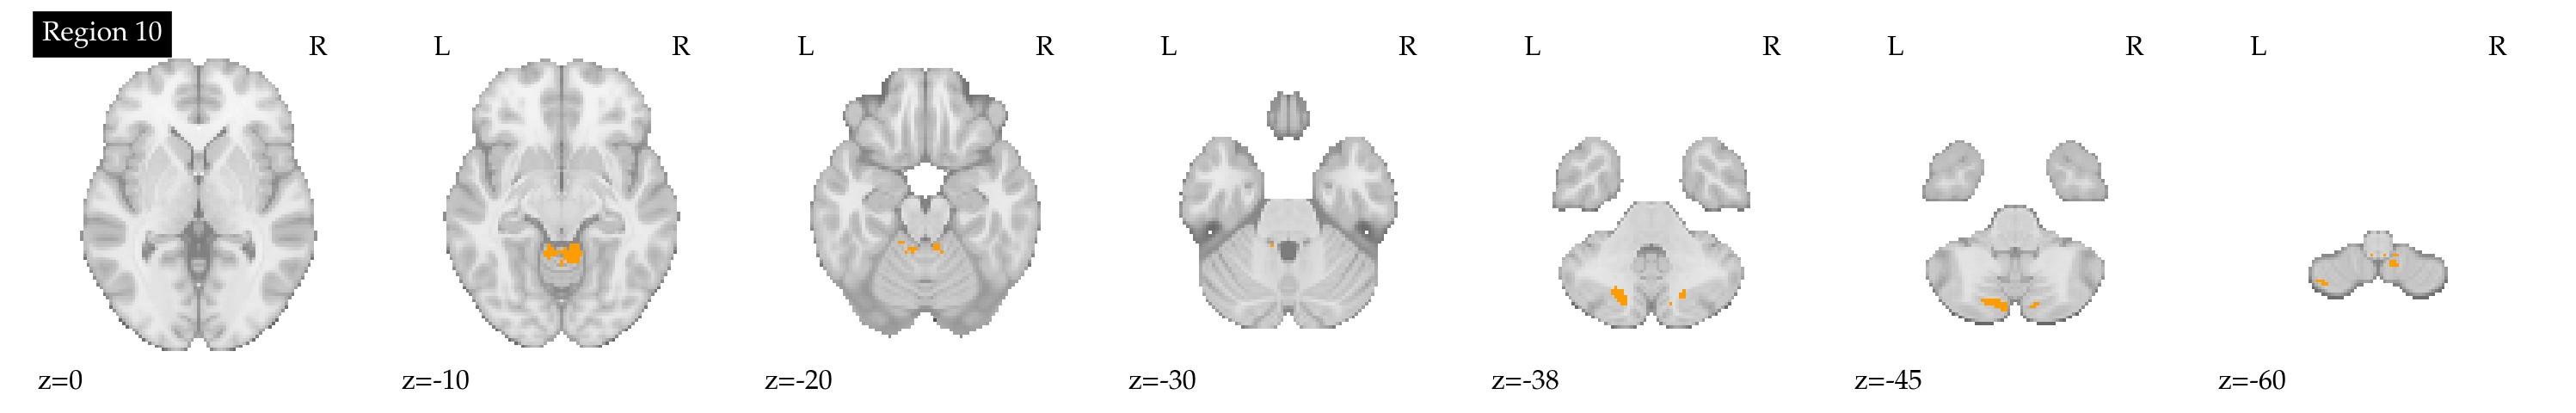

In [37]:
cut_coords= [0, -10, -20, -30, -38, -45, -60]  # Use the same slice coordinates for all.

# Loop through each region in the lookup table and plot it
for index, color in index_to_color.items():
    # Create a binary mask for the region
    region_img = nilearn.image.math_img('a == {}'.format(index), a=ji_mni_2mm)
    
    # Plot the region using the specified color
    display = nilearn.plotting.plot_stat_map(
        region_img, 
        colorbar=False, 
        display_mode='z', 
        threshold=0.5, 
        cut_coords=cut_coords,
        cmap=plt.cm.colors.ListedColormap([color]), 
        #title=f'Region {index}'
    )
    display.title(f'Region {index}', size=12)
    plt.show()

# Run variogram-based mean test

In [38]:
mask_data = proper_mask_2mm.get_fdata().astype('bool')
ji_mni_2mm_masked =  ji_mni_2mm.get_fdata()[mask_data]

obs_mean = pd.DataFrame(index=range(11)) # Corresponds to the number of parcels (+1, background)
p = pd.DataFrame(index=range(11))

surrogates_paths = sorted(glob.glob(os.path.join(OUTPUT_DIR,
    'SALE/*/*/uncorr_z_2mm_mask-D2009_MNI_surrogates-variogram_n-1000.npy')
))

for surrogates_path in tqdm(surrogates_paths):
    try:
        # Extract subbd using regex for better reliability
        subbd_match = re.search(r'SALE/(.*?)/(.*?)/', surrogates_path)
        if subbd_match:
            subbd = subbd_match.group(2)
        else:
            print(f"Failed to parse subbd from path: {surrogates_path}")
            continue

        # load z map and mask it
        z_2mm = os.path.join(os.path.dirname(surrogates_path), 'uncorr_z_2mm.nii.gz')
        z_2mm_masked = nibabel.load(z_2mm).get_fdata()[mask_data]
        # load surrogates
        surrogates = np.load(surrogates_path)

        obs_mean.loc[:, subbd] = pd.DataFrame(
            {'ji': ji_mni_2mm_masked,
            'z': z_2mm_masked}
        ).groupby('ji').mean().values.flatten()

        # This makes the calculations a ton faster!
        null_mean = (
            pd.DataFrame(surrogates.T, index=ji_mni_2mm_masked)
            .reset_index(drop=False)
            .groupby('index')
            .mean().values
        )
        
        p.loc[:, subbd] = (np.abs(null_mean) >= np.abs(obs_mean.loc[:, subbd].values[:, None])).mean(axis=1)
    except Exception as e:
        print(f"Error processing {surrogates_path}: {e}")  

# Display the resulting DataFrames
print(obs_mean)
print(p)

# Check if both dataframes are 11 x 40.

100%|███████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:16<00:00,  2.44it/s]

    Action.Execution.Speech  Action.Execution  Action.Imagination  \
0              1.700158e-01          0.416849        1.531920e-01   
1              2.947981e-01          0.918895        7.285606e-02   
2              7.850715e-01          0.965646        3.307140e-02   
3              4.704920e-01          1.504694        4.062140e-02   
4              5.844054e-01          0.872407        1.442271e-01   
5              3.443661e-01          0.580695        2.661172e-01   
6              9.452295e-02          0.269753        6.347213e-01   
7              1.364696e-01          0.098157        4.485363e-01   
8              3.884002e-18          0.383610        2.080149e-20   
9              2.431314e-02          0.005048        3.376668e-01   
10             2.582662e-02          0.086469        4.194792e-02   

    Action.Inhibition  Action.Observation    Action  Cognition.Attention  \
0            0.200251            0.218004  0.326941             0.080127   
1            0.0695

# Label and plot hierarchically

In [82]:
ji_labels = pd.Series({ ## Plain labels
    '0': 'Background',
    '1': 'Region1',
    '2': 'Region2',
    '3': 'Region3',
    '4': 'Region4',
    '5': 'Region5',
    '6': 'Region6',
    '7': 'Region7',
    '8': 'Region8',
    '9': 'Region9',
    '10': 'Region10'
})

1. Primary Visual
2. Secondary Visual
3. Somatomotor
4. Cingulo-Opercular
5. Dorsal Attention
6. Language
7. Frontoparietal
8. Auditory (?)
9. Default-Mode
10. Posterior Multimodal

In [39]:
ji_labels = pd.Series({ ## Inferred labels based on inspection of the parcels.
    '0': 'Background',
    '1': 'Primary Visual',
    '2': 'Secondary Visual',
    '3': 'Somatomotor',
    '4': 'Cingulo-Opercular',
    '5': 'Dorsal Attention',
    '6': 'Language',
    '7': 'Frontoparietal',
    '8': 'Auditory',
    '9': 'Default-Mode',
    '10': 'Posterior Multimodal'
})

In [40]:
import statsmodels.stats.multitest
# FDR correction
sig_fdr, _ = statsmodels.stats.multitest.fdrcorrection(p.values.flatten())
# reshape 
sig_fdr = pd.DataFrame(sig_fdr.reshape(p.shape), index=p.index, columns=p.columns)

In [41]:
# load and label
obs_mean.index = ji_labels
p.index = ji_labels
sig_fdr.index = ji_labels
# drop null
obs_mean = obs_mean.drop(index='Background')
p = p.drop(index='Background')
sig_fdr = sig_fdr.drop(index='Background')
print(sig_fdr)

                      Action.Execution.Speech  Action.Execution  \
Primary Visual                          False             False   
Secondary Visual                        False             False   
Somatomotor                             False              True   
Cingulo-Opercular                       False             False   
Dorsal Attention                        False             False   
Language                                False             False   
Frontoparietal                          False             False   
Auditory                                False             False   
Default-Mode                            False             False   
Posterior Multimodal                    False             False   

                      Action.Imagination  Action.Inhibition  \
Primary Visual                     False              False   
Secondary Visual                   False              False   
Somatomotor                        False              False   
Cingulo-Op

In [42]:
obs_mean.to_csv(os.path.join(BASE_DIR, 'Figures/Publication/Figure5/Supplementary/z_ji10_dseg_mean.csv'))
p.to_csv(os.path.join(BASE_DIR, 'Figures/Publication/Figure5/Supplementary/z_ji10_dseg_p.csv'))

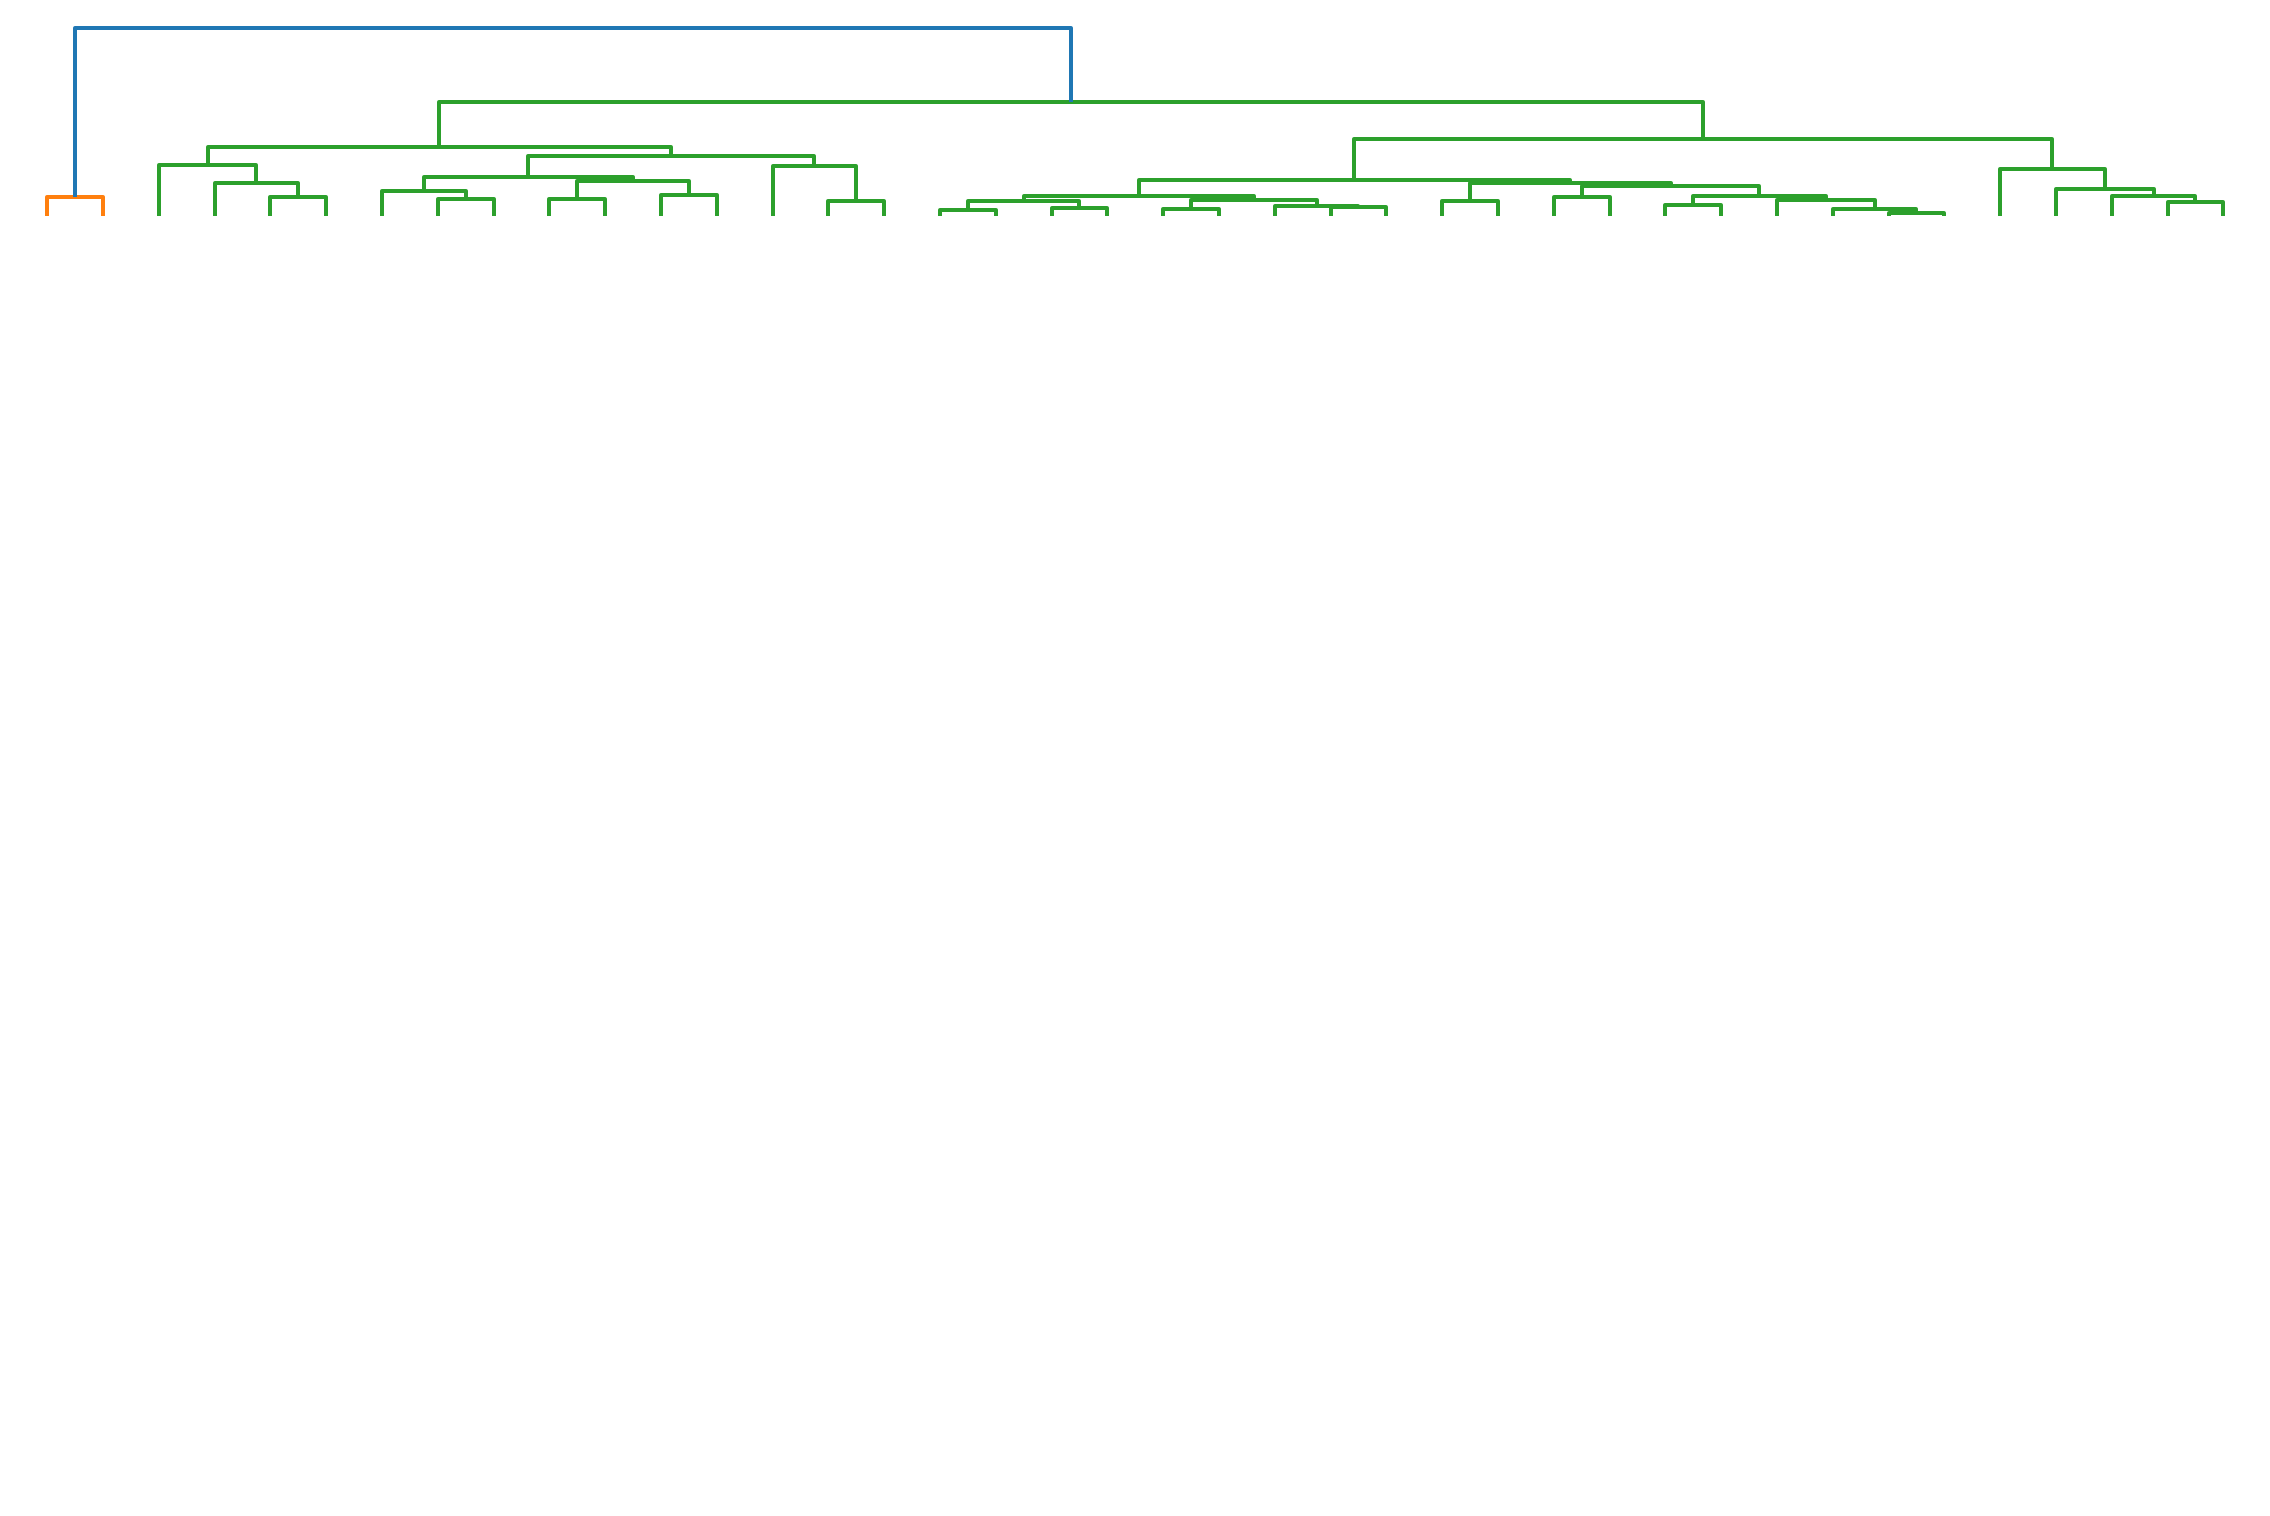

In [43]:
# hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

# hierarchical clustering
model = AgglomerativeClustering(n_clusters=None, distance_threshold=0)
model.fit(obs_mean.T)

def create_linkage_matrix(model):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)

    for i, (left_child, right_child) in enumerate(model.children_):
        count_left = 1 if left_child < n_samples else counts[left_child - n_samples]
        count_right = 1 if right_child < n_samples else counts[right_child - n_samples]
        counts[i] = count_left + count_right

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    return linkage_matrix

# linkage matrix
linkage_matrix = create_linkage_matrix(model)

# plot the dendrogram and extract the leaf order
fig, ax = plt.subplots(figsize=(15, 10))
dendro = dendrogram(linkage_matrix, show_contracted=True, ax=ax, no_labels=True)
ax.set_ylim([-25, ax.get_ylim()[1]])
ax.axis('off')

# extract the ordering
leaf_order = dendro['leaves']

# reorder the original data
mean_reordered = obs_mean.iloc[:, leaf_order]
p_reordered = p.iloc[:, leaf_order]
sig_fdr_reordered = sig_fdr.iloc[:, leaf_order]

In [44]:
# Decide if you want to save the figure
fig.savefig(os.path.join(BASE_DIR, 'Figures/Publication/Figure5/Supplementary/ji_dseg_overlap_variogram_fdr-dendogram.png'), bbox_inches='tight')

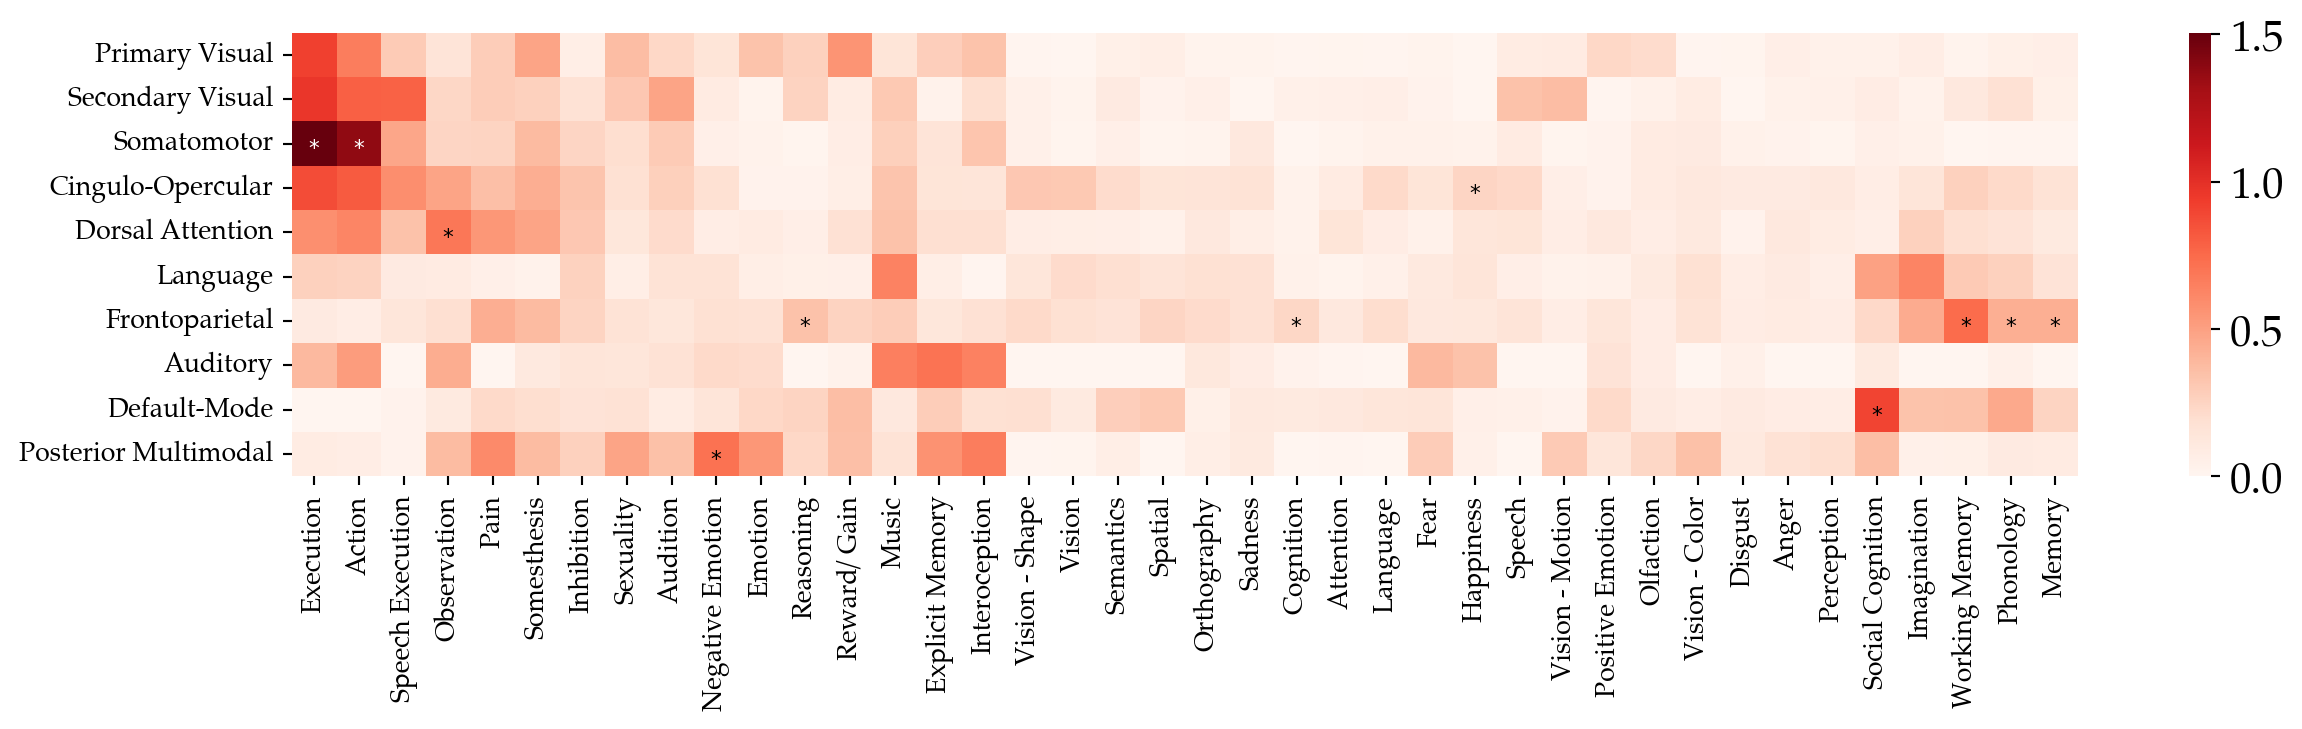

In [47]:
# plot the reordered data
fig, ax = plt.subplots(figsize=(15, 3))
sns.heatmap(mean_reordered, cmap='Reds',linecolor='.8', ax=ax)
ax.set_xticks(np.arange(p.shape[1])+0.5)
ax.set_xticklabels(subdomain_labels.loc[mean_reordered.columns].values, rotation=90, horizontalalignment='center', fontsize=10)
ax.set_yticks(np.arange(p.shape[0])+0.5)
ax.set_yticklabels(mean_reordered.index, rotation=0, fontsize=10)
ax.set_ylabel('')

# add the * layer
for x, col in enumerate(mean_reordered.columns):
    for y, row in enumerate(mean_reordered.index):
        if sig_fdr.loc[row, col]:
            text = r'$*$'
            # Conditional color based on the value of r
            text_color = 'white' if mean_reordered.loc[row, col] > 1.0  else 'black'
            ax.text(x+0.5, y+0.6,
                    text, 
                    fontsize=8,
                    color=text_color,
                    horizontalalignment='center', 
                    verticalalignment='center')

In [48]:
# Decide if you want to save the figure
fig.savefig(os.path.join(BASE_DIR, 'Figures/Publication/Figure5/Supplementary/ji_dseg_overlap_variogram_fdr.png'), bbox_inches='tight')

# Next, we compare the maps against cerebellar lobules (Diedrichsen 2009).

In [32]:
# Load data
jd = nibabel.load(os.path.join(INPUT_DIR, 'cerebellar_atlases/Diedrichsen_2009/atl-Anatom_space-MNI_dseg.nii'))
# Note we also make this comparison with a probabilistic segmentation.

In [33]:
#Extract the data array
jd_data = jd.get_fdata()

# Get unique labels
unique_labels = np.unique(jd_data)

# Print the unique labels and their count
print(f"Unique labels in jd_data: {unique_labels}")
print(f"Number of unique labels: {len(unique_labels)}")

Unique labels in jd_data: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34.]
Number of unique labels: 35


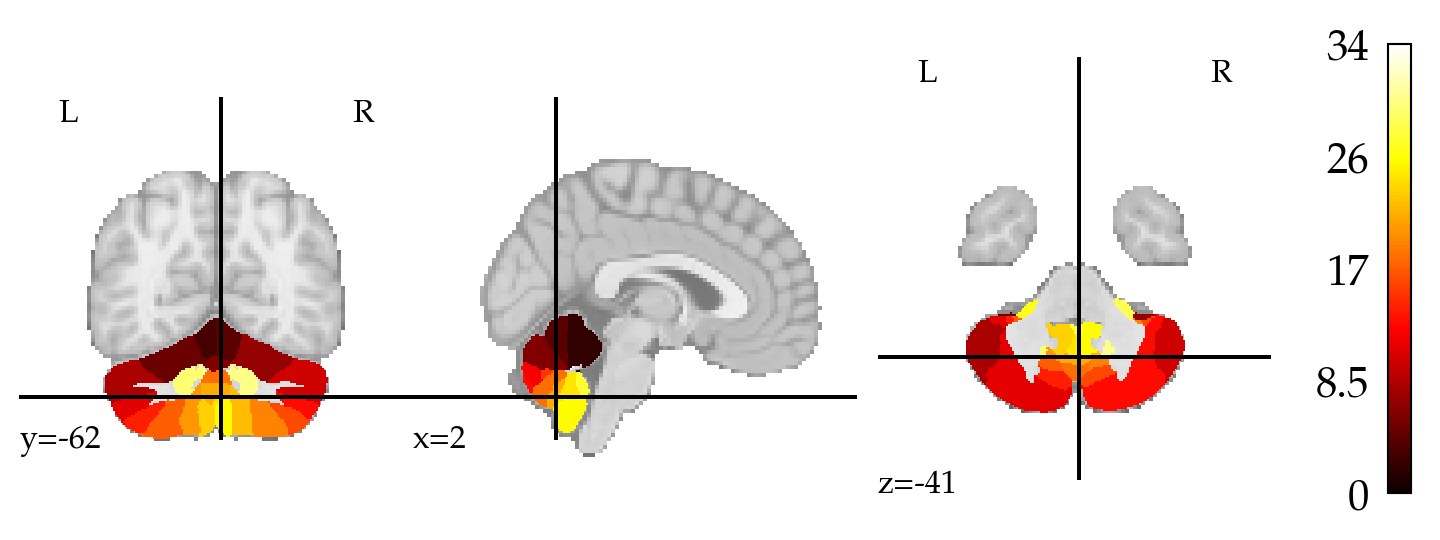

In [34]:
nilearn.plotting.plot_stat_map(jd, threshold=0)

In [35]:
# Check the data type of the loaded atlas
print(f"Data type of Diedrichsen structural atlas before resampling: {jd.get_fdata().dtype}")

# Load the mask image
proper_mask_2mm = nibabel.load(os.path.join(INPUT_DIR, 'maps/D2009_MNI_2mm.nii.gz'))

# Resample the atlas to the mask
jd_mni_2mm = nilearn.image.resample_to_img(jd, proper_mask_2mm)

# Check the data type of the resampled atlas
print(f"Data type of Diedrichsen structural atlas after resampling: {jd_mni_2mm.get_fdata().dtype}")


Data type of Diedrichsen structural atlas before resampling: float64
Data type of Diedrichsen structural atlas after resampling: float64


In [36]:
# Convert the data back to integer if necessary! It is important to check that the labels are still the correct number.
jd_mni_2mm_data = jd_mni_2mm.get_fdata().astype(np.int32)
jd_mni_2mm = nibabel.Nifti1Image(jd_mni_2mm_data, jd_mni_2mm.affine, jd_mni_2mm.header)

In [37]:
# Check unique labels after resampling
unique_labels = np.unique(jd_mni_2mm.get_fdata())
print(f"Unique labels in resampled Diedrichsen atlas: {unique_labels}")
print(f"Number of unique labels: {len(unique_labels)}") # Appears 2 labels are not within the mask anymore! Turns out these are the fastigial nuclei.

Unique labels in resampled Diedrichsen atlas: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32.]
Number of unique labels: 33


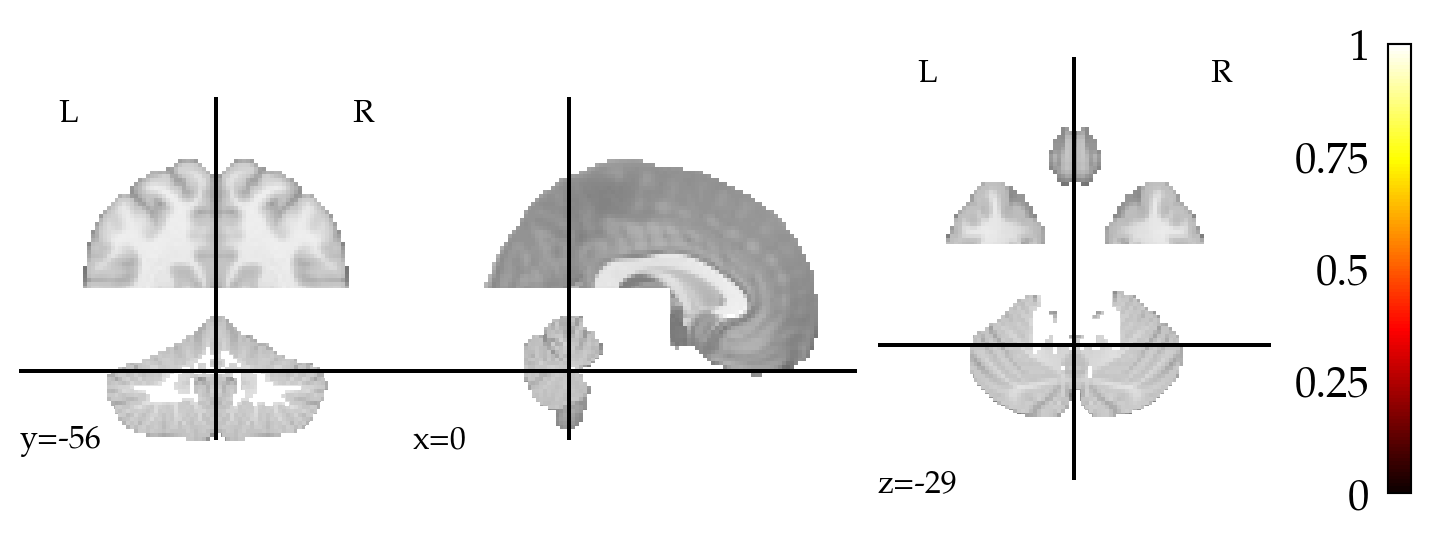

In [38]:
# Plot a single, example, parcel and check if it is assymmetric. For structural parcellations, it may be interesting to find assymetric localisations.
nilearn.plotting.plot_stat_map(nilearn.image.math_img('a == 0', a=jd_mni_2mm))

In [39]:
mask_data = proper_mask_2mm.get_fdata().astype('bool')
jd_mni_2mm_masked = jd_mni_2mm.get_fdata()[mask_data]

# Get the unique labels in the masked data
unique_labels = np.unique(jd_mni_2mm_masked)
 
# Print the unique labels and their count
print(f"Unique labels in jd_mni_2mm_masked: {unique_labels}")
print(f"Number of unique labels: {len(unique_labels)}")

# Check if the number of unique labels is 33 (the number in the original map).
if len(unique_labels) == 33:
    print("The data contains 33 unique labels as expected.")
else:
    print(f"Warning: The data contains {len(unique_labels)} unique labels instead of 33.") # This seems to have removed the background.

Unique labels in jd_mni_2mm_masked: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32.]
Number of unique labels: 32


# Run variogram-based mean test

In [40]:
obs_mean = pd.DataFrame(index=range(32)) # Corresponds to the number of parcels (+1, background)
p = pd.DataFrame(index=range(32))

surrogates_paths = sorted(glob.glob(os.path.join(OUTPUT_DIR,
    'SALE/*/*/uncorr_z_2mm_mask-D2009_MNI_surrogates-variogram_n-1000.npy')
))

for surrogates_path in tqdm(surrogates_paths):
    try:
        # Extract subbd using regex for better reliability
        subbd_match = re.search(r'SALE/(.*?)/(.*?)/', surrogates_path)
        if subbd_match:
            subbd = subbd_match.group(2)
        else:
            print(f"Failed to parse subbd from path: {surrogates_path}")
            continue

        # load z map and mask it
        z_2mm = os.path.join(os.path.dirname(surrogates_path), 'uncorr_z_2mm.nii.gz')
        z_2mm_masked = nibabel.load(z_2mm).get_fdata()[mask_data]
        # load surrogates
        surrogates = np.load(surrogates_path)

        obs_mean.loc[:, subbd] = pd.DataFrame(
            {'jd': jd_mni_2mm_masked,
            'z': z_2mm_masked}
        ).groupby('jd').mean().values.flatten()

        # This makes the calculations a ton faster!
        null_mean = (
            pd.DataFrame(surrogates.T, index=jd_mni_2mm_masked)
            .reset_index(drop=False)
            .groupby('index')
            .mean().values
        )
        
        p.loc[:, subbd] = (np.abs(null_mean) >= np.abs(obs_mean.loc[:, subbd].values[:, None])).mean(axis=1)
    except Exception as e:
        print(f"Error processing {surrogates_path}: {e}")  

# Display the resulting DataFrames
print(obs_mean)
print(p)

# Check if both dataframes are 32 x 40.

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:07<00:00,  5.61it/s]


    Action.Execution.Speech  Action.Execution  Action.Imagination  \
0              3.673425e-02      1.437183e-01        4.901604e-03   
1              1.469894e-03      4.422669e-01        3.966570e-03   
2              6.822775e-01      1.250729e+00        1.481947e-01   
3              1.267391e-01      2.272680e+00        8.788353e-05   
4              1.542946e+00      1.403410e+00        1.980022e-01   
5              8.551130e-01      1.519308e+00       -1.072326e-20   
6              9.138021e-01      1.395502e+00        3.006137e-03   
7              8.349451e-02      1.631760e-02        3.254830e-01   
8              2.495999e-19      4.694732e-20        7.409931e-24   
9              5.990737e-02      8.302724e-21        2.699626e-01   
10             4.642623e-03      5.491677e-03        1.050711e-01   
11             1.212501e-19      4.491711e-20       -1.245999e-24   
12             8.275924e-05      2.032840e-03        9.027324e-01   
13             8.055294e-02      2

# Label and plot hierarchically

In [41]:
jd_labels = pd.Series({
    # '0': 'Background', # Commented out missing parcels.
    '1': 'Left I-IV',
    '2': 'Right I-IV',
    '3': 'Left V',
    '4': 'Right V',
    '5': 'Left VI',
    '6': 'Vermis VI',
    '7': 'Right VI',
    '8': 'Left Crus I',
    '9': 'Vermis Crus I',
    '10': 'Right Crus I',
    '11': 'Left Crus II',
    '12': 'Vermis Crus II',
    '13': 'Right Crus II',
    '14': 'Left VIIb',
    '15': 'Vermis VIIb',
    '16': 'Right VIIb',
    '17': 'Left VIIIa',
    '18': 'Vermis VIIIa',
    '19': 'Right VIIIa',
    '20': 'Left VIIIb',
    '21': 'Vermis VIIIb',
    '22': 'Right VIIIb',
    '23': 'Left IX',
    '24': 'Vermis IX',
    '25': 'Right IX',
    '26': 'Left X',
    '27': 'Vermis X',
    '28': 'Right X',
    '29': 'Left Dentate',
    '30': 'Right Dentate',
    '31': 'Left Interposed',
    '32': 'Right Interposed',
    # '33': 'Left Fastigial',
    # '34': 'Right Fastigial'
})



In [42]:
import statsmodels.stats.multitest
# FDR correction
sig_fdr, _ = statsmodels.stats.multitest.fdrcorrection(p.values.flatten())
# reshape 
sig_fdr = pd.DataFrame(sig_fdr.reshape(p.shape), index=p.index, columns=p.columns)

In [43]:
# load and label
obs_mean.index = jd_labels
p.index = jd_labels
sig_fdr.index = jd_labels
# drop null
#obs_mean = obs_mean.drop(index='Background')
#p = p.drop(index='Background')
# sig_fdr = sig_fdr.drop(index='Background')
print(sig_fdr)

                  Action.Execution.Speech  Action.Execution  \
Left I-IV                           False             False   
Right I-IV                          False             False   
Left V                              False             False   
Right V                             False             False   
Left VI                              True             False   
Vermis VI                           False             False   
Right VI                            False             False   
Left Crus I                         False             False   
Vermis Crus I                       False             False   
Right Crus I                        False             False   
Left Crus II                        False             False   
Vermis Crus II                      False             False   
Right Crus II                       False             False   
Left VIIb                           False             False   
Vermis VIIb                         False             F

In [127]:
obs_mean.to_csv(os.path.join(BASE_DIR, 'Figures/Publication/Figure5/Supplementary/z_D2009_dseg_mean.csv'))
p.to_csv(os.path.join(BASE_DIR, 'Figures/Publication/Figure5/Supplementary/z_D2009_dseg_p.csv'))

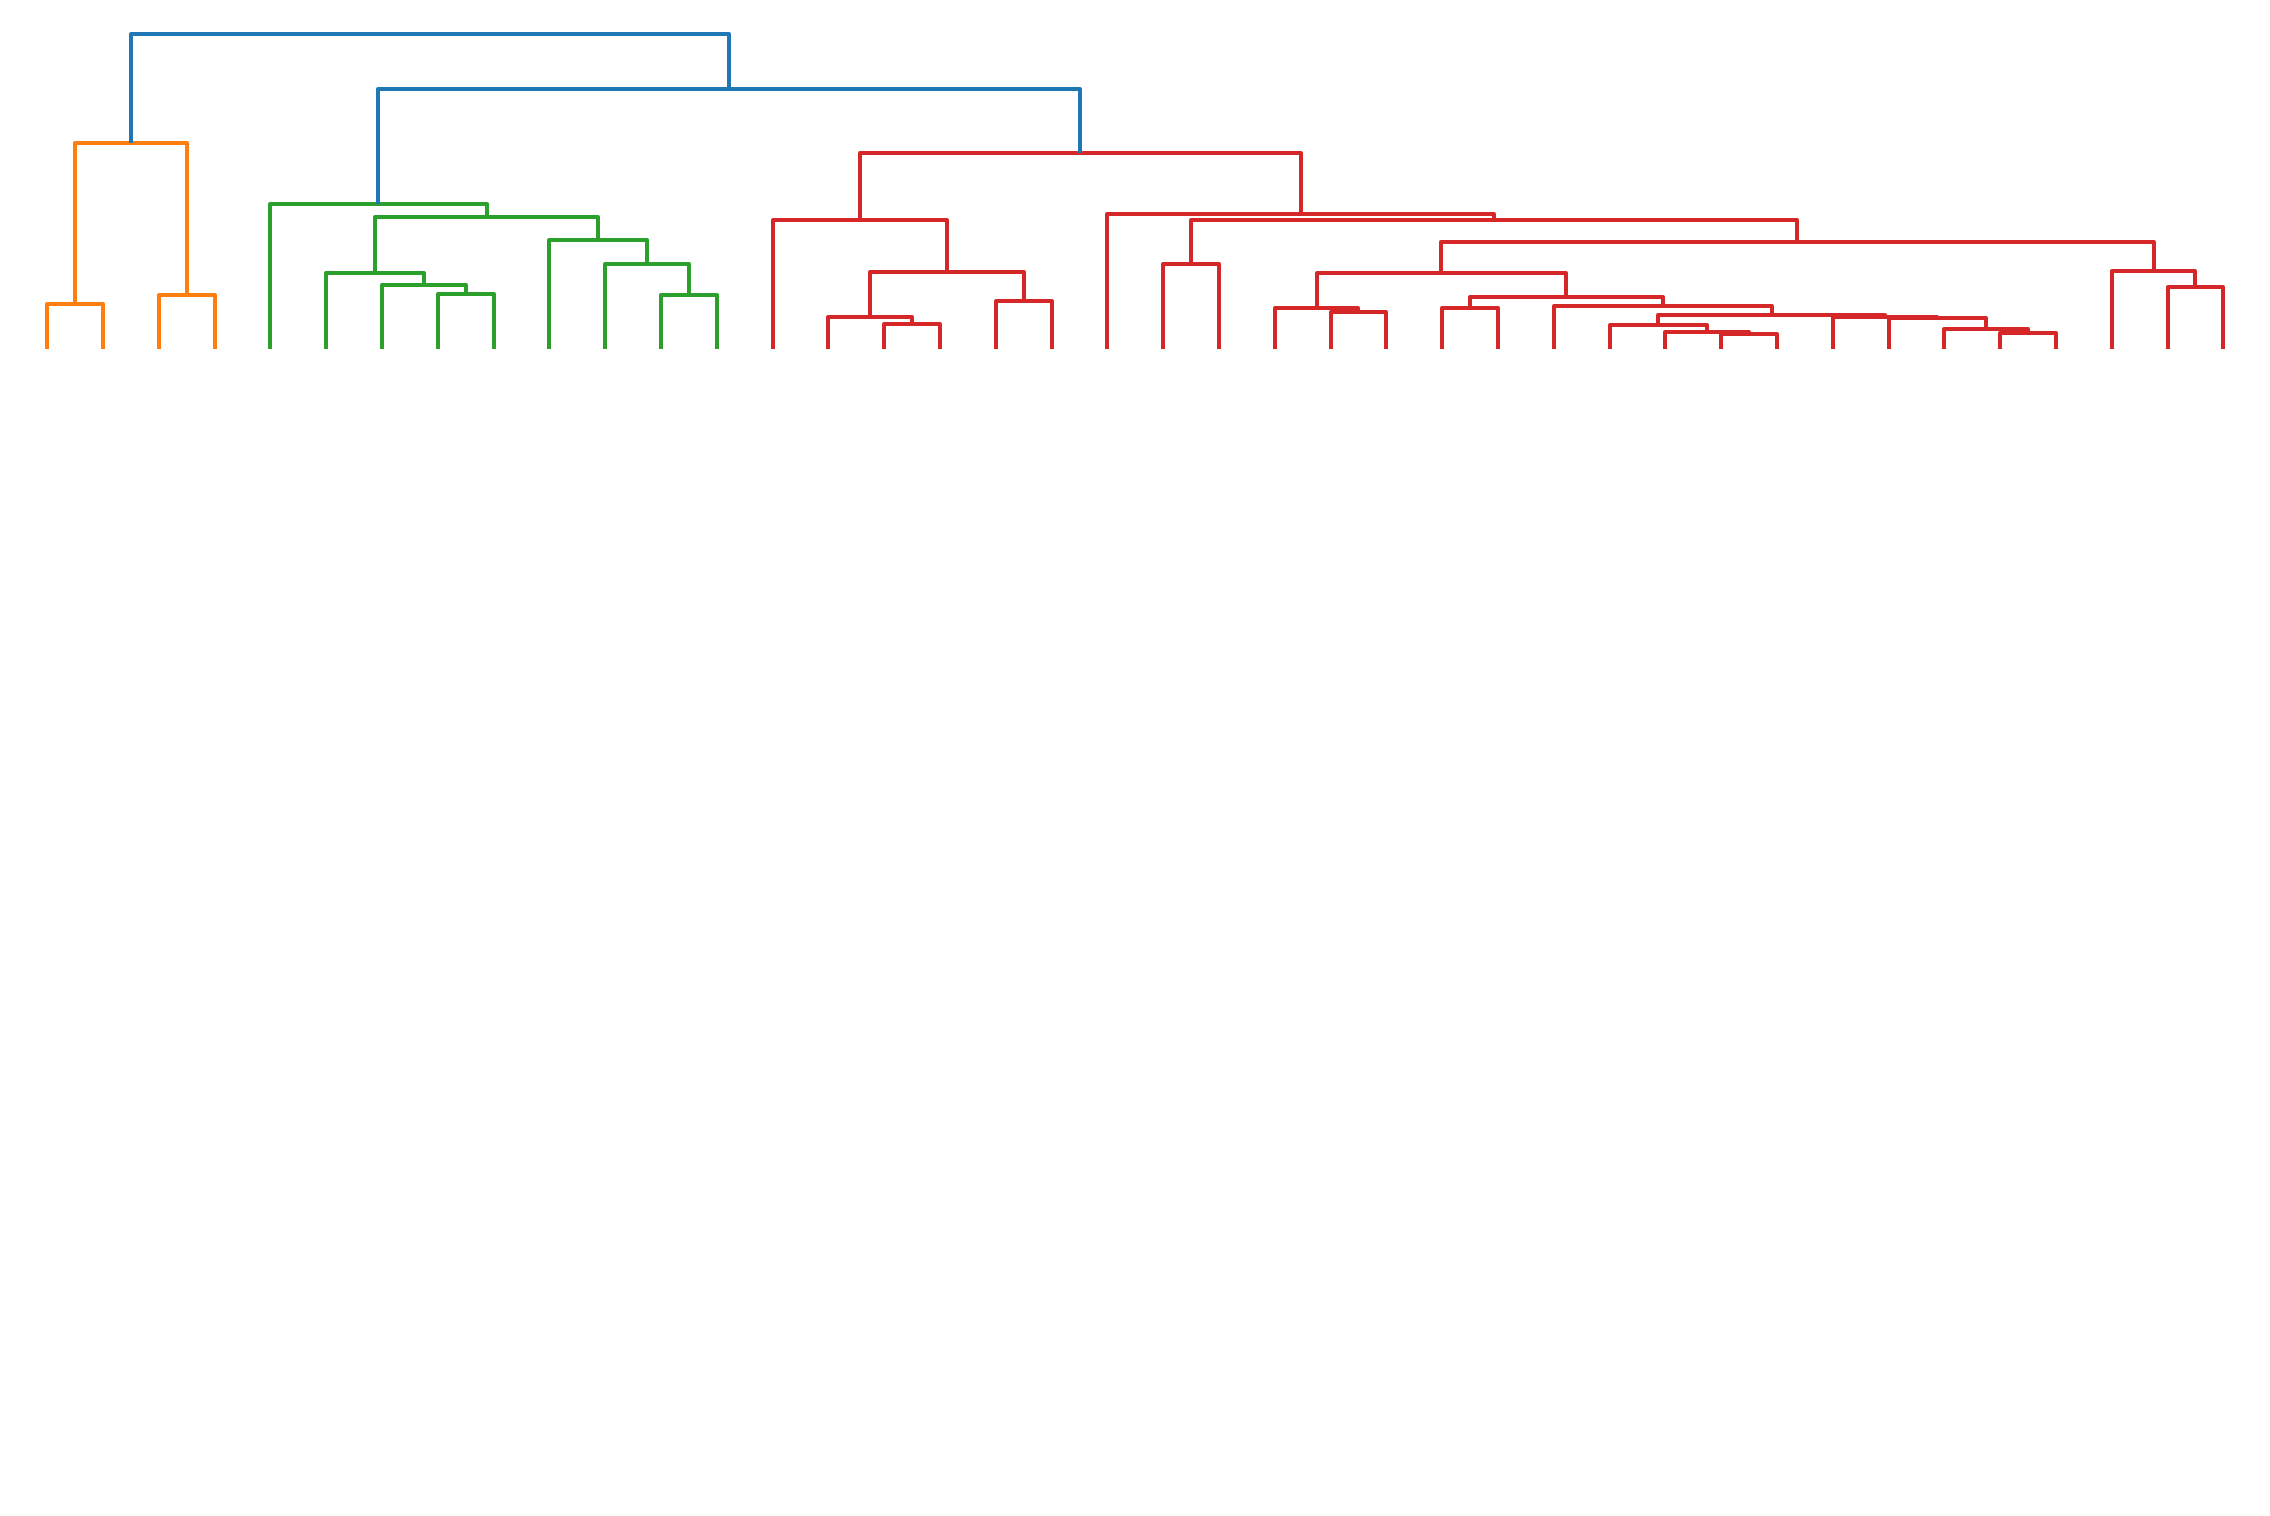

In [44]:
# hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

# hierarchical clustering
model = AgglomerativeClustering(n_clusters=None, distance_threshold=0)
model.fit(obs_mean.T)

def create_linkage_matrix(model):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)

    for i, (left_child, right_child) in enumerate(model.children_):
        count_left = 1 if left_child < n_samples else counts[left_child - n_samples]
        count_right = 1 if right_child < n_samples else counts[right_child - n_samples]
        counts[i] = count_left + count_right

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    return linkage_matrix

# linkage matrix
linkage_matrix = create_linkage_matrix(model)

# plot the dendrogram and extract the leaf order
fig, ax = plt.subplots(figsize=(15, 10))
dendro = dendrogram(linkage_matrix, show_contracted=True, ax=ax, no_labels=True)
ax.set_ylim([-25, ax.get_ylim()[1]])
ax.axis('off')

# extract the ordering
leaf_order = dendro['leaves']

# reorder the original data
mean_reordered = obs_mean.iloc[:, leaf_order]
p_reordered = p.iloc[:, leaf_order]
sig_fdr_reordered = sig_fdr.iloc[:, leaf_order]

In [129]:
# Decide if you want to save the figure
fig.savefig(os.path.join(BASE_DIR, 'Figures/Publication/Figure5/Supplementary/D2009_dseg_overlap_variogram_fdr-dendogram.png'), bbox_inches='tight')

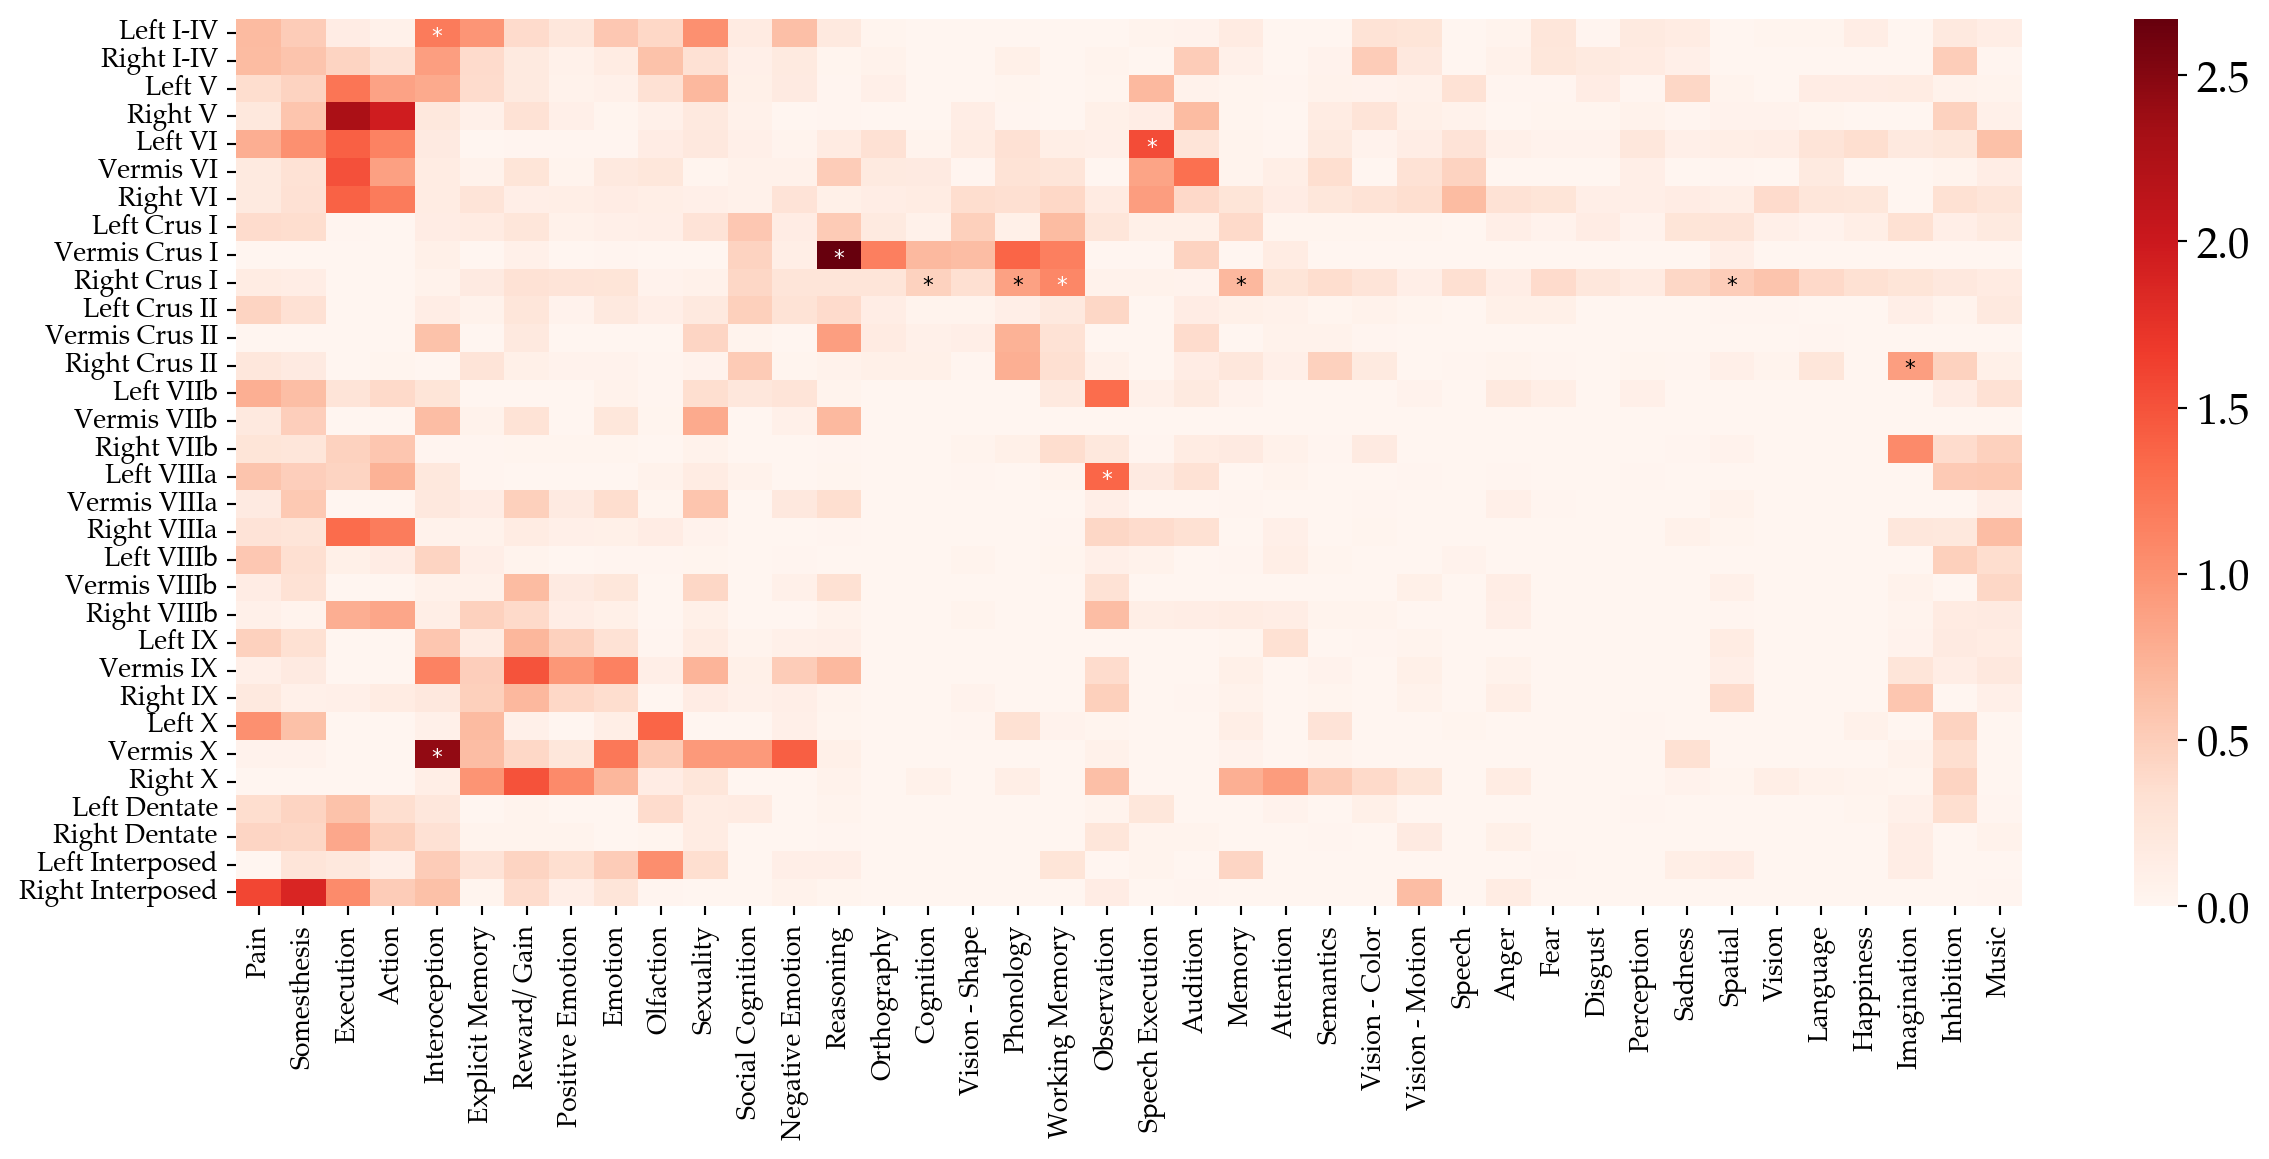

In [47]:
# plot the reordered data
fig, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(mean_reordered, cmap='Reds',linecolor='.8', ax=ax)
ax.set_xticks(np.arange(p.shape[1])+0.5)
ax.set_xticklabels(subdomain_labels.loc[mean_reordered.columns].values, rotation=90, horizontalalignment='center', fontsize=10)
ax.set_yticks(np.arange(p.shape[0])+0.5)
ax.set_yticklabels(mean_reordered.index, rotation=0, fontsize=10)
ax.set_ylabel('')

# add the * layer
for x, col in enumerate(mean_reordered.columns):
    for y, row in enumerate(mean_reordered.index):
        if sig_fdr.loc[row, col]:
            text = r'$*$'
            # Conditional color based on the value of r
            text_color = 'white' if mean_reordered.loc[row, col] > 1.0  else 'black'
            ax.text(x+0.5, y+0.6,
                    text, 
                    fontsize=8,
                    color=text_color,
                    horizontalalignment='center', 
                    verticalalignment='center')

In [131]:
# Decide if you want to save the figure
fig.savefig(os.path.join(BASE_DIR, 'Figures/Publication/Figure5/Supplementary/D2009_dseg_overlap_variogram_fdr.png'), bbox_inches='tight')

# Next, we compare C-SALE clusters to the Van Overwalle et al. (2023) behavioral cerebellar atlas

### From https://github.com/SocialCerebellum/Parcellation/tree/main/NeuroSynth%20Parcellation

In [157]:
# Load data
Overw = nibabel.load(os.path.join(INPUT_DIR, 'maps/VanOverwalle2023/Clusters_on_Z-CE-WB_Complete_(#98)_on_Z_(euclidean)_CE-Data-Rescaled-Smoothed.nii')) # We added underscores to the original naming, because python did not accept it before.

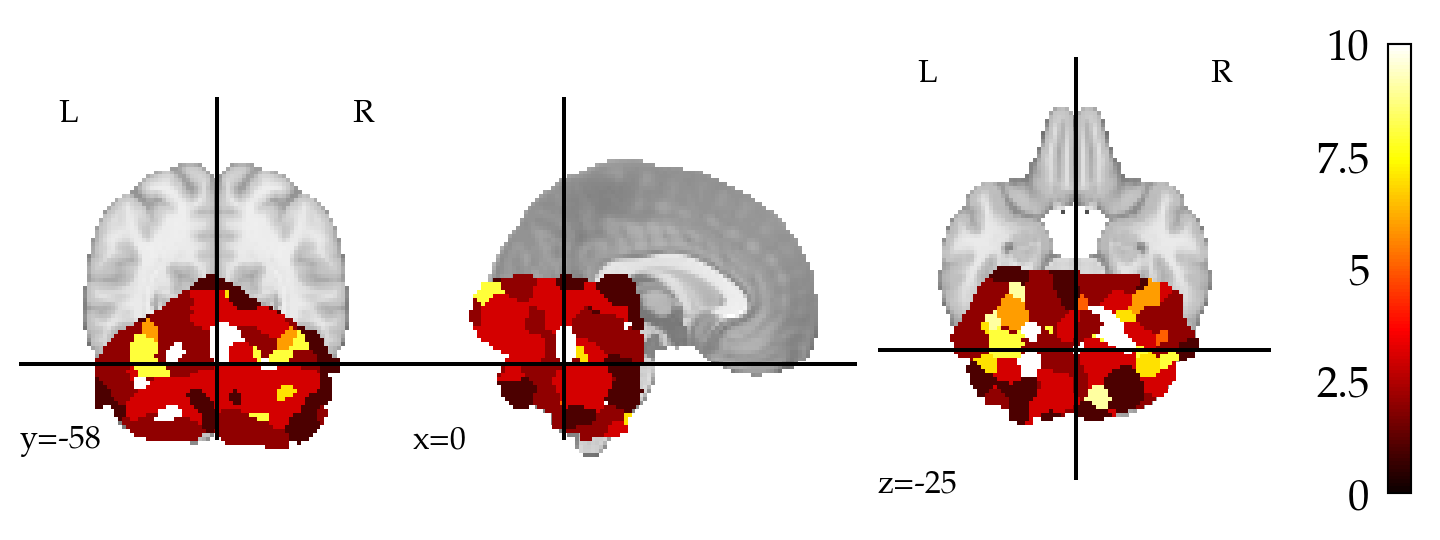

In [158]:
nilearn.plotting.plot_stat_map(Overw, threshold=0)

In [159]:
# Get the affine matrix and header
affine = Overw.affine
header = Overw.header

# Create the LPI to RPI transformation matrix
# This matrix flips the first axis (Left to Right)
transform_matrix = np.eye(4)
transform_matrix[0, 0] = -1

# Apply the transformation to the affine matrix
new_affine = np.dot(affine, transform_matrix)

# Create the new NIfTI image with the transformed affine
reoriented_img = nibabel.Nifti1Image(Overw.get_fdata(), new_affine, header)

# Save the reoriented image
output_path = os.path.join(INPUT_DIR, 'maps/VanOverwalle2023/Clusters_on_Z-CE-WB_Complete_RPI.nii')
nibabel.save(reoriented_img, output_path)

print(f"Image saved with RPI orientation at {output_path}")


Image saved with RPI orientation at /data/project/cerebellum_ale/input/maps/VanOverwalle2023/Clusters_on_Z-CE-WB_Complete_RPI.nii


In [160]:
Overw_rpi = nibabel.load(os.path.join(INPUT_DIR, 'maps/VanOverwalle2023/Clusters_on_Z-CE-WB_Complete_RPI.nii')) # We added underscores to the original naming, because python did not accept it before.

In [163]:
#Extract the data array
overw_data = Overw_rpi.get_fdata()

# Get unique labels
unique_labels = np.unique(overw_data)

# Print the unique labels and their count
print(f"Unique labels in Overw_data: {unique_labels}")
print(f"Number of unique labels: {len(unique_labels)}")

Unique labels in Overw_data: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
Number of unique labels: 11


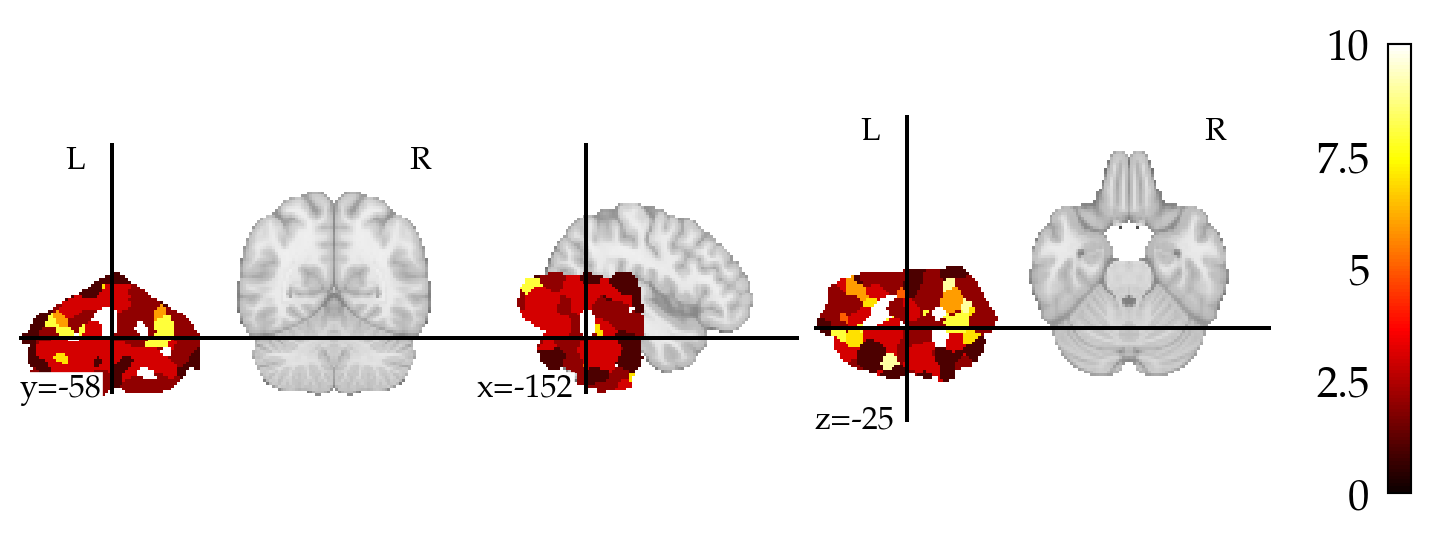

In [162]:
nilearn.plotting.plot_stat_map(Overw_rpi, threshold=0)

In [164]:
#Extract the data array
overw_data = Overw.get_fdata()

# Get unique labels
unique_labels = np.unique(overw_data)

# Print the unique labels and their count
print(f"Unique labels in overw_data: {unique_labels}")
print(f"Number of unique labels: {len(unique_labels)}")

Unique labels in overw_data: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
Number of unique labels: 11


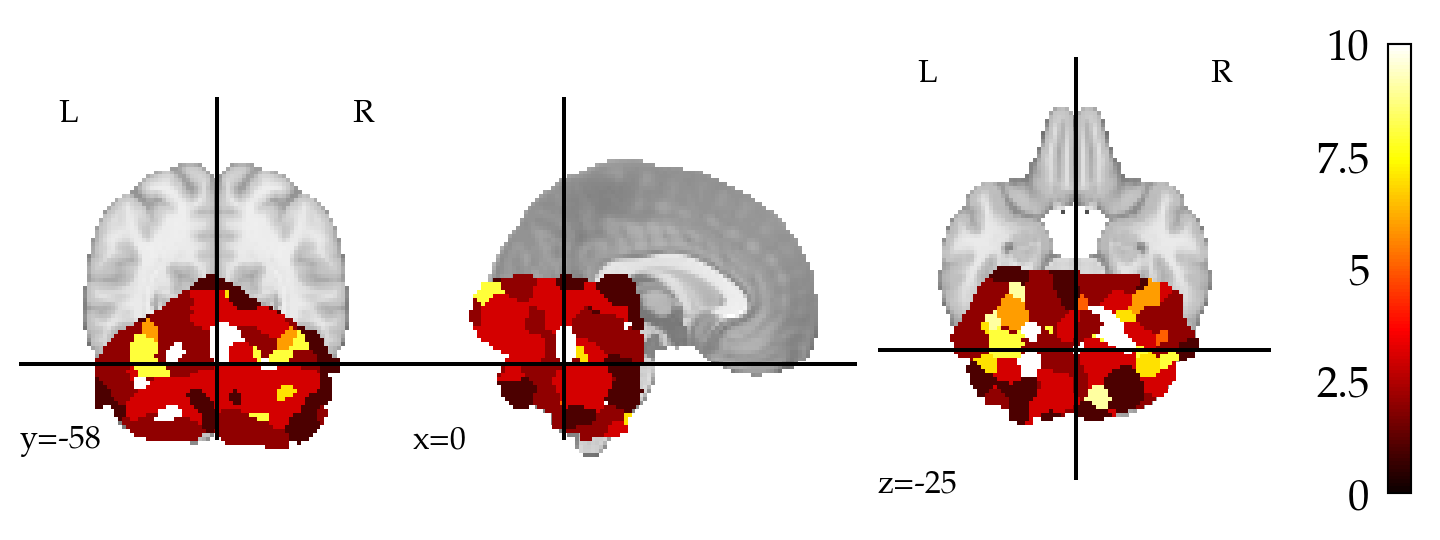

In [165]:
nilearn.plotting.plot_stat_map(Overw, threshold=0)

In [166]:
# Check the data type of the loaded atlas
print(f"Data type of Van Overwalle 2023 meta-analytic atlas before resampling: {Overw.get_fdata().dtype}")

# Load the mask image
proper_mask_2mm = nibabel.load(os.path.join(INPUT_DIR, 'maps/D2009_MNI_2mm.nii.gz'))

# Resample the atlas to the mask
Overw_mni_2mm = nilearn.image.resample_to_img(Overw, proper_mask_2mm)

# Check the data type of the resampled atlas
print(f"Data type of Van Overwalle 2023 meta-analytic atlas after resampling: {Overw_mni_2mm.get_fdata().dtype}")


Data type of Van Overwalle 2023 meta-analytic atlas before resampling: float64
Data type of Van Overwalle 2023 meta-analytic atlas after resampling: float64


In [167]:
# Convert the data back to integer if necessary! It is important to check that the labels are still the correct number.
overw_mni_2mm_data = Overw_mni_2mm.get_fdata().astype(np.int32)
Overw_mni_2mm = nibabel.Nifti1Image(overw_mni_2mm_data, Overw_mni_2mm.affine, Overw_mni_2mm.header)

In [168]:
# Check unique labels after resampling
unique_labels = np.unique(Overw_mni_2mm.get_fdata())
print(f"Unique labels in resampled Van Overwalle atlas: {unique_labels}")
print(f"Number of unique labels: {len(unique_labels)}") # Appears all labels are there!

Unique labels in resampled Van Overwalle atlas: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
Number of unique labels: 11


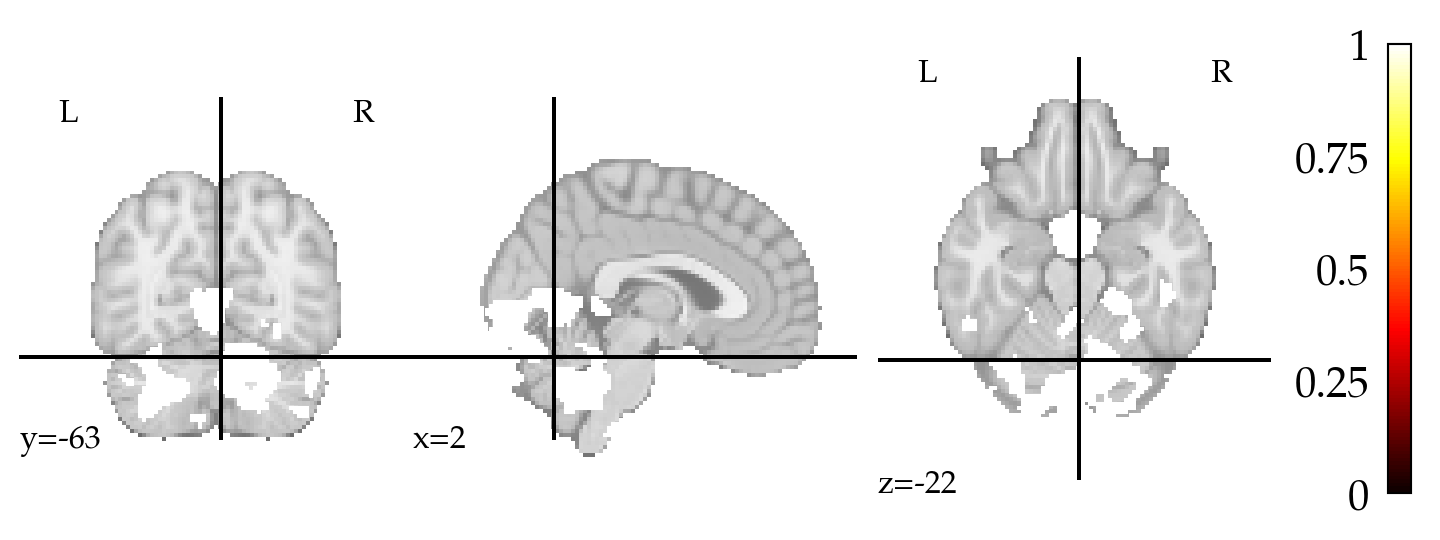

In [194]:
# Plot a single, example, parcel and check if it is within the cerebellum.
nilearn.plotting.plot_stat_map(nilearn.image.math_img('a == 3', a=Overw_mni_2mm)) # Parcels do not seem to be restricted to the cerebellum.

In [170]:
mask_data = proper_mask_2mm.get_fdata().astype('bool')
Overw_mni_2mm_masked = Overw_mni_2mm.get_fdata()[mask_data]

# Get the unique labels in the masked data
unique_labels = np.unique(Overw_mni_2mm_masked)
 
# Print the unique labels and their count
print(f"Unique labels in Overw_mni_2mm_masked: {unique_labels}")
print(f"Number of unique labels: {len(unique_labels)}")

# Check if the number of unique labels is 11 (the number in the original map).
if len(unique_labels) == 11:
    print("The data contains 11 unique labels as expected.")
else:
    print(f"Warning: The data contains {len(unique_labels)} unique labels instead of 11.") # This seems to have removed the background.

Unique labels in Overw_mni_2mm_masked: [ 0.  1.  2.  3.  5.  6.  7.  8.  9. 10.]
Number of unique labels: 10


Label 4 is missing. Perhaps that corresponds to the tiny limbic/ face expression cluster?  https://github.com/SocialCerebellum/Parcellation/blob/main/NeuroSynth%20Parcellation/Dwarfs_Figure2%20Clusters%20Flatmap%20Complete%20on%20Z%20(euclidean)%20Rescaled%20Smoothed(2)%20%2398%20blue%20ORIGINAL%20NUMBERS.png

# Run variogram-based mean test

In [171]:
obs_mean = pd.DataFrame(index=range(10)) # Corresponds to the number of parcels (+1, background)
p = pd.DataFrame(index=range(10))

surrogates_paths = sorted(glob.glob(os.path.join(OUTPUT_DIR,
    'SALE/*/*/uncorr_z_2mm_mask-D2009_MNI_surrogates-variogram_n-1000.npy')
))

for surrogates_path in tqdm(surrogates_paths):
    try:
        # Extract subbd using regex for better reliability
        subbd_match = re.search(r'SALE/(.*?)/(.*?)/', surrogates_path)
        if subbd_match:
            subbd = subbd_match.group(2)
        else:
            print(f"Failed to parse subbd from path: {surrogates_path}")
            continue

        # load z map and mask it
        z_2mm = os.path.join(os.path.dirname(surrogates_path), 'uncorr_z_2mm.nii.gz')
        z_2mm_masked = nibabel.load(z_2mm).get_fdata()[mask_data]
        # load surrogates
        surrogates = np.load(surrogates_path)

        obs_mean.loc[:, subbd] = pd.DataFrame(
            {'Overw': Overw_mni_2mm_masked,
            'z': z_2mm_masked}
        ).groupby('Overw').mean().values.flatten()

        # This makes the calculations a ton faster!
        null_mean = (
            pd.DataFrame(surrogates.T, index=Overw_mni_2mm_masked)
            .reset_index(drop=False)
            .groupby('index')
            .mean().values
        )
        
        p.loc[:, subbd] = (np.abs(null_mean) >= np.abs(obs_mean.loc[:, subbd].values[:, None])).mean(axis=1)
    except Exception as e:
        print(f"Error processing {surrogates_path}: {e}")  

# Display the resulting DataFrames
print(obs_mean)
print(p)

# Check if both dataframes are 10 x 40. Note that row numbers correspond to the number of unique parcel labels (and hence skip 4 to end up 0-9 = 10 labels).

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:07<00:00,  5.35it/s]


   Action.Execution.Speech  Action.Execution  Action.Imagination  \
0             7.492698e-02      4.949113e-02        2.009558e-02   
1             4.654621e-02      3.044916e-02        2.745284e-01   
2             3.338882e-01      6.241142e-01        1.740225e-01   
3             3.314306e-01      4.775085e-01        2.538685e-01   
4             1.691804e-22      2.068017e-22        6.580347e-18   
5             7.022488e-22      6.749458e-04        1.101652e-19   
6             1.352194e-02      8.505804e-02        5.443515e-01   
7             3.084248e-01      9.590856e-01        4.439206e-01   
8             1.744960e-02      2.113838e-01        6.099261e-01   
9             5.175028e-01      1.704804e+00        9.794370e-02   

   Action.Inhibition  Action.Observation        Action  Cognition.Attention  \
0       1.308704e-21            0.622470  1.498780e-01             0.003086   
1       1.338470e-01            0.179229  3.860071e-02             0.075416   
2       2.2394

# Label and plot hierarchically

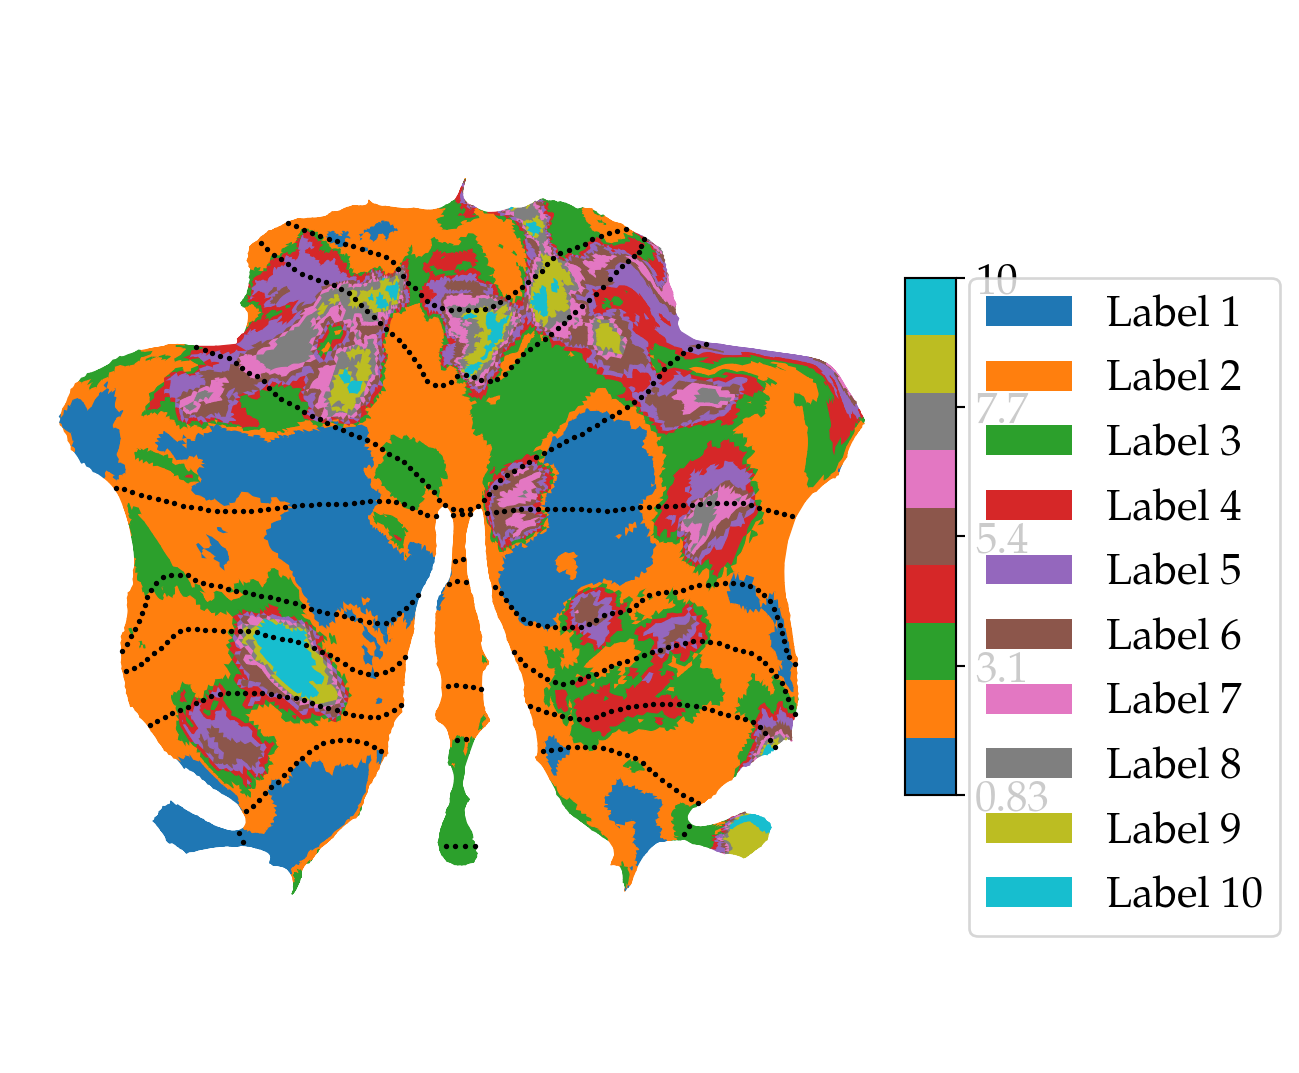

In [172]:
# Let's verify what the labels actually are. There appears to not be any documentation on this.
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap
import SUITPy

# Define your labels corresponding to each color
labels = [
    'Label 1', 'Label 2', 'Label 3', 'Label 4', 'Label 5',
    'Label 6', 'Label 7', 'Label 8', 'Label 9', 'Label 10'
]

# Get the first 10 colors from the 'tab10' colormap
tab10_colors = plt.cm.get_cmap('tab10', 10)
tab10_colors_list = tab10_colors.colors[:10]

# Create a custom colormap
custom_cmap = ListedColormap(tab10_colors_list)

# Resample the image to the SUIT space and convert to flatmap surface
suit_space_surf = SUITPy.flatmap.vol_to_surf(Overw_mni_2mm, space='SUIT')

# Plot the surface map onto the flatmap
SUITPy.flatmap.plot(suit_space_surf, cmap=custom_cmap, colorbar=True)

# Create a custom legend
legend_patches = [Patch(facecolor=tab10_colors_list[i], label=labels[i]) for i in range(10)]
plt.legend(handles=legend_patches, bbox_to_anchor=(1.25, 1), loc='upper left', borderaxespad=0.)

# Show the plot
plt.show()


In [173]:
## NOTE THAT THESE ARE AUTHOR INFERRED AND MAY WELL BE WRONG ## 

Overw_labels = pd.Series({
    '0': 'Background',
    '1': 'Mentalizing',
    '2': 'Divided Attention',
    '3': 'Executive',
    '4': 'Limbic/ Emotion', # Limbic Faces is skipped?
    '5': 'Objects',
    '6': 'Encoding',
    '7': 'Directed Attention',
    '8': 'Language',
    '9': 'Sensorimotor'
})


In [174]:
import statsmodels.stats.multitest
# FDR correction
sig_fdr, _ = statsmodels.stats.multitest.fdrcorrection(p.values.flatten())
# reshape 
sig_fdr = pd.DataFrame(sig_fdr.reshape(p.shape), index=p.index, columns=p.columns)

In [175]:
# load and label
obs_mean.index = Overw_labels
p.index = Overw_labels
sig_fdr.index = Overw_labels
# drop null
#obs_mean = obs_mean.drop(index='Background')
#p = p.drop(index='Background')
# sig_fdr = sig_fdr.drop(index='Background')
print(sig_fdr)

                    Action.Execution.Speech  Action.Execution  \
Background                            False             False   
Mentalizing                           False             False   
Divided Attention                     False             False   
Executive                             False             False   
Limbic/ Emotion                       False             False   
Objects                               False             False   
Encoding                              False             False   
Directed Attention                    False             False   
Language                              False             False   
Sensorimotor                          False              True   

                    Action.Imagination  Action.Inhibition  Action.Observation  \
Background                       False              False               False   
Mentalizing                      False              False               False   
Divided Attention                False   

In [176]:
obs_mean.to_csv(os.path.join(BASE_DIR, 'Figures/Publication/Figure5/Supplementary/VanOverwalle2023_mean_inferred-labels.csv'))
p.to_csv(os.path.join(BASE_DIR, 'Figures/Publication/Figure5/Supplementary/VanOverwalle2023_p_inferred-labels.csv'))

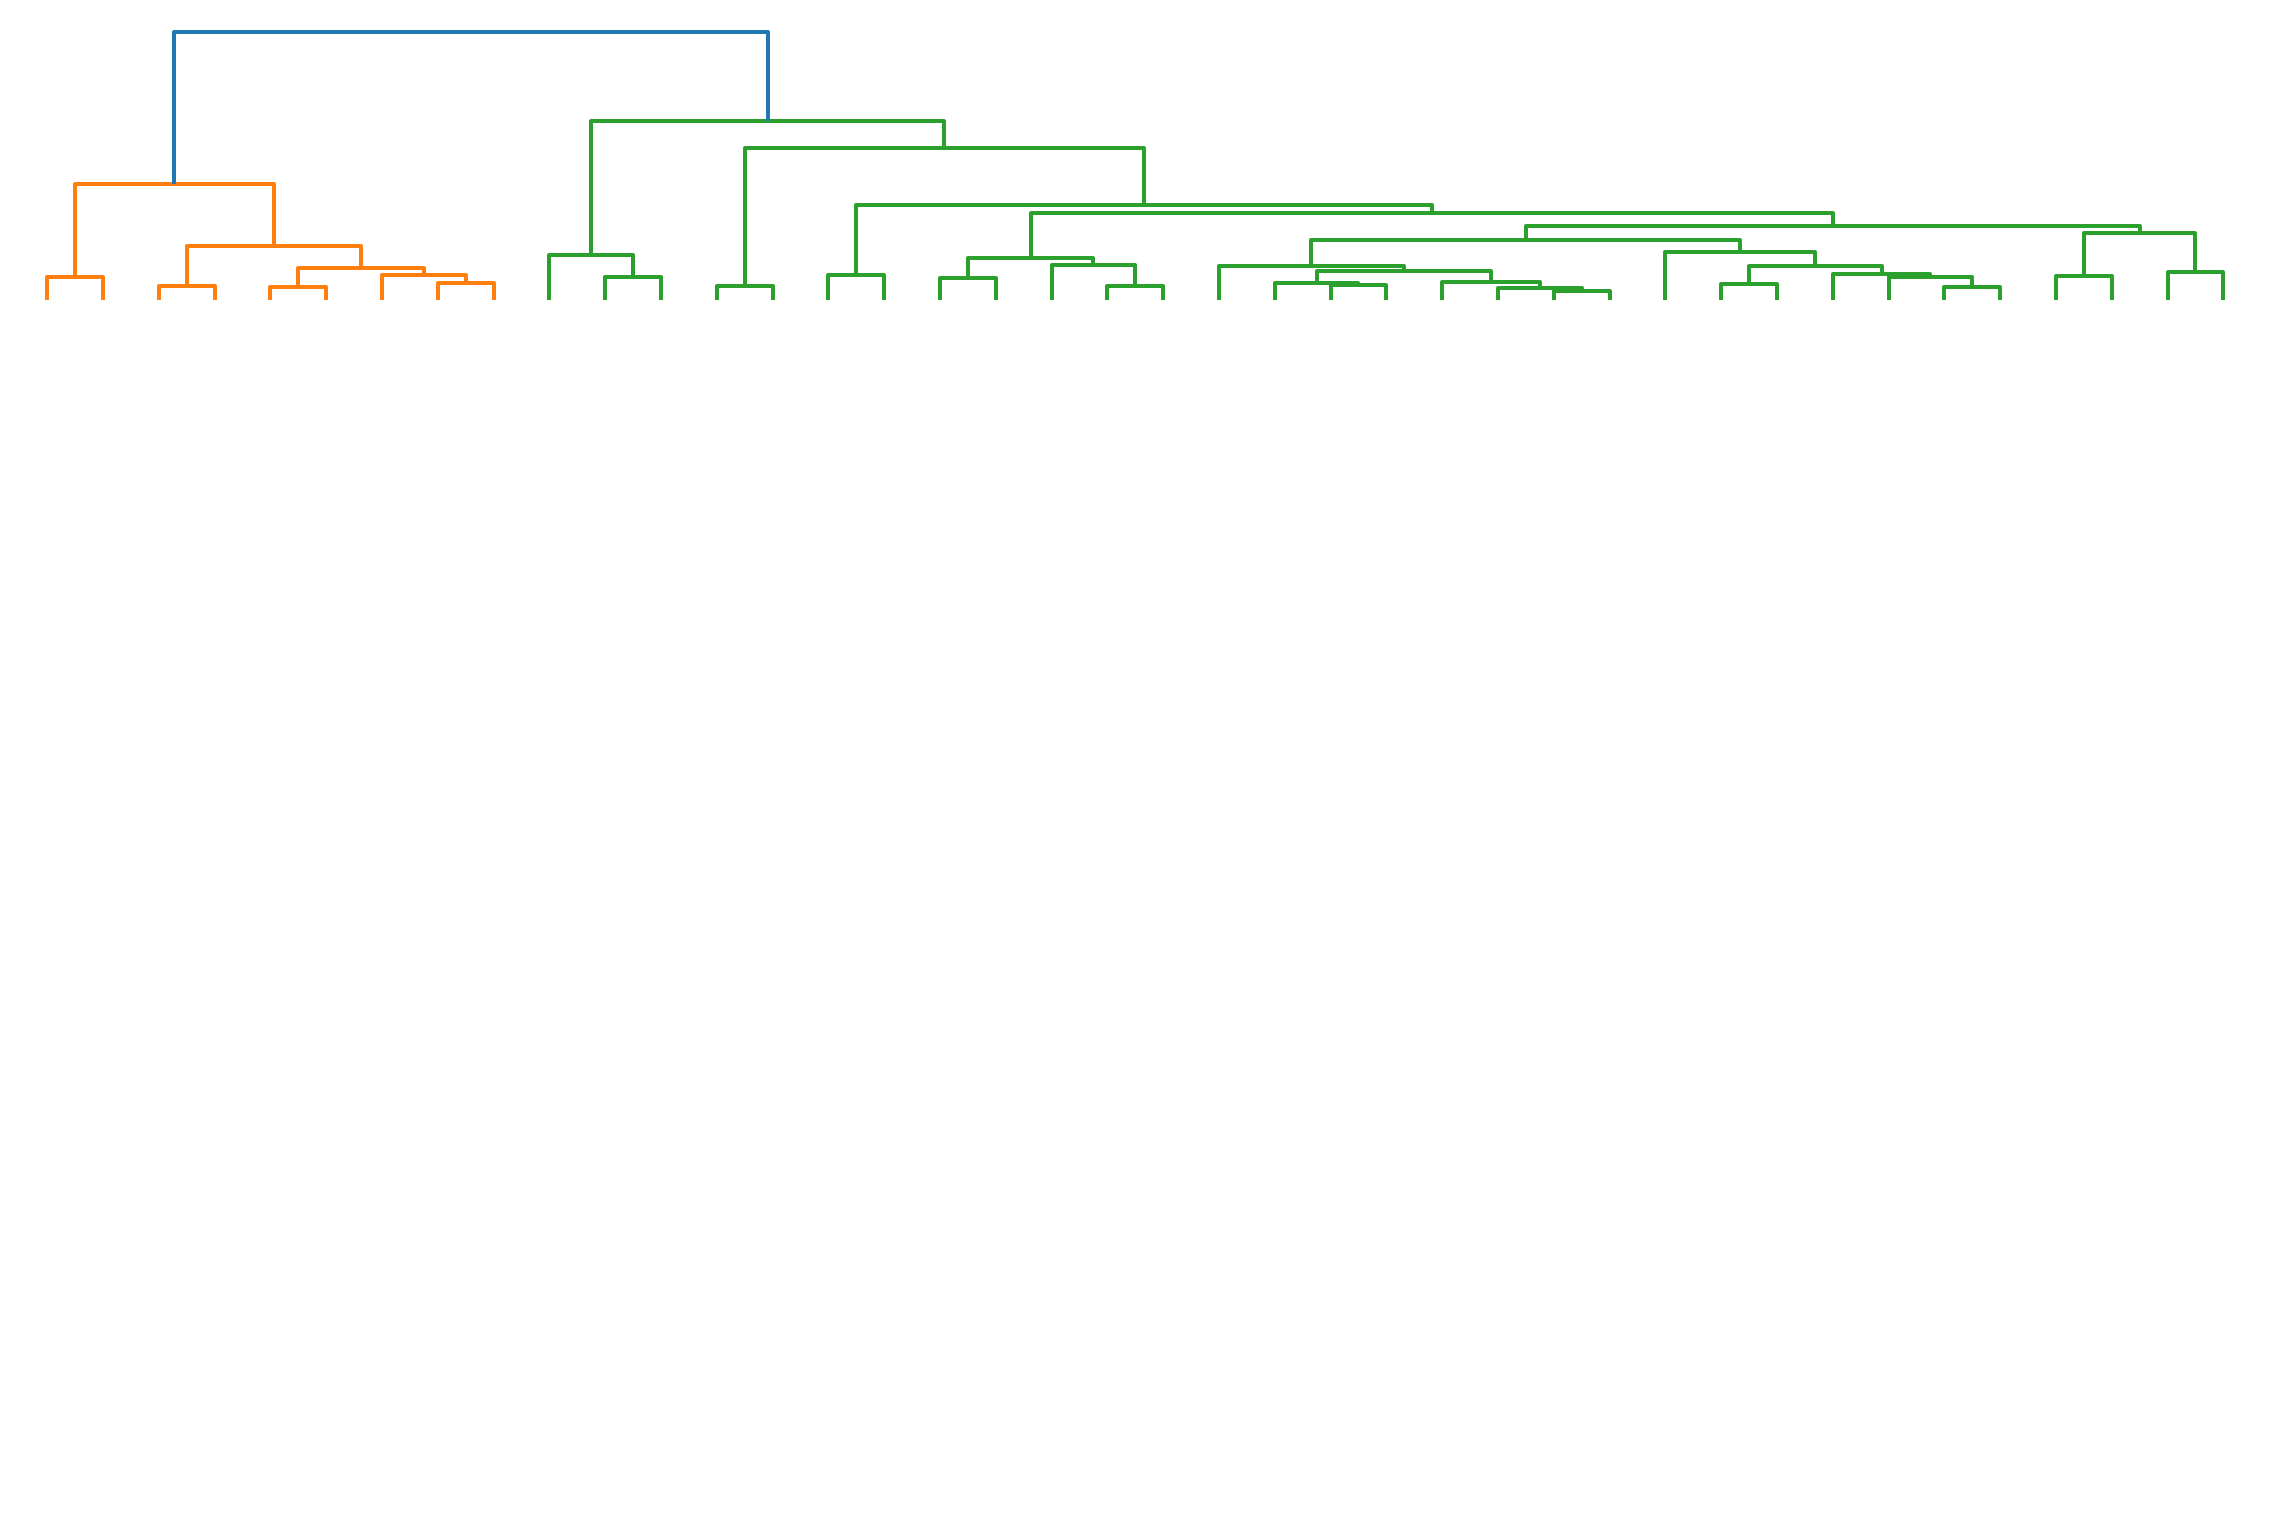

In [177]:
# hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

# hierarchical clustering
model = AgglomerativeClustering(n_clusters=None, distance_threshold=0)
model.fit(obs_mean.T)

def create_linkage_matrix(model):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)

    for i, (left_child, right_child) in enumerate(model.children_):
        count_left = 1 if left_child < n_samples else counts[left_child - n_samples]
        count_right = 1 if right_child < n_samples else counts[right_child - n_samples]
        counts[i] = count_left + count_right

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    return linkage_matrix

# linkage matrix
linkage_matrix = create_linkage_matrix(model)

# plot the dendrogram and extract the leaf order
fig, ax = plt.subplots(figsize=(15, 10))
dendro = dendrogram(linkage_matrix, show_contracted=True, ax=ax, no_labels=True)
ax.set_ylim([-25, ax.get_ylim()[1]])
ax.axis('off')

# extract the ordering
leaf_order = dendro['leaves']

# reorder the original data
mean_reordered = obs_mean.iloc[:, leaf_order]
p_reordered = p.iloc[:, leaf_order]
sig_fdr_reordered = sig_fdr.iloc[:, leaf_order]


# Decide if you want to save the figure
fig.savefig(os.path.join(BASE_DIR, 'Figures/Publication/Figure5/Supplementary/VanOverwalle2023_overlap_variogram_fdr-dendogram.png'), bbox_inches='tight')

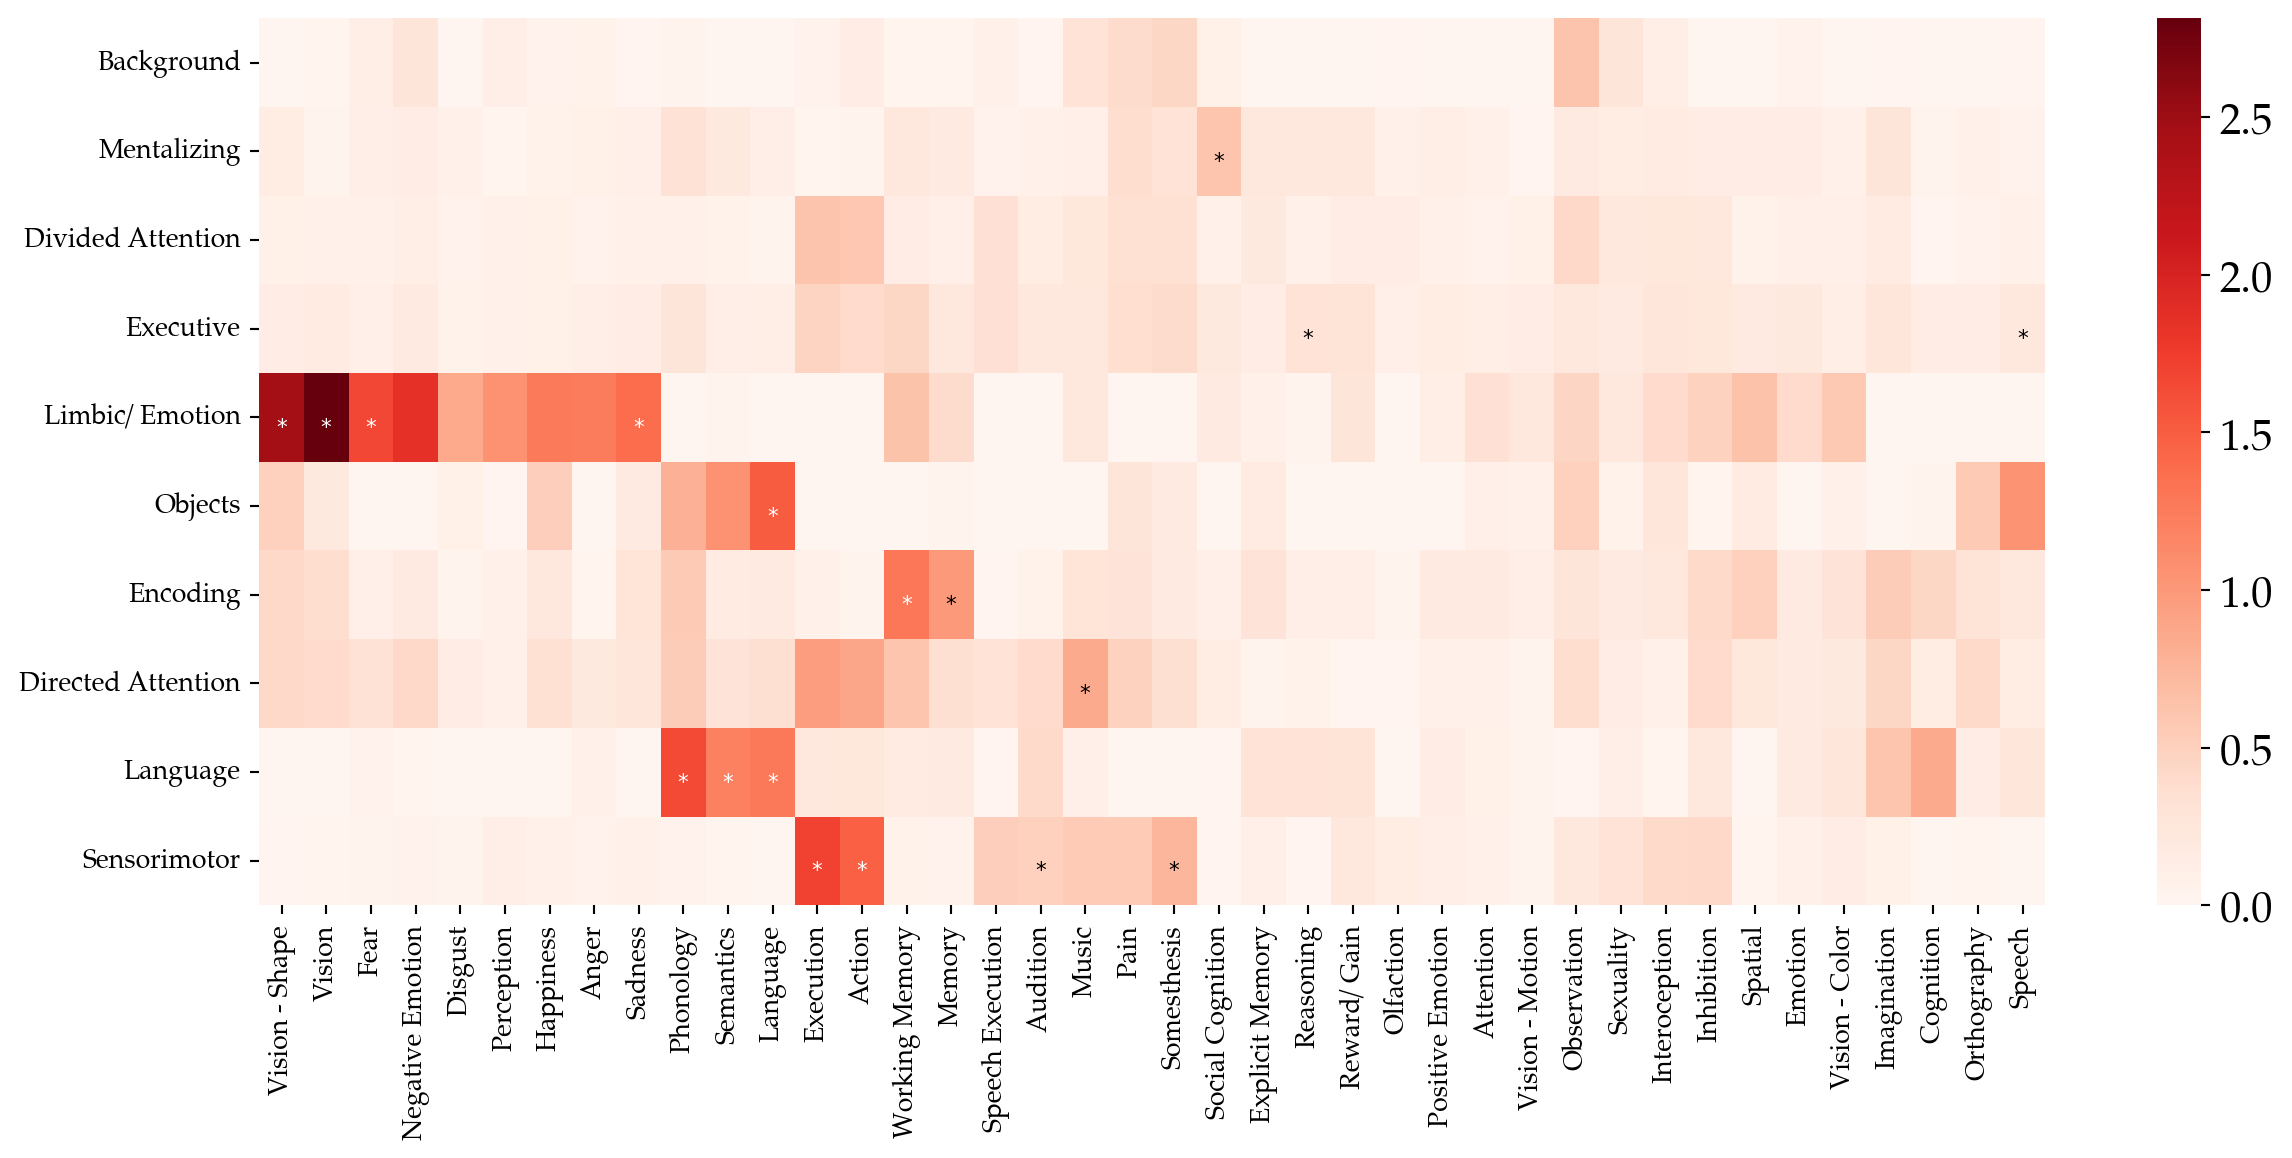

In [179]:
# plot the reordered data
fig, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(mean_reordered, cmap='Reds',linecolor='.8', ax=ax)
ax.set_xticks(np.arange(p.shape[1])+0.5)
ax.set_xticklabels(subdomain_labels.loc[mean_reordered.columns].values, rotation=90, horizontalalignment='center', fontsize=10)
ax.set_yticks(np.arange(p.shape[0])+0.5)
ax.set_yticklabels(mean_reordered.index, rotation=0, fontsize=10)
ax.set_ylabel('')

# add the * layer
for x, col in enumerate(mean_reordered.columns):
    for y, row in enumerate(mean_reordered.index):
        if sig_fdr.loc[row, col]:
            text = r'$*$'
            # Conditional color based on the value of r
            text_color = 'white' if mean_reordered.loc[row, col] > 1.0  else 'black'
            ax.text(x+0.5, y+0.6,
                    text, 
                    fontsize=8,
                    color=text_color,
                    horizontalalignment='center', 
                    verticalalignment='center')

# Decide if you want to save the figure
fig.savefig(os.path.join(BASE_DIR, 'Figures/Publication/Figure5/Supplementary/VanOverwalle2023_overlap_variogram_inferred-labels.png'), bbox_inches='tight')

In [180]:
Overw_labels_regions = pd.Series({
    '0': 'Background',
    '1': 'Region 1',
    '2': 'Region 2',
    '3': 'Region 3',
    '4': 'Region 5', # Since the 4th label was missing in the original map, we skip the Region 4 name as well. I think this increases our chance of being correct.
    '5': 'Region 6',
    '6': 'Region 7',
    '7': 'Region 8',
    '8': 'Region 9',
    '9': 'Region 10'
})

In [181]:
# label
obs_mean.index = Overw_labels_regions
p.index = Overw_labels_regions
sig_fdr.index = Overw_labels_regions

In [182]:
obs_mean.to_csv(os.path.join(BASE_DIR, 'Figures/Publication/Figure5/Supplementary/VanOverwalle2023_mean.csv'))
p.to_csv(os.path.join(BASE_DIR, 'Figures/Publication/Figure5/Supplementary/VanOverwalle2023_p.csv'))

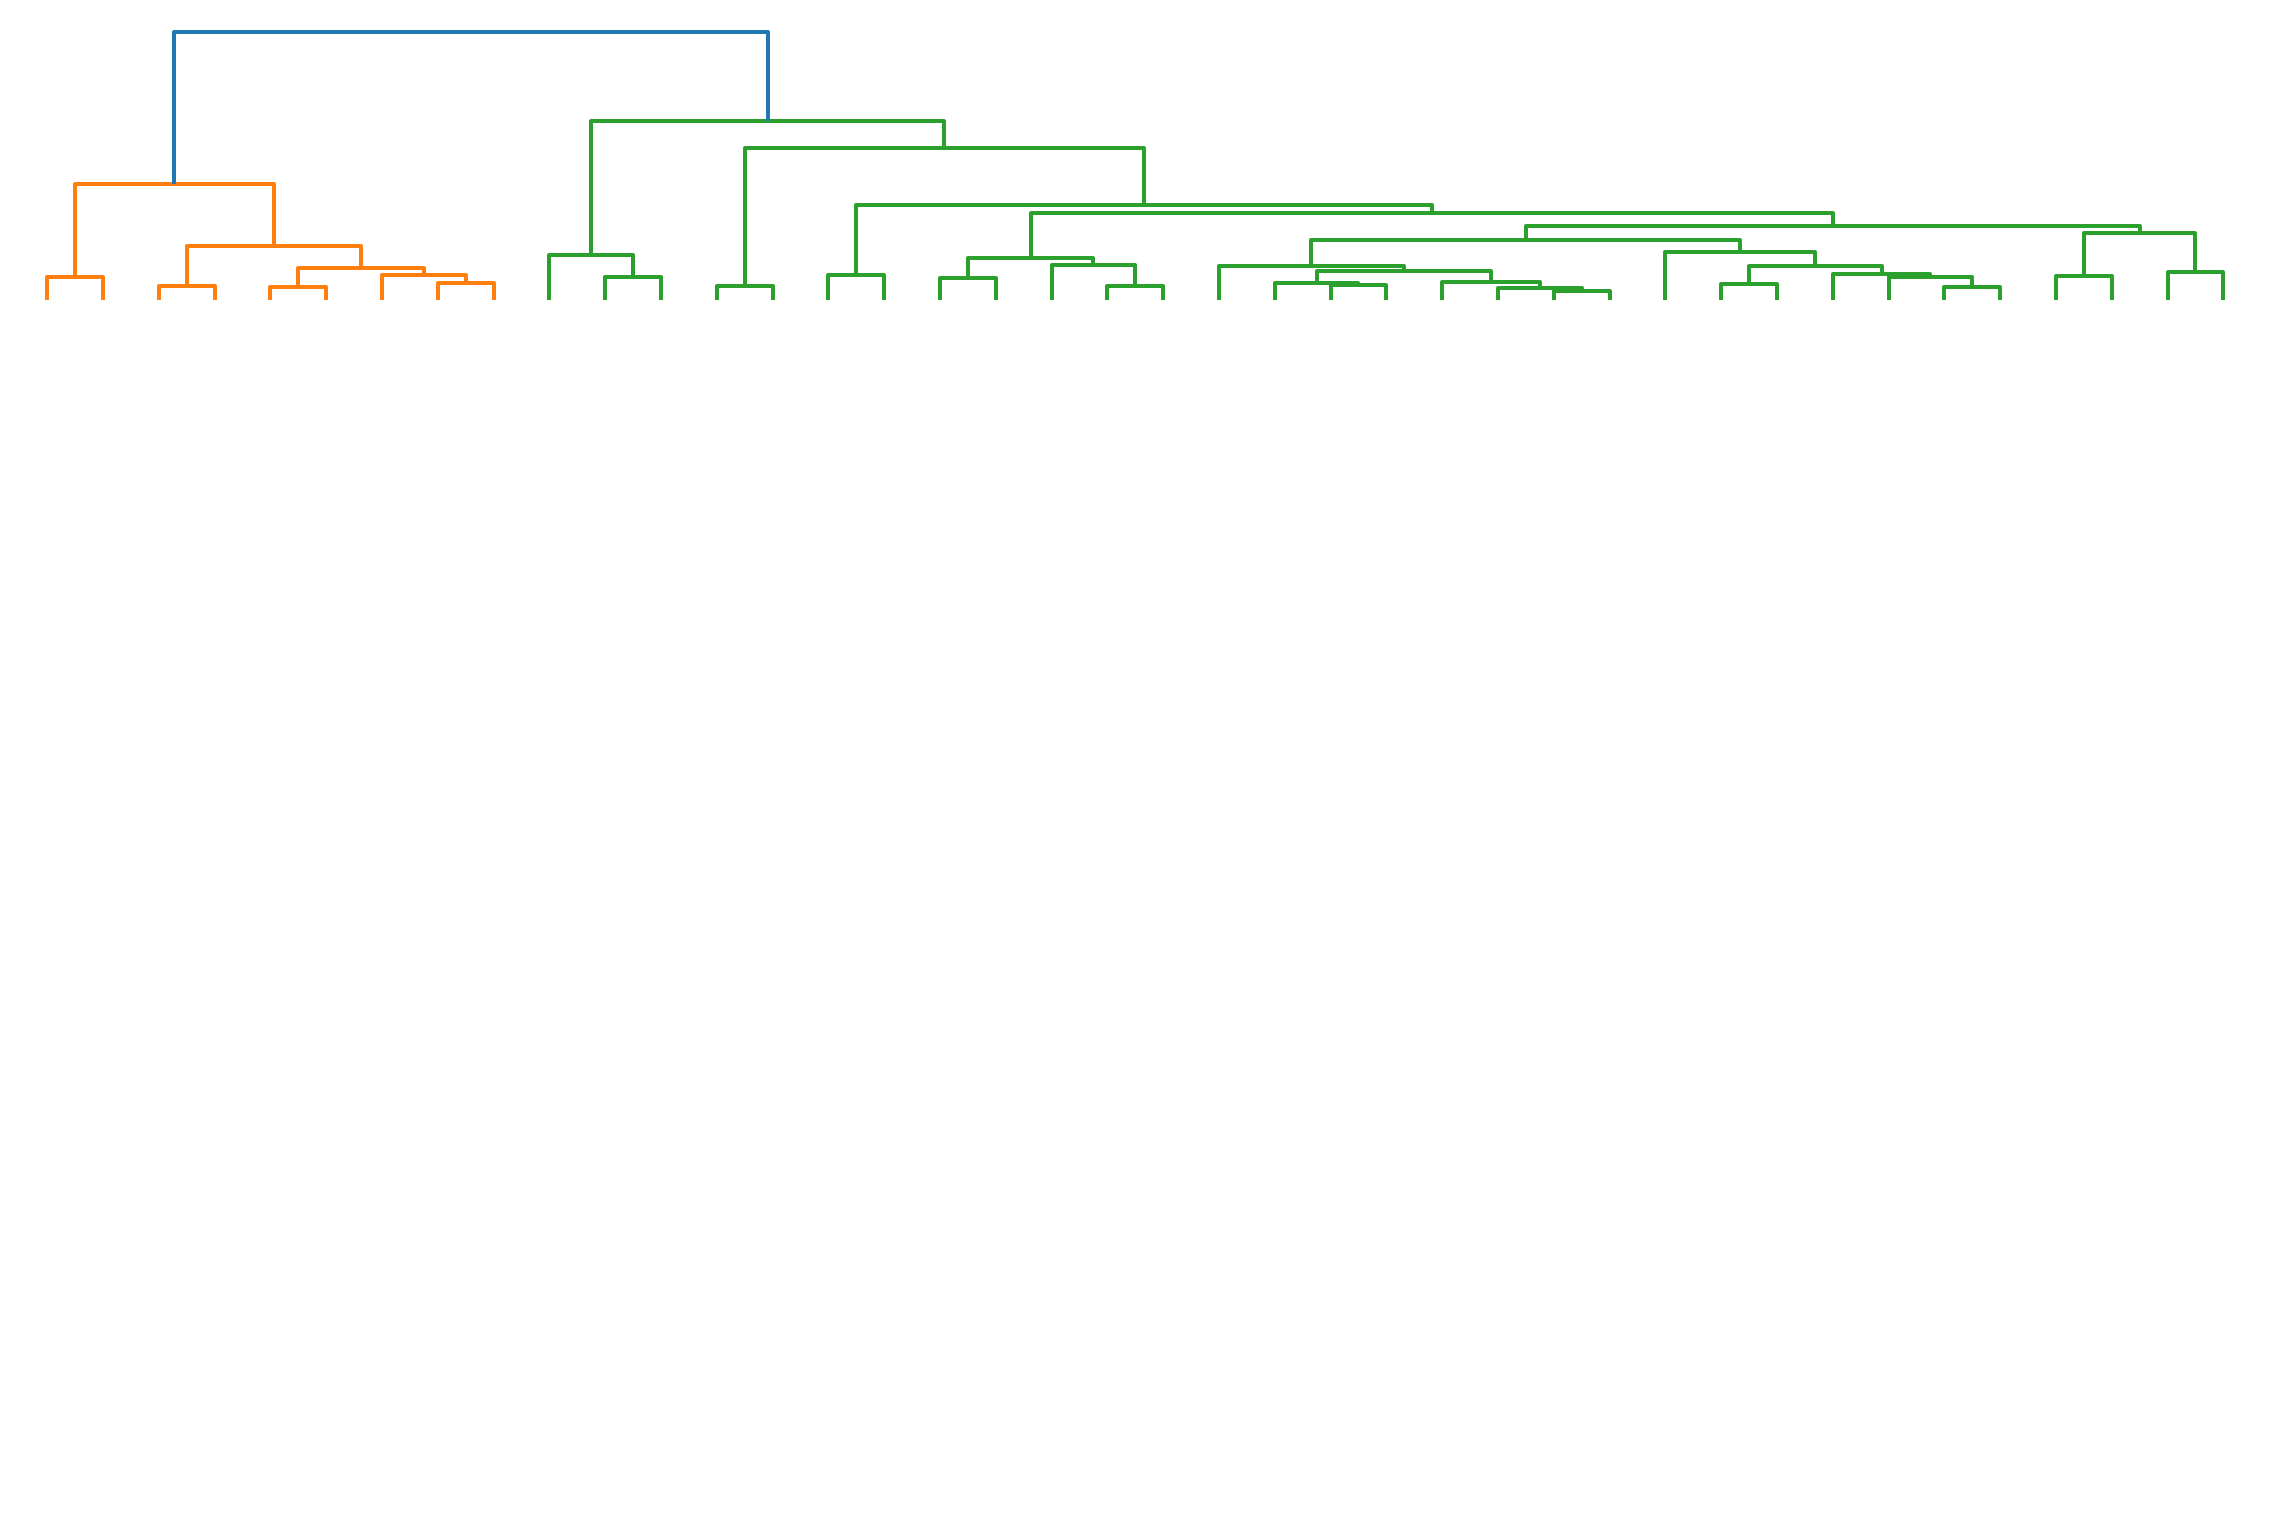

In [183]:
# hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

# hierarchical clustering
model = AgglomerativeClustering(n_clusters=None, distance_threshold=0)
model.fit(obs_mean.T)

def create_linkage_matrix(model):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)

    for i, (left_child, right_child) in enumerate(model.children_):
        count_left = 1 if left_child < n_samples else counts[left_child - n_samples]
        count_right = 1 if right_child < n_samples else counts[right_child - n_samples]
        counts[i] = count_left + count_right

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    return linkage_matrix

# linkage matrix
linkage_matrix = create_linkage_matrix(model)

# plot the dendrogram and extract the leaf order
fig, ax = plt.subplots(figsize=(15, 10))
dendro = dendrogram(linkage_matrix, show_contracted=True, ax=ax, no_labels=True)
ax.set_ylim([-25, ax.get_ylim()[1]])
ax.axis('off')

# extract the ordering
leaf_order = dendro['leaves']

# reorder the original data
mean_reordered = obs_mean.iloc[:, leaf_order]
p_reordered = p.iloc[:, leaf_order]
sig_fdr_reordered = sig_fdr.iloc[:, leaf_order]

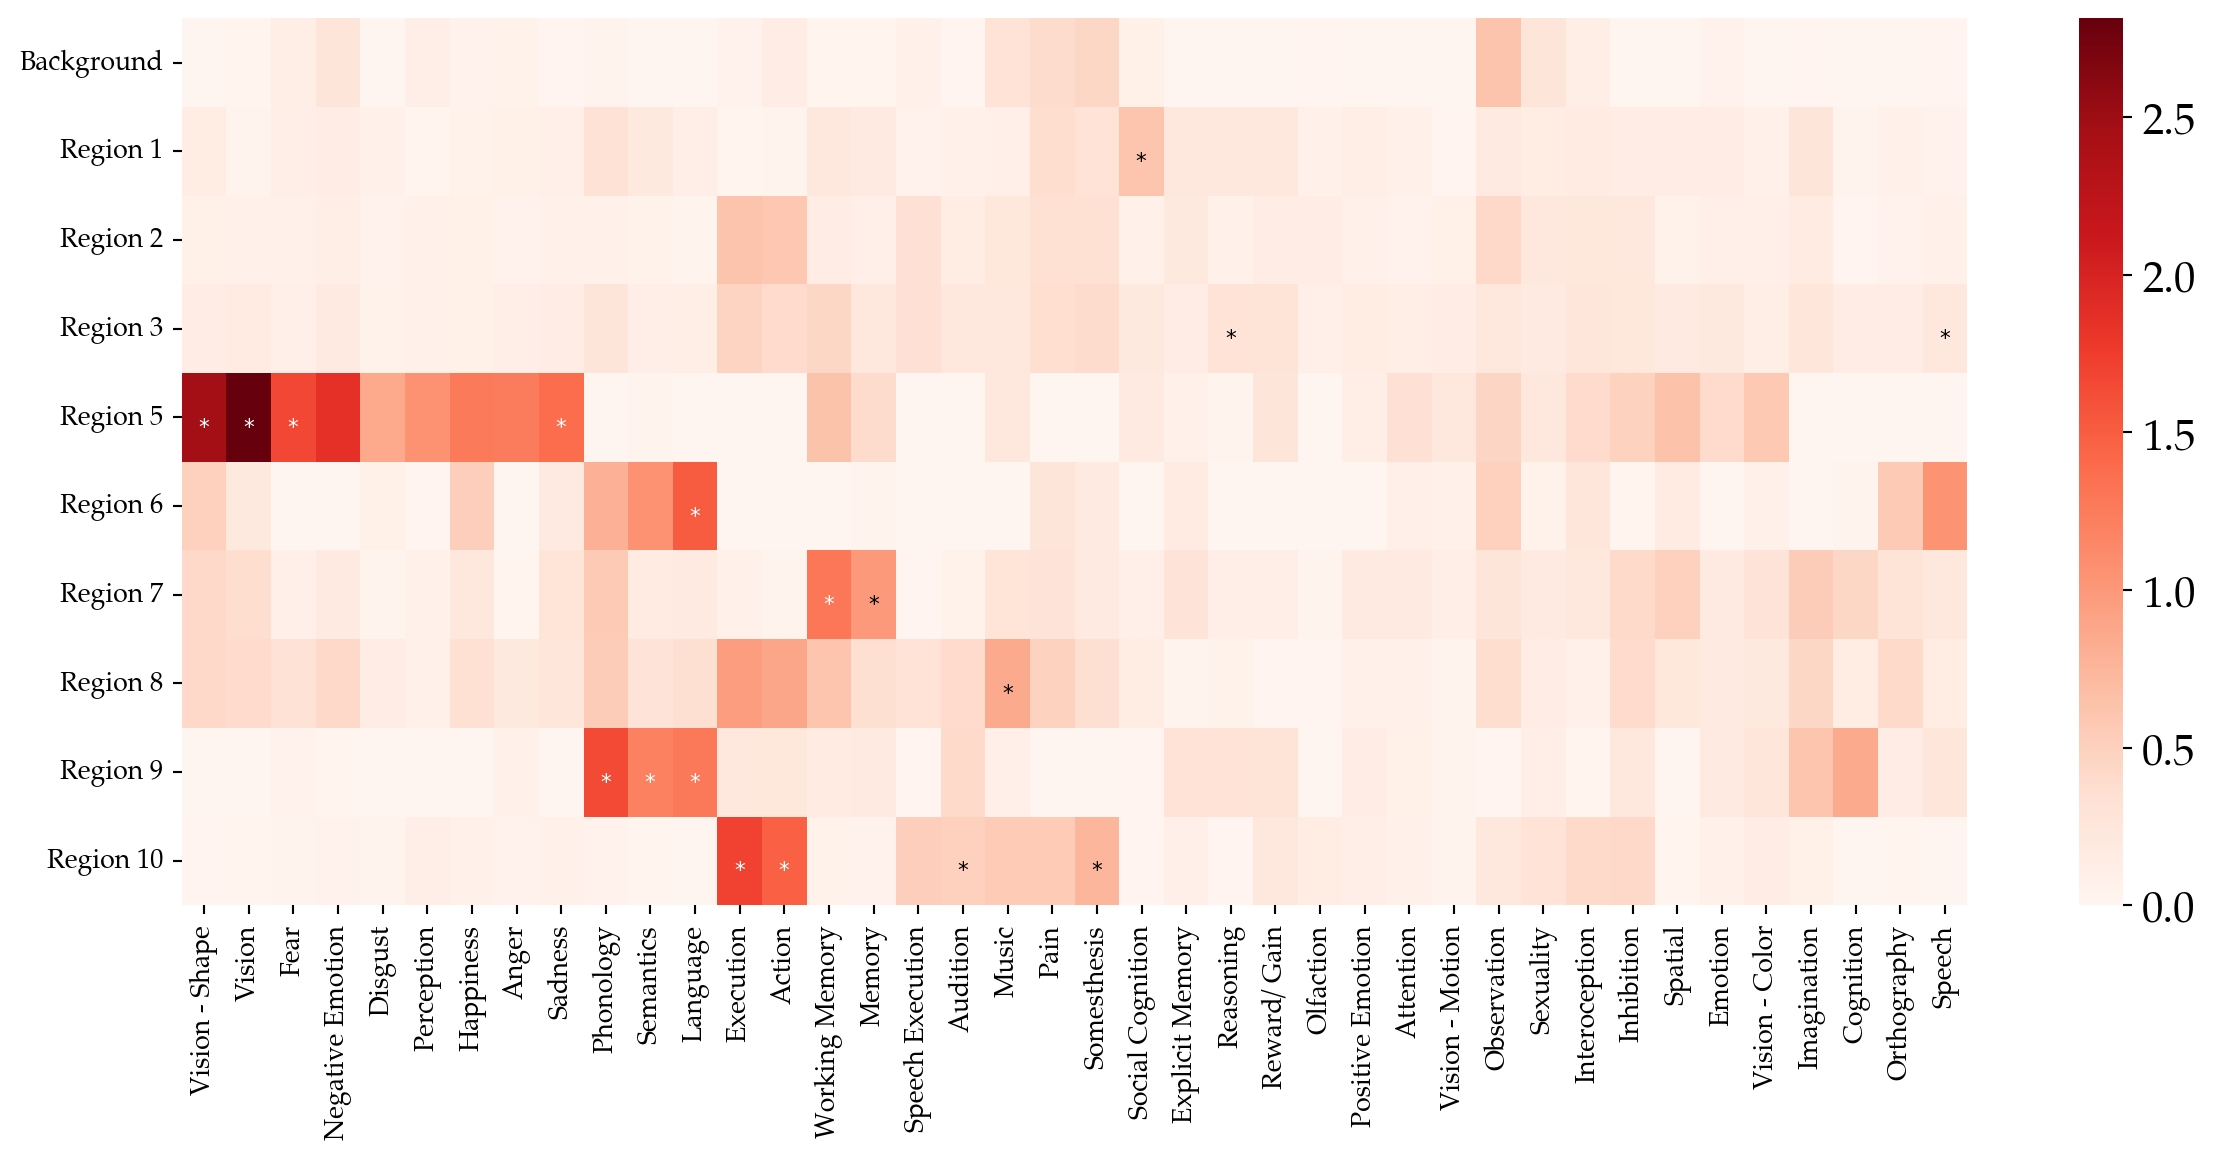

In [184]:
# plot the reordered data
fig, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(mean_reordered, cmap='Reds',linecolor='.8', ax=ax)
ax.set_xticks(np.arange(p.shape[1])+0.5)
ax.set_xticklabels(subdomain_labels.loc[mean_reordered.columns].values, rotation=90, horizontalalignment='center', fontsize=10)
ax.set_yticks(np.arange(p.shape[0])+0.5)
ax.set_yticklabels(mean_reordered.index, rotation=0, fontsize=10)
ax.set_ylabel('')

# add the * layer
for x, col in enumerate(mean_reordered.columns):
    for y, row in enumerate(mean_reordered.index):
        if sig_fdr.loc[row, col]:
            text = r'$*$'
            # Conditional color based on the value of r
            text_color = 'white' if mean_reordered.loc[row, col] > 1.0  else 'black'
            ax.text(x+0.5, y+0.6,
                    text, 
                    fontsize=8,
                    color=text_color,
                    horizontalalignment='center', 
                    verticalalignment='center')

# Decide if you want to save the figure
fig.savefig(os.path.join(BASE_DIR, 'Figures/Publication/Figure5/Supplementary/VanOverwalle2023_overlap_variogram.png'), bbox_inches='tight')

# Let's also asess correspondence with the recalculated MDTB (King et al. 2019) atlas reported in Van Overwalle et al. 2023. 
### From: https://github.com/SocialCerebellum/Parcellation/tree/main/MDTB%20ReParcellation

In [185]:
# Load data
Overw_mdtb = nibabel.load(os.path.join(INPUT_DIR, 'maps/VanOverwalle2023/Clusters_on_Set_Ward_61_on_MDTB-(euclidean)-Rescaled-Smoothed.nii')) # We added underscores to the original naming, because python did not accept it before.

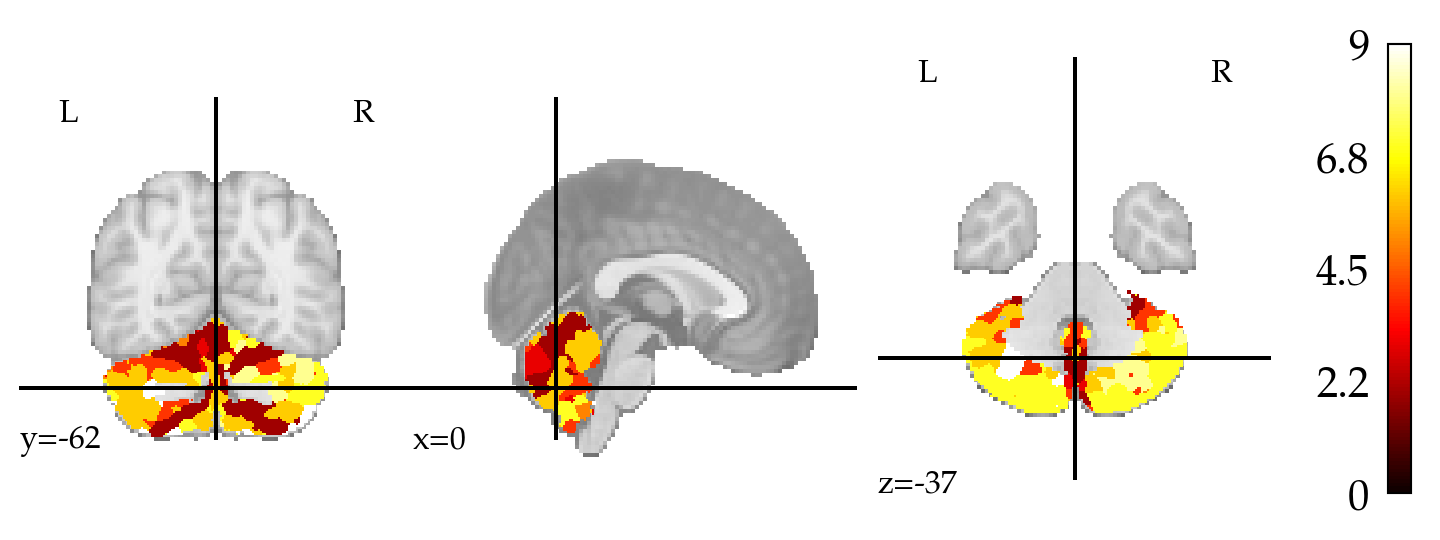

In [186]:
nilearn.plotting.plot_stat_map(Overw_mdtb, threshold=0)

In [187]:
#Extract the data array
overw_mdtb_data = Overw_mdtb.get_fdata()

# Get unique labels
unique_labels = np.unique(overw_mdtb_data)

# Print the unique labels and their count
print(f"Unique labels in overw_mdtb_data: {unique_labels}")
print(f"Number of unique labels: {len(unique_labels)}")

Unique labels in overw_mdtb_data: [0. 2. 3. 4. 5. 6. 7. 8. 9.]
Number of unique labels: 9


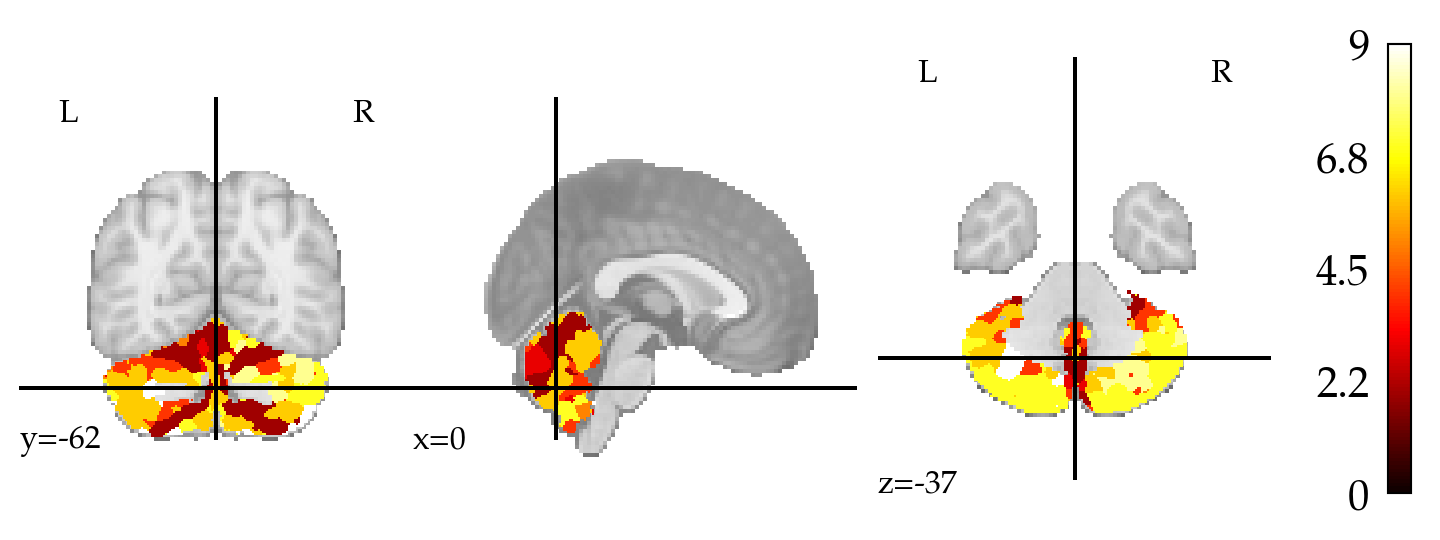

In [188]:
nilearn.plotting.plot_stat_map(Overw_mdtb, threshold=0)

In [190]:
# Check the data type of the loaded atlas
print(f"Data type of Reanalysed MDTb data by van Overwalle et al. 2023 before resampling: {Overw_mdtb.get_fdata().dtype}")

# Load the mask image
proper_mask_2mm = nibabel.load(os.path.join(INPUT_DIR, 'maps/D2009_MNI_2mm.nii.gz'))

# Resample the atlas to the mask
Overw_mdtb_mni_2mm = nilearn.image.resample_to_img(Overw_mdtb, proper_mask_2mm)

# Check the data type of the resampled atlas
print(f"DData type of Reanalysed MDTB data by van Overwalle et al. 2023 after resampling: {Overw_mdtb_mni_2mm.get_fdata().dtype}")


Data type of Reanalysed MDTb data by van Overwalle et al. 2023 before resampling: float64
DData type of Reanalysed MDTB data by van Overwalle et al. 2023 after resampling: float64


/data/project/cerebellum_ale/venv/lib/python3.11/site-packages/nilearn/image/resampling.py:597: UserWarning: Casting data from int16 to float32
  warnings.warn(f"Casting data from {data.dtype.name} to {aux}")


In [191]:
# Convert the data back to integer if necessary! It is important to check that the labels are still the correct number.
overw_mdtb_mni_2mm_data = Overw_mdtb_mni_2mm.get_fdata().astype(np.int32)
Overw_mdtb_mni_2mm = nibabel.Nifti1Image(overw_mdtb_mni_2mm_data, Overw_mdtb_mni_2mm.affine, Overw_mdtb_mni_2mm.header)

In [192]:
# Check unique labels after resampling
unique_labels = np.unique(Overw_mdtb_mni_2mm.get_fdata())
print(f"Unique labels in resampled MDTB-reanalysis atlas: {unique_labels}")
print(f"Number of unique labels: {len(unique_labels)}") # Appears all labels are there!

Unique labels in resampled MDTB-reanalysis atlas: [0. 2. 3. 4. 5. 6. 7. 8. 9.]
Number of unique labels: 9


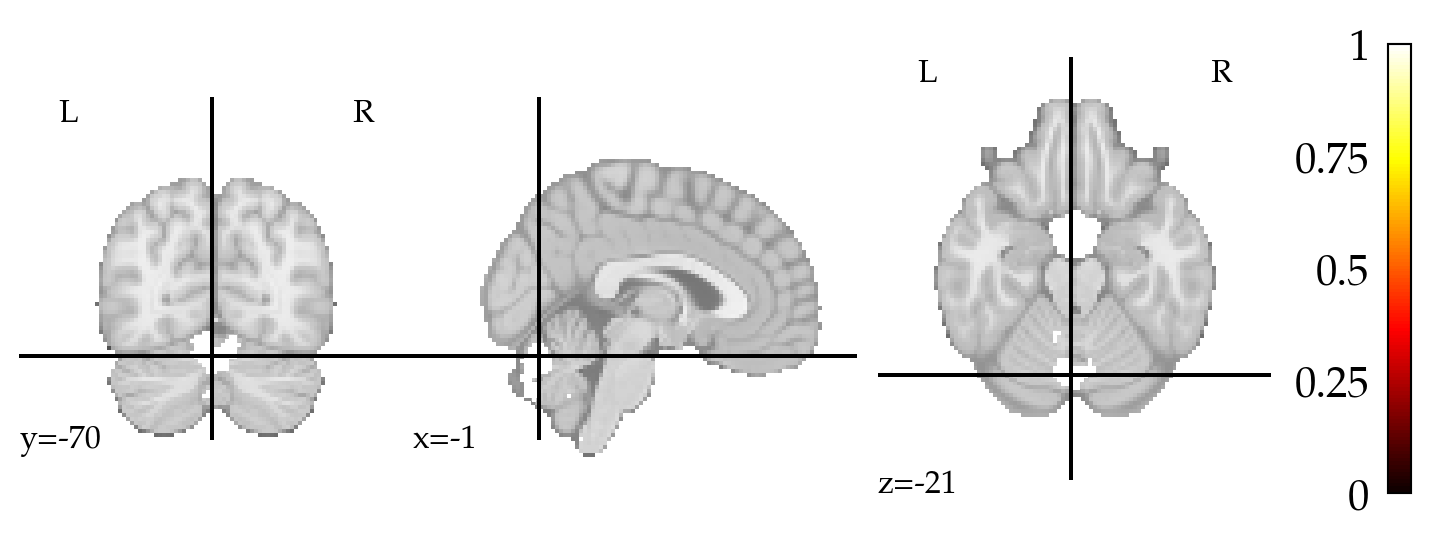

In [193]:
# Plot a single, example, parcel and check if it is within the cerebellum.
nilearn.plotting.plot_stat_map(nilearn.image.math_img('a == 3', a=Overw_mdtb_mni_2mm)) # Parcels do not seem to be restricted to the cerebellum.
# 0 is background.

In [195]:
mask_data = proper_mask_2mm.get_fdata().astype('bool')
Overw_mdtb_mni_2mm_masked = Overw_mdtb_mni_2mm.get_fdata()[mask_data]

# Get the unique labels in the masked data
unique_labels = np.unique(Overw_mdtb_mni_2mm_masked)
 
# Print the unique labels and their count
print(f"Unique labels in Overw_mdtb_mni_2mm_masked: {unique_labels}")
print(f"Number of unique labels: {len(unique_labels)}")

# Check if the number of unique labels is 9 (the number in the original map).
if len(unique_labels) == 9:
    print("The data contains 9 unique labels as expected.")
else:
    print(f"Warning: The data contains {len(unique_labels)} unique labels instead of 9.") # This seems to have removed the background.

Unique labels in Overw_mdtb_mni_2mm_masked: [0. 2. 3. 4. 5. 6. 7. 8. 9.]
Number of unique labels: 9
The data contains 9 unique labels as expected.


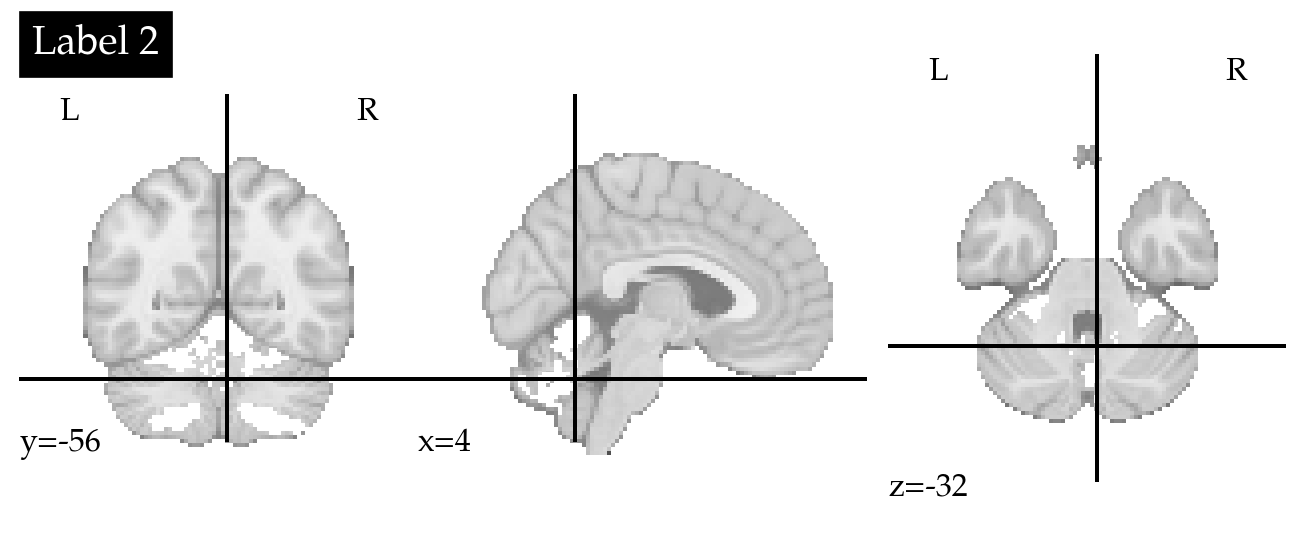

In [197]:
# Select the label you want to visualize, e.g., label 2. You can use this to test if label 1 is indeed gone.
label_to_visualize = 2

# Create a mask for this specific label
label_mask = (Overw_mdtb_mni_2mm_masked == label_to_visualize)

# Convert this mask back to a full-sized 3D array
full_label_mask = np.zeros_like(Overw_mni_2mm.get_fdata(), dtype=bool)
full_label_mask[mask_data] = label_mask

# Convert the full mask array back to a Nifti image
label_nifti = nibabel.Nifti1Image(full_label_mask.astype(np.float32), Overw_mni_2mm.affine)

# Visualize the label mask
nilearn.plotting.plot_stat_map(label_nifti, title=f'Label {label_to_visualize}', colorbar=False)

# Show the plot
nilearn.plotting.show()


# Run variogram-based mean test

In [199]:
obs_mean = pd.DataFrame(index=range(9)) # Corresponds to the number of parcels (+1, background)
p = pd.DataFrame(index=range(9))

surrogates_paths = sorted(glob.glob(os.path.join(OUTPUT_DIR,
    'SALE/*/*/uncorr_z_2mm_mask-D2009_MNI_surrogates-variogram_n-1000.npy')
))

for surrogates_path in tqdm(surrogates_paths):
    try:
        # Extract subbd using regex for better reliability
        subbd_match = re.search(r'SALE/(.*?)/(.*?)/', surrogates_path)
        if subbd_match:
            subbd = subbd_match.group(2)
        else:
            print(f"Failed to parse subbd from path: {surrogates_path}")
            continue

        # load z map and mask it
        z_2mm = os.path.join(os.path.dirname(surrogates_path), 'uncorr_z_2mm.nii.gz')
        z_2mm_masked = nibabel.load(z_2mm).get_fdata()[mask_data]
        # load surrogates
        surrogates = np.load(surrogates_path)

        obs_mean.loc[:, subbd] = pd.DataFrame(
            {'Overw_mdtb': Overw_mdtb_mni_2mm_masked,
            'z': z_2mm_masked}
        ).groupby('Overw_mdtb').mean().values.flatten()

        # This makes the calculations a ton faster!
        null_mean = (
            pd.DataFrame(surrogates.T, index=Overw_mdtb_mni_2mm_masked)
            .reset_index(drop=False)
            .groupby('index')
            .mean().values
        )
        
        p.loc[:, subbd] = (np.abs(null_mean) >= np.abs(obs_mean.loc[:, subbd].values[:, None])).mean(axis=1)
    except Exception as e:
        print(f"Error processing {surrogates_path}: {e}")  

# Display the resulting DataFrames
print(obs_mean)
print(p)

# Check if both dataframes are 9 x 40. Note that row numbers correspond to the number of unique parcel labels (and hence we skip label 1 to end up 0-8 = 9 labels).

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:07<00:00,  5.47it/s]

   Action.Execution.Speech  Action.Execution  Action.Imagination  \
0                 0.080813          0.130005            0.163600   
1                 0.552236          1.331882            0.107294   
2                 1.240175          1.359333            0.115901   
3                 0.279202          0.509552            0.259937   
4                 0.484924          0.334580            0.112651   
5                 0.140141          0.220532            0.244566   
6                 0.076257          0.179613            0.287103   
7                 0.205388          0.276058            0.485109   
8                 0.131788          0.163367            0.398824   

   Action.Inhibition  Action.Observation    Action  Cognition.Attention  \
0           0.283648            0.270913  0.136184             0.121393   
1           0.311923            0.292268  1.184469             0.058053   
2           0.101923            0.010193  0.998698             0.070941   
3           0.33998

# Label and plot hierarchically

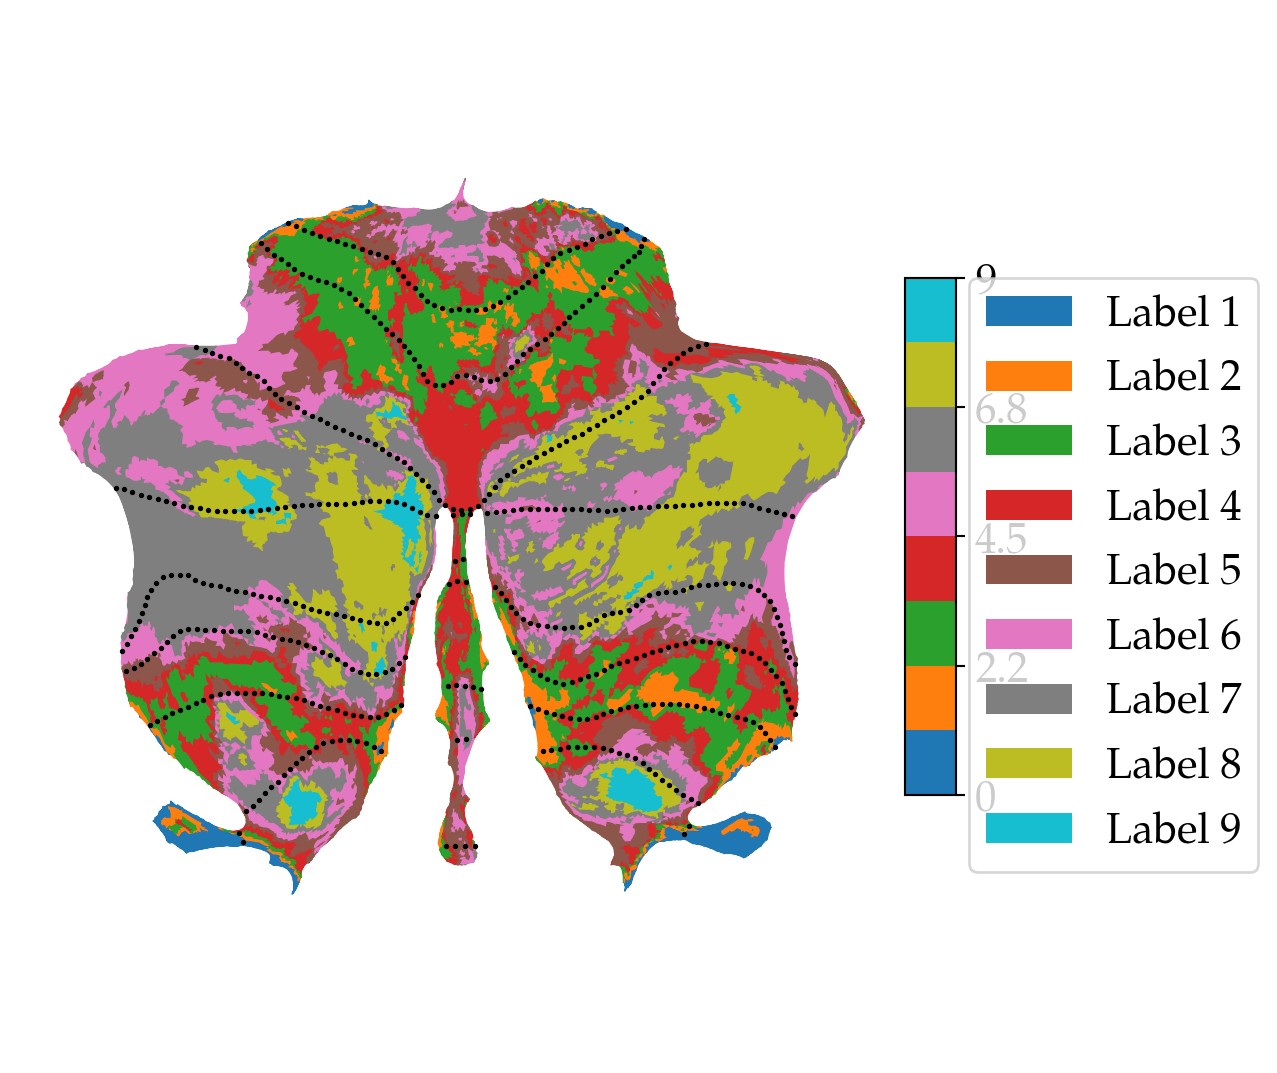

In [203]:
# Let's verify what the labels actually are. There appears to not be any documentation on this.

# Define your labels corresponding to each color
labels = [
    'Label 1', 'Label 2', 'Label 3', 'Label 4', 'Label 5',
    'Label 6', 'Label 7', 'Label 8', 'Label 9'
]

# Get the first 10 colors from the 'tab10' colormap
tab10_colors = plt.cm.get_cmap('tab10', 9)
tab10_colors_list = tab10_colors.colors[:9]

# Create a custom colormap
custom_cmap = ListedColormap(tab10_colors_list)

# Resample the image to the SUIT space and convert to flatmap surface
suit_space_surf = SUITPy.flatmap.vol_to_surf(Overw_mdtb_mni_2mm, space='SPM')

# Plot the surface map onto the flatmap
SUITPy.flatmap.plot(suit_space_surf, cmap=custom_cmap, colorbar=True)

# Create a custom legend
legend_patches = [Patch(facecolor=tab10_colors_list[i], label=labels[i]) for i in range(9)]
plt.legend(handles=legend_patches, bbox_to_anchor=(1.25, 1), loc='upper left', borderaxespad=0.)

# Show the plot
plt.show()


In [204]:
## NOTE THAT THESE ARE AUTHOR INFERRED AND ARE LIKELY WRONG ## 

# Movies and limbic are skipped?

Overw_mdtb_labels = pd.Series({
    '0': 'Background',
    '1': 'Directed Attention',
    '2': 'Sensorimotor', 
    '3': 'Divided Attention',
    '4': 'Working Memory',
    '5': 'Executive',
    '6': 'Mentalizing',
    '7': 'Language',
    '8': 'Action Observation'
})


In [207]:
import statsmodels.stats.multitest
# FDR correction
sig_fdr, _ = statsmodels.stats.multitest.fdrcorrection(p.values.flatten())
# reshape 
sig_fdr = pd.DataFrame(sig_fdr.reshape(p.shape), index=p.index, columns=p.columns)
print(sig_fdr)

   Action.Execution.Speech  Action.Execution  Action.Imagination  \
0                    False             False               False   
1                    False              True               False   
2                    False             False               False   
3                    False             False               False   
4                    False             False               False   
5                    False             False               False   
6                    False             False               False   
7                    False             False               False   
8                    False             False               False   

   Action.Inhibition  Action.Observation  Action  Cognition.Attention  \
0              False               False   False                False   
1              False               False    True                False   
2              False               False   False                False   
3              False       

In [208]:
# load and label
obs_mean.index = Overw_mdtb_labels
p.index = Overw_mdtb_labels
sig_fdr.index = Overw_mdtb_labels
# drop null
#obs_mean = obs_mean.drop(index='Background')
#p = p.drop(index='Background')
# sig_fdr = sig_fdr.drop(index='Background')
print(sig_fdr)

                    Action.Execution.Speech  Action.Execution  \
Background                            False             False   
Directed Attention                    False              True   
Sensorimotor                          False             False   
Divided Attention                     False             False   
Working Memory                        False             False   
Executive                             False             False   
Mentalizing                           False             False   
Language                              False             False   
Action Observation                    False             False   

                    Action.Imagination  Action.Inhibition  Action.Observation  \
Background                       False              False               False   
Directed Attention               False              False               False   
Sensorimotor                     False              False               False   
Divided Attention        

In [209]:
obs_mean.to_csv(os.path.join(BASE_DIR, 'Figures/Publication/Figure5/Supplementary/VanOverwalle2023_mdtb-reanalysis_mean_inferred-labels.csv'))
p.to_csv(os.path.join(BASE_DIR, 'Figures/Publication/Figure5/Supplementary/VanOverwalle2023_mdtb-reanalysis_p_inferred-labels.csv'))

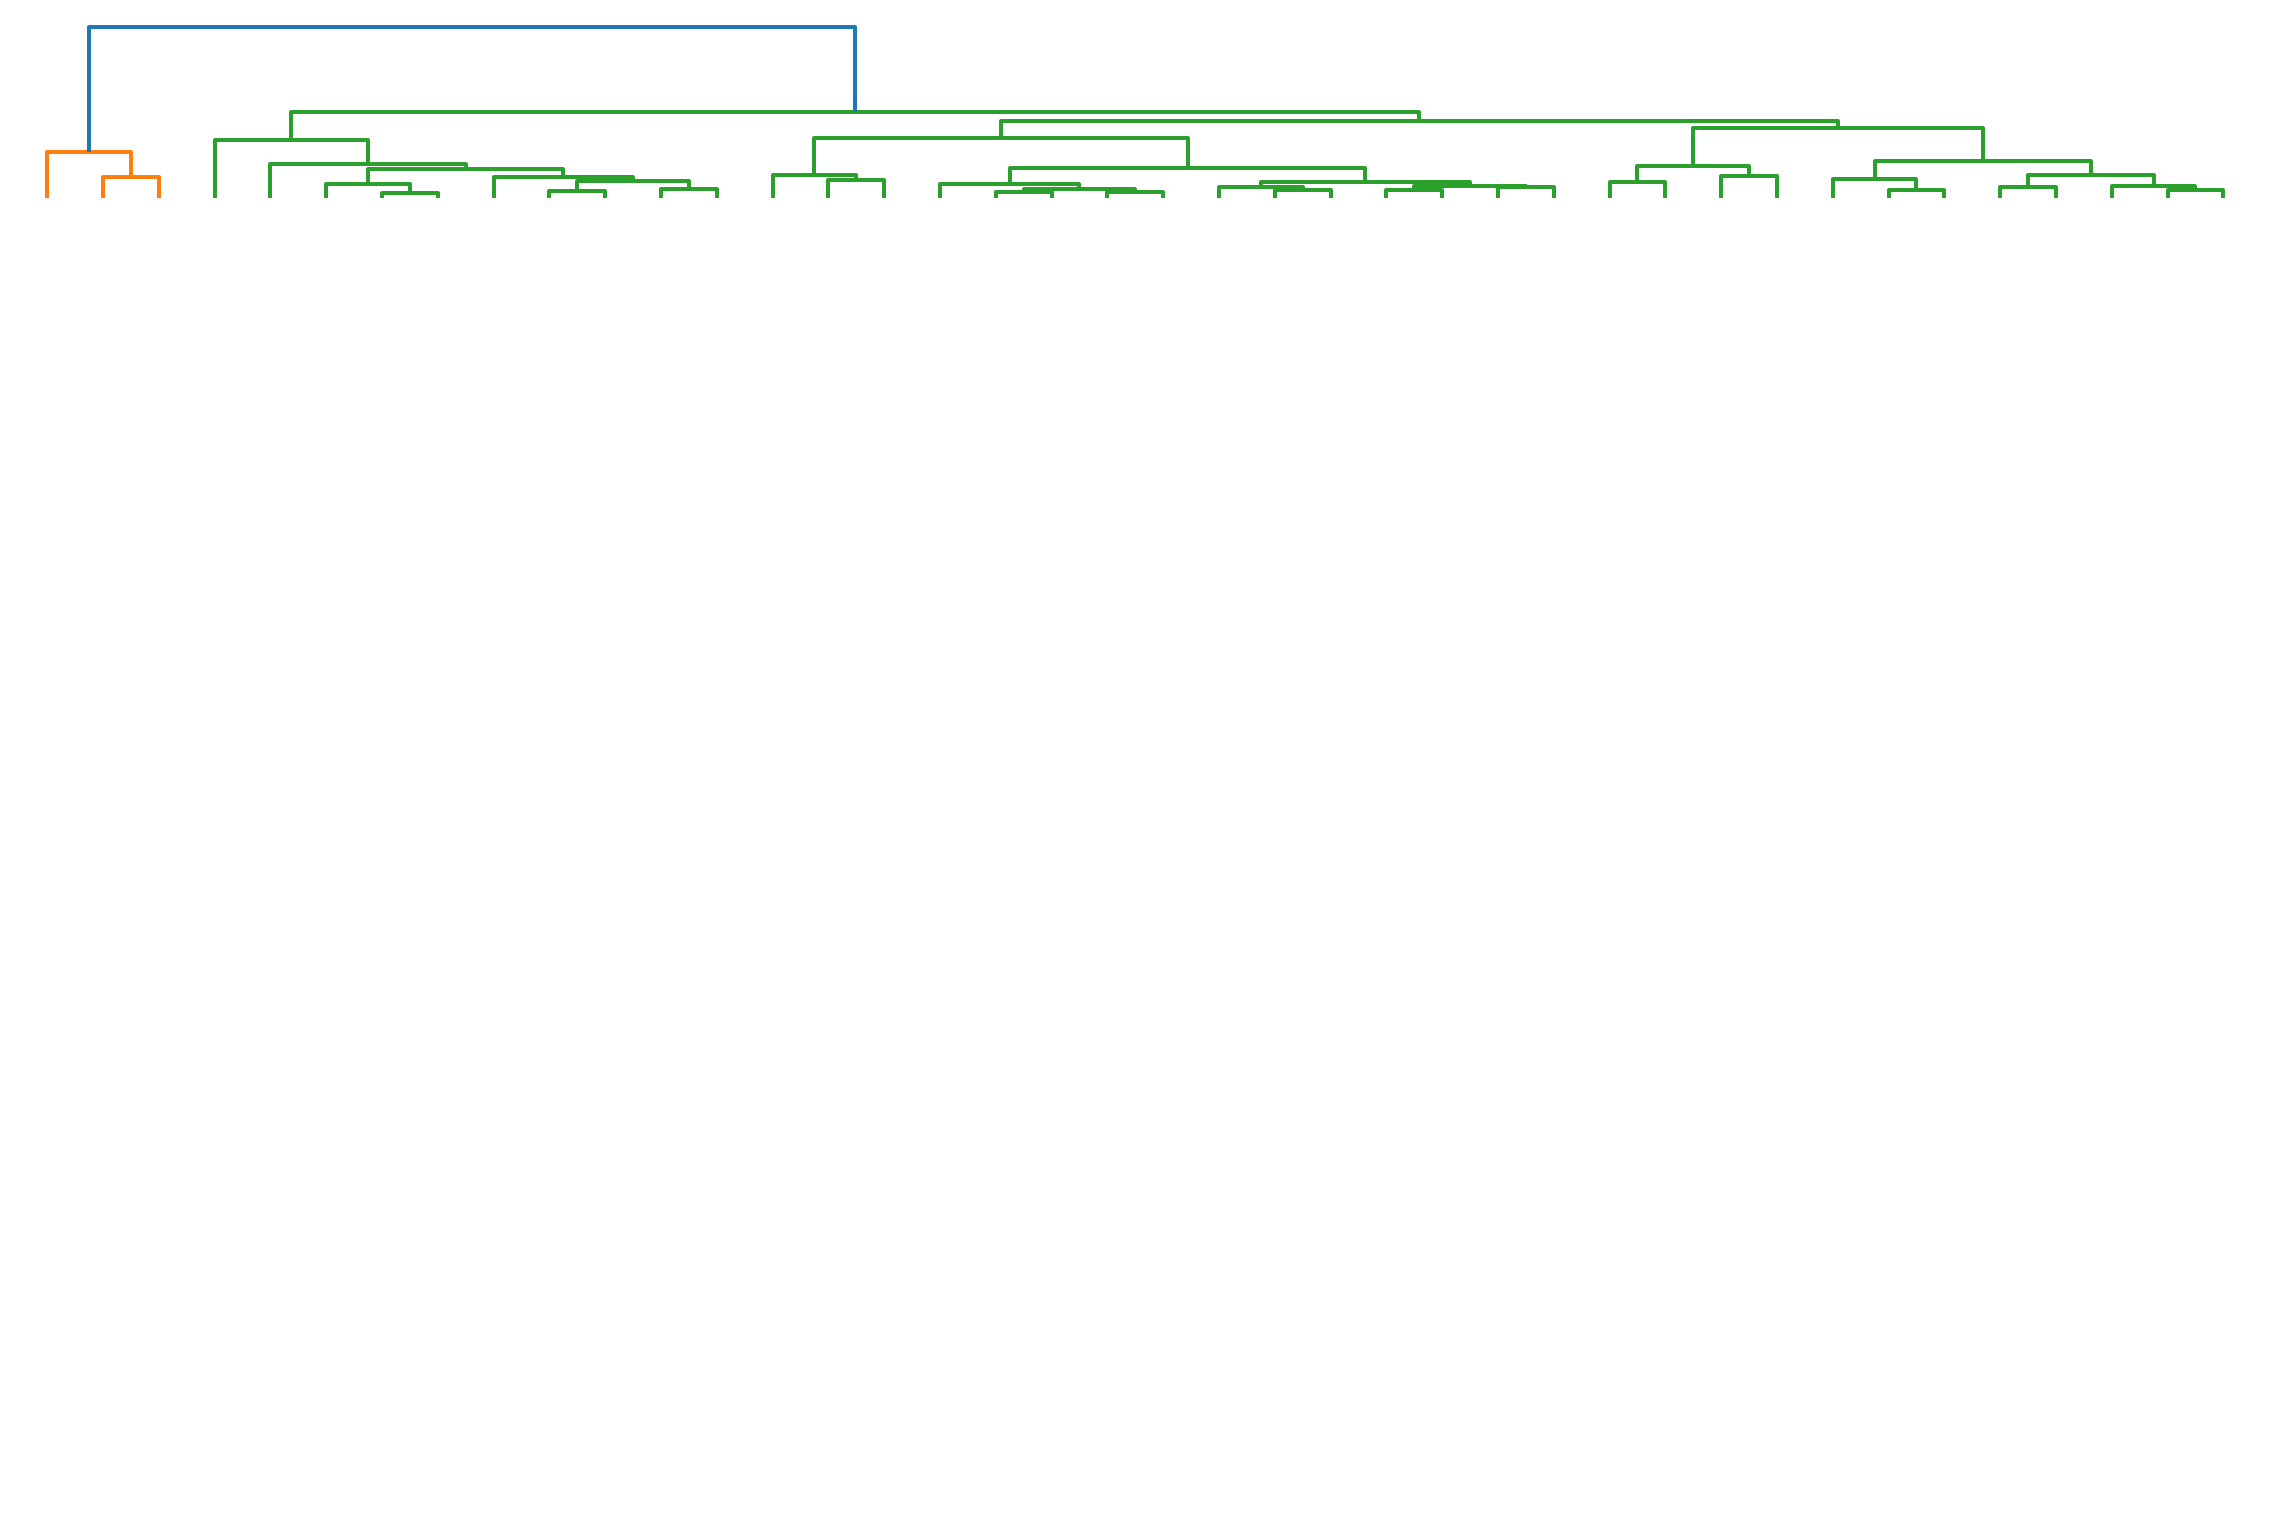

In [210]:
# hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

# hierarchical clustering
model = AgglomerativeClustering(n_clusters=None, distance_threshold=0)
model.fit(obs_mean.T)

def create_linkage_matrix(model):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)

    for i, (left_child, right_child) in enumerate(model.children_):
        count_left = 1 if left_child < n_samples else counts[left_child - n_samples]
        count_right = 1 if right_child < n_samples else counts[right_child - n_samples]
        counts[i] = count_left + count_right

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    return linkage_matrix

# linkage matrix
linkage_matrix = create_linkage_matrix(model)

# plot the dendrogram and extract the leaf order
fig, ax = plt.subplots(figsize=(15, 10))
dendro = dendrogram(linkage_matrix, show_contracted=True, ax=ax, no_labels=True)
ax.set_ylim([-25, ax.get_ylim()[1]])
ax.axis('off')

# extract the ordering
leaf_order = dendro['leaves']

# reorder the original data
mean_reordered = obs_mean.iloc[:, leaf_order]
p_reordered = p.iloc[:, leaf_order]
sig_fdr_reordered = sig_fdr.iloc[:, leaf_order]


# Decide if you want to save the figure
fig.savefig(os.path.join(BASE_DIR, 'Figures/Publication/Figure5/Supplementary/VanOverwalle2023_mdtb-reanalysis_overlap_variogram_fdr-dendogram.png'), bbox_inches='tight')

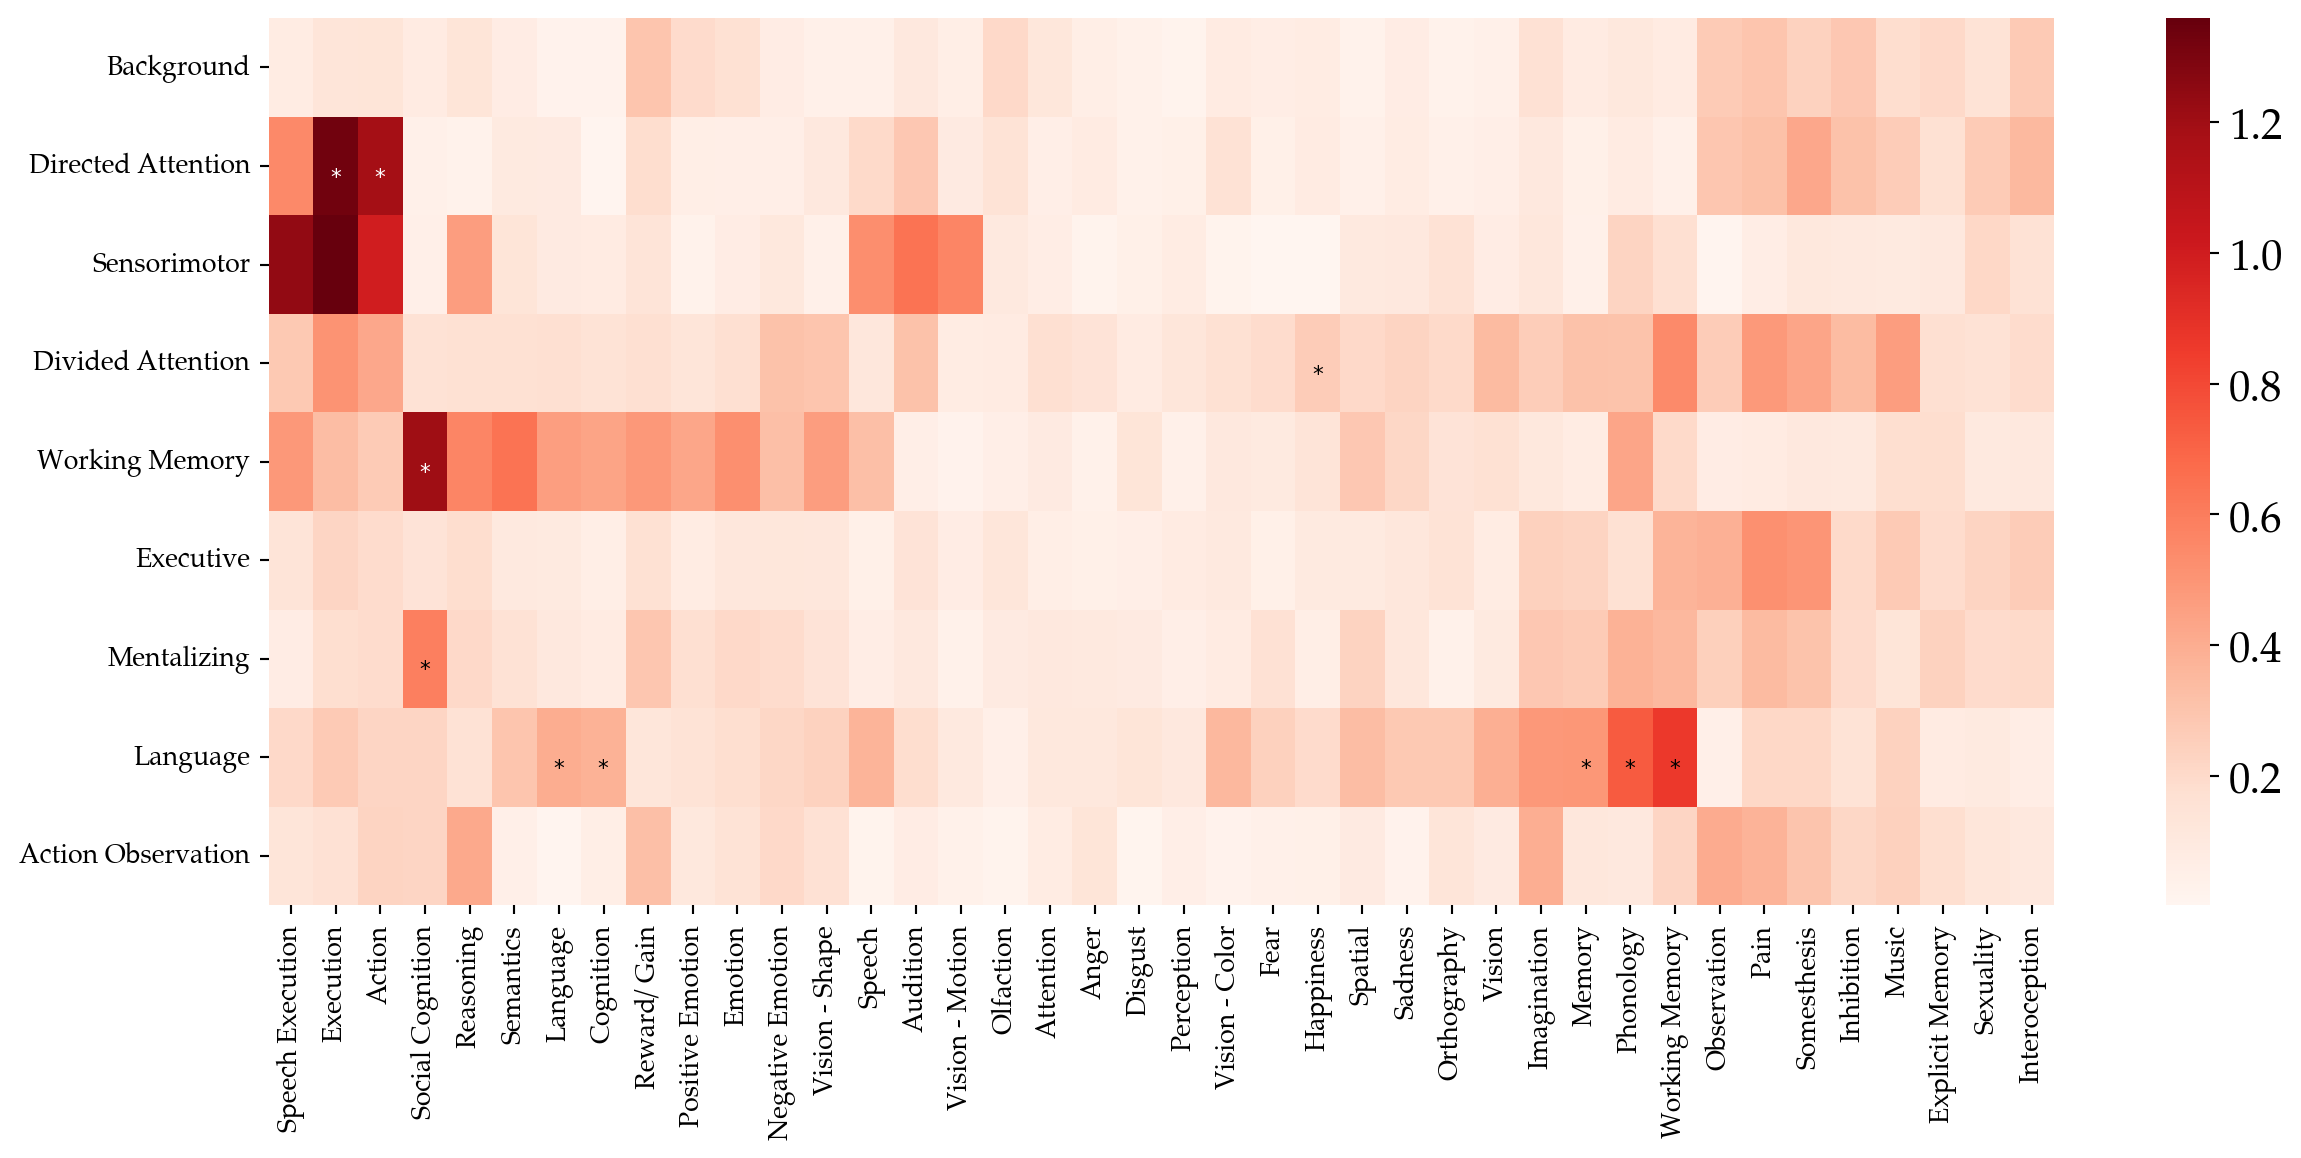

In [211]:
# plot the reordered data
fig, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(mean_reordered, cmap='Reds',linecolor='.8', ax=ax)
ax.set_xticks(np.arange(p.shape[1])+0.5)
ax.set_xticklabels(subdomain_labels.loc[mean_reordered.columns].values, rotation=90, horizontalalignment='center', fontsize=10)
ax.set_yticks(np.arange(p.shape[0])+0.5)
ax.set_yticklabels(mean_reordered.index, rotation=0, fontsize=10)
ax.set_ylabel('')

# add the * layer
for x, col in enumerate(mean_reordered.columns):
    for y, row in enumerate(mean_reordered.index):
        if sig_fdr.loc[row, col]:
            text = r'$*$'
            # Conditional color based on the value of r
            text_color = 'white' if mean_reordered.loc[row, col] > 1.0  else 'black'
            ax.text(x+0.5, y+0.6,
                    text, 
                    fontsize=8,
                    color=text_color,
                    horizontalalignment='center', 
                    verticalalignment='center')

# Decide if you want to save the figure
fig.savefig(os.path.join(BASE_DIR, 'Figures/Publication/Figure5/Supplementary/VanOverwalle2023_mdtb-reanalysis_overlap_variogram_inferred-labels.png'), bbox_inches='tight')

In [214]:
Overw_mdtb_labels_regions = pd.Series({
    '0': 'Background',
    '2': 'Region 2', # Since the 1st label was missing in the original map, we skip the Region 1 name as well. I think this increases our chance of being correct.
    '3': 'Region 3',
    '4': 'Region 4',
    '4': 'Region 5', 
    '5': 'Region 6',
    '6': 'Region 7',
    '7': 'Region 8',
    '8': 'Region 9',
    '9': 'Region 10'
})

In [215]:
# label
obs_mean.index = Overw_mdtb_labels_regions
p.index = Overw_mdtb_labels_regions
sig_fdr.index = Overw_mdtb_labels_regions

In [216]:
obs_mean.to_csv(os.path.join(BASE_DIR, 'Figures/Publication/Figure5/Supplementary/VanOverwalle2023_mdtb-reanalysis_mean.csv'))
p.to_csv(os.path.join(BASE_DIR, 'Figures/Publication/Figure5/Supplementary/VanOverwalle2023_mdtb-reanalysis_p.csv'))

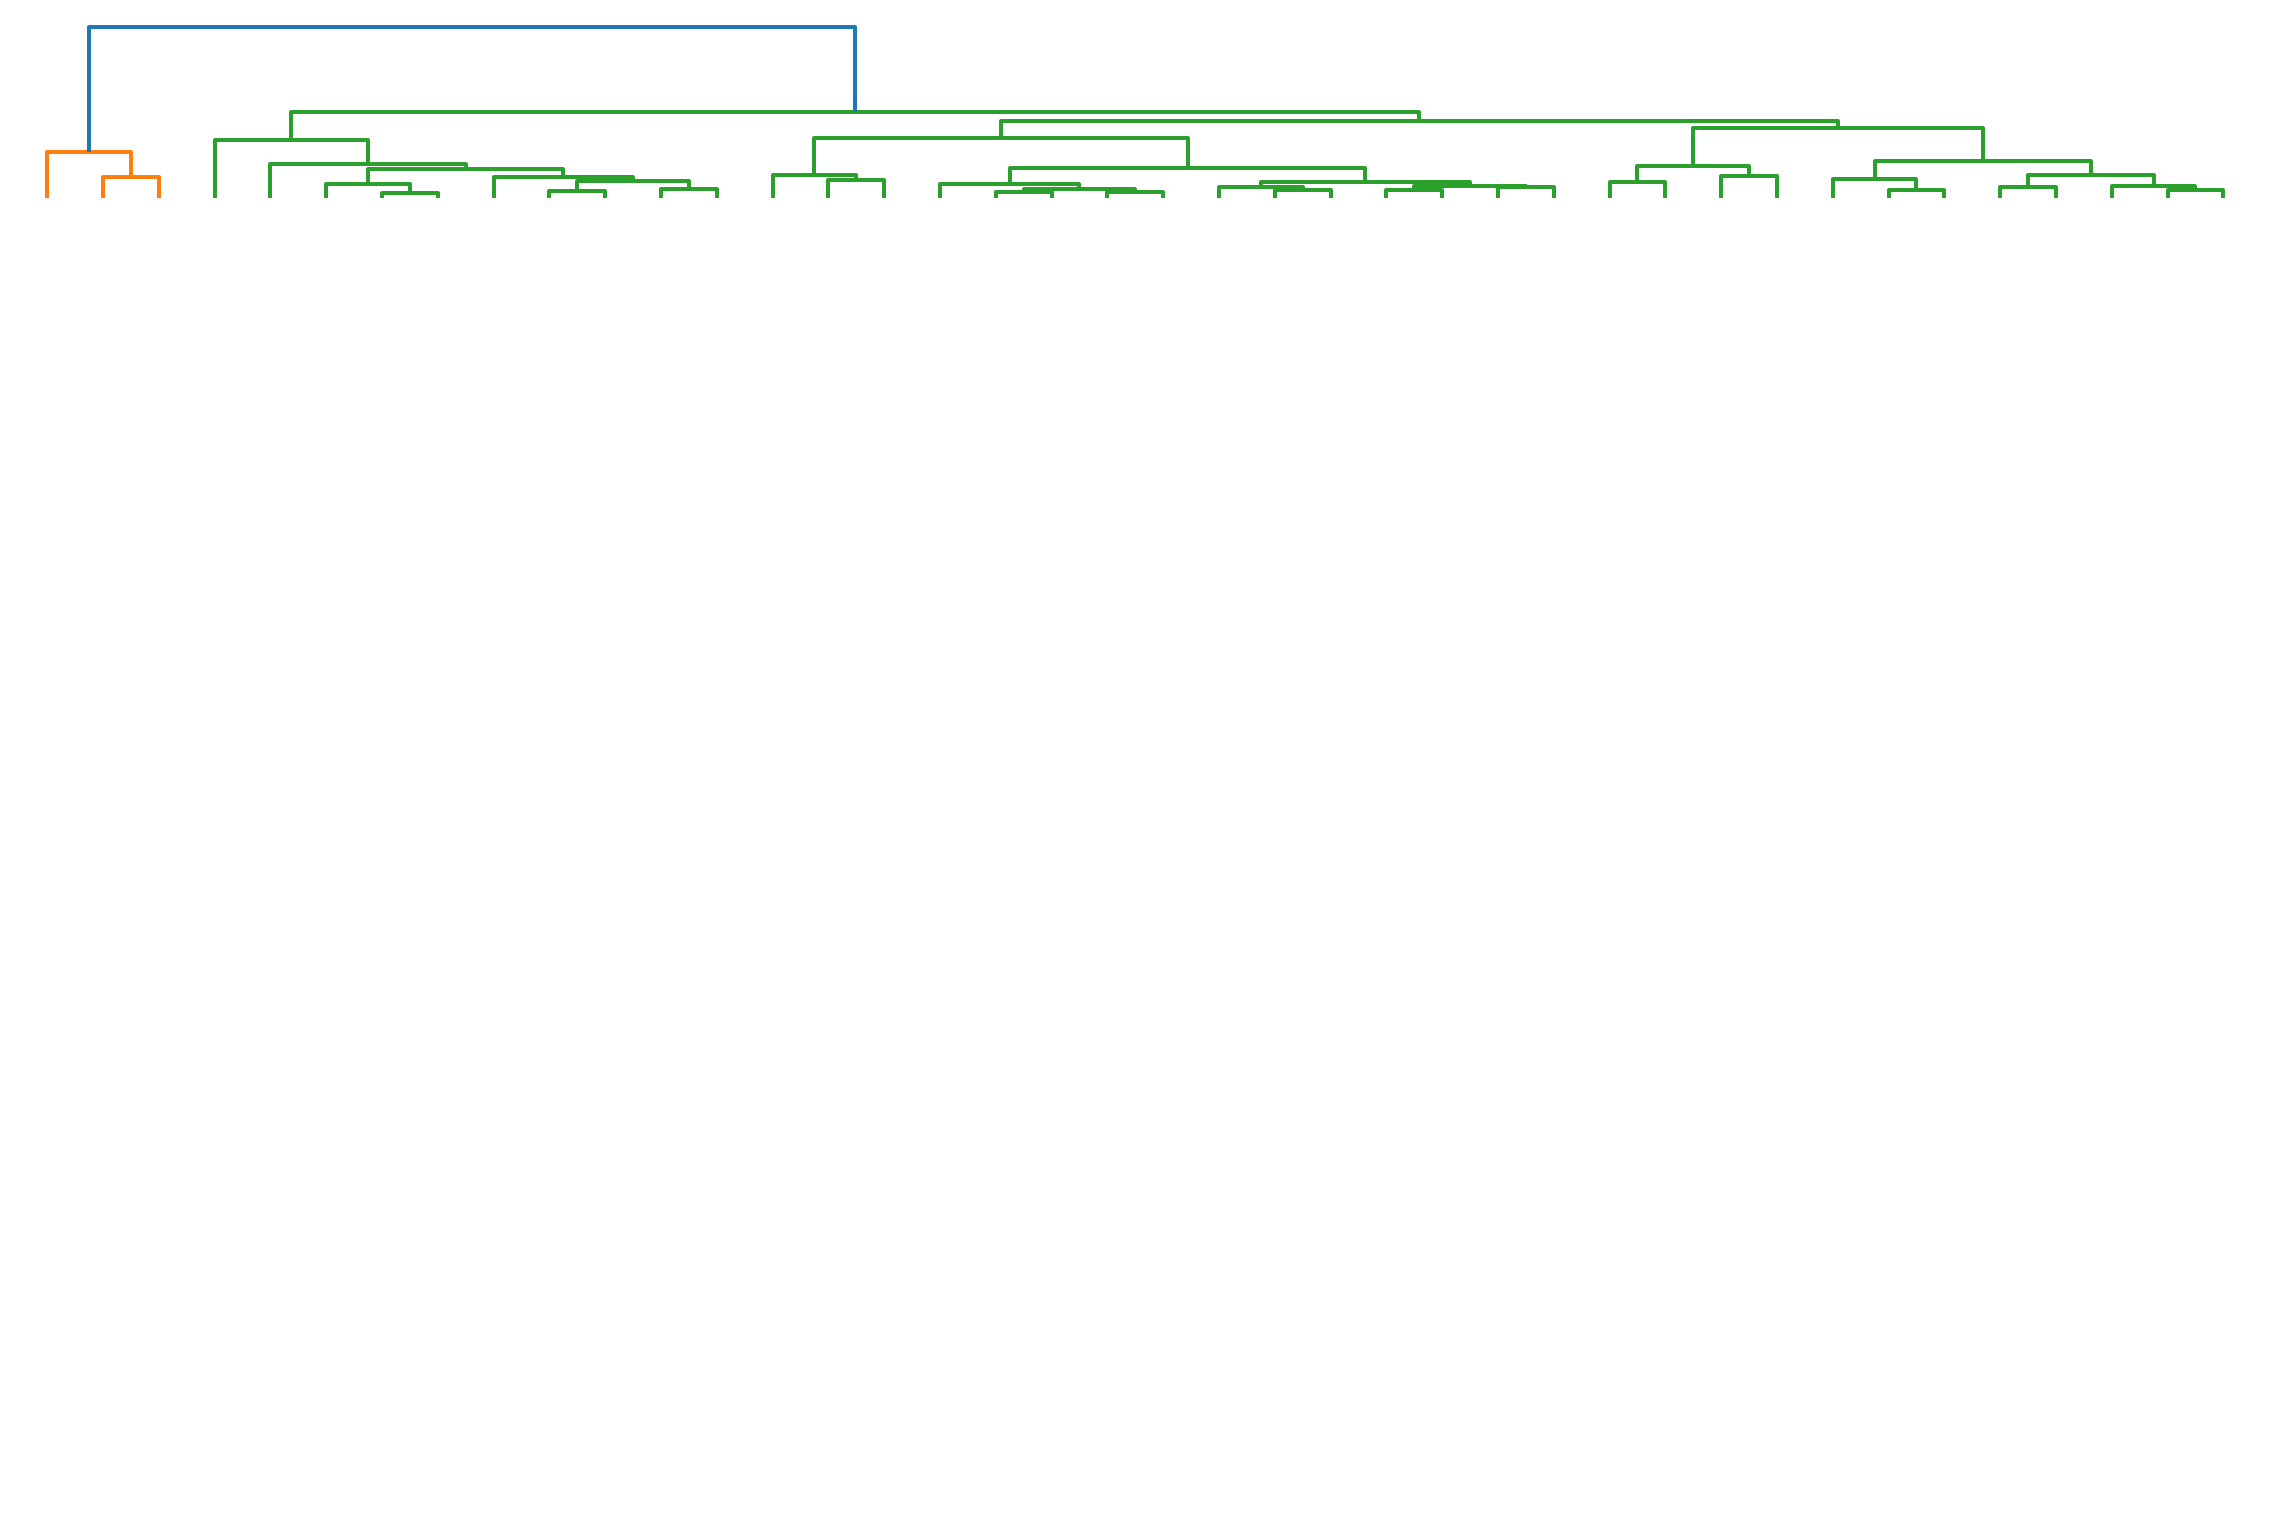

In [217]:
# hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

# hierarchical clustering
model = AgglomerativeClustering(n_clusters=None, distance_threshold=0)
model.fit(obs_mean.T)

def create_linkage_matrix(model):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)

    for i, (left_child, right_child) in enumerate(model.children_):
        count_left = 1 if left_child < n_samples else counts[left_child - n_samples]
        count_right = 1 if right_child < n_samples else counts[right_child - n_samples]
        counts[i] = count_left + count_right

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    return linkage_matrix

# linkage matrix
linkage_matrix = create_linkage_matrix(model)

# plot the dendrogram and extract the leaf order
fig, ax = plt.subplots(figsize=(15, 10))
dendro = dendrogram(linkage_matrix, show_contracted=True, ax=ax, no_labels=True)
ax.set_ylim([-25, ax.get_ylim()[1]])
ax.axis('off')

# extract the ordering
leaf_order = dendro['leaves']

# reorder the original data
mean_reordered = obs_mean.iloc[:, leaf_order]
p_reordered = p.iloc[:, leaf_order]
sig_fdr_reordered = sig_fdr.iloc[:, leaf_order]

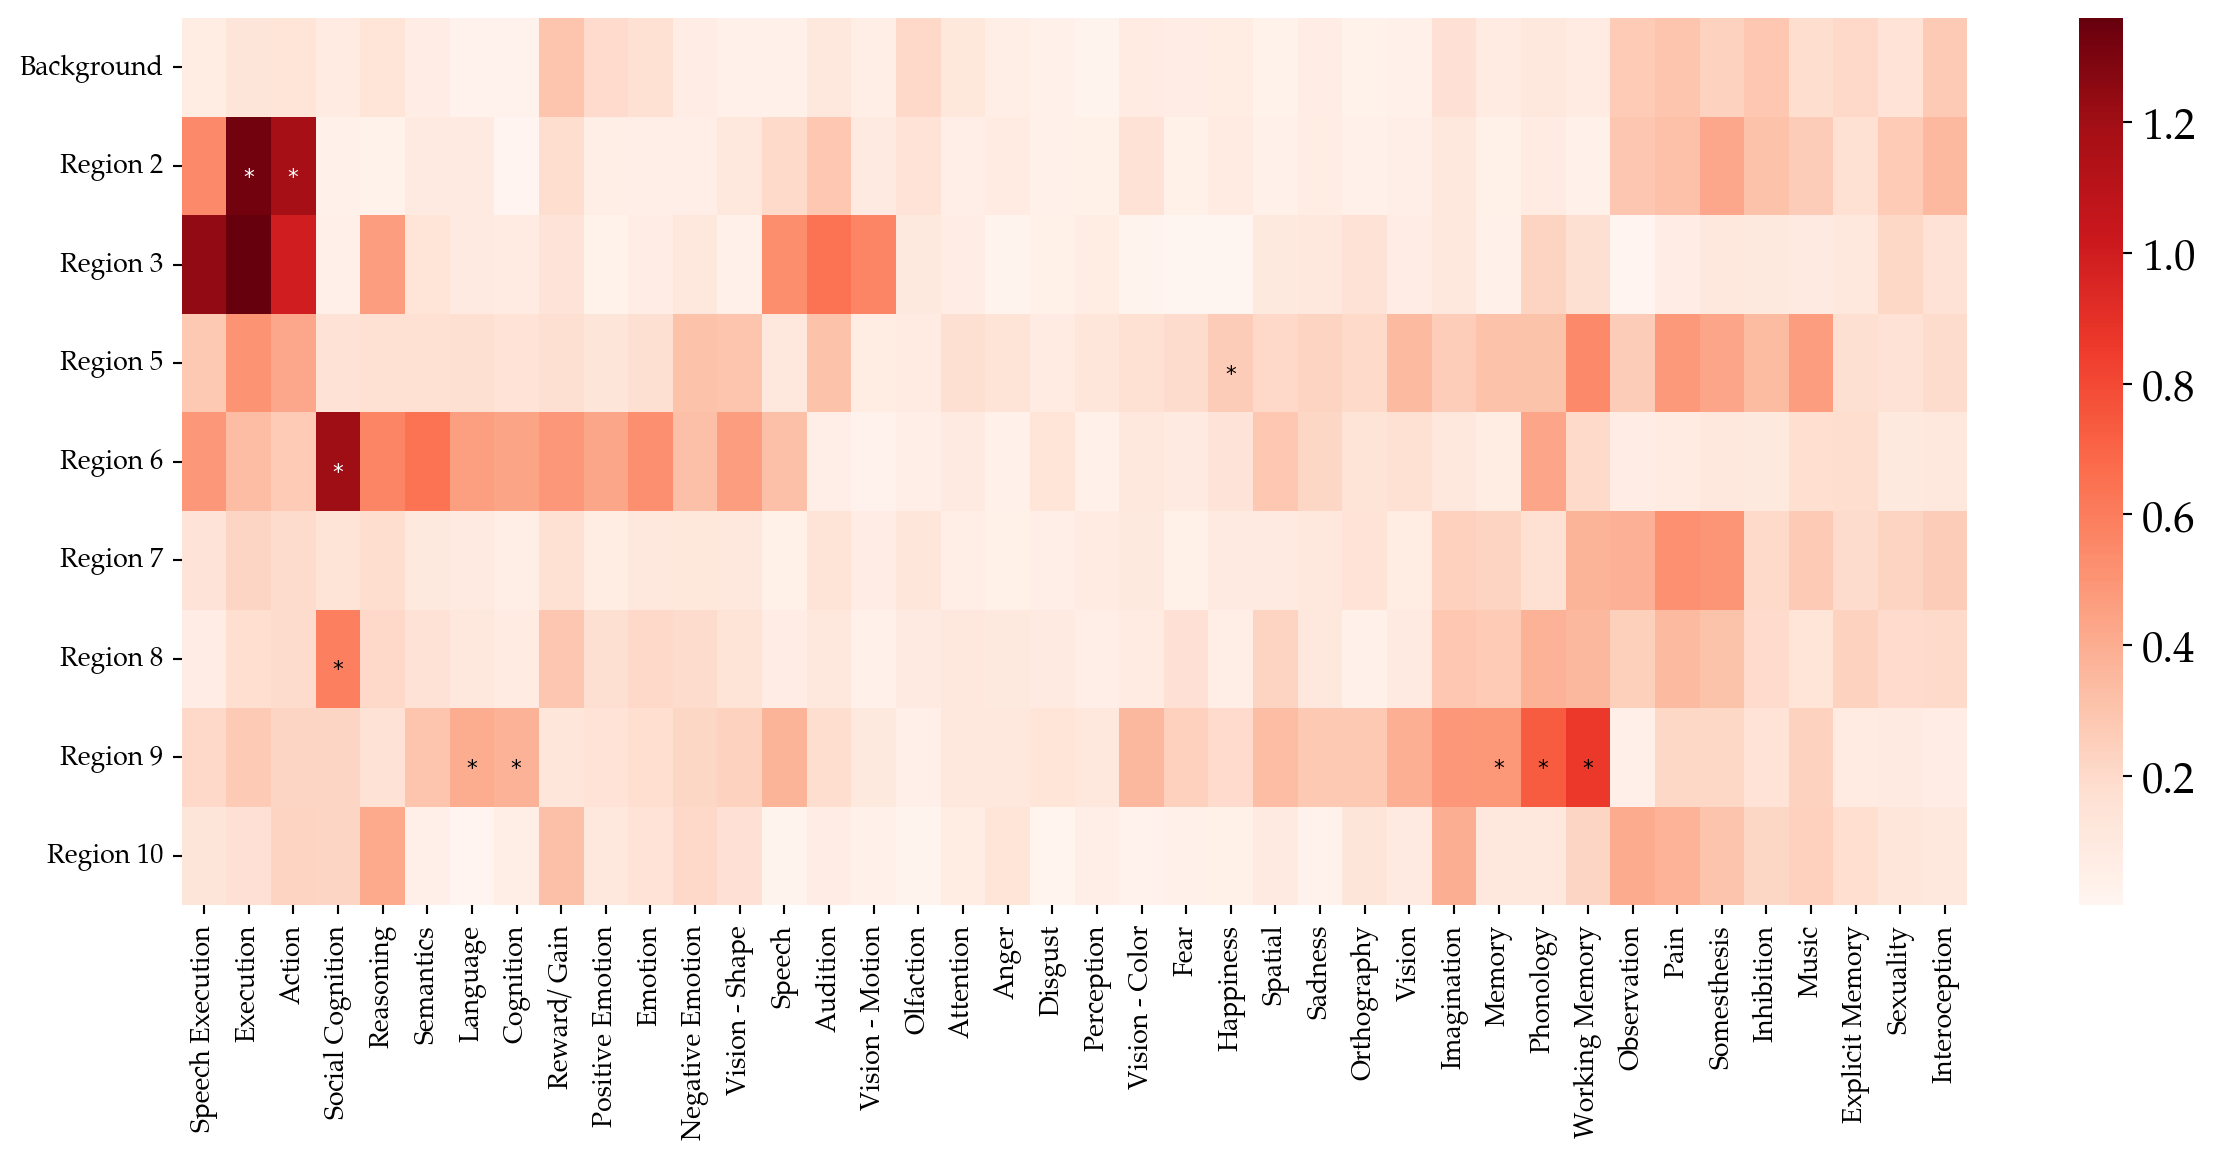

In [218]:
# plot the reordered data
fig, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(mean_reordered, cmap='Reds',linecolor='.8', ax=ax)
ax.set_xticks(np.arange(p.shape[1])+0.5)
ax.set_xticklabels(subdomain_labels.loc[mean_reordered.columns].values, rotation=90, horizontalalignment='center', fontsize=10)
ax.set_yticks(np.arange(p.shape[0])+0.5)
ax.set_yticklabels(mean_reordered.index, rotation=0, fontsize=10)
ax.set_ylabel('')

# add the * layer
for x, col in enumerate(mean_reordered.columns):
    for y, row in enumerate(mean_reordered.index):
        if sig_fdr.loc[row, col]:
            text = r'$*$'
            # Conditional color based on the value of r
            text_color = 'white' if mean_reordered.loc[row, col] > 1.0  else 'black'
            ax.text(x+0.5, y+0.6,
                    text, 
                    fontsize=8,
                    color=text_color,
                    horizontalalignment='center', 
                    verticalalignment='center')

# Decide if you want to save the figure
fig.savefig(os.path.join(BASE_DIR, 'Figures/Publication/Figure5/Supplementary/VanOverwalle2023_mdtb-reanalysis_overlap_variogram.png'), bbox_inches='tight')

In [227]:
mask_data = proper_mask_2mm.get_fdata().astype('bool')

In [249]:
obs_mean = pd.DataFrame(index=range(9)) # Corresponds to the number of parcels (+1, background)
p = pd.DataFrame(index=range(9))

surrogates_paths = sorted(glob.glob(os.path.join(OUTPUT_DIR,
    'SALE/*/*/uncorr_z_2mm_mask-D2009_MNI_surrogates-variogram_n-1000.npy')
))

for surrogates_path in tqdm(surrogates_paths):
    try:
        # Extract subbd using regex for better reliability
        subbd_match = re.search(r'SALE/(.*?)/(.*?)/', surrogates_path)
        if subbd_match:
            subbd = subbd_match.group(2)
        else:
            print(f"Failed to parse subbd from path: {surrogates_path}")
            continue

        # load z map and mask it
        z_2mm = os.path.join(os.path.dirname(surrogates_path), 'uncorr_z_2mm.nii.gz')
        z_2mm_masked = nibabel.load(z_2mm).get_fdata()[mask_data]
        # load surrogates
        surrogates = np.load(surrogates_path)

        obs_mean.loc[:, subbd] = pd.DataFrame(
            {'Re-mdtb': Overw_mdtb_mni_2mm_masked,
            'z': z_2mm_masked}
        ).groupby('Re-mdtb').mean().values.flatten()

        # This makes the calculations a ton faster!
        null_mean = (
            pd.DataFrame(surrogates.T, index=Overw_mdtb_mni_2mm_masked)
            .reset_index(drop=False)
            .groupby('index')
            .mean().values
        )
        
        p.loc[:, subbd] = (np.abs(null_mean) >= np.abs(obs_mean.loc[:, subbd].values[:, None])).mean(axis=1)
    except Exception as e:
        print(f"Error processing {surrogates_path}: {e}")  

# Display the resulting DataFrames
print(obs_mean)
print(p)

# Check if both dataframes are 32 x 40.

  5%|██████████▎                                                                                                                                                                                                  | 2/40 [00:00<00:03, 11.62it/s]

Error processing /data/project/cerebellum_ale/output/SALE/Action/Action.Execution.Speech/uncorr_z_2mm_mask-D2009_MNI_surrogates-variogram_n-1000.npy: Length of values (1) does not match length of index (9)
Error processing /data/project/cerebellum_ale/output/SALE/Action/Action.Execution/uncorr_z_2mm_mask-D2009_MNI_surrogates-variogram_n-1000.npy: Length of values (1) does not match length of index (9)
Error processing /data/project/cerebellum_ale/output/SALE/Action/Action.Imagination/uncorr_z_2mm_mask-D2009_MNI_surrogates-variogram_n-1000.npy: Length of values (1) does not match length of index (9)


 15%|██████████████████████████████▊                                                                                                                                                                              | 6/40 [00:00<00:02, 12.41it/s]

Error processing /data/project/cerebellum_ale/output/SALE/Action/Action.Inhibition/uncorr_z_2mm_mask-D2009_MNI_surrogates-variogram_n-1000.npy: Length of values (1) does not match length of index (9)
Error processing /data/project/cerebellum_ale/output/SALE/Action/Action.Observation/uncorr_z_2mm_mask-D2009_MNI_surrogates-variogram_n-1000.npy: Length of values (1) does not match length of index (9)
Error processing /data/project/cerebellum_ale/output/SALE/Action/Action/uncorr_z_2mm_mask-D2009_MNI_surrogates-variogram_n-1000.npy: Length of values (1) does not match length of index (9)


 20%|█████████████████████████████████████████                                                                                                                                                                    | 8/40 [00:00<00:02, 12.55it/s]

Error processing /data/project/cerebellum_ale/output/SALE/Cognition/Cognition.Attention/uncorr_z_2mm_mask-D2009_MNI_surrogates-variogram_n-1000.npy: Length of values (1) does not match length of index (9)
Error processing /data/project/cerebellum_ale/output/SALE/Cognition/Cognition.Language.Orthography/uncorr_z_2mm_mask-D2009_MNI_surrogates-variogram_n-1000.npy: Length of values (1) does not match length of index (9)
Error processing /data/project/cerebellum_ale/output/SALE/Cognition/Cognition.Language.Phonology/uncorr_z_2mm_mask-D2009_MNI_surrogates-variogram_n-1000.npy: Length of values (1) does not match length of index (9)


 30%|█████████████████████████████████████████████████████████████▏                                                                                                                                              | 12/40 [00:00<00:02, 12.45it/s]

Error processing /data/project/cerebellum_ale/output/SALE/Cognition/Cognition.Language.Semantics/uncorr_z_2mm_mask-D2009_MNI_surrogates-variogram_n-1000.npy: Length of values (1) does not match length of index (9)
Error processing /data/project/cerebellum_ale/output/SALE/Cognition/Cognition.Language.Speech/uncorr_z_2mm_mask-D2009_MNI_surrogates-variogram_n-1000.npy: Length of values (1) does not match length of index (9)
Error processing /data/project/cerebellum_ale/output/SALE/Cognition/Cognition.Language/uncorr_z_2mm_mask-D2009_MNI_surrogates-variogram_n-1000.npy: Length of values (1) does not match length of index (9)


 35%|███████████████████████████████████████████████████████████████████████▍                                                                                                                                    | 14/40 [00:01<00:02, 12.11it/s]

Error processing /data/project/cerebellum_ale/output/SALE/Cognition/Cognition.Memory.Explicit/uncorr_z_2mm_mask-D2009_MNI_surrogates-variogram_n-1000.npy: Length of values (1) does not match length of index (9)
Error processing /data/project/cerebellum_ale/output/SALE/Cognition/Cognition.Memory.Working/uncorr_z_2mm_mask-D2009_MNI_surrogates-variogram_n-1000.npy: Length of values (1) does not match length of index (9)
Error processing /data/project/cerebellum_ale/output/SALE/Cognition/Cognition.Memory/uncorr_z_2mm_mask-D2009_MNI_surrogates-variogram_n-1000.npy: Length of values (1) does not match length of index (9)


 45%|███████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                | 18/40 [00:01<00:01, 12.37it/s]

Error processing /data/project/cerebellum_ale/output/SALE/Cognition/Cognition.Music/uncorr_z_2mm_mask-D2009_MNI_surrogates-variogram_n-1000.npy: Length of values (1) does not match length of index (9)
Error processing /data/project/cerebellum_ale/output/SALE/Cognition/Cognition.Reasoning/uncorr_z_2mm_mask-D2009_MNI_surrogates-variogram_n-1000.npy: Length of values (1) does not match length of index (9)
Error processing /data/project/cerebellum_ale/output/SALE/Cognition/Cognition.SocialCognition/uncorr_z_2mm_mask-D2009_MNI_surrogates-variogram_n-1000.npy: Length of values (1) does not match length of index (9)


 50%|██████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                      | 20/40 [00:01<00:01, 12.47it/s]

Error processing /data/project/cerebellum_ale/output/SALE/Cognition/Cognition.Spatial/uncorr_z_2mm_mask-D2009_MNI_surrogates-variogram_n-1000.npy: Length of values (1) does not match length of index (9)
Error processing /data/project/cerebellum_ale/output/SALE/Cognition/Cognition/uncorr_z_2mm_mask-D2009_MNI_surrogates-variogram_n-1000.npy: Length of values (1) does not match length of index (9)
Error processing /data/project/cerebellum_ale/output/SALE/Emotion/Emotion.Negative.Anger/uncorr_z_2mm_mask-D2009_MNI_surrogates-variogram_n-1000.npy: Length of values (1) does not match length of index (9)


 60%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                 | 24/40 [00:01<00:01, 12.76it/s]

Error processing /data/project/cerebellum_ale/output/SALE/Emotion/Emotion.Negative.Disgust/uncorr_z_2mm_mask-D2009_MNI_surrogates-variogram_n-1000.npy: Length of values (1) does not match length of index (9)
Error processing /data/project/cerebellum_ale/output/SALE/Emotion/Emotion.Negative.Fear/uncorr_z_2mm_mask-D2009_MNI_surrogates-variogram_n-1000.npy: Length of values (1) does not match length of index (9)
Error processing /data/project/cerebellum_ale/output/SALE/Emotion/Emotion.Negative.Sadness/uncorr_z_2mm_mask-D2009_MNI_surrogates-variogram_n-1000.npy: Length of values (1) does not match length of index (9)


 65%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                       | 26/40 [00:02<00:01, 12.76it/s]

Error processing /data/project/cerebellum_ale/output/SALE/Emotion/Emotion.Negative/uncorr_z_2mm_mask-D2009_MNI_surrogates-variogram_n-1000.npy: Length of values (1) does not match length of index (9)
Error processing /data/project/cerebellum_ale/output/SALE/Emotion/Emotion.Positive.Happiness/uncorr_z_2mm_mask-D2009_MNI_surrogates-variogram_n-1000.npy: Length of values (1) does not match length of index (9)
Error processing /data/project/cerebellum_ale/output/SALE/Emotion/Emotion.Positive.RewardGain/uncorr_z_2mm_mask-D2009_MNI_surrogates-variogram_n-1000.npy: Length of values (1) does not match length of index (9)


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                   | 30/40 [00:02<00:00, 12.65it/s]

Error processing /data/project/cerebellum_ale/output/SALE/Emotion/Emotion.Positive/uncorr_z_2mm_mask-D2009_MNI_surrogates-variogram_n-1000.npy: Length of values (1) does not match length of index (9)
Error processing /data/project/cerebellum_ale/output/SALE/Emotion/Emotion/uncorr_z_2mm_mask-D2009_MNI_surrogates-variogram_n-1000.npy: Length of values (1) does not match length of index (9)
Error processing /data/project/cerebellum_ale/output/SALE/Interoception/Interoception.Sexuality/uncorr_z_2mm_mask-D2009_MNI_surrogates-variogram_n-1000.npy: Length of values (1) does not match length of index (9)


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                   | 30/40 [00:02<00:00, 12.07it/s]


KeyboardInterrupt: 

# The End.